In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/TLKM.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-18,-1.897533,0.683206,1.023252,-1.126062,-1.922112,0.956041,1.495666,-1.941745,1.268029,1.474352,0.716564,1.343175,1.017014,-1.847004,1.043362,0.261872,1.030744,-1.912599
2012-10-19,-1.897533,0.001986,0.097212,-1.126062,-1.918382,0.390122,0.900786,-1.938633,0.764207,0.930947,1.424203,1.343175,1.017014,-1.847004,1.052845,0.376468,1.030744,-1.912599
2012-10-22,-1.897533,0.001986,0.479641,-1.126062,-1.913719,0.390122,1.376929,-1.935522,0.764207,1.339129,-1.406353,1.343175,1.017014,-1.847004,1.081294,0.720254,1.097111,-1.938629
2012-10-23,-1.904983,-0.641594,-0.449110,-1.049764,-1.912787,-0.151434,0.849027,-1.933655,0.277992,0.941173,-0.698714,1.343175,1.017014,-1.847004,1.090777,0.834849,1.097111,-1.912599
2012-10-24,-1.904983,0.052074,-0.449110,-1.049764,-1.909989,0.327165,0.621336,-1.928677,0.663751,1.174387,0.008925,1.343175,1.017014,-1.847004,1.100260,0.949444,1.097111,-1.873553


### Plot the Close price - our target

Text(0.5, 1.0, 'TLKM.JK Close Price')

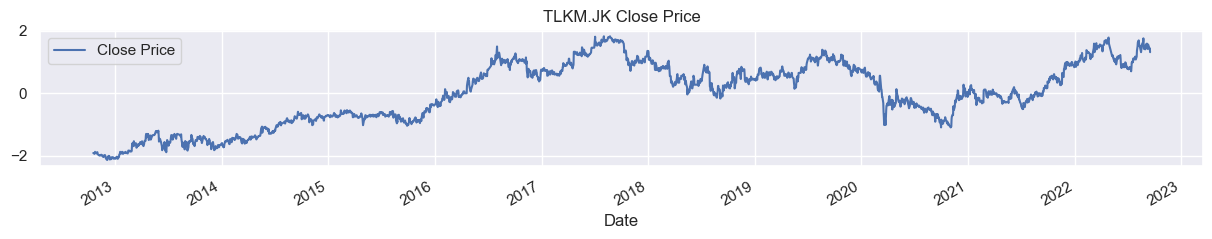

In [3]:
df['Close'].plot(figsize=(15,2))
plt.legend(['Close Price'])
plt.title('TLKM.JK Close Price')

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

print("The best hyperparameters are ",search.best_params_)

[0]	validation_0-rmse:1.18392
[1]	validation_0-rmse:1.17466
[2]	validation_0-rmse:1.16550
[3]	validation_0-rmse:1.15643
[4]	validation_0-rmse:1.14745
[5]	validation_0-rmse:1.13858
[6]	validation_0-rmse:1.12991
[7]	validation_0-rmse:1.12121
[8]	validation_0-rmse:1.11260
[9]	validation_0-rmse:1.10408
[10]	validation_0-rmse:1.09576
[11]	validation_0-rmse:1.08742
[12]	validation_0-rmse:1.07916
[13]	validation_0-rmse:1.07110
[14]	validation_0-rmse:1.06312
[15]	validation_0-rmse:1.05512
[16]	validation_0-rmse:1.04720
[17]	validation_0-rmse:1.03946
[18]	validation_0-rmse:1.03171
[19]	validation_0-rmse:1.02403
[20]	validation_0-rmse:1.01653
[21]	validation_0-rmse:1.00865
[22]	validation_0-rmse:1.00121
[23]	validation_0-rmse:0.99394
[24]	validation_0-rmse:0.98629
[25]	validation_0-rmse:0.97918
[26]	validation_0-rmse:0.97204
[27]	validation_0-rmse:0.96447
[28]	validation_0-rmse:0.95757
[29]	validation_0-rmse:0.95064
[30]	validation_0-rmse:0.94329
[31]	validation_0-rmse:0.93679
[32]	validation_0-

[260]	validation_0-rmse:0.31058
[261]	validation_0-rmse:0.30976
[262]	validation_0-rmse:0.30924
[263]	validation_0-rmse:0.30831
[264]	validation_0-rmse:0.30770
[265]	validation_0-rmse:0.30714
[266]	validation_0-rmse:0.30631
[267]	validation_0-rmse:0.30553
[268]	validation_0-rmse:0.30492
[269]	validation_0-rmse:0.30444
[270]	validation_0-rmse:0.30391
[271]	validation_0-rmse:0.30311
[272]	validation_0-rmse:0.30265
[273]	validation_0-rmse:0.30208
[274]	validation_0-rmse:0.30130
[275]	validation_0-rmse:0.30079
[276]	validation_0-rmse:0.30034
[277]	validation_0-rmse:0.29985
[278]	validation_0-rmse:0.29913
[279]	validation_0-rmse:0.29856
[280]	validation_0-rmse:0.29812
[281]	validation_0-rmse:0.29770
[282]	validation_0-rmse:0.29715
[283]	validation_0-rmse:0.29635
[284]	validation_0-rmse:0.29588
[285]	validation_0-rmse:0.29517
[286]	validation_0-rmse:0.29472
[287]	validation_0-rmse:0.29394
[288]	validation_0-rmse:0.29355
[289]	validation_0-rmse:0.29315
[290]	validation_0-rmse:0.29271
[291]	va

[17]	validation_0-rmse:1.00547
[18]	validation_0-rmse:0.99605
[19]	validation_0-rmse:0.98670
[20]	validation_0-rmse:0.97711
[21]	validation_0-rmse:0.96764
[22]	validation_0-rmse:0.95860
[23]	validation_0-rmse:0.94980
[24]	validation_0-rmse:0.94109
[25]	validation_0-rmse:0.93245
[26]	validation_0-rmse:0.92376
[27]	validation_0-rmse:0.91531
[28]	validation_0-rmse:0.90694
[29]	validation_0-rmse:0.89867
[30]	validation_0-rmse:0.89032
[31]	validation_0-rmse:0.88221
[32]	validation_0-rmse:0.87417
[33]	validation_0-rmse:0.86623
[34]	validation_0-rmse:0.85781
[35]	validation_0-rmse:0.85003
[36]	validation_0-rmse:0.84232
[37]	validation_0-rmse:0.83468
[38]	validation_0-rmse:0.82665
[39]	validation_0-rmse:0.81919
[40]	validation_0-rmse:0.81180
[41]	validation_0-rmse:0.80401
[42]	validation_0-rmse:0.79677
[43]	validation_0-rmse:0.78960
[44]	validation_0-rmse:0.78204
[45]	validation_0-rmse:0.77476
[46]	validation_0-rmse:0.76782
[47]	validation_0-rmse:0.76069
[48]	validation_0-rmse:0.75389
[49]	val

[275]	validation_0-rmse:0.12565
[276]	validation_0-rmse:0.12503
[277]	validation_0-rmse:0.12450
[278]	validation_0-rmse:0.12395
[279]	validation_0-rmse:0.12335
[280]	validation_0-rmse:0.12283
[281]	validation_0-rmse:0.12229
[282]	validation_0-rmse:0.12172
[283]	validation_0-rmse:0.12122
[284]	validation_0-rmse:0.12072
[285]	validation_0-rmse:0.12017
[286]	validation_0-rmse:0.11961
[287]	validation_0-rmse:0.11913
[288]	validation_0-rmse:0.11859
[289]	validation_0-rmse:0.11812
[290]	validation_0-rmse:0.11760
[291]	validation_0-rmse:0.11714
[292]	validation_0-rmse:0.11662
[293]	validation_0-rmse:0.11611
[294]	validation_0-rmse:0.11565
[295]	validation_0-rmse:0.11517
[296]	validation_0-rmse:0.11474
[297]	validation_0-rmse:0.11433
[298]	validation_0-rmse:0.11391
[299]	validation_0-rmse:0.11345
[300]	validation_0-rmse:0.11299
[301]	validation_0-rmse:0.11258
[302]	validation_0-rmse:0.11213
[303]	validation_0-rmse:0.11174
[304]	validation_0-rmse:0.11131
[305]	validation_0-rmse:0.11094
[306]	va

[33]	validation_0-rmse:0.85770
[34]	validation_0-rmse:0.84949
[35]	validation_0-rmse:0.84133
[36]	validation_0-rmse:0.83328
[37]	validation_0-rmse:0.82528
[38]	validation_0-rmse:0.81741
[39]	validation_0-rmse:0.80961
[40]	validation_0-rmse:0.80183
[41]	validation_0-rmse:0.79420
[42]	validation_0-rmse:0.78663
[43]	validation_0-rmse:0.77910
[44]	validation_0-rmse:0.77164
[45]	validation_0-rmse:0.76431
[46]	validation_0-rmse:0.75705
[47]	validation_0-rmse:0.74986
[48]	validation_0-rmse:0.74268
[49]	validation_0-rmse:0.73564
[50]	validation_0-rmse:0.72859
[51]	validation_0-rmse:0.72165
[52]	validation_0-rmse:0.71483
[53]	validation_0-rmse:0.70802
[54]	validation_0-rmse:0.70128
[55]	validation_0-rmse:0.69461
[56]	validation_0-rmse:0.68801
[57]	validation_0-rmse:0.68147
[58]	validation_0-rmse:0.67499
[59]	validation_0-rmse:0.66859
[60]	validation_0-rmse:0.66225
[61]	validation_0-rmse:0.65596
[62]	validation_0-rmse:0.64976
[63]	validation_0-rmse:0.64362
[64]	validation_0-rmse:0.63753
[65]	val

[292]	validation_0-rmse:0.11473
[293]	validation_0-rmse:0.11425
[294]	validation_0-rmse:0.11378
[295]	validation_0-rmse:0.11331
[296]	validation_0-rmse:0.11285
[297]	validation_0-rmse:0.11239
[298]	validation_0-rmse:0.11194
[299]	validation_0-rmse:0.11149
[300]	validation_0-rmse:0.11106
[301]	validation_0-rmse:0.11062
[302]	validation_0-rmse:0.11017
[303]	validation_0-rmse:0.10975
[304]	validation_0-rmse:0.10933
[305]	validation_0-rmse:0.10893
[306]	validation_0-rmse:0.10849
[307]	validation_0-rmse:0.10809
[308]	validation_0-rmse:0.10770
[309]	validation_0-rmse:0.10728
[310]	validation_0-rmse:0.10690
[311]	validation_0-rmse:0.10651
[312]	validation_0-rmse:0.10613
[313]	validation_0-rmse:0.10574
[314]	validation_0-rmse:0.10537
[315]	validation_0-rmse:0.10500
[316]	validation_0-rmse:0.10464
[317]	validation_0-rmse:0.10428
[318]	validation_0-rmse:0.10390
[319]	validation_0-rmse:0.10356
[320]	validation_0-rmse:0.10320
[321]	validation_0-rmse:0.10287
[322]	validation_0-rmse:0.10252
[323]	va

[50]	validation_0-rmse:0.72645
[51]	validation_0-rmse:0.71947
[52]	validation_0-rmse:0.71255
[53]	validation_0-rmse:0.70577
[54]	validation_0-rmse:0.69903
[55]	validation_0-rmse:0.69240
[56]	validation_0-rmse:0.68577
[57]	validation_0-rmse:0.67927
[58]	validation_0-rmse:0.67279
[59]	validation_0-rmse:0.66642
[60]	validation_0-rmse:0.66005
[61]	validation_0-rmse:0.65374
[62]	validation_0-rmse:0.64749
[63]	validation_0-rmse:0.64138
[64]	validation_0-rmse:0.63527
[65]	validation_0-rmse:0.62921
[66]	validation_0-rmse:0.62322
[67]	validation_0-rmse:0.61735
[68]	validation_0-rmse:0.61154
[69]	validation_0-rmse:0.60579
[70]	validation_0-rmse:0.60008
[71]	validation_0-rmse:0.59438
[72]	validation_0-rmse:0.58881
[73]	validation_0-rmse:0.58330
[74]	validation_0-rmse:0.57779
[75]	validation_0-rmse:0.57231
[76]	validation_0-rmse:0.56689
[77]	validation_0-rmse:0.56152
[78]	validation_0-rmse:0.55628
[79]	validation_0-rmse:0.55103
[80]	validation_0-rmse:0.54589
[81]	validation_0-rmse:0.54079
[82]	val

[308]	validation_0-rmse:0.10824
[309]	validation_0-rmse:0.10788
[310]	validation_0-rmse:0.10752
[311]	validation_0-rmse:0.10715
[312]	validation_0-rmse:0.10677
[313]	validation_0-rmse:0.10642
[314]	validation_0-rmse:0.10608
[315]	validation_0-rmse:0.10571
[316]	validation_0-rmse:0.10535
[317]	validation_0-rmse:0.10501
[318]	validation_0-rmse:0.10469
[319]	validation_0-rmse:0.10437
[320]	validation_0-rmse:0.10403
[321]	validation_0-rmse:0.10372
[322]	validation_0-rmse:0.10342
[323]	validation_0-rmse:0.10311
[324]	validation_0-rmse:0.10281
[325]	validation_0-rmse:0.10252
[326]	validation_0-rmse:0.10223
[327]	validation_0-rmse:0.10191
[328]	validation_0-rmse:0.10160
[329]	validation_0-rmse:0.10132
[330]	validation_0-rmse:0.10101
[331]	validation_0-rmse:0.10072
[332]	validation_0-rmse:0.10042
[333]	validation_0-rmse:0.10015
[334]	validation_0-rmse:0.09988
[335]	validation_0-rmse:0.09962
[336]	validation_0-rmse:0.09936
[337]	validation_0-rmse:0.09911
[338]	validation_0-rmse:0.09883
[339]	va

[67]	validation_0-rmse:0.61997
[68]	validation_0-rmse:0.61414
[69]	validation_0-rmse:0.60837
[70]	validation_0-rmse:0.60263
[71]	validation_0-rmse:0.59698
[72]	validation_0-rmse:0.59139
[73]	validation_0-rmse:0.58582
[74]	validation_0-rmse:0.58034
[75]	validation_0-rmse:0.57491
[76]	validation_0-rmse:0.56954
[77]	validation_0-rmse:0.56424
[78]	validation_0-rmse:0.55897
[79]	validation_0-rmse:0.55376
[80]	validation_0-rmse:0.54861
[81]	validation_0-rmse:0.54351
[82]	validation_0-rmse:0.53847
[83]	validation_0-rmse:0.53346
[84]	validation_0-rmse:0.52850
[85]	validation_0-rmse:0.52361
[86]	validation_0-rmse:0.51876
[87]	validation_0-rmse:0.51396
[88]	validation_0-rmse:0.50921
[89]	validation_0-rmse:0.50452
[90]	validation_0-rmse:0.49987
[91]	validation_0-rmse:0.49528
[92]	validation_0-rmse:0.49073
[93]	validation_0-rmse:0.48623
[94]	validation_0-rmse:0.48176
[95]	validation_0-rmse:0.47732
[96]	validation_0-rmse:0.47297
[97]	validation_0-rmse:0.46864
[98]	validation_0-rmse:0.46436
[99]	val

[325]	validation_0-rmse:0.10637
[326]	validation_0-rmse:0.10610
[327]	validation_0-rmse:0.10578
[328]	validation_0-rmse:0.10551
[329]	validation_0-rmse:0.10520
[330]	validation_0-rmse:0.10492
[331]	validation_0-rmse:0.10464
[332]	validation_0-rmse:0.10438
[333]	validation_0-rmse:0.10410
[334]	validation_0-rmse:0.10382
[335]	validation_0-rmse:0.10356
[336]	validation_0-rmse:0.10328
[337]	validation_0-rmse:0.10303
[338]	validation_0-rmse:0.10276
[339]	validation_0-rmse:0.10250
[340]	validation_0-rmse:0.10227
[341]	validation_0-rmse:0.10200
[342]	validation_0-rmse:0.10177
[343]	validation_0-rmse:0.10151
[344]	validation_0-rmse:0.10126
[345]	validation_0-rmse:0.10105
[346]	validation_0-rmse:0.10083
[347]	validation_0-rmse:0.10060
[348]	validation_0-rmse:0.10038
[349]	validation_0-rmse:0.10015
[350]	validation_0-rmse:0.09995
[351]	validation_0-rmse:0.09973
[352]	validation_0-rmse:0.09952
[353]	validation_0-rmse:0.09929
[354]	validation_0-rmse:0.09910
[355]	validation_0-rmse:0.09888
[356]	va

[84]	validation_0-rmse:0.64847
[85]	validation_0-rmse:0.64407
[86]	validation_0-rmse:0.64028
[87]	validation_0-rmse:0.63667
[88]	validation_0-rmse:0.63237
[89]	validation_0-rmse:0.62862
[90]	validation_0-rmse:0.62512
[91]	validation_0-rmse:0.62167
[92]	validation_0-rmse:0.61804
[93]	validation_0-rmse:0.61394
[94]	validation_0-rmse:0.61060
[95]	validation_0-rmse:0.60685
[96]	validation_0-rmse:0.60351
[97]	validation_0-rmse:0.59956
[98]	validation_0-rmse:0.59636
[99]	validation_0-rmse:0.59276
[100]	validation_0-rmse:0.58957
[101]	validation_0-rmse:0.58575
[102]	validation_0-rmse:0.58198
[103]	validation_0-rmse:0.57889
[104]	validation_0-rmse:0.57546
[105]	validation_0-rmse:0.57179
[106]	validation_0-rmse:0.56882
[107]	validation_0-rmse:0.56523
[108]	validation_0-rmse:0.56236
[109]	validation_0-rmse:0.55883
[110]	validation_0-rmse:0.55602
[111]	validation_0-rmse:0.55278
[112]	validation_0-rmse:0.55003
[113]	validation_0-rmse:0.54661
[114]	validation_0-rmse:0.54382
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.26990
[342]	validation_0-rmse:0.26941
[343]	validation_0-rmse:0.26895
[344]	validation_0-rmse:0.26872
[345]	validation_0-rmse:0.26824
[346]	validation_0-rmse:0.26782
[347]	validation_0-rmse:0.26756
[348]	validation_0-rmse:0.26739
[349]	validation_0-rmse:0.26698
[350]	validation_0-rmse:0.26673
[351]	validation_0-rmse:0.26632
[352]	validation_0-rmse:0.26607
[353]	validation_0-rmse:0.26589
[354]	validation_0-rmse:0.26556
[355]	validation_0-rmse:0.26532
[356]	validation_0-rmse:0.26508
[357]	validation_0-rmse:0.26469
[358]	validation_0-rmse:0.26451
[359]	validation_0-rmse:0.26429
[360]	validation_0-rmse:0.26416
[361]	validation_0-rmse:0.26377
[362]	validation_0-rmse:0.26360
[363]	validation_0-rmse:0.26322
[364]	validation_0-rmse:0.26305
[365]	validation_0-rmse:0.26280
[366]	validation_0-rmse:0.26238
[367]	validation_0-rmse:0.26214
[368]	validation_0-rmse:0.26202
[369]	validation_0-rmse:0.26161
[370]	validation_0-rmse:0.26121
[371]	validation_0-rmse:0.26109
[372]	va

[598]	validation_0-rmse:0.23477
[599]	validation_0-rmse:0.23476
[0]	validation_0-rmse:1.18191
[1]	validation_0-rmse:1.17066
[2]	validation_0-rmse:1.15952
[3]	validation_0-rmse:1.14850
[4]	validation_0-rmse:1.13760
[5]	validation_0-rmse:1.12680
[6]	validation_0-rmse:1.11612
[7]	validation_0-rmse:1.10555
[8]	validation_0-rmse:1.09511
[9]	validation_0-rmse:1.08477
[10]	validation_0-rmse:1.07453
[11]	validation_0-rmse:1.06441
[12]	validation_0-rmse:1.05440
[13]	validation_0-rmse:1.04449
[14]	validation_0-rmse:1.03466
[15]	validation_0-rmse:1.02460
[16]	validation_0-rmse:1.01498
[17]	validation_0-rmse:1.00547
[18]	validation_0-rmse:0.99605
[19]	validation_0-rmse:0.98670
[20]	validation_0-rmse:0.97711
[21]	validation_0-rmse:0.96764
[22]	validation_0-rmse:0.95860
[23]	validation_0-rmse:0.94980
[24]	validation_0-rmse:0.94109
[25]	validation_0-rmse:0.93245
[26]	validation_0-rmse:0.92376
[27]	validation_0-rmse:0.91531
[28]	validation_0-rmse:0.90694
[29]	validation_0-rmse:0.89867
[30]	validation_

[258]	validation_0-rmse:0.13678
[259]	validation_0-rmse:0.13595
[260]	validation_0-rmse:0.13528
[261]	validation_0-rmse:0.13463
[262]	validation_0-rmse:0.13396
[263]	validation_0-rmse:0.13324
[264]	validation_0-rmse:0.13258
[265]	validation_0-rmse:0.13196
[266]	validation_0-rmse:0.13126
[267]	validation_0-rmse:0.13066
[268]	validation_0-rmse:0.13004
[269]	validation_0-rmse:0.12938
[270]	validation_0-rmse:0.12880
[271]	validation_0-rmse:0.12811
[272]	validation_0-rmse:0.12751
[273]	validation_0-rmse:0.12686
[274]	validation_0-rmse:0.12630
[275]	validation_0-rmse:0.12565
[276]	validation_0-rmse:0.12503
[277]	validation_0-rmse:0.12450
[278]	validation_0-rmse:0.12395
[279]	validation_0-rmse:0.12335
[280]	validation_0-rmse:0.12283
[281]	validation_0-rmse:0.12229
[282]	validation_0-rmse:0.12172
[283]	validation_0-rmse:0.12122
[284]	validation_0-rmse:0.12072
[285]	validation_0-rmse:0.12017
[286]	validation_0-rmse:0.11961
[287]	validation_0-rmse:0.11913
[288]	validation_0-rmse:0.11859
[289]	va

[514]	validation_0-rmse:0.08211
[515]	validation_0-rmse:0.08207
[516]	validation_0-rmse:0.08205
[517]	validation_0-rmse:0.08201
[518]	validation_0-rmse:0.08199
[519]	validation_0-rmse:0.08196
[520]	validation_0-rmse:0.08193
[521]	validation_0-rmse:0.08191
[522]	validation_0-rmse:0.08188
[523]	validation_0-rmse:0.08186
[524]	validation_0-rmse:0.08182
[525]	validation_0-rmse:0.08178
[526]	validation_0-rmse:0.08176
[527]	validation_0-rmse:0.08173
[528]	validation_0-rmse:0.08172
[529]	validation_0-rmse:0.08168
[530]	validation_0-rmse:0.08166
[531]	validation_0-rmse:0.08163
[532]	validation_0-rmse:0.08161
[533]	validation_0-rmse:0.08157
[534]	validation_0-rmse:0.08154
[535]	validation_0-rmse:0.08152
[536]	validation_0-rmse:0.08149
[537]	validation_0-rmse:0.08148
[538]	validation_0-rmse:0.08145
[539]	validation_0-rmse:0.08142
[540]	validation_0-rmse:0.08140
[541]	validation_0-rmse:0.08137
[542]	validation_0-rmse:0.08134
[543]	validation_0-rmse:0.08132
[544]	validation_0-rmse:0.08130
[545]	va

[174]	validation_0-rmse:0.23926
[175]	validation_0-rmse:0.23736
[176]	validation_0-rmse:0.23547
[177]	validation_0-rmse:0.23362
[178]	validation_0-rmse:0.23174
[179]	validation_0-rmse:0.22993
[180]	validation_0-rmse:0.22810
[181]	validation_0-rmse:0.22629
[182]	validation_0-rmse:0.22455
[183]	validation_0-rmse:0.22282
[184]	validation_0-rmse:0.22111
[185]	validation_0-rmse:0.21938
[186]	validation_0-rmse:0.21771
[187]	validation_0-rmse:0.21601
[188]	validation_0-rmse:0.21439
[189]	validation_0-rmse:0.21278
[190]	validation_0-rmse:0.21114
[191]	validation_0-rmse:0.20956
[192]	validation_0-rmse:0.20799
[193]	validation_0-rmse:0.20645
[194]	validation_0-rmse:0.20492
[195]	validation_0-rmse:0.20341
[196]	validation_0-rmse:0.20188
[197]	validation_0-rmse:0.20041
[198]	validation_0-rmse:0.19894
[199]	validation_0-rmse:0.19749
[200]	validation_0-rmse:0.19606
[201]	validation_0-rmse:0.19467
[202]	validation_0-rmse:0.19323
[203]	validation_0-rmse:0.19185
[204]	validation_0-rmse:0.19048
[205]	va

[431]	validation_0-rmse:0.08331
[432]	validation_0-rmse:0.08322
[433]	validation_0-rmse:0.08312
[434]	validation_0-rmse:0.08305
[435]	validation_0-rmse:0.08296
[436]	validation_0-rmse:0.08290
[437]	validation_0-rmse:0.08283
[438]	validation_0-rmse:0.08273
[439]	validation_0-rmse:0.08268
[440]	validation_0-rmse:0.08262
[441]	validation_0-rmse:0.08255
[442]	validation_0-rmse:0.08248
[443]	validation_0-rmse:0.08241
[444]	validation_0-rmse:0.08232
[445]	validation_0-rmse:0.08225
[446]	validation_0-rmse:0.08218
[447]	validation_0-rmse:0.08213
[448]	validation_0-rmse:0.08206
[449]	validation_0-rmse:0.08200
[450]	validation_0-rmse:0.08195
[451]	validation_0-rmse:0.08188
[452]	validation_0-rmse:0.08182
[453]	validation_0-rmse:0.08176
[454]	validation_0-rmse:0.08170
[455]	validation_0-rmse:0.08163
[456]	validation_0-rmse:0.08157
[457]	validation_0-rmse:0.08151
[458]	validation_0-rmse:0.08145
[459]	validation_0-rmse:0.08139
[460]	validation_0-rmse:0.08133
[461]	validation_0-rmse:0.08127
[462]	va

[91]	validation_0-rmse:0.49237
[92]	validation_0-rmse:0.48784
[93]	validation_0-rmse:0.48334
[94]	validation_0-rmse:0.47889
[95]	validation_0-rmse:0.47442
[96]	validation_0-rmse:0.47010
[97]	validation_0-rmse:0.46572
[98]	validation_0-rmse:0.46144
[99]	validation_0-rmse:0.45717
[100]	validation_0-rmse:0.45293
[101]	validation_0-rmse:0.44883
[102]	validation_0-rmse:0.44472
[103]	validation_0-rmse:0.44066
[104]	validation_0-rmse:0.43665
[105]	validation_0-rmse:0.43267
[106]	validation_0-rmse:0.42874
[107]	validation_0-rmse:0.42485
[108]	validation_0-rmse:0.42104
[109]	validation_0-rmse:0.41723
[110]	validation_0-rmse:0.41346
[111]	validation_0-rmse:0.40976
[112]	validation_0-rmse:0.40601
[113]	validation_0-rmse:0.40233
[114]	validation_0-rmse:0.39866
[115]	validation_0-rmse:0.39503
[116]	validation_0-rmse:0.39143
[117]	validation_0-rmse:0.38797
[118]	validation_0-rmse:0.38448
[119]	validation_0-rmse:0.38099
[120]	validation_0-rmse:0.37754
[121]	validation_0-rmse:0.37421
[122]	validation_

[348]	validation_0-rmse:0.09640
[349]	validation_0-rmse:0.09618
[350]	validation_0-rmse:0.09595
[351]	validation_0-rmse:0.09574
[352]	validation_0-rmse:0.09551
[353]	validation_0-rmse:0.09529
[354]	validation_0-rmse:0.09508
[355]	validation_0-rmse:0.09487
[356]	validation_0-rmse:0.09465
[357]	validation_0-rmse:0.09445
[358]	validation_0-rmse:0.09426
[359]	validation_0-rmse:0.09407
[360]	validation_0-rmse:0.09387
[361]	validation_0-rmse:0.09366
[362]	validation_0-rmse:0.09348
[363]	validation_0-rmse:0.09330
[364]	validation_0-rmse:0.09311
[365]	validation_0-rmse:0.09293
[366]	validation_0-rmse:0.09276
[367]	validation_0-rmse:0.09257
[368]	validation_0-rmse:0.09239
[369]	validation_0-rmse:0.09221
[370]	validation_0-rmse:0.09202
[371]	validation_0-rmse:0.09187
[372]	validation_0-rmse:0.09170
[373]	validation_0-rmse:0.09153
[374]	validation_0-rmse:0.09137
[375]	validation_0-rmse:0.09123
[376]	validation_0-rmse:0.09105
[377]	validation_0-rmse:0.09090
[378]	validation_0-rmse:0.09075
[379]	va

[5]	validation_0-rmse:1.12577
[6]	validation_0-rmse:1.11489
[7]	validation_0-rmse:1.10414
[8]	validation_0-rmse:1.09346
[9]	validation_0-rmse:1.08293
[10]	validation_0-rmse:1.07246
[11]	validation_0-rmse:1.06215
[12]	validation_0-rmse:1.05190
[13]	validation_0-rmse:1.04176
[14]	validation_0-rmse:1.03169
[15]	validation_0-rmse:1.02175
[16]	validation_0-rmse:1.01190
[17]	validation_0-rmse:1.00213
[18]	validation_0-rmse:0.99242
[19]	validation_0-rmse:0.98285
[20]	validation_0-rmse:0.97340
[21]	validation_0-rmse:0.96403
[22]	validation_0-rmse:0.95475
[23]	validation_0-rmse:0.94559
[24]	validation_0-rmse:0.93645
[25]	validation_0-rmse:0.92743
[26]	validation_0-rmse:0.91850
[27]	validation_0-rmse:0.90966
[28]	validation_0-rmse:0.90092
[29]	validation_0-rmse:0.89225
[30]	validation_0-rmse:0.88366
[31]	validation_0-rmse:0.87515
[32]	validation_0-rmse:0.86674
[33]	validation_0-rmse:0.85842
[34]	validation_0-rmse:0.85019
[35]	validation_0-rmse:0.84204
[36]	validation_0-rmse:0.83390
[37]	validati

[265]	validation_0-rmse:0.13400
[266]	validation_0-rmse:0.13334
[267]	validation_0-rmse:0.13267
[268]	validation_0-rmse:0.13203
[269]	validation_0-rmse:0.13137
[270]	validation_0-rmse:0.13075
[271]	validation_0-rmse:0.13015
[272]	validation_0-rmse:0.12952
[273]	validation_0-rmse:0.12896
[274]	validation_0-rmse:0.12837
[275]	validation_0-rmse:0.12777
[276]	validation_0-rmse:0.12721
[277]	validation_0-rmse:0.12665
[278]	validation_0-rmse:0.12607
[279]	validation_0-rmse:0.12551
[280]	validation_0-rmse:0.12495
[281]	validation_0-rmse:0.12440
[282]	validation_0-rmse:0.12390
[283]	validation_0-rmse:0.12336
[284]	validation_0-rmse:0.12284
[285]	validation_0-rmse:0.12234
[286]	validation_0-rmse:0.12181
[287]	validation_0-rmse:0.12130
[288]	validation_0-rmse:0.12082
[289]	validation_0-rmse:0.12031
[290]	validation_0-rmse:0.11986
[291]	validation_0-rmse:0.11937
[292]	validation_0-rmse:0.11893
[293]	validation_0-rmse:0.11844
[294]	validation_0-rmse:0.11802
[295]	validation_0-rmse:0.11758
[296]	va

[521]	validation_0-rmse:0.08425
[522]	validation_0-rmse:0.08421
[523]	validation_0-rmse:0.08416
[524]	validation_0-rmse:0.08414
[525]	validation_0-rmse:0.08408
[526]	validation_0-rmse:0.08405
[527]	validation_0-rmse:0.08402
[528]	validation_0-rmse:0.08398
[529]	validation_0-rmse:0.08394
[530]	validation_0-rmse:0.08392
[531]	validation_0-rmse:0.08388
[532]	validation_0-rmse:0.08384
[533]	validation_0-rmse:0.08382
[534]	validation_0-rmse:0.08376
[535]	validation_0-rmse:0.08374
[536]	validation_0-rmse:0.08370
[537]	validation_0-rmse:0.08366
[538]	validation_0-rmse:0.08364
[539]	validation_0-rmse:0.08362
[540]	validation_0-rmse:0.08359
[541]	validation_0-rmse:0.08354
[542]	validation_0-rmse:0.08353
[543]	validation_0-rmse:0.08348
[544]	validation_0-rmse:0.08345
[545]	validation_0-rmse:0.08343
[546]	validation_0-rmse:0.08340
[547]	validation_0-rmse:0.08337
[548]	validation_0-rmse:0.08334
[549]	validation_0-rmse:0.08331
[550]	validation_0-rmse:0.08328
[551]	validation_0-rmse:0.08325
[552]	va

[181]	validation_0-rmse:0.39030
[182]	validation_0-rmse:0.38884
[183]	validation_0-rmse:0.38744
[184]	validation_0-rmse:0.38571
[185]	validation_0-rmse:0.38396
[186]	validation_0-rmse:0.38261
[187]	validation_0-rmse:0.38125
[188]	validation_0-rmse:0.38009
[189]	validation_0-rmse:0.37878
[190]	validation_0-rmse:0.37715
[191]	validation_0-rmse:0.37584
[192]	validation_0-rmse:0.37471
[193]	validation_0-rmse:0.37308
[194]	validation_0-rmse:0.37206
[195]	validation_0-rmse:0.37101
[196]	validation_0-rmse:0.36942
[197]	validation_0-rmse:0.36820
[198]	validation_0-rmse:0.36716
[199]	validation_0-rmse:0.36620
[200]	validation_0-rmse:0.36470
[201]	validation_0-rmse:0.36338
[202]	validation_0-rmse:0.36237
[203]	validation_0-rmse:0.36087
[204]	validation_0-rmse:0.35951
[205]	validation_0-rmse:0.35804
[206]	validation_0-rmse:0.35679
[207]	validation_0-rmse:0.35591
[208]	validation_0-rmse:0.35460
[209]	validation_0-rmse:0.35318
[210]	validation_0-rmse:0.35209
[211]	validation_0-rmse:0.35119
[212]	va

[438]	validation_0-rmse:0.24690
[439]	validation_0-rmse:0.24673
[440]	validation_0-rmse:0.24667
[441]	validation_0-rmse:0.24649
[442]	validation_0-rmse:0.24633
[443]	validation_0-rmse:0.24626
[444]	validation_0-rmse:0.24609
[445]	validation_0-rmse:0.24604
[446]	validation_0-rmse:0.24578
[447]	validation_0-rmse:0.24573
[448]	validation_0-rmse:0.24557
[449]	validation_0-rmse:0.24550
[450]	validation_0-rmse:0.24534
[451]	validation_0-rmse:0.24529
[452]	validation_0-rmse:0.24513
[453]	validation_0-rmse:0.24507
[454]	validation_0-rmse:0.24492
[455]	validation_0-rmse:0.24486
[456]	validation_0-rmse:0.24479
[457]	validation_0-rmse:0.24464
[458]	validation_0-rmse:0.24450
[459]	validation_0-rmse:0.24435
[460]	validation_0-rmse:0.24430
[461]	validation_0-rmse:0.24424
[462]	validation_0-rmse:0.24410
[463]	validation_0-rmse:0.24404
[464]	validation_0-rmse:0.24389
[465]	validation_0-rmse:0.24384
[466]	validation_0-rmse:0.24377
[467]	validation_0-rmse:0.24366
[468]	validation_0-rmse:0.24362
[469]	va

[695]	validation_0-rmse:0.23173
[696]	validation_0-rmse:0.23173
[697]	validation_0-rmse:0.23170
[698]	validation_0-rmse:0.23169
[699]	validation_0-rmse:0.23169
[0]	validation_0-rmse:1.18191
[1]	validation_0-rmse:1.17066
[2]	validation_0-rmse:1.15952
[3]	validation_0-rmse:1.14850
[4]	validation_0-rmse:1.13760
[5]	validation_0-rmse:1.12680
[6]	validation_0-rmse:1.11612
[7]	validation_0-rmse:1.10555
[8]	validation_0-rmse:1.09511
[9]	validation_0-rmse:1.08477
[10]	validation_0-rmse:1.07453
[11]	validation_0-rmse:1.06441
[12]	validation_0-rmse:1.05440
[13]	validation_0-rmse:1.04449
[14]	validation_0-rmse:1.03466
[15]	validation_0-rmse:1.02460
[16]	validation_0-rmse:1.01498
[17]	validation_0-rmse:1.00547
[18]	validation_0-rmse:0.99605
[19]	validation_0-rmse:0.98670
[20]	validation_0-rmse:0.97711
[21]	validation_0-rmse:0.96764
[22]	validation_0-rmse:0.95860
[23]	validation_0-rmse:0.94980
[24]	validation_0-rmse:0.94109
[25]	validation_0-rmse:0.93245
[26]	validation_0-rmse:0.92376
[27]	validati

[255]	validation_0-rmse:0.13896
[256]	validation_0-rmse:0.13824
[257]	validation_0-rmse:0.13755
[258]	validation_0-rmse:0.13678
[259]	validation_0-rmse:0.13595
[260]	validation_0-rmse:0.13528
[261]	validation_0-rmse:0.13463
[262]	validation_0-rmse:0.13396
[263]	validation_0-rmse:0.13324
[264]	validation_0-rmse:0.13258
[265]	validation_0-rmse:0.13196
[266]	validation_0-rmse:0.13126
[267]	validation_0-rmse:0.13066
[268]	validation_0-rmse:0.13004
[269]	validation_0-rmse:0.12938
[270]	validation_0-rmse:0.12880
[271]	validation_0-rmse:0.12811
[272]	validation_0-rmse:0.12751
[273]	validation_0-rmse:0.12686
[274]	validation_0-rmse:0.12630
[275]	validation_0-rmse:0.12565
[276]	validation_0-rmse:0.12503
[277]	validation_0-rmse:0.12450
[278]	validation_0-rmse:0.12395
[279]	validation_0-rmse:0.12335
[280]	validation_0-rmse:0.12283
[281]	validation_0-rmse:0.12229
[282]	validation_0-rmse:0.12172
[283]	validation_0-rmse:0.12122
[284]	validation_0-rmse:0.12072
[285]	validation_0-rmse:0.12017
[286]	va

[512]	validation_0-rmse:0.08217
[513]	validation_0-rmse:0.08213
[514]	validation_0-rmse:0.08211
[515]	validation_0-rmse:0.08207
[516]	validation_0-rmse:0.08205
[517]	validation_0-rmse:0.08201
[518]	validation_0-rmse:0.08199
[519]	validation_0-rmse:0.08196
[520]	validation_0-rmse:0.08193
[521]	validation_0-rmse:0.08191
[522]	validation_0-rmse:0.08188
[523]	validation_0-rmse:0.08186
[524]	validation_0-rmse:0.08182
[525]	validation_0-rmse:0.08178
[526]	validation_0-rmse:0.08176
[527]	validation_0-rmse:0.08173
[528]	validation_0-rmse:0.08172
[529]	validation_0-rmse:0.08168
[530]	validation_0-rmse:0.08166
[531]	validation_0-rmse:0.08163
[532]	validation_0-rmse:0.08161
[533]	validation_0-rmse:0.08157
[534]	validation_0-rmse:0.08154
[535]	validation_0-rmse:0.08152
[536]	validation_0-rmse:0.08149
[537]	validation_0-rmse:0.08148
[538]	validation_0-rmse:0.08145
[539]	validation_0-rmse:0.08142
[540]	validation_0-rmse:0.08140
[541]	validation_0-rmse:0.08137
[542]	validation_0-rmse:0.08134
[543]	va

[71]	validation_0-rmse:0.59659
[72]	validation_0-rmse:0.59099
[73]	validation_0-rmse:0.58543
[74]	validation_0-rmse:0.57994
[75]	validation_0-rmse:0.57451
[76]	validation_0-rmse:0.56908
[77]	validation_0-rmse:0.56376
[78]	validation_0-rmse:0.55843
[79]	validation_0-rmse:0.55322
[80]	validation_0-rmse:0.54800
[81]	validation_0-rmse:0.54284
[82]	validation_0-rmse:0.53776
[83]	validation_0-rmse:0.53271
[84]	validation_0-rmse:0.52773
[85]	validation_0-rmse:0.52283
[86]	validation_0-rmse:0.51797
[87]	validation_0-rmse:0.51317
[88]	validation_0-rmse:0.50841
[89]	validation_0-rmse:0.50367
[90]	validation_0-rmse:0.49901
[91]	validation_0-rmse:0.49441
[92]	validation_0-rmse:0.48981
[93]	validation_0-rmse:0.48529
[94]	validation_0-rmse:0.48081
[95]	validation_0-rmse:0.47637
[96]	validation_0-rmse:0.47199
[97]	validation_0-rmse:0.46762
[98]	validation_0-rmse:0.46331
[99]	validation_0-rmse:0.45905
[100]	validation_0-rmse:0.45485
[101]	validation_0-rmse:0.45066
[102]	validation_0-rmse:0.44653
[103]

[328]	validation_0-rmse:0.10062
[329]	validation_0-rmse:0.10032
[330]	validation_0-rmse:0.10002
[331]	validation_0-rmse:0.09973
[332]	validation_0-rmse:0.09946
[333]	validation_0-rmse:0.09918
[334]	validation_0-rmse:0.09889
[335]	validation_0-rmse:0.09861
[336]	validation_0-rmse:0.09833
[337]	validation_0-rmse:0.09804
[338]	validation_0-rmse:0.09776
[339]	validation_0-rmse:0.09750
[340]	validation_0-rmse:0.09723
[341]	validation_0-rmse:0.09697
[342]	validation_0-rmse:0.09672
[343]	validation_0-rmse:0.09646
[344]	validation_0-rmse:0.09622
[345]	validation_0-rmse:0.09597
[346]	validation_0-rmse:0.09572
[347]	validation_0-rmse:0.09548
[348]	validation_0-rmse:0.09525
[349]	validation_0-rmse:0.09501
[350]	validation_0-rmse:0.09478
[351]	validation_0-rmse:0.09455
[352]	validation_0-rmse:0.09431
[353]	validation_0-rmse:0.09409
[354]	validation_0-rmse:0.09388
[355]	validation_0-rmse:0.09365
[356]	validation_0-rmse:0.09345
[357]	validation_0-rmse:0.09323
[358]	validation_0-rmse:0.09301
[359]	va

[585]	validation_0-rmse:0.07724
[586]	validation_0-rmse:0.07721
[587]	validation_0-rmse:0.07719
[588]	validation_0-rmse:0.07716
[589]	validation_0-rmse:0.07714
[590]	validation_0-rmse:0.07713
[591]	validation_0-rmse:0.07711
[592]	validation_0-rmse:0.07709
[593]	validation_0-rmse:0.07708
[594]	validation_0-rmse:0.07706
[595]	validation_0-rmse:0.07703
[596]	validation_0-rmse:0.07701
[597]	validation_0-rmse:0.07700
[598]	validation_0-rmse:0.07698
[599]	validation_0-rmse:0.07697
[600]	validation_0-rmse:0.07695
[601]	validation_0-rmse:0.07693
[602]	validation_0-rmse:0.07691
[603]	validation_0-rmse:0.07690
[604]	validation_0-rmse:0.07689
[605]	validation_0-rmse:0.07687
[606]	validation_0-rmse:0.07685
[607]	validation_0-rmse:0.07683
[608]	validation_0-rmse:0.07682
[609]	validation_0-rmse:0.07680
[610]	validation_0-rmse:0.07678
[611]	validation_0-rmse:0.07676
[612]	validation_0-rmse:0.07674
[613]	validation_0-rmse:0.07672
[614]	validation_0-rmse:0.07670
[615]	validation_0-rmse:0.07668
[616]	va

[145]	validation_0-rmse:0.30288
[146]	validation_0-rmse:0.30026
[147]	validation_0-rmse:0.29773
[148]	validation_0-rmse:0.29517
[149]	validation_0-rmse:0.29263
[150]	validation_0-rmse:0.29018
[151]	validation_0-rmse:0.28770
[152]	validation_0-rmse:0.28530
[153]	validation_0-rmse:0.28288
[154]	validation_0-rmse:0.28047
[155]	validation_0-rmse:0.27815
[156]	validation_0-rmse:0.27580
[157]	validation_0-rmse:0.27351
[158]	validation_0-rmse:0.27126
[159]	validation_0-rmse:0.26898
[160]	validation_0-rmse:0.26674
[161]	validation_0-rmse:0.26451
[162]	validation_0-rmse:0.26236
[163]	validation_0-rmse:0.26018
[164]	validation_0-rmse:0.25806
[165]	validation_0-rmse:0.25598
[166]	validation_0-rmse:0.25387
[167]	validation_0-rmse:0.25178
[168]	validation_0-rmse:0.24974
[169]	validation_0-rmse:0.24770
[170]	validation_0-rmse:0.24568
[171]	validation_0-rmse:0.24373
[172]	validation_0-rmse:0.24178
[173]	validation_0-rmse:0.23986
[174]	validation_0-rmse:0.23794
[175]	validation_0-rmse:0.23603
[176]	va

[402]	validation_0-rmse:0.08753
[403]	validation_0-rmse:0.08742
[404]	validation_0-rmse:0.08732
[405]	validation_0-rmse:0.08720
[406]	validation_0-rmse:0.08710
[407]	validation_0-rmse:0.08699
[408]	validation_0-rmse:0.08688
[409]	validation_0-rmse:0.08677
[410]	validation_0-rmse:0.08667
[411]	validation_0-rmse:0.08657
[412]	validation_0-rmse:0.08648
[413]	validation_0-rmse:0.08637
[414]	validation_0-rmse:0.08627
[415]	validation_0-rmse:0.08618
[416]	validation_0-rmse:0.08609
[417]	validation_0-rmse:0.08600
[418]	validation_0-rmse:0.08591
[419]	validation_0-rmse:0.08583
[420]	validation_0-rmse:0.08574
[421]	validation_0-rmse:0.08566
[422]	validation_0-rmse:0.08558
[423]	validation_0-rmse:0.08548
[424]	validation_0-rmse:0.08540
[425]	validation_0-rmse:0.08531
[426]	validation_0-rmse:0.08523
[427]	validation_0-rmse:0.08516
[428]	validation_0-rmse:0.08507
[429]	validation_0-rmse:0.08501
[430]	validation_0-rmse:0.08492
[431]	validation_0-rmse:0.08485
[432]	validation_0-rmse:0.08477
[433]	va

[659]	validation_0-rmse:0.07647
[660]	validation_0-rmse:0.07646
[661]	validation_0-rmse:0.07645
[662]	validation_0-rmse:0.07644
[663]	validation_0-rmse:0.07642
[664]	validation_0-rmse:0.07640
[665]	validation_0-rmse:0.07638
[666]	validation_0-rmse:0.07638
[667]	validation_0-rmse:0.07637
[668]	validation_0-rmse:0.07636
[669]	validation_0-rmse:0.07633
[670]	validation_0-rmse:0.07630
[671]	validation_0-rmse:0.07629
[672]	validation_0-rmse:0.07628
[673]	validation_0-rmse:0.07627
[674]	validation_0-rmse:0.07625
[675]	validation_0-rmse:0.07623
[676]	validation_0-rmse:0.07622
[677]	validation_0-rmse:0.07620
[678]	validation_0-rmse:0.07619
[679]	validation_0-rmse:0.07618
[680]	validation_0-rmse:0.07617
[681]	validation_0-rmse:0.07616
[682]	validation_0-rmse:0.07615
[683]	validation_0-rmse:0.07614
[684]	validation_0-rmse:0.07613
[685]	validation_0-rmse:0.07613
[686]	validation_0-rmse:0.07611
[687]	validation_0-rmse:0.07610
[688]	validation_0-rmse:0.07608
[689]	validation_0-rmse:0.07607
[690]	va

[219]	validation_0-rmse:0.17474
[220]	validation_0-rmse:0.17363
[221]	validation_0-rmse:0.17248
[222]	validation_0-rmse:0.17138
[223]	validation_0-rmse:0.17025
[224]	validation_0-rmse:0.16918
[225]	validation_0-rmse:0.16807
[226]	validation_0-rmse:0.16704
[227]	validation_0-rmse:0.16596
[228]	validation_0-rmse:0.16494
[229]	validation_0-rmse:0.16389
[230]	validation_0-rmse:0.16290
[231]	validation_0-rmse:0.16187
[232]	validation_0-rmse:0.16086
[233]	validation_0-rmse:0.15989
[234]	validation_0-rmse:0.15892
[235]	validation_0-rmse:0.15800
[236]	validation_0-rmse:0.15703
[237]	validation_0-rmse:0.15607
[238]	validation_0-rmse:0.15517
[239]	validation_0-rmse:0.15423
[240]	validation_0-rmse:0.15334
[241]	validation_0-rmse:0.15247
[242]	validation_0-rmse:0.15155
[243]	validation_0-rmse:0.15074
[244]	validation_0-rmse:0.14989
[245]	validation_0-rmse:0.14903
[246]	validation_0-rmse:0.14821
[247]	validation_0-rmse:0.14737
[248]	validation_0-rmse:0.14655
[249]	validation_0-rmse:0.14573
[250]	va

[476]	validation_0-rmse:0.08617
[477]	validation_0-rmse:0.08613
[478]	validation_0-rmse:0.08607
[479]	validation_0-rmse:0.08601
[480]	validation_0-rmse:0.08596
[481]	validation_0-rmse:0.08589
[482]	validation_0-rmse:0.08586
[483]	validation_0-rmse:0.08582
[484]	validation_0-rmse:0.08576
[485]	validation_0-rmse:0.08572
[486]	validation_0-rmse:0.08566
[487]	validation_0-rmse:0.08563
[488]	validation_0-rmse:0.08557
[489]	validation_0-rmse:0.08552
[490]	validation_0-rmse:0.08547
[491]	validation_0-rmse:0.08541
[492]	validation_0-rmse:0.08538
[493]	validation_0-rmse:0.08534
[494]	validation_0-rmse:0.08529
[495]	validation_0-rmse:0.08524
[496]	validation_0-rmse:0.08521
[497]	validation_0-rmse:0.08518
[498]	validation_0-rmse:0.08513
[499]	validation_0-rmse:0.08510
[500]	validation_0-rmse:0.08506
[501]	validation_0-rmse:0.08502
[502]	validation_0-rmse:0.08499
[503]	validation_0-rmse:0.08493
[504]	validation_0-rmse:0.08490
[505]	validation_0-rmse:0.08486
[506]	validation_0-rmse:0.08482
[507]	va

[34]	validation_0-rmse:0.91663
[35]	validation_0-rmse:0.91021
[36]	validation_0-rmse:0.90328
[37]	validation_0-rmse:0.89690
[38]	validation_0-rmse:0.89010
[39]	validation_0-rmse:0.88411
[40]	validation_0-rmse:0.87802
[41]	validation_0-rmse:0.87126
[42]	validation_0-rmse:0.86491
[43]	validation_0-rmse:0.85843
[44]	validation_0-rmse:0.85187
[45]	validation_0-rmse:0.84625
[46]	validation_0-rmse:0.83982
[47]	validation_0-rmse:0.83410
[48]	validation_0-rmse:0.82779
[49]	validation_0-rmse:0.82218
[50]	validation_0-rmse:0.81599
[51]	validation_0-rmse:0.80987
[52]	validation_0-rmse:0.80394
[53]	validation_0-rmse:0.79877
[54]	validation_0-rmse:0.79282
[55]	validation_0-rmse:0.78760
[56]	validation_0-rmse:0.78176
[57]	validation_0-rmse:0.77599
[58]	validation_0-rmse:0.77053
[59]	validation_0-rmse:0.76487
[60]	validation_0-rmse:0.75986
[61]	validation_0-rmse:0.75430
[62]	validation_0-rmse:0.74881
[63]	validation_0-rmse:0.74400
[64]	validation_0-rmse:0.73861
[65]	validation_0-rmse:0.73352
[66]	val

[292]	validation_0-rmse:0.29144
[293]	validation_0-rmse:0.29110
[294]	validation_0-rmse:0.29036
[295]	validation_0-rmse:0.28996
[296]	validation_0-rmse:0.28957
[297]	validation_0-rmse:0.28913
[298]	validation_0-rmse:0.28841
[299]	validation_0-rmse:0.28793
[300]	validation_0-rmse:0.28745
[301]	validation_0-rmse:0.28685
[302]	validation_0-rmse:0.28654
[303]	validation_0-rmse:0.28585
[304]	validation_0-rmse:0.28555
[305]	validation_0-rmse:0.28509
[306]	validation_0-rmse:0.28442
[307]	validation_0-rmse:0.28407
[308]	validation_0-rmse:0.28379
[309]	validation_0-rmse:0.28312
[310]	validation_0-rmse:0.28276
[311]	validation_0-rmse:0.28231
[312]	validation_0-rmse:0.28196
[313]	validation_0-rmse:0.28151
[314]	validation_0-rmse:0.28119
[315]	validation_0-rmse:0.28056
[316]	validation_0-rmse:0.28029
[317]	validation_0-rmse:0.27986
[318]	validation_0-rmse:0.27924
[319]	validation_0-rmse:0.27892
[320]	validation_0-rmse:0.27844
[321]	validation_0-rmse:0.27811
[322]	validation_0-rmse:0.27770
[323]	va

[549]	validation_0-rmse:0.23755
[550]	validation_0-rmse:0.23751
[551]	validation_0-rmse:0.23749
[552]	validation_0-rmse:0.23746
[553]	validation_0-rmse:0.23732
[554]	validation_0-rmse:0.23730
[555]	validation_0-rmse:0.23718
[556]	validation_0-rmse:0.23717
[557]	validation_0-rmse:0.23710
[558]	validation_0-rmse:0.23708
[559]	validation_0-rmse:0.23705
[560]	validation_0-rmse:0.23695
[561]	validation_0-rmse:0.23692
[562]	validation_0-rmse:0.23688
[563]	validation_0-rmse:0.23678
[564]	validation_0-rmse:0.23666
[565]	validation_0-rmse:0.23664
[566]	validation_0-rmse:0.23651
[567]	validation_0-rmse:0.23649
[568]	validation_0-rmse:0.23648
[569]	validation_0-rmse:0.23633
[570]	validation_0-rmse:0.23630
[571]	validation_0-rmse:0.23620
[572]	validation_0-rmse:0.23618
[573]	validation_0-rmse:0.23605
[574]	validation_0-rmse:0.23603
[575]	validation_0-rmse:0.23600
[576]	validation_0-rmse:0.23590
[577]	validation_0-rmse:0.23588
[578]	validation_0-rmse:0.23576
[579]	validation_0-rmse:0.23573
[580]	va

[806]	validation_0-rmse:0.22978
[807]	validation_0-rmse:0.22978
[808]	validation_0-rmse:0.22976
[809]	validation_0-rmse:0.22976
[810]	validation_0-rmse:0.22969
[811]	validation_0-rmse:0.22968
[812]	validation_0-rmse:0.22966
[813]	validation_0-rmse:0.22966
[814]	validation_0-rmse:0.22966
[815]	validation_0-rmse:0.22965
[816]	validation_0-rmse:0.22965
[817]	validation_0-rmse:0.22964
[818]	validation_0-rmse:0.22962
[819]	validation_0-rmse:0.22961
[820]	validation_0-rmse:0.22955
[821]	validation_0-rmse:0.22954
[822]	validation_0-rmse:0.22954
[823]	validation_0-rmse:0.22953
[824]	validation_0-rmse:0.22953
[825]	validation_0-rmse:0.22953
[826]	validation_0-rmse:0.22952
[827]	validation_0-rmse:0.22951
[828]	validation_0-rmse:0.22952
[829]	validation_0-rmse:0.22952
[830]	validation_0-rmse:0.22951
[831]	validation_0-rmse:0.22945
[832]	validation_0-rmse:0.22943
[833]	validation_0-rmse:0.22941
[834]	validation_0-rmse:0.22940
[835]	validation_0-rmse:0.22940
[836]	validation_0-rmse:0.22940
[837]	va

[65]	validation_0-rmse:0.64535
[66]	validation_0-rmse:0.63946
[67]	validation_0-rmse:0.63390
[68]	validation_0-rmse:0.62812
[69]	validation_0-rmse:0.62267
[70]	validation_0-rmse:0.61684
[71]	validation_0-rmse:0.61125
[72]	validation_0-rmse:0.60596
[73]	validation_0-rmse:0.60047
[74]	validation_0-rmse:0.59530
[75]	validation_0-rmse:0.58965
[76]	validation_0-rmse:0.58432
[77]	validation_0-rmse:0.57892
[78]	validation_0-rmse:0.57396
[79]	validation_0-rmse:0.56879
[80]	validation_0-rmse:0.56309
[81]	validation_0-rmse:0.55803
[82]	validation_0-rmse:0.55280
[83]	validation_0-rmse:0.54728
[84]	validation_0-rmse:0.54237
[85]	validation_0-rmse:0.53716
[86]	validation_0-rmse:0.53175
[87]	validation_0-rmse:0.52681
[88]	validation_0-rmse:0.52189
[89]	validation_0-rmse:0.51723
[90]	validation_0-rmse:0.51242
[91]	validation_0-rmse:0.50734
[92]	validation_0-rmse:0.50263
[93]	validation_0-rmse:0.49784
[94]	validation_0-rmse:0.49323
[95]	validation_0-rmse:0.48866
[96]	validation_0-rmse:0.48414
[97]	val

[323]	validation_0-rmse:0.10456
[324]	validation_0-rmse:0.10427
[325]	validation_0-rmse:0.10394
[326]	validation_0-rmse:0.10366
[327]	validation_0-rmse:0.10338
[328]	validation_0-rmse:0.10307
[329]	validation_0-rmse:0.10280
[330]	validation_0-rmse:0.10251
[331]	validation_0-rmse:0.10221
[332]	validation_0-rmse:0.10195
[333]	validation_0-rmse:0.10169
[334]	validation_0-rmse:0.10144
[335]	validation_0-rmse:0.10116
[336]	validation_0-rmse:0.10091
[337]	validation_0-rmse:0.10066
[338]	validation_0-rmse:0.10038
[339]	validation_0-rmse:0.10014
[340]	validation_0-rmse:0.09989
[341]	validation_0-rmse:0.09967
[342]	validation_0-rmse:0.09944
[343]	validation_0-rmse:0.09918
[344]	validation_0-rmse:0.09895
[345]	validation_0-rmse:0.09869
[346]	validation_0-rmse:0.09846
[347]	validation_0-rmse:0.09825
[348]	validation_0-rmse:0.09803
[349]	validation_0-rmse:0.09778
[350]	validation_0-rmse:0.09754
[351]	validation_0-rmse:0.09733
[352]	validation_0-rmse:0.09712
[353]	validation_0-rmse:0.09693
[354]	va

[580]	validation_0-rmse:0.08049
[581]	validation_0-rmse:0.08047
[582]	validation_0-rmse:0.08045
[583]	validation_0-rmse:0.08043
[584]	validation_0-rmse:0.08041
[585]	validation_0-rmse:0.08040
[586]	validation_0-rmse:0.08038
[587]	validation_0-rmse:0.08037
[588]	validation_0-rmse:0.08035
[589]	validation_0-rmse:0.08034
[590]	validation_0-rmse:0.08032
[591]	validation_0-rmse:0.08029
[592]	validation_0-rmse:0.08028
[593]	validation_0-rmse:0.08026
[594]	validation_0-rmse:0.08024
[595]	validation_0-rmse:0.08022
[596]	validation_0-rmse:0.08020
[597]	validation_0-rmse:0.08019
[598]	validation_0-rmse:0.08017
[599]	validation_0-rmse:0.08016
[600]	validation_0-rmse:0.08014
[601]	validation_0-rmse:0.08013
[602]	validation_0-rmse:0.08012
[603]	validation_0-rmse:0.08010
[604]	validation_0-rmse:0.08007
[605]	validation_0-rmse:0.08006
[606]	validation_0-rmse:0.08005
[607]	validation_0-rmse:0.08003
[608]	validation_0-rmse:0.08002
[609]	validation_0-rmse:0.08000
[610]	validation_0-rmse:0.07997
[611]	va

[837]	validation_0-rmse:0.07753
[838]	validation_0-rmse:0.07752
[839]	validation_0-rmse:0.07751
[840]	validation_0-rmse:0.07751
[841]	validation_0-rmse:0.07750
[842]	validation_0-rmse:0.07749
[843]	validation_0-rmse:0.07748
[844]	validation_0-rmse:0.07748
[845]	validation_0-rmse:0.07747
[846]	validation_0-rmse:0.07747
[847]	validation_0-rmse:0.07746
[848]	validation_0-rmse:0.07746
[849]	validation_0-rmse:0.07745
[850]	validation_0-rmse:0.07745
[851]	validation_0-rmse:0.07744
[852]	validation_0-rmse:0.07743
[853]	validation_0-rmse:0.07743
[854]	validation_0-rmse:0.07743
[855]	validation_0-rmse:0.07742
[856]	validation_0-rmse:0.07742
[857]	validation_0-rmse:0.07741
[858]	validation_0-rmse:0.07741
[859]	validation_0-rmse:0.07740
[860]	validation_0-rmse:0.07740
[861]	validation_0-rmse:0.07739
[862]	validation_0-rmse:0.07738
[863]	validation_0-rmse:0.07738
[864]	validation_0-rmse:0.07737
[865]	validation_0-rmse:0.07737
[866]	validation_0-rmse:0.07736
[867]	validation_0-rmse:0.07736
[868]	va

[97]	validation_0-rmse:0.46762
[98]	validation_0-rmse:0.46331
[99]	validation_0-rmse:0.45905
[100]	validation_0-rmse:0.45485
[101]	validation_0-rmse:0.45066
[102]	validation_0-rmse:0.44653
[103]	validation_0-rmse:0.44244
[104]	validation_0-rmse:0.43841
[105]	validation_0-rmse:0.43443
[106]	validation_0-rmse:0.43047
[107]	validation_0-rmse:0.42655
[108]	validation_0-rmse:0.42266
[109]	validation_0-rmse:0.41883
[110]	validation_0-rmse:0.41505
[111]	validation_0-rmse:0.41131
[112]	validation_0-rmse:0.40758
[113]	validation_0-rmse:0.40391
[114]	validation_0-rmse:0.40026
[115]	validation_0-rmse:0.39666
[116]	validation_0-rmse:0.39311
[117]	validation_0-rmse:0.38959
[118]	validation_0-rmse:0.38611
[119]	validation_0-rmse:0.38267
[120]	validation_0-rmse:0.37926
[121]	validation_0-rmse:0.37587
[122]	validation_0-rmse:0.37254
[123]	validation_0-rmse:0.36924
[124]	validation_0-rmse:0.36594
[125]	validation_0-rmse:0.36270
[126]	validation_0-rmse:0.35951
[127]	validation_0-rmse:0.35633
[128]	valid

[354]	validation_0-rmse:0.09388
[355]	validation_0-rmse:0.09365
[356]	validation_0-rmse:0.09345
[357]	validation_0-rmse:0.09323
[358]	validation_0-rmse:0.09301
[359]	validation_0-rmse:0.09280
[360]	validation_0-rmse:0.09259
[361]	validation_0-rmse:0.09239
[362]	validation_0-rmse:0.09218
[363]	validation_0-rmse:0.09198
[364]	validation_0-rmse:0.09180
[365]	validation_0-rmse:0.09160
[366]	validation_0-rmse:0.09141
[367]	validation_0-rmse:0.09121
[368]	validation_0-rmse:0.09103
[369]	validation_0-rmse:0.09085
[370]	validation_0-rmse:0.09066
[371]	validation_0-rmse:0.09049
[372]	validation_0-rmse:0.09031
[373]	validation_0-rmse:0.09014
[374]	validation_0-rmse:0.08996
[375]	validation_0-rmse:0.08979
[376]	validation_0-rmse:0.08963
[377]	validation_0-rmse:0.08948
[378]	validation_0-rmse:0.08931
[379]	validation_0-rmse:0.08916
[380]	validation_0-rmse:0.08901
[381]	validation_0-rmse:0.08884
[382]	validation_0-rmse:0.08870
[383]	validation_0-rmse:0.08855
[384]	validation_0-rmse:0.08841
[385]	va

[611]	validation_0-rmse:0.07676
[612]	validation_0-rmse:0.07674
[613]	validation_0-rmse:0.07672
[614]	validation_0-rmse:0.07670
[615]	validation_0-rmse:0.07668
[616]	validation_0-rmse:0.07666
[617]	validation_0-rmse:0.07663
[618]	validation_0-rmse:0.07662
[619]	validation_0-rmse:0.07660
[620]	validation_0-rmse:0.07658
[621]	validation_0-rmse:0.07657
[622]	validation_0-rmse:0.07654
[623]	validation_0-rmse:0.07653
[624]	validation_0-rmse:0.07651
[625]	validation_0-rmse:0.07649
[626]	validation_0-rmse:0.07647
[627]	validation_0-rmse:0.07646
[628]	validation_0-rmse:0.07643
[629]	validation_0-rmse:0.07642
[630]	validation_0-rmse:0.07640
[631]	validation_0-rmse:0.07639
[632]	validation_0-rmse:0.07638
[633]	validation_0-rmse:0.07636
[634]	validation_0-rmse:0.07633
[635]	validation_0-rmse:0.07632
[636]	validation_0-rmse:0.07631
[637]	validation_0-rmse:0.07628
[638]	validation_0-rmse:0.07626
[639]	validation_0-rmse:0.07625
[640]	validation_0-rmse:0.07624
[641]	validation_0-rmse:0.07621
[642]	va

[868]	validation_0-rmse:0.07371
[869]	validation_0-rmse:0.07370
[870]	validation_0-rmse:0.07369
[871]	validation_0-rmse:0.07368
[872]	validation_0-rmse:0.07367
[873]	validation_0-rmse:0.07366
[874]	validation_0-rmse:0.07366
[875]	validation_0-rmse:0.07365
[876]	validation_0-rmse:0.07364
[877]	validation_0-rmse:0.07364
[878]	validation_0-rmse:0.07363
[879]	validation_0-rmse:0.07362
[880]	validation_0-rmse:0.07362
[881]	validation_0-rmse:0.07361
[882]	validation_0-rmse:0.07360
[883]	validation_0-rmse:0.07359
[884]	validation_0-rmse:0.07358
[885]	validation_0-rmse:0.07357
[886]	validation_0-rmse:0.07356
[887]	validation_0-rmse:0.07355
[888]	validation_0-rmse:0.07354
[889]	validation_0-rmse:0.07353
[890]	validation_0-rmse:0.07353
[891]	validation_0-rmse:0.07352
[892]	validation_0-rmse:0.07351
[893]	validation_0-rmse:0.07350
[894]	validation_0-rmse:0.07350
[895]	validation_0-rmse:0.07350
[896]	validation_0-rmse:0.07349
[897]	validation_0-rmse:0.07348
[898]	validation_0-rmse:0.07347
[899]	va

[128]	validation_0-rmse:0.35152
[129]	validation_0-rmse:0.34838
[130]	validation_0-rmse:0.34535
[131]	validation_0-rmse:0.34228
[132]	validation_0-rmse:0.33925
[133]	validation_0-rmse:0.33624
[134]	validation_0-rmse:0.33327
[135]	validation_0-rmse:0.33039
[136]	validation_0-rmse:0.32748
[137]	validation_0-rmse:0.32459
[138]	validation_0-rmse:0.32176
[139]	validation_0-rmse:0.31900
[140]	validation_0-rmse:0.31627
[141]	validation_0-rmse:0.31351
[142]	validation_0-rmse:0.31078
[143]	validation_0-rmse:0.30808
[144]	validation_0-rmse:0.30546
[145]	validation_0-rmse:0.30288
[146]	validation_0-rmse:0.30026
[147]	validation_0-rmse:0.29773
[148]	validation_0-rmse:0.29517
[149]	validation_0-rmse:0.29263
[150]	validation_0-rmse:0.29018
[151]	validation_0-rmse:0.28770
[152]	validation_0-rmse:0.28530
[153]	validation_0-rmse:0.28288
[154]	validation_0-rmse:0.28047
[155]	validation_0-rmse:0.27815
[156]	validation_0-rmse:0.27580
[157]	validation_0-rmse:0.27351
[158]	validation_0-rmse:0.27126
[159]	va

[385]	validation_0-rmse:0.08972
[386]	validation_0-rmse:0.08958
[387]	validation_0-rmse:0.08944
[388]	validation_0-rmse:0.08931
[389]	validation_0-rmse:0.08916
[390]	validation_0-rmse:0.08902
[391]	validation_0-rmse:0.08890
[392]	validation_0-rmse:0.08877
[393]	validation_0-rmse:0.08863
[394]	validation_0-rmse:0.08851
[395]	validation_0-rmse:0.08837
[396]	validation_0-rmse:0.08825
[397]	validation_0-rmse:0.08812
[398]	validation_0-rmse:0.08800
[399]	validation_0-rmse:0.08787
[400]	validation_0-rmse:0.08776
[401]	validation_0-rmse:0.08765
[402]	validation_0-rmse:0.08753
[403]	validation_0-rmse:0.08742
[404]	validation_0-rmse:0.08732
[405]	validation_0-rmse:0.08720
[406]	validation_0-rmse:0.08710
[407]	validation_0-rmse:0.08699
[408]	validation_0-rmse:0.08688
[409]	validation_0-rmse:0.08677
[410]	validation_0-rmse:0.08667
[411]	validation_0-rmse:0.08657
[412]	validation_0-rmse:0.08648
[413]	validation_0-rmse:0.08637
[414]	validation_0-rmse:0.08627
[415]	validation_0-rmse:0.08618
[416]	va

[642]	validation_0-rmse:0.07674
[643]	validation_0-rmse:0.07673
[644]	validation_0-rmse:0.07671
[645]	validation_0-rmse:0.07669
[646]	validation_0-rmse:0.07667
[647]	validation_0-rmse:0.07666
[648]	validation_0-rmse:0.07664
[649]	validation_0-rmse:0.07663
[650]	validation_0-rmse:0.07661
[651]	validation_0-rmse:0.07660
[652]	validation_0-rmse:0.07658
[653]	validation_0-rmse:0.07656
[654]	validation_0-rmse:0.07654
[655]	validation_0-rmse:0.07653
[656]	validation_0-rmse:0.07652
[657]	validation_0-rmse:0.07650
[658]	validation_0-rmse:0.07649
[659]	validation_0-rmse:0.07647
[660]	validation_0-rmse:0.07646
[661]	validation_0-rmse:0.07645
[662]	validation_0-rmse:0.07644
[663]	validation_0-rmse:0.07642
[664]	validation_0-rmse:0.07640
[665]	validation_0-rmse:0.07638
[666]	validation_0-rmse:0.07638
[667]	validation_0-rmse:0.07637
[668]	validation_0-rmse:0.07636
[669]	validation_0-rmse:0.07633
[670]	validation_0-rmse:0.07630
[671]	validation_0-rmse:0.07629
[672]	validation_0-rmse:0.07628
[673]	va

[899]	validation_0-rmse:0.07404
[900]	validation_0-rmse:0.07403
[901]	validation_0-rmse:0.07402
[902]	validation_0-rmse:0.07402
[903]	validation_0-rmse:0.07401
[904]	validation_0-rmse:0.07399
[905]	validation_0-rmse:0.07398
[906]	validation_0-rmse:0.07397
[907]	validation_0-rmse:0.07396
[908]	validation_0-rmse:0.07396
[909]	validation_0-rmse:0.07395
[910]	validation_0-rmse:0.07394
[911]	validation_0-rmse:0.07394
[912]	validation_0-rmse:0.07393
[913]	validation_0-rmse:0.07392
[914]	validation_0-rmse:0.07392
[915]	validation_0-rmse:0.07391
[916]	validation_0-rmse:0.07390
[917]	validation_0-rmse:0.07389
[918]	validation_0-rmse:0.07389
[919]	validation_0-rmse:0.07388
[920]	validation_0-rmse:0.07388
[921]	validation_0-rmse:0.07387
[922]	validation_0-rmse:0.07386
[923]	validation_0-rmse:0.07386
[924]	validation_0-rmse:0.07384
[925]	validation_0-rmse:0.07384
[926]	validation_0-rmse:0.07382
[927]	validation_0-rmse:0.07381
[928]	validation_0-rmse:0.07381
[929]	validation_0-rmse:0.07380
[930]	va

[159]	validation_0-rmse:0.27285
[160]	validation_0-rmse:0.27062
[161]	validation_0-rmse:0.26844
[162]	validation_0-rmse:0.26626
[163]	validation_0-rmse:0.26408
[164]	validation_0-rmse:0.26195
[165]	validation_0-rmse:0.25986
[166]	validation_0-rmse:0.25777
[167]	validation_0-rmse:0.25574
[168]	validation_0-rmse:0.25369
[169]	validation_0-rmse:0.25168
[170]	validation_0-rmse:0.24969
[171]	validation_0-rmse:0.24774
[172]	validation_0-rmse:0.24580
[173]	validation_0-rmse:0.24387
[174]	validation_0-rmse:0.24195
[175]	validation_0-rmse:0.24010
[176]	validation_0-rmse:0.23819
[177]	validation_0-rmse:0.23638
[178]	validation_0-rmse:0.23453
[179]	validation_0-rmse:0.23274
[180]	validation_0-rmse:0.23096
[181]	validation_0-rmse:0.22916
[182]	validation_0-rmse:0.22745
[183]	validation_0-rmse:0.22571
[184]	validation_0-rmse:0.22400
[185]	validation_0-rmse:0.22227
[186]	validation_0-rmse:0.22064
[187]	validation_0-rmse:0.21899
[188]	validation_0-rmse:0.21737
[189]	validation_0-rmse:0.21571
[190]	va

[416]	validation_0-rmse:0.09035
[417]	validation_0-rmse:0.09027
[418]	validation_0-rmse:0.09017
[419]	validation_0-rmse:0.09010
[420]	validation_0-rmse:0.09001
[421]	validation_0-rmse:0.08993
[422]	validation_0-rmse:0.08985
[423]	validation_0-rmse:0.08977
[424]	validation_0-rmse:0.08968
[425]	validation_0-rmse:0.08962
[426]	validation_0-rmse:0.08953
[427]	validation_0-rmse:0.08944
[428]	validation_0-rmse:0.08937
[429]	validation_0-rmse:0.08930
[430]	validation_0-rmse:0.08923
[431]	validation_0-rmse:0.08916
[432]	validation_0-rmse:0.08908
[433]	validation_0-rmse:0.08899
[434]	validation_0-rmse:0.08891
[435]	validation_0-rmse:0.08884
[436]	validation_0-rmse:0.08879
[437]	validation_0-rmse:0.08870
[438]	validation_0-rmse:0.08864
[439]	validation_0-rmse:0.08854
[440]	validation_0-rmse:0.08849
[441]	validation_0-rmse:0.08842
[442]	validation_0-rmse:0.08833
[443]	validation_0-rmse:0.08826
[444]	validation_0-rmse:0.08819
[445]	validation_0-rmse:0.08813
[446]	validation_0-rmse:0.08807
[447]	va

[673]	validation_0-rmse:0.08081
[674]	validation_0-rmse:0.08079
[675]	validation_0-rmse:0.08080
[676]	validation_0-rmse:0.08079
[677]	validation_0-rmse:0.08078
[678]	validation_0-rmse:0.08077
[679]	validation_0-rmse:0.08075
[680]	validation_0-rmse:0.08075
[681]	validation_0-rmse:0.08075
[682]	validation_0-rmse:0.08074
[683]	validation_0-rmse:0.08073
[684]	validation_0-rmse:0.08072
[685]	validation_0-rmse:0.08071
[686]	validation_0-rmse:0.08070
[687]	validation_0-rmse:0.08069
[688]	validation_0-rmse:0.08069
[689]	validation_0-rmse:0.08067
[690]	validation_0-rmse:0.08067
[691]	validation_0-rmse:0.08066
[692]	validation_0-rmse:0.08064
[693]	validation_0-rmse:0.08063
[694]	validation_0-rmse:0.08062
[695]	validation_0-rmse:0.08061
[696]	validation_0-rmse:0.08060
[697]	validation_0-rmse:0.08059
[698]	validation_0-rmse:0.08058
[699]	validation_0-rmse:0.08055
[700]	validation_0-rmse:0.08054
[701]	validation_0-rmse:0.08053
[702]	validation_0-rmse:0.08052
[703]	validation_0-rmse:0.08051
[704]	va

[930]	validation_0-rmse:0.07924
[931]	validation_0-rmse:0.07923
[932]	validation_0-rmse:0.07923
[933]	validation_0-rmse:0.07922
[934]	validation_0-rmse:0.07922
[935]	validation_0-rmse:0.07922
[936]	validation_0-rmse:0.07922
[937]	validation_0-rmse:0.07922
[938]	validation_0-rmse:0.07921
[939]	validation_0-rmse:0.07920
[940]	validation_0-rmse:0.07919
[941]	validation_0-rmse:0.07918
[942]	validation_0-rmse:0.07918
[943]	validation_0-rmse:0.07918
[944]	validation_0-rmse:0.07918
[945]	validation_0-rmse:0.07918
[946]	validation_0-rmse:0.07917
[947]	validation_0-rmse:0.07918
[948]	validation_0-rmse:0.07917
[949]	validation_0-rmse:0.07917
[950]	validation_0-rmse:0.07916
[951]	validation_0-rmse:0.07916
[952]	validation_0-rmse:0.07916
[953]	validation_0-rmse:0.07915
[954]	validation_0-rmse:0.07915
[955]	validation_0-rmse:0.07915
[956]	validation_0-rmse:0.07914
[957]	validation_0-rmse:0.07914
[958]	validation_0-rmse:0.07914
[959]	validation_0-rmse:0.07914
[960]	validation_0-rmse:0.07914
[961]	va

[190]	validation_0-rmse:0.35997
[191]	validation_0-rmse:0.35878
[192]	validation_0-rmse:0.35741
[193]	validation_0-rmse:0.35594
[194]	validation_0-rmse:0.35460
[195]	validation_0-rmse:0.35346
[196]	validation_0-rmse:0.35214
[197]	validation_0-rmse:0.35103
[198]	validation_0-rmse:0.34974
[199]	validation_0-rmse:0.34847
[200]	validation_0-rmse:0.34721
[201]	validation_0-rmse:0.34615
[202]	validation_0-rmse:0.34491
[203]	validation_0-rmse:0.34389
[204]	validation_0-rmse:0.34268
[205]	validation_0-rmse:0.34143
[206]	validation_0-rmse:0.34025
[207]	validation_0-rmse:0.33906
[208]	validation_0-rmse:0.33808
[209]	validation_0-rmse:0.33683
[210]	validation_0-rmse:0.33569
[211]	validation_0-rmse:0.33458
[212]	validation_0-rmse:0.33347
[213]	validation_0-rmse:0.33227
[214]	validation_0-rmse:0.33119
[215]	validation_0-rmse:0.33011
[216]	validation_0-rmse:0.32924
[217]	validation_0-rmse:0.32816
[218]	validation_0-rmse:0.32730
[219]	validation_0-rmse:0.32642
[220]	validation_0-rmse:0.32540
[221]	va

[447]	validation_0-rmse:0.24126
[448]	validation_0-rmse:0.24114
[449]	validation_0-rmse:0.24098
[450]	validation_0-rmse:0.24092
[451]	validation_0-rmse:0.24080
[452]	validation_0-rmse:0.24069
[453]	validation_0-rmse:0.24053
[454]	validation_0-rmse:0.24048
[455]	validation_0-rmse:0.24041
[456]	validation_0-rmse:0.24031
[457]	validation_0-rmse:0.24026
[458]	validation_0-rmse:0.24015
[459]	validation_0-rmse:0.24010
[460]	validation_0-rmse:0.23999
[461]	validation_0-rmse:0.23984
[462]	validation_0-rmse:0.23979
[463]	validation_0-rmse:0.23974
[464]	validation_0-rmse:0.23964
[465]	validation_0-rmse:0.23959
[466]	validation_0-rmse:0.23954
[467]	validation_0-rmse:0.23939
[468]	validation_0-rmse:0.23934
[469]	validation_0-rmse:0.23923
[470]	validation_0-rmse:0.23911
[471]	validation_0-rmse:0.23907
[472]	validation_0-rmse:0.23901
[473]	validation_0-rmse:0.23897
[474]	validation_0-rmse:0.23888
[475]	validation_0-rmse:0.23884
[476]	validation_0-rmse:0.23882
[477]	validation_0-rmse:0.23874
[478]	va

[207]	validation_0-rmse:0.17778
[208]	validation_0-rmse:0.17637
[209]	validation_0-rmse:0.17503
[210]	validation_0-rmse:0.17365
[211]	validation_0-rmse:0.17229
[212]	validation_0-rmse:0.17094
[213]	validation_0-rmse:0.16969
[214]	validation_0-rmse:0.16845
[215]	validation_0-rmse:0.16715
[216]	validation_0-rmse:0.16587
[217]	validation_0-rmse:0.16459
[218]	validation_0-rmse:0.16334
[219]	validation_0-rmse:0.16217
[220]	validation_0-rmse:0.16089
[221]	validation_0-rmse:0.15969
[222]	validation_0-rmse:0.15850
[223]	validation_0-rmse:0.15733
[224]	validation_0-rmse:0.15616
[225]	validation_0-rmse:0.15500
[226]	validation_0-rmse:0.15386
[227]	validation_0-rmse:0.15274
[228]	validation_0-rmse:0.15174
[229]	validation_0-rmse:0.15067
[230]	validation_0-rmse:0.14967
[231]	validation_0-rmse:0.14871
[232]	validation_0-rmse:0.14765
[233]	validation_0-rmse:0.14660
[234]	validation_0-rmse:0.14559
[235]	validation_0-rmse:0.14463
[236]	validation_0-rmse:0.14370
[237]	validation_0-rmse:0.14271
[238]	va

[464]	validation_0-rmse:0.07661
[465]	validation_0-rmse:0.07657
[466]	validation_0-rmse:0.07654
[467]	validation_0-rmse:0.07650
[468]	validation_0-rmse:0.07646
[469]	validation_0-rmse:0.07643
[470]	validation_0-rmse:0.07639
[471]	validation_0-rmse:0.07636
[472]	validation_0-rmse:0.07632
[473]	validation_0-rmse:0.07628
[474]	validation_0-rmse:0.07624
[475]	validation_0-rmse:0.07621
[476]	validation_0-rmse:0.07618
[477]	validation_0-rmse:0.07614
[478]	validation_0-rmse:0.07610
[479]	validation_0-rmse:0.07607
[480]	validation_0-rmse:0.07603
[481]	validation_0-rmse:0.07600
[482]	validation_0-rmse:0.07596
[483]	validation_0-rmse:0.07593
[484]	validation_0-rmse:0.07589
[485]	validation_0-rmse:0.07586
[486]	validation_0-rmse:0.07583
[487]	validation_0-rmse:0.07580
[488]	validation_0-rmse:0.07577
[489]	validation_0-rmse:0.07572
[490]	validation_0-rmse:0.07570
[491]	validation_0-rmse:0.07566
[492]	validation_0-rmse:0.07564
[493]	validation_0-rmse:0.07561
[494]	validation_0-rmse:0.07558
[495]	va

[224]	validation_0-rmse:0.15660
[225]	validation_0-rmse:0.15550
[226]	validation_0-rmse:0.15444
[227]	validation_0-rmse:0.15335
[228]	validation_0-rmse:0.15227
[229]	validation_0-rmse:0.15121
[230]	validation_0-rmse:0.15017
[231]	validation_0-rmse:0.14914
[232]	validation_0-rmse:0.14811
[233]	validation_0-rmse:0.14710
[234]	validation_0-rmse:0.14611
[235]	validation_0-rmse:0.14512
[236]	validation_0-rmse:0.14415
[237]	validation_0-rmse:0.14319
[238]	validation_0-rmse:0.14224
[239]	validation_0-rmse:0.14132
[240]	validation_0-rmse:0.14040
[241]	validation_0-rmse:0.13951
[242]	validation_0-rmse:0.13860
[243]	validation_0-rmse:0.13772
[244]	validation_0-rmse:0.13683
[245]	validation_0-rmse:0.13595
[246]	validation_0-rmse:0.13509
[247]	validation_0-rmse:0.13424
[248]	validation_0-rmse:0.13340
[249]	validation_0-rmse:0.13257
[250]	validation_0-rmse:0.13175
[251]	validation_0-rmse:0.13097
[252]	validation_0-rmse:0.13017
[253]	validation_0-rmse:0.12941
[254]	validation_0-rmse:0.12863
[255]	va

[481]	validation_0-rmse:0.07609
[482]	validation_0-rmse:0.07606
[483]	validation_0-rmse:0.07603
[484]	validation_0-rmse:0.07599
[485]	validation_0-rmse:0.07595
[486]	validation_0-rmse:0.07592
[487]	validation_0-rmse:0.07588
[488]	validation_0-rmse:0.07585
[489]	validation_0-rmse:0.07582
[490]	validation_0-rmse:0.07578
[491]	validation_0-rmse:0.07575
[492]	validation_0-rmse:0.07571
[493]	validation_0-rmse:0.07568
[494]	validation_0-rmse:0.07565
[495]	validation_0-rmse:0.07561
[496]	validation_0-rmse:0.07558
[497]	validation_0-rmse:0.07555
[498]	validation_0-rmse:0.07551
[499]	validation_0-rmse:0.07548
[0]	validation_0-rmse:1.18157
[1]	validation_0-rmse:1.16999
[2]	validation_0-rmse:1.15852
[3]	validation_0-rmse:1.14716
[4]	validation_0-rmse:1.13592
[5]	validation_0-rmse:1.12479
[6]	validation_0-rmse:1.11377
[7]	validation_0-rmse:1.10286
[8]	validation_0-rmse:1.09207
[9]	validation_0-rmse:1.08140
[10]	validation_0-rmse:1.07085
[11]	validation_0-rmse:1.06040
[12]	validation_0-rmse:1.05005

[241]	validation_0-rmse:0.13932
[242]	validation_0-rmse:0.13842
[243]	validation_0-rmse:0.13755
[244]	validation_0-rmse:0.13670
[245]	validation_0-rmse:0.13586
[246]	validation_0-rmse:0.13502
[247]	validation_0-rmse:0.13418
[248]	validation_0-rmse:0.13338
[249]	validation_0-rmse:0.13257
[250]	validation_0-rmse:0.13176
[251]	validation_0-rmse:0.13099
[252]	validation_0-rmse:0.13021
[253]	validation_0-rmse:0.12946
[254]	validation_0-rmse:0.12869
[255]	validation_0-rmse:0.12795
[256]	validation_0-rmse:0.12720
[257]	validation_0-rmse:0.12648
[258]	validation_0-rmse:0.12576
[259]	validation_0-rmse:0.12505
[260]	validation_0-rmse:0.12435
[261]	validation_0-rmse:0.12366
[262]	validation_0-rmse:0.12296
[263]	validation_0-rmse:0.12228
[264]	validation_0-rmse:0.12162
[265]	validation_0-rmse:0.12095
[266]	validation_0-rmse:0.12030
[267]	validation_0-rmse:0.11964
[268]	validation_0-rmse:0.11901
[269]	validation_0-rmse:0.11839
[270]	validation_0-rmse:0.11776
[271]	validation_0-rmse:0.11715
[272]	va

[498]	validation_0-rmse:0.07524
[499]	validation_0-rmse:0.07522
[0]	validation_0-rmse:1.18165
[1]	validation_0-rmse:1.17014
[2]	validation_0-rmse:1.15876
[3]	validation_0-rmse:1.14748
[4]	validation_0-rmse:1.13634
[5]	validation_0-rmse:1.12530
[6]	validation_0-rmse:1.11436
[7]	validation_0-rmse:1.10354
[8]	validation_0-rmse:1.09284
[9]	validation_0-rmse:1.08224
[10]	validation_0-rmse:1.07175
[11]	validation_0-rmse:1.06135
[12]	validation_0-rmse:1.05108
[13]	validation_0-rmse:1.04090
[14]	validation_0-rmse:1.03082
[15]	validation_0-rmse:1.02084
[16]	validation_0-rmse:1.01097
[17]	validation_0-rmse:1.00119
[18]	validation_0-rmse:0.99152
[19]	validation_0-rmse:0.98195
[20]	validation_0-rmse:0.97247
[21]	validation_0-rmse:0.96309
[22]	validation_0-rmse:0.95380
[23]	validation_0-rmse:0.94460
[24]	validation_0-rmse:0.93544
[25]	validation_0-rmse:0.92642
[26]	validation_0-rmse:0.91745
[27]	validation_0-rmse:0.90857
[28]	validation_0-rmse:0.89985
[29]	validation_0-rmse:0.89115
[30]	validation_

[258]	validation_0-rmse:0.13105
[259]	validation_0-rmse:0.13031
[260]	validation_0-rmse:0.12960
[261]	validation_0-rmse:0.12891
[262]	validation_0-rmse:0.12824
[263]	validation_0-rmse:0.12757
[264]	validation_0-rmse:0.12690
[265]	validation_0-rmse:0.12626
[266]	validation_0-rmse:0.12561
[267]	validation_0-rmse:0.12497
[268]	validation_0-rmse:0.12433
[269]	validation_0-rmse:0.12370
[270]	validation_0-rmse:0.12309
[271]	validation_0-rmse:0.12248
[272]	validation_0-rmse:0.12187
[273]	validation_0-rmse:0.12127
[274]	validation_0-rmse:0.12070
[275]	validation_0-rmse:0.12012
[276]	validation_0-rmse:0.11954
[277]	validation_0-rmse:0.11898
[278]	validation_0-rmse:0.11842
[279]	validation_0-rmse:0.11788
[280]	validation_0-rmse:0.11734
[281]	validation_0-rmse:0.11679
[282]	validation_0-rmse:0.11626
[283]	validation_0-rmse:0.11575
[284]	validation_0-rmse:0.11523
[285]	validation_0-rmse:0.11471
[286]	validation_0-rmse:0.11422
[287]	validation_0-rmse:0.11373
[288]	validation_0-rmse:0.11326
[289]	va

[15]	validation_0-rmse:1.05314
[16]	validation_0-rmse:1.04456
[17]	validation_0-rmse:1.03669
[18]	validation_0-rmse:1.02828
[19]	validation_0-rmse:1.02057
[20]	validation_0-rmse:1.01233
[21]	validation_0-rmse:1.00478
[22]	validation_0-rmse:0.99669
[23]	validation_0-rmse:0.98929
[24]	validation_0-rmse:0.98197
[25]	validation_0-rmse:0.97411
[26]	validation_0-rmse:0.96633
[27]	validation_0-rmse:0.95924
[28]	validation_0-rmse:0.95161
[29]	validation_0-rmse:0.94466
[30]	validation_0-rmse:0.93717
[31]	validation_0-rmse:0.92977
[32]	validation_0-rmse:0.92244
[33]	validation_0-rmse:0.91576
[34]	validation_0-rmse:0.90857
[35]	validation_0-rmse:0.90204
[36]	validation_0-rmse:0.89499
[37]	validation_0-rmse:0.88799
[38]	validation_0-rmse:0.88108
[39]	validation_0-rmse:0.87423
[40]	validation_0-rmse:0.86744
[41]	validation_0-rmse:0.86072
[42]	validation_0-rmse:0.85409
[43]	validation_0-rmse:0.84751
[44]	validation_0-rmse:0.84127
[45]	validation_0-rmse:0.83484
[46]	validation_0-rmse:0.82845
[47]	val

[274]	validation_0-rmse:0.28515
[275]	validation_0-rmse:0.28456
[276]	validation_0-rmse:0.28405
[277]	validation_0-rmse:0.28343
[278]	validation_0-rmse:0.28291
[279]	validation_0-rmse:0.28241
[280]	validation_0-rmse:0.28190
[281]	validation_0-rmse:0.28140
[282]	validation_0-rmse:0.28086
[283]	validation_0-rmse:0.28038
[284]	validation_0-rmse:0.27990
[285]	validation_0-rmse:0.27943
[286]	validation_0-rmse:0.27886
[287]	validation_0-rmse:0.27839
[288]	validation_0-rmse:0.27792
[289]	validation_0-rmse:0.27747
[290]	validation_0-rmse:0.27692
[291]	validation_0-rmse:0.27647
[292]	validation_0-rmse:0.27603
[293]	validation_0-rmse:0.27555
[294]	validation_0-rmse:0.27511
[295]	validation_0-rmse:0.27459
[296]	validation_0-rmse:0.27416
[297]	validation_0-rmse:0.27365
[298]	validation_0-rmse:0.27324
[299]	validation_0-rmse:0.27283
[300]	validation_0-rmse:0.27236
[301]	validation_0-rmse:0.27190
[302]	validation_0-rmse:0.27149
[303]	validation_0-rmse:0.27105
[304]	validation_0-rmse:0.27061
[305]	va

[531]	validation_0-rmse:0.23656
[532]	validation_0-rmse:0.23654
[533]	validation_0-rmse:0.23649
[534]	validation_0-rmse:0.23646
[535]	validation_0-rmse:0.23644
[536]	validation_0-rmse:0.23644
[537]	validation_0-rmse:0.23642
[538]	validation_0-rmse:0.23641
[539]	validation_0-rmse:0.23632
[540]	validation_0-rmse:0.23630
[541]	validation_0-rmse:0.23627
[542]	validation_0-rmse:0.23623
[543]	validation_0-rmse:0.23619
[544]	validation_0-rmse:0.23617
[545]	validation_0-rmse:0.23617
[546]	validation_0-rmse:0.23615
[547]	validation_0-rmse:0.23613
[548]	validation_0-rmse:0.23613
[549]	validation_0-rmse:0.23610
[550]	validation_0-rmse:0.23607
[551]	validation_0-rmse:0.23604
[552]	validation_0-rmse:0.23600
[553]	validation_0-rmse:0.23598
[554]	validation_0-rmse:0.23596
[555]	validation_0-rmse:0.23596
[556]	validation_0-rmse:0.23594
[557]	validation_0-rmse:0.23590
[558]	validation_0-rmse:0.23576
[559]	validation_0-rmse:0.23574
[560]	validation_0-rmse:0.23570
[561]	validation_0-rmse:0.23568
[562]	va

[190]	validation_0-rmse:0.20394
[191]	validation_0-rmse:0.20225
[192]	validation_0-rmse:0.20048
[193]	validation_0-rmse:0.19889
[194]	validation_0-rmse:0.19726
[195]	validation_0-rmse:0.19580
[196]	validation_0-rmse:0.19420
[197]	validation_0-rmse:0.19270
[198]	validation_0-rmse:0.19106
[199]	validation_0-rmse:0.18952
[200]	validation_0-rmse:0.18806
[201]	validation_0-rmse:0.18655
[202]	validation_0-rmse:0.18513
[203]	validation_0-rmse:0.18356
[204]	validation_0-rmse:0.18208
[205]	validation_0-rmse:0.18057
[206]	validation_0-rmse:0.17912
[207]	validation_0-rmse:0.17778
[208]	validation_0-rmse:0.17637
[209]	validation_0-rmse:0.17503
[210]	validation_0-rmse:0.17365
[211]	validation_0-rmse:0.17229
[212]	validation_0-rmse:0.17094
[213]	validation_0-rmse:0.16969
[214]	validation_0-rmse:0.16845
[215]	validation_0-rmse:0.16715
[216]	validation_0-rmse:0.16587
[217]	validation_0-rmse:0.16459
[218]	validation_0-rmse:0.16334
[219]	validation_0-rmse:0.16217
[220]	validation_0-rmse:0.16089
[221]	va

[447]	validation_0-rmse:0.07733
[448]	validation_0-rmse:0.07728
[449]	validation_0-rmse:0.07723
[450]	validation_0-rmse:0.07718
[451]	validation_0-rmse:0.07714
[452]	validation_0-rmse:0.07710
[453]	validation_0-rmse:0.07705
[454]	validation_0-rmse:0.07701
[455]	validation_0-rmse:0.07697
[456]	validation_0-rmse:0.07692
[457]	validation_0-rmse:0.07689
[458]	validation_0-rmse:0.07685
[459]	validation_0-rmse:0.07681
[460]	validation_0-rmse:0.07677
[461]	validation_0-rmse:0.07674
[462]	validation_0-rmse:0.07669
[463]	validation_0-rmse:0.07665
[464]	validation_0-rmse:0.07661
[465]	validation_0-rmse:0.07657
[466]	validation_0-rmse:0.07654
[467]	validation_0-rmse:0.07650
[468]	validation_0-rmse:0.07646
[469]	validation_0-rmse:0.07643
[470]	validation_0-rmse:0.07639
[471]	validation_0-rmse:0.07636
[472]	validation_0-rmse:0.07632
[473]	validation_0-rmse:0.07628
[474]	validation_0-rmse:0.07624
[475]	validation_0-rmse:0.07621
[476]	validation_0-rmse:0.07618
[477]	validation_0-rmse:0.07614
[478]	va

[107]	validation_0-rmse:0.42248
[108]	validation_0-rmse:0.41856
[109]	validation_0-rmse:0.41471
[110]	validation_0-rmse:0.41084
[111]	validation_0-rmse:0.40708
[112]	validation_0-rmse:0.40331
[113]	validation_0-rmse:0.39958
[114]	validation_0-rmse:0.39593
[115]	validation_0-rmse:0.39231
[116]	validation_0-rmse:0.38871
[117]	validation_0-rmse:0.38511
[118]	validation_0-rmse:0.38161
[119]	validation_0-rmse:0.37815
[120]	validation_0-rmse:0.37469
[121]	validation_0-rmse:0.37130
[122]	validation_0-rmse:0.36791
[123]	validation_0-rmse:0.36455
[124]	validation_0-rmse:0.36127
[125]	validation_0-rmse:0.35799
[126]	validation_0-rmse:0.35478
[127]	validation_0-rmse:0.35154
[128]	validation_0-rmse:0.34837
[129]	validation_0-rmse:0.34520
[130]	validation_0-rmse:0.34206
[131]	validation_0-rmse:0.33901
[132]	validation_0-rmse:0.33596
[133]	validation_0-rmse:0.33292
[134]	validation_0-rmse:0.32996
[135]	validation_0-rmse:0.32701
[136]	validation_0-rmse:0.32411
[137]	validation_0-rmse:0.32121
[138]	va

[364]	validation_0-rmse:0.08539
[365]	validation_0-rmse:0.08523
[366]	validation_0-rmse:0.08506
[367]	validation_0-rmse:0.08492
[368]	validation_0-rmse:0.08477
[369]	validation_0-rmse:0.08463
[370]	validation_0-rmse:0.08448
[371]	validation_0-rmse:0.08432
[372]	validation_0-rmse:0.08417
[373]	validation_0-rmse:0.08401
[374]	validation_0-rmse:0.08387
[375]	validation_0-rmse:0.08374
[376]	validation_0-rmse:0.08361
[377]	validation_0-rmse:0.08346
[378]	validation_0-rmse:0.08334
[379]	validation_0-rmse:0.08321
[380]	validation_0-rmse:0.08309
[381]	validation_0-rmse:0.08296
[382]	validation_0-rmse:0.08283
[383]	validation_0-rmse:0.08270
[384]	validation_0-rmse:0.08258
[385]	validation_0-rmse:0.08247
[386]	validation_0-rmse:0.08235
[387]	validation_0-rmse:0.08223
[388]	validation_0-rmse:0.08211
[389]	validation_0-rmse:0.08200
[390]	validation_0-rmse:0.08189
[391]	validation_0-rmse:0.08178
[392]	validation_0-rmse:0.08167
[393]	validation_0-rmse:0.08157
[394]	validation_0-rmse:0.08147
[395]	va

[21]	validation_0-rmse:0.96143
[22]	validation_0-rmse:0.95206
[23]	validation_0-rmse:0.94279
[24]	validation_0-rmse:0.93360
[25]	validation_0-rmse:0.92452
[26]	validation_0-rmse:0.91552
[27]	validation_0-rmse:0.90662
[28]	validation_0-rmse:0.89779
[29]	validation_0-rmse:0.88906
[30]	validation_0-rmse:0.88043
[31]	validation_0-rmse:0.87186
[32]	validation_0-rmse:0.86339
[33]	validation_0-rmse:0.85499
[34]	validation_0-rmse:0.84669
[35]	validation_0-rmse:0.83848
[36]	validation_0-rmse:0.83032
[37]	validation_0-rmse:0.82228
[38]	validation_0-rmse:0.81432
[39]	validation_0-rmse:0.80639
[40]	validation_0-rmse:0.79854
[41]	validation_0-rmse:0.79081
[42]	validation_0-rmse:0.78313
[43]	validation_0-rmse:0.77552
[44]	validation_0-rmse:0.76802
[45]	validation_0-rmse:0.76057
[46]	validation_0-rmse:0.75322
[47]	validation_0-rmse:0.74591
[48]	validation_0-rmse:0.73868
[49]	validation_0-rmse:0.73154
[50]	validation_0-rmse:0.72445
[51]	validation_0-rmse:0.71744
[52]	validation_0-rmse:0.71051
[53]	val

[280]	validation_0-rmse:0.11202
[281]	validation_0-rmse:0.11147
[282]	validation_0-rmse:0.11094
[283]	validation_0-rmse:0.11043
[284]	validation_0-rmse:0.10990
[285]	validation_0-rmse:0.10941
[286]	validation_0-rmse:0.10891
[287]	validation_0-rmse:0.10843
[288]	validation_0-rmse:0.10793
[289]	validation_0-rmse:0.10746
[290]	validation_0-rmse:0.10697
[291]	validation_0-rmse:0.10649
[292]	validation_0-rmse:0.10604
[293]	validation_0-rmse:0.10558
[294]	validation_0-rmse:0.10511
[295]	validation_0-rmse:0.10468
[296]	validation_0-rmse:0.10425
[297]	validation_0-rmse:0.10384
[298]	validation_0-rmse:0.10342
[299]	validation_0-rmse:0.10298
[300]	validation_0-rmse:0.10256
[301]	validation_0-rmse:0.10216
[302]	validation_0-rmse:0.10177
[303]	validation_0-rmse:0.10138
[304]	validation_0-rmse:0.10098
[305]	validation_0-rmse:0.10061
[306]	validation_0-rmse:0.10023
[307]	validation_0-rmse:0.09985
[308]	validation_0-rmse:0.09949
[309]	validation_0-rmse:0.09912
[310]	validation_0-rmse:0.09877
[311]	va

[537]	validation_0-rmse:0.07422
[538]	validation_0-rmse:0.07420
[539]	validation_0-rmse:0.07417
[540]	validation_0-rmse:0.07414
[541]	validation_0-rmse:0.07413
[542]	validation_0-rmse:0.07410
[543]	validation_0-rmse:0.07406
[544]	validation_0-rmse:0.07403
[545]	validation_0-rmse:0.07401
[546]	validation_0-rmse:0.07399
[547]	validation_0-rmse:0.07397
[548]	validation_0-rmse:0.07394
[549]	validation_0-rmse:0.07391
[550]	validation_0-rmse:0.07388
[551]	validation_0-rmse:0.07386
[552]	validation_0-rmse:0.07384
[553]	validation_0-rmse:0.07381
[554]	validation_0-rmse:0.07379
[555]	validation_0-rmse:0.07376
[556]	validation_0-rmse:0.07374
[557]	validation_0-rmse:0.07372
[558]	validation_0-rmse:0.07370
[559]	validation_0-rmse:0.07368
[560]	validation_0-rmse:0.07366
[561]	validation_0-rmse:0.07363
[562]	validation_0-rmse:0.07361
[563]	validation_0-rmse:0.07359
[564]	validation_0-rmse:0.07358
[565]	validation_0-rmse:0.07356
[566]	validation_0-rmse:0.07354
[567]	validation_0-rmse:0.07353
[568]	va

[197]	validation_0-rmse:0.19619
[198]	validation_0-rmse:0.19472
[199]	validation_0-rmse:0.19325
[200]	validation_0-rmse:0.19179
[201]	validation_0-rmse:0.19036
[202]	validation_0-rmse:0.18893
[203]	validation_0-rmse:0.18752
[204]	validation_0-rmse:0.18613
[205]	validation_0-rmse:0.18475
[206]	validation_0-rmse:0.18339
[207]	validation_0-rmse:0.18206
[208]	validation_0-rmse:0.18072
[209]	validation_0-rmse:0.17941
[210]	validation_0-rmse:0.17811
[211]	validation_0-rmse:0.17683
[212]	validation_0-rmse:0.17556
[213]	validation_0-rmse:0.17431
[214]	validation_0-rmse:0.17307
[215]	validation_0-rmse:0.17185
[216]	validation_0-rmse:0.17064
[217]	validation_0-rmse:0.16944
[218]	validation_0-rmse:0.16827
[219]	validation_0-rmse:0.16710
[220]	validation_0-rmse:0.16595
[221]	validation_0-rmse:0.16481
[222]	validation_0-rmse:0.16369
[223]	validation_0-rmse:0.16258
[224]	validation_0-rmse:0.16148
[225]	validation_0-rmse:0.16040
[226]	validation_0-rmse:0.15932
[227]	validation_0-rmse:0.15825
[228]	va

[454]	validation_0-rmse:0.08185
[455]	validation_0-rmse:0.08179
[456]	validation_0-rmse:0.08175
[457]	validation_0-rmse:0.08169
[458]	validation_0-rmse:0.08165
[459]	validation_0-rmse:0.08160
[460]	validation_0-rmse:0.08156
[461]	validation_0-rmse:0.08151
[462]	validation_0-rmse:0.08146
[463]	validation_0-rmse:0.08142
[464]	validation_0-rmse:0.08136
[465]	validation_0-rmse:0.08132
[466]	validation_0-rmse:0.08127
[467]	validation_0-rmse:0.08125
[468]	validation_0-rmse:0.08118
[469]	validation_0-rmse:0.08113
[470]	validation_0-rmse:0.08109
[471]	validation_0-rmse:0.08103
[472]	validation_0-rmse:0.08098
[473]	validation_0-rmse:0.08093
[474]	validation_0-rmse:0.08089
[475]	validation_0-rmse:0.08084
[476]	validation_0-rmse:0.08079
[477]	validation_0-rmse:0.08076
[478]	validation_0-rmse:0.08070
[479]	validation_0-rmse:0.08069
[480]	validation_0-rmse:0.08063
[481]	validation_0-rmse:0.08058
[482]	validation_0-rmse:0.08055
[483]	validation_0-rmse:0.08050
[484]	validation_0-rmse:0.08047
[485]	va

[114]	validation_0-rmse:0.52025
[115]	validation_0-rmse:0.51706
[116]	validation_0-rmse:0.51390
[117]	validation_0-rmse:0.51096
[118]	validation_0-rmse:0.50787
[119]	validation_0-rmse:0.50499
[120]	validation_0-rmse:0.50196
[121]	validation_0-rmse:0.49896
[122]	validation_0-rmse:0.49598
[123]	validation_0-rmse:0.49314
[124]	validation_0-rmse:0.49023
[125]	validation_0-rmse:0.48753
[126]	validation_0-rmse:0.48477
[127]	validation_0-rmse:0.48194
[128]	validation_0-rmse:0.47924
[129]	validation_0-rmse:0.47661
[130]	validation_0-rmse:0.47388
[131]	validation_0-rmse:0.47130
[132]	validation_0-rmse:0.46862
[133]	validation_0-rmse:0.46609
[134]	validation_0-rmse:0.46344
[135]	validation_0-rmse:0.46080
[136]	validation_0-rmse:0.45823
[137]	validation_0-rmse:0.45581
[138]	validation_0-rmse:0.45341
[139]	validation_0-rmse:0.45101
[140]	validation_0-rmse:0.44866
[141]	validation_0-rmse:0.44619
[142]	validation_0-rmse:0.44386
[143]	validation_0-rmse:0.44159
[144]	validation_0-rmse:0.43919
[145]	va

[371]	validation_0-rmse:0.25128
[372]	validation_0-rmse:0.25109
[373]	validation_0-rmse:0.25087
[374]	validation_0-rmse:0.25077
[375]	validation_0-rmse:0.25059
[376]	validation_0-rmse:0.25047
[377]	validation_0-rmse:0.25027
[378]	validation_0-rmse:0.25009
[379]	validation_0-rmse:0.24992
[380]	validation_0-rmse:0.24972
[381]	validation_0-rmse:0.24963
[382]	validation_0-rmse:0.24947
[383]	validation_0-rmse:0.24930
[384]	validation_0-rmse:0.24912
[385]	validation_0-rmse:0.24889
[386]	validation_0-rmse:0.24873
[387]	validation_0-rmse:0.24852
[388]	validation_0-rmse:0.24839
[389]	validation_0-rmse:0.24823
[390]	validation_0-rmse:0.24811
[391]	validation_0-rmse:0.24798
[392]	validation_0-rmse:0.24783
[393]	validation_0-rmse:0.24776
[394]	validation_0-rmse:0.24765
[395]	validation_0-rmse:0.24750
[396]	validation_0-rmse:0.24736
[397]	validation_0-rmse:0.24720
[398]	validation_0-rmse:0.24706
[399]	validation_0-rmse:0.24692
[400]	validation_0-rmse:0.24682
[401]	validation_0-rmse:0.24657
[402]	va

[628]	validation_0-rmse:0.23398
[629]	validation_0-rmse:0.23396
[630]	validation_0-rmse:0.23396
[631]	validation_0-rmse:0.23395
[632]	validation_0-rmse:0.23395
[633]	validation_0-rmse:0.23393
[634]	validation_0-rmse:0.23393
[635]	validation_0-rmse:0.23384
[636]	validation_0-rmse:0.23383
[637]	validation_0-rmse:0.23383
[638]	validation_0-rmse:0.23382
[639]	validation_0-rmse:0.23375
[640]	validation_0-rmse:0.23373
[641]	validation_0-rmse:0.23373
[642]	validation_0-rmse:0.23372
[643]	validation_0-rmse:0.23372
[644]	validation_0-rmse:0.23370
[645]	validation_0-rmse:0.23369
[646]	validation_0-rmse:0.23369
[647]	validation_0-rmse:0.23360
[648]	validation_0-rmse:0.23359
[649]	validation_0-rmse:0.23359
[650]	validation_0-rmse:0.23359
[651]	validation_0-rmse:0.23350
[652]	validation_0-rmse:0.23349
[653]	validation_0-rmse:0.23347
[654]	validation_0-rmse:0.23346
[655]	validation_0-rmse:0.23345
[656]	validation_0-rmse:0.23344
[657]	validation_0-rmse:0.23343
[658]	validation_0-rmse:0.23341
[659]	va

[188]	validation_0-rmse:0.20723
[189]	validation_0-rmse:0.20560
[190]	validation_0-rmse:0.20394
[191]	validation_0-rmse:0.20225
[192]	validation_0-rmse:0.20048
[193]	validation_0-rmse:0.19889
[194]	validation_0-rmse:0.19726
[195]	validation_0-rmse:0.19580
[196]	validation_0-rmse:0.19420
[197]	validation_0-rmse:0.19270
[198]	validation_0-rmse:0.19106
[199]	validation_0-rmse:0.18952
[200]	validation_0-rmse:0.18806
[201]	validation_0-rmse:0.18655
[202]	validation_0-rmse:0.18513
[203]	validation_0-rmse:0.18356
[204]	validation_0-rmse:0.18208
[205]	validation_0-rmse:0.18057
[206]	validation_0-rmse:0.17912
[207]	validation_0-rmse:0.17778
[208]	validation_0-rmse:0.17637
[209]	validation_0-rmse:0.17503
[210]	validation_0-rmse:0.17365
[211]	validation_0-rmse:0.17229
[212]	validation_0-rmse:0.17094
[213]	validation_0-rmse:0.16969
[214]	validation_0-rmse:0.16845
[215]	validation_0-rmse:0.16715
[216]	validation_0-rmse:0.16587
[217]	validation_0-rmse:0.16459
[218]	validation_0-rmse:0.16334
[219]	va

[445]	validation_0-rmse:0.07742
[446]	validation_0-rmse:0.07737
[447]	validation_0-rmse:0.07733
[448]	validation_0-rmse:0.07728
[449]	validation_0-rmse:0.07723
[450]	validation_0-rmse:0.07718
[451]	validation_0-rmse:0.07714
[452]	validation_0-rmse:0.07710
[453]	validation_0-rmse:0.07705
[454]	validation_0-rmse:0.07701
[455]	validation_0-rmse:0.07697
[456]	validation_0-rmse:0.07692
[457]	validation_0-rmse:0.07689
[458]	validation_0-rmse:0.07685
[459]	validation_0-rmse:0.07681
[460]	validation_0-rmse:0.07677
[461]	validation_0-rmse:0.07674
[462]	validation_0-rmse:0.07669
[463]	validation_0-rmse:0.07665
[464]	validation_0-rmse:0.07661
[465]	validation_0-rmse:0.07657
[466]	validation_0-rmse:0.07654
[467]	validation_0-rmse:0.07650
[468]	validation_0-rmse:0.07646
[469]	validation_0-rmse:0.07643
[470]	validation_0-rmse:0.07639
[471]	validation_0-rmse:0.07636
[472]	validation_0-rmse:0.07632
[473]	validation_0-rmse:0.07628
[474]	validation_0-rmse:0.07624
[475]	validation_0-rmse:0.07621
[476]	va

[2]	validation_0-rmse:1.15874
[3]	validation_0-rmse:1.14744
[4]	validation_0-rmse:1.13628
[5]	validation_0-rmse:1.12523
[6]	validation_0-rmse:1.11427
[7]	validation_0-rmse:1.10334
[8]	validation_0-rmse:1.09263
[9]	validation_0-rmse:1.08192
[10]	validation_0-rmse:1.07143
[11]	validation_0-rmse:1.06093
[12]	validation_0-rmse:1.05064
[13]	validation_0-rmse:1.04043
[14]	validation_0-rmse:1.03029
[15]	validation_0-rmse:1.02028
[16]	validation_0-rmse:1.01034
[17]	validation_0-rmse:1.00056
[18]	validation_0-rmse:0.99081
[19]	validation_0-rmse:0.98119
[20]	validation_0-rmse:0.97165
[21]	validation_0-rmse:0.96216
[22]	validation_0-rmse:0.95283
[23]	validation_0-rmse:0.94357
[24]	validation_0-rmse:0.93440
[25]	validation_0-rmse:0.92536
[26]	validation_0-rmse:0.91635
[27]	validation_0-rmse:0.90742
[28]	validation_0-rmse:0.89867
[29]	validation_0-rmse:0.88992
[30]	validation_0-rmse:0.88129
[31]	validation_0-rmse:0.87278
[32]	validation_0-rmse:0.86429
[33]	validation_0-rmse:0.85596
[34]	validation_

[262]	validation_0-rmse:0.12283
[263]	validation_0-rmse:0.12214
[264]	validation_0-rmse:0.12148
[265]	validation_0-rmse:0.12083
[266]	validation_0-rmse:0.12020
[267]	validation_0-rmse:0.11956
[268]	validation_0-rmse:0.11894
[269]	validation_0-rmse:0.11831
[270]	validation_0-rmse:0.11767
[271]	validation_0-rmse:0.11704
[272]	validation_0-rmse:0.11645
[273]	validation_0-rmse:0.11587
[274]	validation_0-rmse:0.11527
[275]	validation_0-rmse:0.11470
[276]	validation_0-rmse:0.11412
[277]	validation_0-rmse:0.11354
[278]	validation_0-rmse:0.11300
[279]	validation_0-rmse:0.11246
[280]	validation_0-rmse:0.11192
[281]	validation_0-rmse:0.11138
[282]	validation_0-rmse:0.11084
[283]	validation_0-rmse:0.11034
[284]	validation_0-rmse:0.10982
[285]	validation_0-rmse:0.10930
[286]	validation_0-rmse:0.10878
[287]	validation_0-rmse:0.10828
[288]	validation_0-rmse:0.10779
[289]	validation_0-rmse:0.10731
[290]	validation_0-rmse:0.10685
[291]	validation_0-rmse:0.10637
[292]	validation_0-rmse:0.10593
[293]	va

[519]	validation_0-rmse:0.07495
[520]	validation_0-rmse:0.07492
[521]	validation_0-rmse:0.07489
[522]	validation_0-rmse:0.07487
[523]	validation_0-rmse:0.07484
[524]	validation_0-rmse:0.07481
[525]	validation_0-rmse:0.07479
[526]	validation_0-rmse:0.07477
[527]	validation_0-rmse:0.07474
[528]	validation_0-rmse:0.07472
[529]	validation_0-rmse:0.07470
[530]	validation_0-rmse:0.07468
[531]	validation_0-rmse:0.07465
[532]	validation_0-rmse:0.07463
[533]	validation_0-rmse:0.07462
[534]	validation_0-rmse:0.07460
[535]	validation_0-rmse:0.07458
[536]	validation_0-rmse:0.07456
[537]	validation_0-rmse:0.07453
[538]	validation_0-rmse:0.07451
[539]	validation_0-rmse:0.07449
[540]	validation_0-rmse:0.07447
[541]	validation_0-rmse:0.07444
[542]	validation_0-rmse:0.07443
[543]	validation_0-rmse:0.07440
[544]	validation_0-rmse:0.07438
[545]	validation_0-rmse:0.07436
[546]	validation_0-rmse:0.07433
[547]	validation_0-rmse:0.07431
[548]	validation_0-rmse:0.07430
[549]	validation_0-rmse:0.07428
[550]	va

[78]	validation_0-rmse:0.55268
[79]	validation_0-rmse:0.54742
[80]	validation_0-rmse:0.54219
[81]	validation_0-rmse:0.53702
[82]	validation_0-rmse:0.53191
[83]	validation_0-rmse:0.52684
[84]	validation_0-rmse:0.52184
[85]	validation_0-rmse:0.51687
[86]	validation_0-rmse:0.51195
[87]	validation_0-rmse:0.50709
[88]	validation_0-rmse:0.50229
[89]	validation_0-rmse:0.49752
[90]	validation_0-rmse:0.49280
[91]	validation_0-rmse:0.48814
[92]	validation_0-rmse:0.48351
[93]	validation_0-rmse:0.47894
[94]	validation_0-rmse:0.47441
[95]	validation_0-rmse:0.46994
[96]	validation_0-rmse:0.46551
[97]	validation_0-rmse:0.46111
[98]	validation_0-rmse:0.45678
[99]	validation_0-rmse:0.45248
[100]	validation_0-rmse:0.44822
[101]	validation_0-rmse:0.44402
[102]	validation_0-rmse:0.43985
[103]	validation_0-rmse:0.43572
[104]	validation_0-rmse:0.43165
[105]	validation_0-rmse:0.42761
[106]	validation_0-rmse:0.42361
[107]	validation_0-rmse:0.41966
[108]	validation_0-rmse:0.41573
[109]	validation_0-rmse:0.4119

[335]	validation_0-rmse:0.09118
[336]	validation_0-rmse:0.09094
[337]	validation_0-rmse:0.09070
[338]	validation_0-rmse:0.09045
[339]	validation_0-rmse:0.09021
[340]	validation_0-rmse:0.08998
[341]	validation_0-rmse:0.08975
[342]	validation_0-rmse:0.08951
[343]	validation_0-rmse:0.08929
[344]	validation_0-rmse:0.08907
[345]	validation_0-rmse:0.08885
[346]	validation_0-rmse:0.08865
[347]	validation_0-rmse:0.08843
[348]	validation_0-rmse:0.08823
[349]	validation_0-rmse:0.08802
[350]	validation_0-rmse:0.08782
[351]	validation_0-rmse:0.08762
[352]	validation_0-rmse:0.08742
[353]	validation_0-rmse:0.08723
[354]	validation_0-rmse:0.08703
[355]	validation_0-rmse:0.08687
[356]	validation_0-rmse:0.08669
[357]	validation_0-rmse:0.08650
[358]	validation_0-rmse:0.08635
[359]	validation_0-rmse:0.08617
[360]	validation_0-rmse:0.08603
[361]	validation_0-rmse:0.08584
[362]	validation_0-rmse:0.08567
[363]	validation_0-rmse:0.08551
[364]	validation_0-rmse:0.08534
[365]	validation_0-rmse:0.08521
[366]	va

[592]	validation_0-rmse:0.07311
[593]	validation_0-rmse:0.07309
[594]	validation_0-rmse:0.07308
[595]	validation_0-rmse:0.07306
[596]	validation_0-rmse:0.07305
[597]	validation_0-rmse:0.07304
[598]	validation_0-rmse:0.07303
[599]	validation_0-rmse:0.07302
[600]	validation_0-rmse:0.07300
[601]	validation_0-rmse:0.07299
[602]	validation_0-rmse:0.07298
[603]	validation_0-rmse:0.07297
[604]	validation_0-rmse:0.07295
[605]	validation_0-rmse:0.07294
[606]	validation_0-rmse:0.07293
[607]	validation_0-rmse:0.07293
[608]	validation_0-rmse:0.07292
[609]	validation_0-rmse:0.07291
[610]	validation_0-rmse:0.07290
[611]	validation_0-rmse:0.07289
[612]	validation_0-rmse:0.07288
[613]	validation_0-rmse:0.07287
[614]	validation_0-rmse:0.07286
[615]	validation_0-rmse:0.07284
[616]	validation_0-rmse:0.07283
[617]	validation_0-rmse:0.07282
[618]	validation_0-rmse:0.07281
[619]	validation_0-rmse:0.07279
[620]	validation_0-rmse:0.07278
[621]	validation_0-rmse:0.07277
[622]	validation_0-rmse:0.07276
[623]	va

[152]	validation_0-rmse:0.28355
[153]	validation_0-rmse:0.28106
[154]	validation_0-rmse:0.27864
[155]	validation_0-rmse:0.27626
[156]	validation_0-rmse:0.27390
[157]	validation_0-rmse:0.27157
[158]	validation_0-rmse:0.26926
[159]	validation_0-rmse:0.26694
[160]	validation_0-rmse:0.26469
[161]	validation_0-rmse:0.26246
[162]	validation_0-rmse:0.26025
[163]	validation_0-rmse:0.25806
[164]	validation_0-rmse:0.25590
[165]	validation_0-rmse:0.25378
[166]	validation_0-rmse:0.25166
[167]	validation_0-rmse:0.24953
[168]	validation_0-rmse:0.24746
[169]	validation_0-rmse:0.24538
[170]	validation_0-rmse:0.24335
[171]	validation_0-rmse:0.24134
[172]	validation_0-rmse:0.23937
[173]	validation_0-rmse:0.23740
[174]	validation_0-rmse:0.23545
[175]	validation_0-rmse:0.23354
[176]	validation_0-rmse:0.23163
[177]	validation_0-rmse:0.22973
[178]	validation_0-rmse:0.22787
[179]	validation_0-rmse:0.22605
[180]	validation_0-rmse:0.22423
[181]	validation_0-rmse:0.22242
[182]	validation_0-rmse:0.22064
[183]	va

[409]	validation_0-rmse:0.08502
[410]	validation_0-rmse:0.08494
[411]	validation_0-rmse:0.08486
[412]	validation_0-rmse:0.08478
[413]	validation_0-rmse:0.08470
[414]	validation_0-rmse:0.08460
[415]	validation_0-rmse:0.08452
[416]	validation_0-rmse:0.08444
[417]	validation_0-rmse:0.08434
[418]	validation_0-rmse:0.08428
[419]	validation_0-rmse:0.08420
[420]	validation_0-rmse:0.08411
[421]	validation_0-rmse:0.08404
[422]	validation_0-rmse:0.08395
[423]	validation_0-rmse:0.08387
[424]	validation_0-rmse:0.08379
[425]	validation_0-rmse:0.08371
[426]	validation_0-rmse:0.08364
[427]	validation_0-rmse:0.08356
[428]	validation_0-rmse:0.08349
[429]	validation_0-rmse:0.08342
[430]	validation_0-rmse:0.08334
[431]	validation_0-rmse:0.08328
[432]	validation_0-rmse:0.08321
[433]	validation_0-rmse:0.08314
[434]	validation_0-rmse:0.08307
[435]	validation_0-rmse:0.08300
[436]	validation_0-rmse:0.08294
[437]	validation_0-rmse:0.08288
[438]	validation_0-rmse:0.08281
[439]	validation_0-rmse:0.08274
[440]	va

[666]	validation_0-rmse:0.07643
[667]	validation_0-rmse:0.07642
[668]	validation_0-rmse:0.07641
[669]	validation_0-rmse:0.07641
[670]	validation_0-rmse:0.07640
[671]	validation_0-rmse:0.07639
[672]	validation_0-rmse:0.07639
[673]	validation_0-rmse:0.07638
[674]	validation_0-rmse:0.07638
[675]	validation_0-rmse:0.07637
[676]	validation_0-rmse:0.07637
[677]	validation_0-rmse:0.07637
[678]	validation_0-rmse:0.07636
[679]	validation_0-rmse:0.07635
[680]	validation_0-rmse:0.07634
[681]	validation_0-rmse:0.07634
[682]	validation_0-rmse:0.07634
[683]	validation_0-rmse:0.07634
[684]	validation_0-rmse:0.07634
[685]	validation_0-rmse:0.07632
[686]	validation_0-rmse:0.07632
[687]	validation_0-rmse:0.07631
[688]	validation_0-rmse:0.07631
[689]	validation_0-rmse:0.07630
[690]	validation_0-rmse:0.07630
[691]	validation_0-rmse:0.07630
[692]	validation_0-rmse:0.07629
[693]	validation_0-rmse:0.07628
[694]	validation_0-rmse:0.07628
[695]	validation_0-rmse:0.07627
[696]	validation_0-rmse:0.07626
[697]	va

[225]	validation_0-rmse:0.32070
[226]	validation_0-rmse:0.31968
[227]	validation_0-rmse:0.31888
[228]	validation_0-rmse:0.31794
[229]	validation_0-rmse:0.31715
[230]	validation_0-rmse:0.31617
[231]	validation_0-rmse:0.31540
[232]	validation_0-rmse:0.31450
[233]	validation_0-rmse:0.31361
[234]	validation_0-rmse:0.31266
[235]	validation_0-rmse:0.31179
[236]	validation_0-rmse:0.31098
[237]	validation_0-rmse:0.31025
[238]	validation_0-rmse:0.30952
[239]	validation_0-rmse:0.30868
[240]	validation_0-rmse:0.30784
[241]	validation_0-rmse:0.30697
[242]	validation_0-rmse:0.30628
[243]	validation_0-rmse:0.30543
[244]	validation_0-rmse:0.30463
[245]	validation_0-rmse:0.30389
[246]	validation_0-rmse:0.30325
[247]	validation_0-rmse:0.30248
[248]	validation_0-rmse:0.30171
[249]	validation_0-rmse:0.30090
[250]	validation_0-rmse:0.30026
[251]	validation_0-rmse:0.29952
[252]	validation_0-rmse:0.29889
[253]	validation_0-rmse:0.29822
[254]	validation_0-rmse:0.29750
[255]	validation_0-rmse:0.29684
[256]	va

[482]	validation_0-rmse:0.23843
[483]	validation_0-rmse:0.23830
[484]	validation_0-rmse:0.23817
[485]	validation_0-rmse:0.23814
[486]	validation_0-rmse:0.23813
[487]	validation_0-rmse:0.23800
[488]	validation_0-rmse:0.23796
[489]	validation_0-rmse:0.23792
[490]	validation_0-rmse:0.23788
[491]	validation_0-rmse:0.23784
[492]	validation_0-rmse:0.23772
[493]	validation_0-rmse:0.23769
[494]	validation_0-rmse:0.23768
[495]	validation_0-rmse:0.23764
[496]	validation_0-rmse:0.23763
[497]	validation_0-rmse:0.23751
[498]	validation_0-rmse:0.23748
[499]	validation_0-rmse:0.23745
[500]	validation_0-rmse:0.23742
[501]	validation_0-rmse:0.23737
[502]	validation_0-rmse:0.23735
[503]	validation_0-rmse:0.23731
[504]	validation_0-rmse:0.23728
[505]	validation_0-rmse:0.23725
[506]	validation_0-rmse:0.23721
[507]	validation_0-rmse:0.23718
[508]	validation_0-rmse:0.23714
[509]	validation_0-rmse:0.23711
[510]	validation_0-rmse:0.23704
[511]	validation_0-rmse:0.23704
[512]	validation_0-rmse:0.23700
[513]	va

[739]	validation_0-rmse:0.23227
[740]	validation_0-rmse:0.23227
[741]	validation_0-rmse:0.23226
[742]	validation_0-rmse:0.23226
[743]	validation_0-rmse:0.23225
[744]	validation_0-rmse:0.23225
[745]	validation_0-rmse:0.23223
[746]	validation_0-rmse:0.23223
[747]	validation_0-rmse:0.23222
[748]	validation_0-rmse:0.23222
[749]	validation_0-rmse:0.23221
[750]	validation_0-rmse:0.23219
[751]	validation_0-rmse:0.23219
[752]	validation_0-rmse:0.23218
[753]	validation_0-rmse:0.23218
[754]	validation_0-rmse:0.23218
[755]	validation_0-rmse:0.23216
[756]	validation_0-rmse:0.23215
[757]	validation_0-rmse:0.23214
[758]	validation_0-rmse:0.23214
[759]	validation_0-rmse:0.23214
[760]	validation_0-rmse:0.23213
[761]	validation_0-rmse:0.23212
[762]	validation_0-rmse:0.23211
[763]	validation_0-rmse:0.23211
[764]	validation_0-rmse:0.23209
[765]	validation_0-rmse:0.23208
[766]	validation_0-rmse:0.23208
[767]	validation_0-rmse:0.23208
[768]	validation_0-rmse:0.23207
[769]	validation_0-rmse:0.23207
[770]	va

[996]	validation_0-rmse:0.23064
[997]	validation_0-rmse:0.23064
[998]	validation_0-rmse:0.23062
[999]	validation_0-rmse:0.23058
[0]	validation_0-rmse:1.18183
[1]	validation_0-rmse:1.17049
[2]	validation_0-rmse:1.15928
[3]	validation_0-rmse:1.14817
[4]	validation_0-rmse:1.13718
[5]	validation_0-rmse:1.12630
[6]	validation_0-rmse:1.11555
[7]	validation_0-rmse:1.10493
[8]	validation_0-rmse:1.09443
[9]	validation_0-rmse:1.08402
[10]	validation_0-rmse:1.07369
[11]	validation_0-rmse:1.06305
[12]	validation_0-rmse:1.05293
[13]	validation_0-rmse:1.04257
[14]	validation_0-rmse:1.03225
[15]	validation_0-rmse:1.02243
[16]	validation_0-rmse:1.01238
[17]	validation_0-rmse:1.00277
[18]	validation_0-rmse:0.99292
[19]	validation_0-rmse:0.98352
[20]	validation_0-rmse:0.97387
[21]	validation_0-rmse:0.96466
[22]	validation_0-rmse:0.95557
[23]	validation_0-rmse:0.94621
[24]	validation_0-rmse:0.93694
[25]	validation_0-rmse:0.92810
[26]	validation_0-rmse:0.91902
[27]	validation_0-rmse:0.91035
[28]	validatio

[255]	validation_0-rmse:0.12731
[256]	validation_0-rmse:0.12650
[257]	validation_0-rmse:0.12580
[258]	validation_0-rmse:0.12507
[259]	validation_0-rmse:0.12433
[260]	validation_0-rmse:0.12355
[261]	validation_0-rmse:0.12284
[262]	validation_0-rmse:0.12214
[263]	validation_0-rmse:0.12150
[264]	validation_0-rmse:0.12086
[265]	validation_0-rmse:0.12018
[266]	validation_0-rmse:0.11951
[267]	validation_0-rmse:0.11880
[268]	validation_0-rmse:0.11820
[269]	validation_0-rmse:0.11751
[270]	validation_0-rmse:0.11683
[271]	validation_0-rmse:0.11620
[272]	validation_0-rmse:0.11554
[273]	validation_0-rmse:0.11494
[274]	validation_0-rmse:0.11439
[275]	validation_0-rmse:0.11375
[276]	validation_0-rmse:0.11321
[277]	validation_0-rmse:0.11269
[278]	validation_0-rmse:0.11208
[279]	validation_0-rmse:0.11156
[280]	validation_0-rmse:0.11105
[281]	validation_0-rmse:0.11050
[282]	validation_0-rmse:0.10998
[283]	validation_0-rmse:0.10942
[284]	validation_0-rmse:0.10886
[285]	validation_0-rmse:0.10837
[286]	va

[512]	validation_0-rmse:0.07510
[513]	validation_0-rmse:0.07508
[514]	validation_0-rmse:0.07505
[515]	validation_0-rmse:0.07503
[516]	validation_0-rmse:0.07500
[517]	validation_0-rmse:0.07499
[518]	validation_0-rmse:0.07496
[519]	validation_0-rmse:0.07494
[520]	validation_0-rmse:0.07492
[521]	validation_0-rmse:0.07489
[522]	validation_0-rmse:0.07487
[523]	validation_0-rmse:0.07485
[524]	validation_0-rmse:0.07482
[525]	validation_0-rmse:0.07480
[526]	validation_0-rmse:0.07477
[527]	validation_0-rmse:0.07475
[528]	validation_0-rmse:0.07473
[529]	validation_0-rmse:0.07470
[530]	validation_0-rmse:0.07468
[531]	validation_0-rmse:0.07466
[532]	validation_0-rmse:0.07465
[533]	validation_0-rmse:0.07462
[534]	validation_0-rmse:0.07460
[535]	validation_0-rmse:0.07458
[536]	validation_0-rmse:0.07456
[537]	validation_0-rmse:0.07453
[538]	validation_0-rmse:0.07452
[539]	validation_0-rmse:0.07449
[540]	validation_0-rmse:0.07447
[541]	validation_0-rmse:0.07445
[542]	validation_0-rmse:0.07442
[543]	va

[769]	validation_0-rmse:0.07115
[770]	validation_0-rmse:0.07113
[771]	validation_0-rmse:0.07113
[772]	validation_0-rmse:0.07111
[773]	validation_0-rmse:0.07111
[774]	validation_0-rmse:0.07108
[775]	validation_0-rmse:0.07107
[776]	validation_0-rmse:0.07107
[777]	validation_0-rmse:0.07106
[778]	validation_0-rmse:0.07104
[779]	validation_0-rmse:0.07104
[780]	validation_0-rmse:0.07102
[781]	validation_0-rmse:0.07100
[782]	validation_0-rmse:0.07100
[783]	validation_0-rmse:0.07099
[784]	validation_0-rmse:0.07098
[785]	validation_0-rmse:0.07098
[786]	validation_0-rmse:0.07097
[787]	validation_0-rmse:0.07096
[788]	validation_0-rmse:0.07094
[789]	validation_0-rmse:0.07093
[790]	validation_0-rmse:0.07092
[791]	validation_0-rmse:0.07092
[792]	validation_0-rmse:0.07090
[793]	validation_0-rmse:0.07090
[794]	validation_0-rmse:0.07088
[795]	validation_0-rmse:0.07088
[796]	validation_0-rmse:0.07087
[797]	validation_0-rmse:0.07085
[798]	validation_0-rmse:0.07083
[799]	validation_0-rmse:0.07082
[800]	va

[27]	validation_0-rmse:0.90742
[28]	validation_0-rmse:0.89867
[29]	validation_0-rmse:0.88992
[30]	validation_0-rmse:0.88129
[31]	validation_0-rmse:0.87278
[32]	validation_0-rmse:0.86429
[33]	validation_0-rmse:0.85596
[34]	validation_0-rmse:0.84765
[35]	validation_0-rmse:0.83945
[36]	validation_0-rmse:0.83130
[37]	validation_0-rmse:0.82323
[38]	validation_0-rmse:0.81529
[39]	validation_0-rmse:0.80739
[40]	validation_0-rmse:0.79963
[41]	validation_0-rmse:0.79187
[42]	validation_0-rmse:0.78425
[43]	validation_0-rmse:0.77664
[44]	validation_0-rmse:0.76916
[45]	validation_0-rmse:0.76172
[46]	validation_0-rmse:0.75440
[47]	validation_0-rmse:0.74715
[48]	validation_0-rmse:0.73997
[49]	validation_0-rmse:0.73287
[50]	validation_0-rmse:0.72584
[51]	validation_0-rmse:0.71886
[52]	validation_0-rmse:0.71197
[53]	validation_0-rmse:0.70514
[54]	validation_0-rmse:0.69838
[55]	validation_0-rmse:0.69167
[56]	validation_0-rmse:0.68506
[57]	validation_0-rmse:0.67849
[58]	validation_0-rmse:0.67201
[59]	val

[286]	validation_0-rmse:0.10878
[287]	validation_0-rmse:0.10828
[288]	validation_0-rmse:0.10779
[289]	validation_0-rmse:0.10731
[290]	validation_0-rmse:0.10685
[291]	validation_0-rmse:0.10637
[292]	validation_0-rmse:0.10593
[293]	validation_0-rmse:0.10547
[294]	validation_0-rmse:0.10504
[295]	validation_0-rmse:0.10458
[296]	validation_0-rmse:0.10413
[297]	validation_0-rmse:0.10372
[298]	validation_0-rmse:0.10329
[299]	validation_0-rmse:0.10288
[300]	validation_0-rmse:0.10247
[301]	validation_0-rmse:0.10209
[302]	validation_0-rmse:0.10170
[303]	validation_0-rmse:0.10132
[304]	validation_0-rmse:0.10093
[305]	validation_0-rmse:0.10055
[306]	validation_0-rmse:0.10019
[307]	validation_0-rmse:0.09982
[308]	validation_0-rmse:0.09947
[309]	validation_0-rmse:0.09911
[310]	validation_0-rmse:0.09876
[311]	validation_0-rmse:0.09842
[312]	validation_0-rmse:0.09807
[313]	validation_0-rmse:0.09774
[314]	validation_0-rmse:0.09740
[315]	validation_0-rmse:0.09707
[316]	validation_0-rmse:0.09674
[317]	va

[543]	validation_0-rmse:0.07440
[544]	validation_0-rmse:0.07438
[545]	validation_0-rmse:0.07436
[546]	validation_0-rmse:0.07433
[547]	validation_0-rmse:0.07431
[548]	validation_0-rmse:0.07430
[549]	validation_0-rmse:0.07428
[550]	validation_0-rmse:0.07426
[551]	validation_0-rmse:0.07424
[552]	validation_0-rmse:0.07422
[553]	validation_0-rmse:0.07420
[554]	validation_0-rmse:0.07419
[555]	validation_0-rmse:0.07417
[556]	validation_0-rmse:0.07415
[557]	validation_0-rmse:0.07413
[558]	validation_0-rmse:0.07411
[559]	validation_0-rmse:0.07409
[560]	validation_0-rmse:0.07408
[561]	validation_0-rmse:0.07406
[562]	validation_0-rmse:0.07404
[563]	validation_0-rmse:0.07402
[564]	validation_0-rmse:0.07401
[565]	validation_0-rmse:0.07399
[566]	validation_0-rmse:0.07398
[567]	validation_0-rmse:0.07396
[568]	validation_0-rmse:0.07394
[569]	validation_0-rmse:0.07392
[570]	validation_0-rmse:0.07390
[571]	validation_0-rmse:0.07388
[572]	validation_0-rmse:0.07387
[573]	validation_0-rmse:0.07385
[574]	va

[799]	validation_0-rmse:0.07138
[800]	validation_0-rmse:0.07137
[801]	validation_0-rmse:0.07137
[802]	validation_0-rmse:0.07136
[803]	validation_0-rmse:0.07135
[804]	validation_0-rmse:0.07133
[805]	validation_0-rmse:0.07132
[806]	validation_0-rmse:0.07132
[807]	validation_0-rmse:0.07131
[808]	validation_0-rmse:0.07130
[809]	validation_0-rmse:0.07130
[810]	validation_0-rmse:0.07129
[811]	validation_0-rmse:0.07128
[812]	validation_0-rmse:0.07127
[813]	validation_0-rmse:0.07126
[814]	validation_0-rmse:0.07125
[815]	validation_0-rmse:0.07125
[816]	validation_0-rmse:0.07125
[817]	validation_0-rmse:0.07123
[818]	validation_0-rmse:0.07122
[819]	validation_0-rmse:0.07122
[820]	validation_0-rmse:0.07120
[821]	validation_0-rmse:0.07119
[822]	validation_0-rmse:0.07119
[823]	validation_0-rmse:0.07118
[824]	validation_0-rmse:0.07117
[825]	validation_0-rmse:0.07117
[826]	validation_0-rmse:0.07116
[827]	validation_0-rmse:0.07115
[828]	validation_0-rmse:0.07115
[829]	validation_0-rmse:0.07113
[830]	va

[58]	validation_0-rmse:0.67033
[59]	validation_0-rmse:0.66385
[60]	validation_0-rmse:0.65745
[61]	validation_0-rmse:0.65114
[62]	validation_0-rmse:0.64486
[63]	validation_0-rmse:0.63864
[64]	validation_0-rmse:0.63251
[65]	validation_0-rmse:0.62642
[66]	validation_0-rmse:0.62039
[67]	validation_0-rmse:0.61441
[68]	validation_0-rmse:0.60853
[69]	validation_0-rmse:0.60269
[70]	validation_0-rmse:0.59691
[71]	validation_0-rmse:0.59120
[72]	validation_0-rmse:0.58552
[73]	validation_0-rmse:0.57991
[74]	validation_0-rmse:0.57437
[75]	validation_0-rmse:0.56886
[76]	validation_0-rmse:0.56341
[77]	validation_0-rmse:0.55802
[78]	validation_0-rmse:0.55268
[79]	validation_0-rmse:0.54742
[80]	validation_0-rmse:0.54219
[81]	validation_0-rmse:0.53702
[82]	validation_0-rmse:0.53191
[83]	validation_0-rmse:0.52684
[84]	validation_0-rmse:0.52184
[85]	validation_0-rmse:0.51687
[86]	validation_0-rmse:0.51195
[87]	validation_0-rmse:0.50709
[88]	validation_0-rmse:0.50229
[89]	validation_0-rmse:0.49752
[90]	val

[316]	validation_0-rmse:0.09673
[317]	validation_0-rmse:0.09639
[318]	validation_0-rmse:0.09607
[319]	validation_0-rmse:0.09574
[320]	validation_0-rmse:0.09543
[321]	validation_0-rmse:0.09513
[322]	validation_0-rmse:0.09482
[323]	validation_0-rmse:0.09450
[324]	validation_0-rmse:0.09420
[325]	validation_0-rmse:0.09390
[326]	validation_0-rmse:0.09361
[327]	validation_0-rmse:0.09334
[328]	validation_0-rmse:0.09304
[329]	validation_0-rmse:0.09276
[330]	validation_0-rmse:0.09248
[331]	validation_0-rmse:0.09222
[332]	validation_0-rmse:0.09196
[333]	validation_0-rmse:0.09171
[334]	validation_0-rmse:0.09144
[335]	validation_0-rmse:0.09118
[336]	validation_0-rmse:0.09094
[337]	validation_0-rmse:0.09070
[338]	validation_0-rmse:0.09045
[339]	validation_0-rmse:0.09021
[340]	validation_0-rmse:0.08998
[341]	validation_0-rmse:0.08975
[342]	validation_0-rmse:0.08951
[343]	validation_0-rmse:0.08929
[344]	validation_0-rmse:0.08907
[345]	validation_0-rmse:0.08885
[346]	validation_0-rmse:0.08865
[347]	va

[573]	validation_0-rmse:0.07342
[574]	validation_0-rmse:0.07340
[575]	validation_0-rmse:0.07338
[576]	validation_0-rmse:0.07337
[577]	validation_0-rmse:0.07336
[578]	validation_0-rmse:0.07334
[579]	validation_0-rmse:0.07332
[580]	validation_0-rmse:0.07331
[581]	validation_0-rmse:0.07329
[582]	validation_0-rmse:0.07327
[583]	validation_0-rmse:0.07325
[584]	validation_0-rmse:0.07324
[585]	validation_0-rmse:0.07324
[586]	validation_0-rmse:0.07322
[587]	validation_0-rmse:0.07320
[588]	validation_0-rmse:0.07318
[589]	validation_0-rmse:0.07316
[590]	validation_0-rmse:0.07314
[591]	validation_0-rmse:0.07312
[592]	validation_0-rmse:0.07311
[593]	validation_0-rmse:0.07309
[594]	validation_0-rmse:0.07308
[595]	validation_0-rmse:0.07306
[596]	validation_0-rmse:0.07305
[597]	validation_0-rmse:0.07304
[598]	validation_0-rmse:0.07303
[599]	validation_0-rmse:0.07302
[600]	validation_0-rmse:0.07300
[601]	validation_0-rmse:0.07299
[602]	validation_0-rmse:0.07298
[603]	validation_0-rmse:0.07297
[604]	va

[830]	validation_0-rmse:0.07066
[831]	validation_0-rmse:0.07066
[832]	validation_0-rmse:0.07065
[833]	validation_0-rmse:0.07064
[834]	validation_0-rmse:0.07062
[835]	validation_0-rmse:0.07062
[836]	validation_0-rmse:0.07062
[837]	validation_0-rmse:0.07061
[838]	validation_0-rmse:0.07060
[839]	validation_0-rmse:0.07059
[840]	validation_0-rmse:0.07058
[841]	validation_0-rmse:0.07056
[842]	validation_0-rmse:0.07055
[843]	validation_0-rmse:0.07055
[844]	validation_0-rmse:0.07054
[845]	validation_0-rmse:0.07053
[846]	validation_0-rmse:0.07051
[847]	validation_0-rmse:0.07050
[848]	validation_0-rmse:0.07050
[849]	validation_0-rmse:0.07049
[850]	validation_0-rmse:0.07048
[851]	validation_0-rmse:0.07047
[852]	validation_0-rmse:0.07046
[853]	validation_0-rmse:0.07045
[854]	validation_0-rmse:0.07044
[855]	validation_0-rmse:0.07043
[856]	validation_0-rmse:0.07043
[857]	validation_0-rmse:0.07042
[858]	validation_0-rmse:0.07041
[859]	validation_0-rmse:0.07040
[860]	validation_0-rmse:0.07040
[861]	va

[90]	validation_0-rmse:0.49770
[91]	validation_0-rmse:0.49305
[92]	validation_0-rmse:0.48846
[93]	validation_0-rmse:0.48386
[94]	validation_0-rmse:0.47934
[95]	validation_0-rmse:0.47484
[96]	validation_0-rmse:0.47043
[97]	validation_0-rmse:0.46603
[98]	validation_0-rmse:0.46171
[99]	validation_0-rmse:0.45740
[100]	validation_0-rmse:0.45317
[101]	validation_0-rmse:0.44897
[102]	validation_0-rmse:0.44483
[103]	validation_0-rmse:0.44072
[104]	validation_0-rmse:0.43665
[105]	validation_0-rmse:0.43260
[106]	validation_0-rmse:0.42862
[107]	validation_0-rmse:0.42468
[108]	validation_0-rmse:0.42075
[109]	validation_0-rmse:0.41686
[110]	validation_0-rmse:0.41305
[111]	validation_0-rmse:0.40926
[112]	validation_0-rmse:0.40553
[113]	validation_0-rmse:0.40179
[114]	validation_0-rmse:0.39813
[115]	validation_0-rmse:0.39450
[116]	validation_0-rmse:0.39091
[117]	validation_0-rmse:0.38737
[118]	validation_0-rmse:0.38382
[119]	validation_0-rmse:0.38035
[120]	validation_0-rmse:0.37690
[121]	validation_0

[347]	validation_0-rmse:0.09379
[348]	validation_0-rmse:0.09359
[349]	validation_0-rmse:0.09339
[350]	validation_0-rmse:0.09319
[351]	validation_0-rmse:0.09299
[352]	validation_0-rmse:0.09279
[353]	validation_0-rmse:0.09259
[354]	validation_0-rmse:0.09240
[355]	validation_0-rmse:0.09221
[356]	validation_0-rmse:0.09201
[357]	validation_0-rmse:0.09183
[358]	validation_0-rmse:0.09164
[359]	validation_0-rmse:0.09145
[360]	validation_0-rmse:0.09127
[361]	validation_0-rmse:0.09110
[362]	validation_0-rmse:0.09094
[363]	validation_0-rmse:0.09077
[364]	validation_0-rmse:0.09060
[365]	validation_0-rmse:0.09043
[366]	validation_0-rmse:0.09026
[367]	validation_0-rmse:0.09009
[368]	validation_0-rmse:0.08995
[369]	validation_0-rmse:0.08979
[370]	validation_0-rmse:0.08964
[371]	validation_0-rmse:0.08949
[372]	validation_0-rmse:0.08934
[373]	validation_0-rmse:0.08920
[374]	validation_0-rmse:0.08905
[375]	validation_0-rmse:0.08890
[376]	validation_0-rmse:0.08876
[377]	validation_0-rmse:0.08862
[378]	va

[604]	validation_0-rmse:0.07740
[605]	validation_0-rmse:0.07739
[606]	validation_0-rmse:0.07737
[607]	validation_0-rmse:0.07734
[608]	validation_0-rmse:0.07732
[609]	validation_0-rmse:0.07731
[610]	validation_0-rmse:0.07729
[611]	validation_0-rmse:0.07727
[612]	validation_0-rmse:0.07726
[613]	validation_0-rmse:0.07725
[614]	validation_0-rmse:0.07724
[615]	validation_0-rmse:0.07721
[616]	validation_0-rmse:0.07719
[617]	validation_0-rmse:0.07718
[618]	validation_0-rmse:0.07717
[619]	validation_0-rmse:0.07715
[620]	validation_0-rmse:0.07714
[621]	validation_0-rmse:0.07711
[622]	validation_0-rmse:0.07710
[623]	validation_0-rmse:0.07707
[624]	validation_0-rmse:0.07705
[625]	validation_0-rmse:0.07703
[626]	validation_0-rmse:0.07702
[627]	validation_0-rmse:0.07700
[628]	validation_0-rmse:0.07699
[629]	validation_0-rmse:0.07697
[630]	validation_0-rmse:0.07695
[631]	validation_0-rmse:0.07692
[632]	validation_0-rmse:0.07690
[633]	validation_0-rmse:0.07687
[634]	validation_0-rmse:0.07684
[635]	va

[861]	validation_0-rmse:0.07544
[862]	validation_0-rmse:0.07544
[863]	validation_0-rmse:0.07543
[864]	validation_0-rmse:0.07543
[865]	validation_0-rmse:0.07542
[866]	validation_0-rmse:0.07541
[867]	validation_0-rmse:0.07541
[868]	validation_0-rmse:0.07540
[869]	validation_0-rmse:0.07539
[870]	validation_0-rmse:0.07538
[871]	validation_0-rmse:0.07538
[872]	validation_0-rmse:0.07538
[873]	validation_0-rmse:0.07537
[874]	validation_0-rmse:0.07536
[875]	validation_0-rmse:0.07536
[876]	validation_0-rmse:0.07536
[877]	validation_0-rmse:0.07536
[878]	validation_0-rmse:0.07535
[879]	validation_0-rmse:0.07535
[880]	validation_0-rmse:0.07534
[881]	validation_0-rmse:0.07534
[882]	validation_0-rmse:0.07534
[883]	validation_0-rmse:0.07533
[884]	validation_0-rmse:0.07532
[885]	validation_0-rmse:0.07531
[886]	validation_0-rmse:0.07531
[887]	validation_0-rmse:0.07531
[888]	validation_0-rmse:0.07531
[889]	validation_0-rmse:0.07530
[890]	validation_0-rmse:0.07530
[891]	validation_0-rmse:0.07529
[892]	va

[121]	validation_0-rmse:0.49972
[122]	validation_0-rmse:0.49684
[123]	validation_0-rmse:0.49389
[124]	validation_0-rmse:0.49112
[125]	validation_0-rmse:0.48838
[126]	validation_0-rmse:0.48552
[127]	validation_0-rmse:0.48284
[128]	validation_0-rmse:0.48004
[129]	validation_0-rmse:0.47726
[130]	validation_0-rmse:0.47452
[131]	validation_0-rmse:0.47194
[132]	validation_0-rmse:0.46926
[133]	validation_0-rmse:0.46660
[134]	validation_0-rmse:0.46397
[135]	validation_0-rmse:0.46150
[136]	validation_0-rmse:0.45892
[137]	validation_0-rmse:0.45650
[138]	validation_0-rmse:0.45411
[139]	validation_0-rmse:0.45161
[140]	validation_0-rmse:0.44927
[141]	validation_0-rmse:0.44696
[142]	validation_0-rmse:0.44454
[143]	validation_0-rmse:0.44227
[144]	validation_0-rmse:0.43987
[145]	validation_0-rmse:0.43764
[146]	validation_0-rmse:0.43529
[147]	validation_0-rmse:0.43311
[148]	validation_0-rmse:0.43095
[149]	validation_0-rmse:0.42868
[150]	validation_0-rmse:0.42657
[151]	validation_0-rmse:0.42448
[152]	va

[378]	validation_0-rmse:0.24721
[379]	validation_0-rmse:0.24706
[380]	validation_0-rmse:0.24690
[381]	validation_0-rmse:0.24675
[382]	validation_0-rmse:0.24660
[383]	validation_0-rmse:0.24645
[384]	validation_0-rmse:0.24631
[385]	validation_0-rmse:0.24615
[386]	validation_0-rmse:0.24600
[387]	validation_0-rmse:0.24586
[388]	validation_0-rmse:0.24575
[389]	validation_0-rmse:0.24560
[390]	validation_0-rmse:0.24548
[391]	validation_0-rmse:0.24530
[392]	validation_0-rmse:0.24518
[393]	validation_0-rmse:0.24507
[394]	validation_0-rmse:0.24489
[395]	validation_0-rmse:0.24478
[396]	validation_0-rmse:0.24463
[397]	validation_0-rmse:0.24452
[398]	validation_0-rmse:0.24441
[399]	validation_0-rmse:0.24430
[400]	validation_0-rmse:0.24419
[401]	validation_0-rmse:0.24408
[402]	validation_0-rmse:0.24392
[403]	validation_0-rmse:0.24377
[404]	validation_0-rmse:0.24362
[405]	validation_0-rmse:0.24347
[406]	validation_0-rmse:0.24333
[407]	validation_0-rmse:0.24318
[408]	validation_0-rmse:0.24302
[409]	va

[138]	validation_0-rmse:0.31673
[139]	validation_0-rmse:0.31399
[140]	validation_0-rmse:0.31125
[141]	validation_0-rmse:0.30856
[142]	validation_0-rmse:0.30558
[143]	validation_0-rmse:0.30292
[144]	validation_0-rmse:0.29999
[145]	validation_0-rmse:0.29741
[146]	validation_0-rmse:0.29484
[147]	validation_0-rmse:0.29230
[148]	validation_0-rmse:0.28981
[149]	validation_0-rmse:0.28702
[150]	validation_0-rmse:0.28455
[151]	validation_0-rmse:0.28183
[152]	validation_0-rmse:0.27943
[153]	validation_0-rmse:0.27676
[154]	validation_0-rmse:0.27439
[155]	validation_0-rmse:0.27207
[156]	validation_0-rmse:0.26948
[157]	validation_0-rmse:0.26719
[158]	validation_0-rmse:0.26493
[159]	validation_0-rmse:0.26243
[160]	validation_0-rmse:0.26023
[161]	validation_0-rmse:0.25779
[162]	validation_0-rmse:0.25563
[163]	validation_0-rmse:0.25348
[164]	validation_0-rmse:0.25112
[165]	validation_0-rmse:0.24902
[166]	validation_0-rmse:0.24670
[167]	validation_0-rmse:0.24466
[168]	validation_0-rmse:0.24264
[169]	va

[395]	validation_0-rmse:0.07595
[396]	validation_0-rmse:0.07584
[397]	validation_0-rmse:0.07575
[398]	validation_0-rmse:0.07566
[399]	validation_0-rmse:0.07558
[400]	validation_0-rmse:0.07550
[401]	validation_0-rmse:0.07539
[402]	validation_0-rmse:0.07530
[403]	validation_0-rmse:0.07522
[404]	validation_0-rmse:0.07513
[405]	validation_0-rmse:0.07505
[406]	validation_0-rmse:0.07495
[407]	validation_0-rmse:0.07487
[408]	validation_0-rmse:0.07479
[409]	validation_0-rmse:0.07471
[410]	validation_0-rmse:0.07462
[411]	validation_0-rmse:0.07454
[412]	validation_0-rmse:0.07445
[413]	validation_0-rmse:0.07437
[414]	validation_0-rmse:0.07430
[415]	validation_0-rmse:0.07423
[416]	validation_0-rmse:0.07416
[417]	validation_0-rmse:0.07410
[418]	validation_0-rmse:0.07404
[419]	validation_0-rmse:0.07397
[420]	validation_0-rmse:0.07391
[421]	validation_0-rmse:0.07385
[422]	validation_0-rmse:0.07377
[423]	validation_0-rmse:0.07369
[424]	validation_0-rmse:0.07363
[425]	validation_0-rmse:0.07357
[426]	va

[155]	validation_0-rmse:0.27144
[156]	validation_0-rmse:0.26904
[157]	validation_0-rmse:0.26672
[158]	validation_0-rmse:0.26438
[159]	validation_0-rmse:0.26207
[160]	validation_0-rmse:0.25978
[161]	validation_0-rmse:0.25751
[162]	validation_0-rmse:0.25531
[163]	validation_0-rmse:0.25310
[164]	validation_0-rmse:0.25090
[165]	validation_0-rmse:0.24873
[166]	validation_0-rmse:0.24659
[167]	validation_0-rmse:0.24451
[168]	validation_0-rmse:0.24241
[169]	validation_0-rmse:0.24033
[170]	validation_0-rmse:0.23827
[171]	validation_0-rmse:0.23625
[172]	validation_0-rmse:0.23428
[173]	validation_0-rmse:0.23231
[174]	validation_0-rmse:0.23032
[175]	validation_0-rmse:0.22842
[176]	validation_0-rmse:0.22649
[177]	validation_0-rmse:0.22456
[178]	validation_0-rmse:0.22268
[179]	validation_0-rmse:0.22081
[180]	validation_0-rmse:0.21899
[181]	validation_0-rmse:0.21717
[182]	validation_0-rmse:0.21535
[183]	validation_0-rmse:0.21360
[184]	validation_0-rmse:0.21181
[185]	validation_0-rmse:0.21008
[186]	va

[412]	validation_0-rmse:0.07755
[413]	validation_0-rmse:0.07747
[414]	validation_0-rmse:0.07739
[415]	validation_0-rmse:0.07730
[416]	validation_0-rmse:0.07721
[417]	validation_0-rmse:0.07715
[418]	validation_0-rmse:0.07706
[419]	validation_0-rmse:0.07697
[420]	validation_0-rmse:0.07690
[421]	validation_0-rmse:0.07683
[422]	validation_0-rmse:0.07677
[423]	validation_0-rmse:0.07668
[424]	validation_0-rmse:0.07660
[425]	validation_0-rmse:0.07654
[426]	validation_0-rmse:0.07646
[427]	validation_0-rmse:0.07640
[428]	validation_0-rmse:0.07632
[429]	validation_0-rmse:0.07625
[430]	validation_0-rmse:0.07617
[431]	validation_0-rmse:0.07611
[432]	validation_0-rmse:0.07603
[433]	validation_0-rmse:0.07597
[434]	validation_0-rmse:0.07591
[435]	validation_0-rmse:0.07583
[436]	validation_0-rmse:0.07577
[437]	validation_0-rmse:0.07569
[438]	validation_0-rmse:0.07563
[439]	validation_0-rmse:0.07558
[440]	validation_0-rmse:0.07551
[441]	validation_0-rmse:0.07545
[442]	validation_0-rmse:0.07539
[443]	va

[172]	validation_0-rmse:0.23065
[173]	validation_0-rmse:0.22867
[174]	validation_0-rmse:0.22669
[175]	validation_0-rmse:0.22476
[176]	validation_0-rmse:0.22284
[177]	validation_0-rmse:0.22094
[178]	validation_0-rmse:0.21905
[179]	validation_0-rmse:0.21717
[180]	validation_0-rmse:0.21535
[181]	validation_0-rmse:0.21353
[182]	validation_0-rmse:0.21172
[183]	validation_0-rmse:0.20995
[184]	validation_0-rmse:0.20818
[185]	validation_0-rmse:0.20642
[186]	validation_0-rmse:0.20469
[187]	validation_0-rmse:0.20298
[188]	validation_0-rmse:0.20129
[189]	validation_0-rmse:0.19962
[190]	validation_0-rmse:0.19796
[191]	validation_0-rmse:0.19632
[192]	validation_0-rmse:0.19471
[193]	validation_0-rmse:0.19310
[194]	validation_0-rmse:0.19153
[195]	validation_0-rmse:0.18997
[196]	validation_0-rmse:0.18843
[197]	validation_0-rmse:0.18690
[198]	validation_0-rmse:0.18538
[199]	validation_0-rmse:0.18389
[200]	validation_0-rmse:0.18241
[201]	validation_0-rmse:0.18095
[202]	validation_0-rmse:0.17951
[203]	va

[429]	validation_0-rmse:0.07262
[430]	validation_0-rmse:0.07255
[431]	validation_0-rmse:0.07248
[432]	validation_0-rmse:0.07240
[433]	validation_0-rmse:0.07233
[434]	validation_0-rmse:0.07226
[435]	validation_0-rmse:0.07219
[436]	validation_0-rmse:0.07212
[437]	validation_0-rmse:0.07206
[438]	validation_0-rmse:0.07200
[439]	validation_0-rmse:0.07193
[440]	validation_0-rmse:0.07187
[441]	validation_0-rmse:0.07181
[442]	validation_0-rmse:0.07175
[443]	validation_0-rmse:0.07168
[444]	validation_0-rmse:0.07163
[445]	validation_0-rmse:0.07157
[446]	validation_0-rmse:0.07151
[447]	validation_0-rmse:0.07145
[448]	validation_0-rmse:0.07140
[449]	validation_0-rmse:0.07134
[450]	validation_0-rmse:0.07130
[451]	validation_0-rmse:0.07124
[452]	validation_0-rmse:0.07120
[453]	validation_0-rmse:0.07114
[454]	validation_0-rmse:0.07111
[455]	validation_0-rmse:0.07106
[456]	validation_0-rmse:0.07101
[457]	validation_0-rmse:0.07097
[458]	validation_0-rmse:0.07092
[459]	validation_0-rmse:0.07087
[460]	va

[189]	validation_0-rmse:0.20608
[190]	validation_0-rmse:0.20443
[191]	validation_0-rmse:0.20279
[192]	validation_0-rmse:0.20116
[193]	validation_0-rmse:0.19956
[194]	validation_0-rmse:0.19798
[195]	validation_0-rmse:0.19641
[196]	validation_0-rmse:0.19486
[197]	validation_0-rmse:0.19332
[198]	validation_0-rmse:0.19180
[199]	validation_0-rmse:0.19030
[200]	validation_0-rmse:0.18883
[201]	validation_0-rmse:0.18736
[202]	validation_0-rmse:0.18591
[203]	validation_0-rmse:0.18448
[204]	validation_0-rmse:0.18308
[205]	validation_0-rmse:0.18170
[206]	validation_0-rmse:0.18033
[207]	validation_0-rmse:0.17895
[208]	validation_0-rmse:0.17762
[209]	validation_0-rmse:0.17631
[210]	validation_0-rmse:0.17499
[211]	validation_0-rmse:0.17368
[212]	validation_0-rmse:0.17241
[213]	validation_0-rmse:0.17115
[214]	validation_0-rmse:0.16991
[215]	validation_0-rmse:0.16870
[216]	validation_0-rmse:0.16749
[217]	validation_0-rmse:0.16630
[218]	validation_0-rmse:0.16513
[219]	validation_0-rmse:0.16396
[220]	va

[446]	validation_0-rmse:0.07957
[447]	validation_0-rmse:0.07951
[448]	validation_0-rmse:0.07948
[449]	validation_0-rmse:0.07941
[450]	validation_0-rmse:0.07938
[451]	validation_0-rmse:0.07933
[452]	validation_0-rmse:0.07927
[453]	validation_0-rmse:0.07922
[454]	validation_0-rmse:0.07916
[455]	validation_0-rmse:0.07911
[456]	validation_0-rmse:0.07909
[457]	validation_0-rmse:0.07904
[458]	validation_0-rmse:0.07901
[459]	validation_0-rmse:0.07896
[460]	validation_0-rmse:0.07890
[461]	validation_0-rmse:0.07886
[462]	validation_0-rmse:0.07881
[463]	validation_0-rmse:0.07876
[464]	validation_0-rmse:0.07874
[465]	validation_0-rmse:0.07868
[466]	validation_0-rmse:0.07863
[467]	validation_0-rmse:0.07858
[468]	validation_0-rmse:0.07854
[469]	validation_0-rmse:0.07850
[470]	validation_0-rmse:0.07845
[471]	validation_0-rmse:0.07842
[472]	validation_0-rmse:0.07837
[473]	validation_0-rmse:0.07832
[474]	validation_0-rmse:0.07828
[475]	validation_0-rmse:0.07824
[476]	validation_0-rmse:0.07820
[477]	va

[206]	validation_0-rmse:0.33767
[207]	validation_0-rmse:0.33652
[208]	validation_0-rmse:0.33534
[209]	validation_0-rmse:0.33418
[210]	validation_0-rmse:0.33303
[211]	validation_0-rmse:0.33189
[212]	validation_0-rmse:0.33076
[213]	validation_0-rmse:0.32977
[214]	validation_0-rmse:0.32866
[215]	validation_0-rmse:0.32761
[216]	validation_0-rmse:0.32653
[217]	validation_0-rmse:0.32546
[218]	validation_0-rmse:0.32440
[219]	validation_0-rmse:0.32335
[220]	validation_0-rmse:0.32231
[221]	validation_0-rmse:0.32129
[222]	validation_0-rmse:0.32027
[223]	validation_0-rmse:0.31927
[224]	validation_0-rmse:0.31832
[225]	validation_0-rmse:0.31734
[226]	validation_0-rmse:0.31636
[227]	validation_0-rmse:0.31551
[228]	validation_0-rmse:0.31459
[229]	validation_0-rmse:0.31365
[230]	validation_0-rmse:0.31272
[231]	validation_0-rmse:0.31190
[232]	validation_0-rmse:0.31098
[233]	validation_0-rmse:0.31008
[234]	validation_0-rmse:0.30928
[235]	validation_0-rmse:0.30840
[236]	validation_0-rmse:0.30765
[237]	va

[463]	validation_0-rmse:0.23727
[464]	validation_0-rmse:0.23717
[465]	validation_0-rmse:0.23711
[466]	validation_0-rmse:0.23704
[467]	validation_0-rmse:0.23696
[468]	validation_0-rmse:0.23692
[469]	validation_0-rmse:0.23682
[470]	validation_0-rmse:0.23677
[471]	validation_0-rmse:0.23670
[472]	validation_0-rmse:0.23666
[473]	validation_0-rmse:0.23656
[474]	validation_0-rmse:0.23652
[475]	validation_0-rmse:0.23644
[476]	validation_0-rmse:0.23641
[477]	validation_0-rmse:0.23631
[478]	validation_0-rmse:0.23627
[479]	validation_0-rmse:0.23621
[480]	validation_0-rmse:0.23611
[481]	validation_0-rmse:0.23608
[482]	validation_0-rmse:0.23604
[483]	validation_0-rmse:0.23595
[484]	validation_0-rmse:0.23590
[485]	validation_0-rmse:0.23583
[486]	validation_0-rmse:0.23579
[487]	validation_0-rmse:0.23574
[488]	validation_0-rmse:0.23570
[489]	validation_0-rmse:0.23566
[490]	validation_0-rmse:0.23562
[491]	validation_0-rmse:0.23560
[492]	validation_0-rmse:0.23552
[493]	validation_0-rmse:0.23549
[494]	va

[123]	validation_0-rmse:0.36338
[124]	validation_0-rmse:0.36016
[125]	validation_0-rmse:0.35666
[126]	validation_0-rmse:0.35350
[127]	validation_0-rmse:0.35038
[128]	validation_0-rmse:0.34693
[129]	validation_0-rmse:0.34387
[130]	validation_0-rmse:0.34084
[131]	validation_0-rmse:0.33786
[132]	validation_0-rmse:0.33489
[133]	validation_0-rmse:0.33161
[134]	validation_0-rmse:0.32871
[135]	validation_0-rmse:0.32550
[136]	validation_0-rmse:0.32266
[137]	validation_0-rmse:0.31952
[138]	validation_0-rmse:0.31673
[139]	validation_0-rmse:0.31399
[140]	validation_0-rmse:0.31125
[141]	validation_0-rmse:0.30856
[142]	validation_0-rmse:0.30558
[143]	validation_0-rmse:0.30292
[144]	validation_0-rmse:0.29999
[145]	validation_0-rmse:0.29741
[146]	validation_0-rmse:0.29484
[147]	validation_0-rmse:0.29230
[148]	validation_0-rmse:0.28981
[149]	validation_0-rmse:0.28702
[150]	validation_0-rmse:0.28455
[151]	validation_0-rmse:0.28183
[152]	validation_0-rmse:0.27943
[153]	validation_0-rmse:0.27676
[154]	va

[380]	validation_0-rmse:0.07770
[381]	validation_0-rmse:0.07758
[382]	validation_0-rmse:0.07744
[383]	validation_0-rmse:0.07732
[384]	validation_0-rmse:0.07721
[385]	validation_0-rmse:0.07708
[386]	validation_0-rmse:0.07695
[387]	validation_0-rmse:0.07684
[388]	validation_0-rmse:0.07672
[389]	validation_0-rmse:0.07660
[390]	validation_0-rmse:0.07648
[391]	validation_0-rmse:0.07636
[392]	validation_0-rmse:0.07626
[393]	validation_0-rmse:0.07616
[394]	validation_0-rmse:0.07605
[395]	validation_0-rmse:0.07595
[396]	validation_0-rmse:0.07584
[397]	validation_0-rmse:0.07575
[398]	validation_0-rmse:0.07566
[399]	validation_0-rmse:0.07558
[400]	validation_0-rmse:0.07550
[401]	validation_0-rmse:0.07539
[402]	validation_0-rmse:0.07530
[403]	validation_0-rmse:0.07522
[404]	validation_0-rmse:0.07513
[405]	validation_0-rmse:0.07505
[406]	validation_0-rmse:0.07495
[407]	validation_0-rmse:0.07487
[408]	validation_0-rmse:0.07479
[409]	validation_0-rmse:0.07471
[410]	validation_0-rmse:0.07462
[411]	va

[38]	validation_0-rmse:0.81433
[39]	validation_0-rmse:0.80645
[40]	validation_0-rmse:0.79865
[41]	validation_0-rmse:0.79092
[42]	validation_0-rmse:0.78322
[43]	validation_0-rmse:0.77560
[44]	validation_0-rmse:0.76811
[45]	validation_0-rmse:0.76070
[46]	validation_0-rmse:0.75334
[47]	validation_0-rmse:0.74606
[48]	validation_0-rmse:0.73882
[49]	validation_0-rmse:0.73168
[50]	validation_0-rmse:0.72462
[51]	validation_0-rmse:0.71759
[52]	validation_0-rmse:0.71068
[53]	validation_0-rmse:0.70384
[54]	validation_0-rmse:0.69704
[55]	validation_0-rmse:0.69029
[56]	validation_0-rmse:0.68366
[57]	validation_0-rmse:0.67707
[58]	validation_0-rmse:0.67055
[59]	validation_0-rmse:0.66411
[60]	validation_0-rmse:0.65769
[61]	validation_0-rmse:0.65137
[62]	validation_0-rmse:0.64511
[63]	validation_0-rmse:0.63892
[64]	validation_0-rmse:0.63275
[65]	validation_0-rmse:0.62666
[66]	validation_0-rmse:0.62065
[67]	validation_0-rmse:0.61469
[68]	validation_0-rmse:0.60880
[69]	validation_0-rmse:0.60296
[70]	val

[296]	validation_0-rmse:0.10287
[297]	validation_0-rmse:0.10244
[298]	validation_0-rmse:0.10202
[299]	validation_0-rmse:0.10158
[300]	validation_0-rmse:0.10115
[301]	validation_0-rmse:0.10074
[302]	validation_0-rmse:0.10033
[303]	validation_0-rmse:0.09992
[304]	validation_0-rmse:0.09953
[305]	validation_0-rmse:0.09913
[306]	validation_0-rmse:0.09873
[307]	validation_0-rmse:0.09835
[308]	validation_0-rmse:0.09798
[309]	validation_0-rmse:0.09762
[310]	validation_0-rmse:0.09727
[311]	validation_0-rmse:0.09690
[312]	validation_0-rmse:0.09654
[313]	validation_0-rmse:0.09618
[314]	validation_0-rmse:0.09584
[315]	validation_0-rmse:0.09550
[316]	validation_0-rmse:0.09515
[317]	validation_0-rmse:0.09481
[318]	validation_0-rmse:0.09447
[319]	validation_0-rmse:0.09417
[320]	validation_0-rmse:0.09384
[321]	validation_0-rmse:0.09353
[322]	validation_0-rmse:0.09321
[323]	validation_0-rmse:0.09290
[324]	validation_0-rmse:0.09259
[325]	validation_0-rmse:0.09232
[326]	validation_0-rmse:0.09202
[327]	va

[553]	validation_0-rmse:0.07180
[554]	validation_0-rmse:0.07179
[555]	validation_0-rmse:0.07177
[556]	validation_0-rmse:0.07174
[557]	validation_0-rmse:0.07173
[558]	validation_0-rmse:0.07171
[559]	validation_0-rmse:0.07170
[560]	validation_0-rmse:0.07169
[561]	validation_0-rmse:0.07167
[562]	validation_0-rmse:0.07166
[563]	validation_0-rmse:0.07164
[564]	validation_0-rmse:0.07162
[565]	validation_0-rmse:0.07161
[566]	validation_0-rmse:0.07159
[567]	validation_0-rmse:0.07159
[568]	validation_0-rmse:0.07158
[569]	validation_0-rmse:0.07156
[570]	validation_0-rmse:0.07154
[571]	validation_0-rmse:0.07153
[572]	validation_0-rmse:0.07152
[573]	validation_0-rmse:0.07151
[574]	validation_0-rmse:0.07150
[575]	validation_0-rmse:0.07148
[576]	validation_0-rmse:0.07147
[577]	validation_0-rmse:0.07145
[578]	validation_0-rmse:0.07144
[579]	validation_0-rmse:0.07143
[580]	validation_0-rmse:0.07141
[581]	validation_0-rmse:0.07139
[582]	validation_0-rmse:0.07137
[583]	validation_0-rmse:0.07136
[584]	va

[213]	validation_0-rmse:0.16466
[214]	validation_0-rmse:0.16340
[215]	validation_0-rmse:0.16215
[216]	validation_0-rmse:0.16092
[217]	validation_0-rmse:0.15970
[218]	validation_0-rmse:0.15850
[219]	validation_0-rmse:0.15732
[220]	validation_0-rmse:0.15614
[221]	validation_0-rmse:0.15497
[222]	validation_0-rmse:0.15382
[223]	validation_0-rmse:0.15270
[224]	validation_0-rmse:0.15158
[225]	validation_0-rmse:0.15048
[226]	validation_0-rmse:0.14939
[227]	validation_0-rmse:0.14831
[228]	validation_0-rmse:0.14725
[229]	validation_0-rmse:0.14620
[230]	validation_0-rmse:0.14517
[231]	validation_0-rmse:0.14414
[232]	validation_0-rmse:0.14314
[233]	validation_0-rmse:0.14213
[234]	validation_0-rmse:0.14113
[235]	validation_0-rmse:0.14017
[236]	validation_0-rmse:0.13920
[237]	validation_0-rmse:0.13826
[238]	validation_0-rmse:0.13732
[239]	validation_0-rmse:0.13639
[240]	validation_0-rmse:0.13547
[241]	validation_0-rmse:0.13456
[242]	validation_0-rmse:0.13367
[243]	validation_0-rmse:0.13278
[244]	va

[470]	validation_0-rmse:0.07043
[471]	validation_0-rmse:0.07039
[472]	validation_0-rmse:0.07035
[473]	validation_0-rmse:0.07032
[474]	validation_0-rmse:0.07028
[475]	validation_0-rmse:0.07024
[476]	validation_0-rmse:0.07020
[477]	validation_0-rmse:0.07017
[478]	validation_0-rmse:0.07014
[479]	validation_0-rmse:0.07012
[480]	validation_0-rmse:0.07007
[481]	validation_0-rmse:0.07003
[482]	validation_0-rmse:0.06999
[483]	validation_0-rmse:0.06995
[484]	validation_0-rmse:0.06991
[485]	validation_0-rmse:0.06988
[486]	validation_0-rmse:0.06984
[487]	validation_0-rmse:0.06980
[488]	validation_0-rmse:0.06977
[489]	validation_0-rmse:0.06973
[490]	validation_0-rmse:0.06969
[491]	validation_0-rmse:0.06966
[492]	validation_0-rmse:0.06963
[493]	validation_0-rmse:0.06960
[494]	validation_0-rmse:0.06957
[495]	validation_0-rmse:0.06954
[496]	validation_0-rmse:0.06951
[497]	validation_0-rmse:0.06947
[498]	validation_0-rmse:0.06945
[499]	validation_0-rmse:0.06941
[500]	validation_0-rmse:0.06937
[501]	va

[130]	validation_0-rmse:0.34287
[131]	validation_0-rmse:0.33975
[132]	validation_0-rmse:0.33670
[133]	validation_0-rmse:0.33371
[134]	validation_0-rmse:0.33073
[135]	validation_0-rmse:0.32777
[136]	validation_0-rmse:0.32482
[137]	validation_0-rmse:0.32192
[138]	validation_0-rmse:0.31906
[139]	validation_0-rmse:0.31623
[140]	validation_0-rmse:0.31343
[141]	validation_0-rmse:0.31063
[142]	validation_0-rmse:0.30784
[143]	validation_0-rmse:0.30508
[144]	validation_0-rmse:0.30239
[145]	validation_0-rmse:0.29973
[146]	validation_0-rmse:0.29705
[147]	validation_0-rmse:0.29445
[148]	validation_0-rmse:0.29184
[149]	validation_0-rmse:0.28924
[150]	validation_0-rmse:0.28672
[151]	validation_0-rmse:0.28420
[152]	validation_0-rmse:0.28169
[153]	validation_0-rmse:0.27921
[154]	validation_0-rmse:0.27675
[155]	validation_0-rmse:0.27439
[156]	validation_0-rmse:0.27199
[157]	validation_0-rmse:0.26965
[158]	validation_0-rmse:0.26731
[159]	validation_0-rmse:0.26499
[160]	validation_0-rmse:0.26271
[161]	va

[387]	validation_0-rmse:0.08438
[388]	validation_0-rmse:0.08427
[389]	validation_0-rmse:0.08415
[390]	validation_0-rmse:0.08404
[391]	validation_0-rmse:0.08392
[392]	validation_0-rmse:0.08380
[393]	validation_0-rmse:0.08370
[394]	validation_0-rmse:0.08360
[395]	validation_0-rmse:0.08349
[396]	validation_0-rmse:0.08339
[397]	validation_0-rmse:0.08328
[398]	validation_0-rmse:0.08319
[399]	validation_0-rmse:0.08309
[400]	validation_0-rmse:0.08299
[401]	validation_0-rmse:0.08288
[402]	validation_0-rmse:0.08278
[403]	validation_0-rmse:0.08269
[404]	validation_0-rmse:0.08259
[405]	validation_0-rmse:0.08250
[406]	validation_0-rmse:0.08239
[407]	validation_0-rmse:0.08231
[408]	validation_0-rmse:0.08223
[409]	validation_0-rmse:0.08213
[410]	validation_0-rmse:0.08205
[411]	validation_0-rmse:0.08197
[412]	validation_0-rmse:0.08188
[413]	validation_0-rmse:0.08179
[414]	validation_0-rmse:0.08171
[415]	validation_0-rmse:0.08162
[416]	validation_0-rmse:0.08156
[417]	validation_0-rmse:0.08148
[418]	va

[45]	validation_0-rmse:0.83417
[46]	validation_0-rmse:0.82805
[47]	validation_0-rmse:0.82171
[48]	validation_0-rmse:0.81543
[49]	validation_0-rmse:0.80945
[50]	validation_0-rmse:0.80331
[51]	validation_0-rmse:0.79749
[52]	validation_0-rmse:0.79169
[53]	validation_0-rmse:0.78572
[54]	validation_0-rmse:0.77981
[55]	validation_0-rmse:0.77396
[56]	validation_0-rmse:0.76819
[57]	validation_0-rmse:0.76246
[58]	validation_0-rmse:0.75678
[59]	validation_0-rmse:0.75118
[60]	validation_0-rmse:0.74562
[61]	validation_0-rmse:0.74013
[62]	validation_0-rmse:0.73479
[63]	validation_0-rmse:0.72938
[64]	validation_0-rmse:0.72401
[65]	validation_0-rmse:0.71898
[66]	validation_0-rmse:0.71372
[67]	validation_0-rmse:0.70878
[68]	validation_0-rmse:0.70366
[69]	validation_0-rmse:0.69878
[70]	validation_0-rmse:0.69400
[71]	validation_0-rmse:0.68912
[72]	validation_0-rmse:0.68417
[73]	validation_0-rmse:0.67950
[74]	validation_0-rmse:0.67465
[75]	validation_0-rmse:0.66987
[76]	validation_0-rmse:0.66534
[77]	val

[303]	validation_0-rmse:0.26788
[304]	validation_0-rmse:0.26750
[305]	validation_0-rmse:0.26712
[306]	validation_0-rmse:0.26667
[307]	validation_0-rmse:0.26627
[308]	validation_0-rmse:0.26590
[309]	validation_0-rmse:0.26557
[310]	validation_0-rmse:0.26517
[311]	validation_0-rmse:0.26477
[312]	validation_0-rmse:0.26435
[313]	validation_0-rmse:0.26404
[314]	validation_0-rmse:0.26373
[315]	validation_0-rmse:0.26334
[316]	validation_0-rmse:0.26294
[317]	validation_0-rmse:0.26261
[318]	validation_0-rmse:0.26231
[319]	validation_0-rmse:0.26195
[320]	validation_0-rmse:0.26158
[321]	validation_0-rmse:0.26125
[322]	validation_0-rmse:0.26087
[323]	validation_0-rmse:0.26051
[324]	validation_0-rmse:0.26020
[325]	validation_0-rmse:0.25992
[326]	validation_0-rmse:0.25957
[327]	validation_0-rmse:0.25931
[328]	validation_0-rmse:0.25896
[329]	validation_0-rmse:0.25860
[330]	validation_0-rmse:0.25827
[331]	validation_0-rmse:0.25797
[332]	validation_0-rmse:0.25764
[333]	validation_0-rmse:0.25732
[334]	va

[560]	validation_0-rmse:0.23340
[561]	validation_0-rmse:0.23338
[562]	validation_0-rmse:0.23337
[563]	validation_0-rmse:0.23334
[564]	validation_0-rmse:0.23333
[565]	validation_0-rmse:0.23331
[566]	validation_0-rmse:0.23326
[567]	validation_0-rmse:0.23324
[568]	validation_0-rmse:0.23323
[569]	validation_0-rmse:0.23320
[570]	validation_0-rmse:0.23319
[571]	validation_0-rmse:0.23317
[572]	validation_0-rmse:0.23312
[573]	validation_0-rmse:0.23310
[574]	validation_0-rmse:0.23308
[575]	validation_0-rmse:0.23306
[576]	validation_0-rmse:0.23299
[577]	validation_0-rmse:0.23293
[578]	validation_0-rmse:0.23291
[579]	validation_0-rmse:0.23289
[580]	validation_0-rmse:0.23282
[581]	validation_0-rmse:0.23276
[582]	validation_0-rmse:0.23275
[583]	validation_0-rmse:0.23272
[584]	validation_0-rmse:0.23265
[585]	validation_0-rmse:0.23264
[586]	validation_0-rmse:0.23263
[587]	validation_0-rmse:0.23261
[588]	validation_0-rmse:0.23260
[589]	validation_0-rmse:0.23256
[590]	validation_0-rmse:0.23256
[591]	va

[120]	validation_0-rmse:0.37359
[121]	validation_0-rmse:0.36994
[122]	validation_0-rmse:0.36664
[123]	validation_0-rmse:0.36338
[124]	validation_0-rmse:0.36016
[125]	validation_0-rmse:0.35666
[126]	validation_0-rmse:0.35350
[127]	validation_0-rmse:0.35038
[128]	validation_0-rmse:0.34693
[129]	validation_0-rmse:0.34387
[130]	validation_0-rmse:0.34084
[131]	validation_0-rmse:0.33786
[132]	validation_0-rmse:0.33489
[133]	validation_0-rmse:0.33161
[134]	validation_0-rmse:0.32871
[135]	validation_0-rmse:0.32550
[136]	validation_0-rmse:0.32266
[137]	validation_0-rmse:0.31952
[138]	validation_0-rmse:0.31673
[139]	validation_0-rmse:0.31399
[140]	validation_0-rmse:0.31125
[141]	validation_0-rmse:0.30856
[142]	validation_0-rmse:0.30558
[143]	validation_0-rmse:0.30292
[144]	validation_0-rmse:0.29999
[145]	validation_0-rmse:0.29741
[146]	validation_0-rmse:0.29484
[147]	validation_0-rmse:0.29230
[148]	validation_0-rmse:0.28981
[149]	validation_0-rmse:0.28702
[150]	validation_0-rmse:0.28455
[151]	va

[377]	validation_0-rmse:0.07813
[378]	validation_0-rmse:0.07799
[379]	validation_0-rmse:0.07785
[380]	validation_0-rmse:0.07770
[381]	validation_0-rmse:0.07758
[382]	validation_0-rmse:0.07744
[383]	validation_0-rmse:0.07732
[384]	validation_0-rmse:0.07721
[385]	validation_0-rmse:0.07708
[386]	validation_0-rmse:0.07695
[387]	validation_0-rmse:0.07684
[388]	validation_0-rmse:0.07672
[389]	validation_0-rmse:0.07660
[390]	validation_0-rmse:0.07648
[391]	validation_0-rmse:0.07636
[392]	validation_0-rmse:0.07626
[393]	validation_0-rmse:0.07616
[394]	validation_0-rmse:0.07605
[395]	validation_0-rmse:0.07595
[396]	validation_0-rmse:0.07584
[397]	validation_0-rmse:0.07575
[398]	validation_0-rmse:0.07566
[399]	validation_0-rmse:0.07558
[400]	validation_0-rmse:0.07550
[401]	validation_0-rmse:0.07539
[402]	validation_0-rmse:0.07530
[403]	validation_0-rmse:0.07522
[404]	validation_0-rmse:0.07513
[405]	validation_0-rmse:0.07505
[406]	validation_0-rmse:0.07495
[407]	validation_0-rmse:0.07487
[408]	va

[634]	validation_0-rmse:0.06777
[635]	validation_0-rmse:0.06776
[636]	validation_0-rmse:0.06775
[637]	validation_0-rmse:0.06772
[638]	validation_0-rmse:0.06771
[639]	validation_0-rmse:0.06769
[640]	validation_0-rmse:0.06768
[641]	validation_0-rmse:0.06765
[642]	validation_0-rmse:0.06764
[643]	validation_0-rmse:0.06763
[644]	validation_0-rmse:0.06762
[645]	validation_0-rmse:0.06760
[646]	validation_0-rmse:0.06759
[647]	validation_0-rmse:0.06758
[648]	validation_0-rmse:0.06757
[649]	validation_0-rmse:0.06754
[650]	validation_0-rmse:0.06753
[651]	validation_0-rmse:0.06750
[652]	validation_0-rmse:0.06748
[653]	validation_0-rmse:0.06745
[654]	validation_0-rmse:0.06744
[655]	validation_0-rmse:0.06742
[656]	validation_0-rmse:0.06739
[657]	validation_0-rmse:0.06737
[658]	validation_0-rmse:0.06734
[659]	validation_0-rmse:0.06733
[660]	validation_0-rmse:0.06731
[661]	validation_0-rmse:0.06729
[662]	validation_0-rmse:0.06725
[663]	validation_0-rmse:0.06723
[664]	validation_0-rmse:0.06721
[665]	va

[194]	validation_0-rmse:0.19522
[195]	validation_0-rmse:0.19364
[196]	validation_0-rmse:0.19212
[197]	validation_0-rmse:0.19058
[198]	validation_0-rmse:0.18910
[199]	validation_0-rmse:0.18758
[200]	validation_0-rmse:0.18611
[201]	validation_0-rmse:0.18467
[202]	validation_0-rmse:0.18322
[203]	validation_0-rmse:0.18181
[204]	validation_0-rmse:0.18038
[205]	validation_0-rmse:0.17901
[206]	validation_0-rmse:0.17760
[207]	validation_0-rmse:0.17621
[208]	validation_0-rmse:0.17484
[209]	validation_0-rmse:0.17351
[210]	validation_0-rmse:0.17221
[211]	validation_0-rmse:0.17089
[212]	validation_0-rmse:0.16958
[213]	validation_0-rmse:0.16831
[214]	validation_0-rmse:0.16706
[215]	validation_0-rmse:0.16580
[216]	validation_0-rmse:0.16454
[217]	validation_0-rmse:0.16334
[218]	validation_0-rmse:0.16215
[219]	validation_0-rmse:0.16094
[220]	validation_0-rmse:0.15978
[221]	validation_0-rmse:0.15863
[222]	validation_0-rmse:0.15750
[223]	validation_0-rmse:0.15636
[224]	validation_0-rmse:0.15526
[225]	va

[451]	validation_0-rmse:0.07493
[452]	validation_0-rmse:0.07488
[453]	validation_0-rmse:0.07483
[454]	validation_0-rmse:0.07477
[455]	validation_0-rmse:0.07472
[456]	validation_0-rmse:0.07467
[457]	validation_0-rmse:0.07462
[458]	validation_0-rmse:0.07457
[459]	validation_0-rmse:0.07452
[460]	validation_0-rmse:0.07448
[461]	validation_0-rmse:0.07444
[462]	validation_0-rmse:0.07441
[463]	validation_0-rmse:0.07437
[464]	validation_0-rmse:0.07433
[465]	validation_0-rmse:0.07428
[466]	validation_0-rmse:0.07424
[467]	validation_0-rmse:0.07420
[468]	validation_0-rmse:0.07415
[469]	validation_0-rmse:0.07411
[470]	validation_0-rmse:0.07407
[471]	validation_0-rmse:0.07402
[472]	validation_0-rmse:0.07398
[473]	validation_0-rmse:0.07395
[474]	validation_0-rmse:0.07391
[475]	validation_0-rmse:0.07388
[476]	validation_0-rmse:0.07384
[477]	validation_0-rmse:0.07381
[478]	validation_0-rmse:0.07377
[479]	validation_0-rmse:0.07374
[480]	validation_0-rmse:0.07371
[481]	validation_0-rmse:0.07367
[482]	va

[8]	validation_0-rmse:1.09208
[9]	validation_0-rmse:1.08139
[10]	validation_0-rmse:1.07080
[11]	validation_0-rmse:1.06032
[12]	validation_0-rmse:1.04995
[13]	validation_0-rmse:1.03968
[14]	validation_0-rmse:1.02952
[15]	validation_0-rmse:1.01944
[16]	validation_0-rmse:1.00947
[17]	validation_0-rmse:0.99961
[18]	validation_0-rmse:0.98983
[19]	validation_0-rmse:0.98015
[20]	validation_0-rmse:0.97058
[21]	validation_0-rmse:0.96109
[22]	validation_0-rmse:0.95171
[23]	validation_0-rmse:0.94242
[24]	validation_0-rmse:0.93322
[25]	validation_0-rmse:0.92411
[26]	validation_0-rmse:0.91510
[27]	validation_0-rmse:0.90617
[28]	validation_0-rmse:0.89734
[29]	validation_0-rmse:0.88859
[30]	validation_0-rmse:0.87992
[31]	validation_0-rmse:0.87135
[32]	validation_0-rmse:0.86286
[33]	validation_0-rmse:0.85446
[34]	validation_0-rmse:0.84614
[35]	validation_0-rmse:0.83790
[36]	validation_0-rmse:0.82974
[37]	validation_0-rmse:0.82169
[38]	validation_0-rmse:0.81370
[39]	validation_0-rmse:0.80578
[40]	valid

[267]	validation_0-rmse:0.11448
[268]	validation_0-rmse:0.11382
[269]	validation_0-rmse:0.11317
[270]	validation_0-rmse:0.11254
[271]	validation_0-rmse:0.11192
[272]	validation_0-rmse:0.11130
[273]	validation_0-rmse:0.11069
[274]	validation_0-rmse:0.11008
[275]	validation_0-rmse:0.10949
[276]	validation_0-rmse:0.10890
[277]	validation_0-rmse:0.10832
[278]	validation_0-rmse:0.10775
[279]	validation_0-rmse:0.10718
[280]	validation_0-rmse:0.10664
[281]	validation_0-rmse:0.10611
[282]	validation_0-rmse:0.10557
[283]	validation_0-rmse:0.10504
[284]	validation_0-rmse:0.10450
[285]	validation_0-rmse:0.10400
[286]	validation_0-rmse:0.10349
[287]	validation_0-rmse:0.10299
[288]	validation_0-rmse:0.10249
[289]	validation_0-rmse:0.10199
[290]	validation_0-rmse:0.10151
[291]	validation_0-rmse:0.10104
[292]	validation_0-rmse:0.10059
[293]	validation_0-rmse:0.10011
[294]	validation_0-rmse:0.09968
[295]	validation_0-rmse:0.09922
[296]	validation_0-rmse:0.09879
[297]	validation_0-rmse:0.09835
[298]	va

[524]	validation_0-rmse:0.06870
[525]	validation_0-rmse:0.06869
[526]	validation_0-rmse:0.06866
[527]	validation_0-rmse:0.06863
[528]	validation_0-rmse:0.06861
[529]	validation_0-rmse:0.06858
[530]	validation_0-rmse:0.06855
[531]	validation_0-rmse:0.06854
[532]	validation_0-rmse:0.06852
[533]	validation_0-rmse:0.06850
[534]	validation_0-rmse:0.06848
[535]	validation_0-rmse:0.06846
[536]	validation_0-rmse:0.06844
[537]	validation_0-rmse:0.06842
[538]	validation_0-rmse:0.06839
[539]	validation_0-rmse:0.06837
[540]	validation_0-rmse:0.06837
[541]	validation_0-rmse:0.06834
[542]	validation_0-rmse:0.06833
[543]	validation_0-rmse:0.06831
[544]	validation_0-rmse:0.06829
[545]	validation_0-rmse:0.06828
[546]	validation_0-rmse:0.06826
[547]	validation_0-rmse:0.06824
[548]	validation_0-rmse:0.06822
[549]	validation_0-rmse:0.06820
[550]	validation_0-rmse:0.06819
[551]	validation_0-rmse:0.06817
[552]	validation_0-rmse:0.06816
[553]	validation_0-rmse:0.06814
[554]	validation_0-rmse:0.06812
[555]	va

[83]	validation_0-rmse:0.53033
[84]	validation_0-rmse:0.52539
[85]	validation_0-rmse:0.52043
[86]	validation_0-rmse:0.51553
[87]	validation_0-rmse:0.51072
[88]	validation_0-rmse:0.50590
[89]	validation_0-rmse:0.50118
[90]	validation_0-rmse:0.49647
[91]	validation_0-rmse:0.49180
[92]	validation_0-rmse:0.48723
[93]	validation_0-rmse:0.48265
[94]	validation_0-rmse:0.47818
[95]	validation_0-rmse:0.47370
[96]	validation_0-rmse:0.46928
[97]	validation_0-rmse:0.46493
[98]	validation_0-rmse:0.46059
[99]	validation_0-rmse:0.45629
[100]	validation_0-rmse:0.45206
[101]	validation_0-rmse:0.44785
[102]	validation_0-rmse:0.44373
[103]	validation_0-rmse:0.43960
[104]	validation_0-rmse:0.43551
[105]	validation_0-rmse:0.43149
[106]	validation_0-rmse:0.42749
[107]	validation_0-rmse:0.42354
[108]	validation_0-rmse:0.41963
[109]	validation_0-rmse:0.41577
[110]	validation_0-rmse:0.41191
[111]	validation_0-rmse:0.40808
[112]	validation_0-rmse:0.40432
[113]	validation_0-rmse:0.40058
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.09241
[341]	validation_0-rmse:0.09218
[342]	validation_0-rmse:0.09196
[343]	validation_0-rmse:0.09173
[344]	validation_0-rmse:0.09152
[345]	validation_0-rmse:0.09129
[346]	validation_0-rmse:0.09108
[347]	validation_0-rmse:0.09088
[348]	validation_0-rmse:0.09066
[349]	validation_0-rmse:0.09046
[350]	validation_0-rmse:0.09025
[351]	validation_0-rmse:0.09004
[352]	validation_0-rmse:0.08984
[353]	validation_0-rmse:0.08967
[354]	validation_0-rmse:0.08946
[355]	validation_0-rmse:0.08928
[356]	validation_0-rmse:0.08908
[357]	validation_0-rmse:0.08889
[358]	validation_0-rmse:0.08872
[359]	validation_0-rmse:0.08854
[360]	validation_0-rmse:0.08838
[361]	validation_0-rmse:0.08819
[362]	validation_0-rmse:0.08800
[363]	validation_0-rmse:0.08782
[364]	validation_0-rmse:0.08763
[365]	validation_0-rmse:0.08746
[366]	validation_0-rmse:0.08728
[367]	validation_0-rmse:0.08711
[368]	validation_0-rmse:0.08696
[369]	validation_0-rmse:0.08679
[370]	validation_0-rmse:0.08663
[371]	va

[597]	validation_0-rmse:0.07517
[598]	validation_0-rmse:0.07516
[599]	validation_0-rmse:0.07514
[600]	validation_0-rmse:0.07513
[601]	validation_0-rmse:0.07512
[602]	validation_0-rmse:0.07511
[603]	validation_0-rmse:0.07509
[604]	validation_0-rmse:0.07508
[605]	validation_0-rmse:0.07507
[606]	validation_0-rmse:0.07506
[607]	validation_0-rmse:0.07504
[608]	validation_0-rmse:0.07503
[609]	validation_0-rmse:0.07502
[610]	validation_0-rmse:0.07500
[611]	validation_0-rmse:0.07499
[612]	validation_0-rmse:0.07496
[613]	validation_0-rmse:0.07495
[614]	validation_0-rmse:0.07494
[615]	validation_0-rmse:0.07492
[616]	validation_0-rmse:0.07490
[617]	validation_0-rmse:0.07489
[618]	validation_0-rmse:0.07488
[619]	validation_0-rmse:0.07487
[620]	validation_0-rmse:0.07486
[621]	validation_0-rmse:0.07484
[622]	validation_0-rmse:0.07483
[623]	validation_0-rmse:0.07481
[624]	validation_0-rmse:0.07480
[625]	validation_0-rmse:0.07479
[626]	validation_0-rmse:0.07478
[627]	validation_0-rmse:0.07476
[628]	va

[157]	validation_0-rmse:0.41209
[158]	validation_0-rmse:0.41015
[159]	validation_0-rmse:0.40824
[160]	validation_0-rmse:0.40635
[161]	validation_0-rmse:0.40442
[162]	validation_0-rmse:0.40256
[163]	validation_0-rmse:0.40073
[164]	validation_0-rmse:0.39892
[165]	validation_0-rmse:0.39707
[166]	validation_0-rmse:0.39530
[167]	validation_0-rmse:0.39354
[168]	validation_0-rmse:0.39181
[169]	validation_0-rmse:0.39010
[170]	validation_0-rmse:0.38840
[171]	validation_0-rmse:0.38672
[172]	validation_0-rmse:0.38506
[173]	validation_0-rmse:0.38340
[174]	validation_0-rmse:0.38172
[175]	validation_0-rmse:0.38011
[176]	validation_0-rmse:0.37852
[177]	validation_0-rmse:0.37695
[178]	validation_0-rmse:0.37543
[179]	validation_0-rmse:0.37389
[180]	validation_0-rmse:0.37235
[181]	validation_0-rmse:0.37084
[182]	validation_0-rmse:0.36930
[183]	validation_0-rmse:0.36783
[184]	validation_0-rmse:0.36637
[185]	validation_0-rmse:0.36487
[186]	validation_0-rmse:0.36343
[187]	validation_0-rmse:0.36196
[188]	va

[414]	validation_0-rmse:0.24218
[415]	validation_0-rmse:0.24203
[416]	validation_0-rmse:0.24189
[417]	validation_0-rmse:0.24174
[418]	validation_0-rmse:0.24159
[419]	validation_0-rmse:0.24148
[420]	validation_0-rmse:0.24140
[421]	validation_0-rmse:0.24123
[422]	validation_0-rmse:0.24111
[423]	validation_0-rmse:0.24103
[424]	validation_0-rmse:0.24092
[425]	validation_0-rmse:0.24084
[426]	validation_0-rmse:0.24074
[427]	validation_0-rmse:0.24060
[428]	validation_0-rmse:0.24050
[429]	validation_0-rmse:0.24043
[430]	validation_0-rmse:0.24031
[431]	validation_0-rmse:0.24019
[432]	validation_0-rmse:0.24008
[433]	validation_0-rmse:0.23997
[434]	validation_0-rmse:0.23986
[435]	validation_0-rmse:0.23973
[436]	validation_0-rmse:0.23963
[437]	validation_0-rmse:0.23953
[438]	validation_0-rmse:0.23941
[439]	validation_0-rmse:0.23931
[440]	validation_0-rmse:0.23920
[441]	validation_0-rmse:0.23912
[442]	validation_0-rmse:0.23902
[443]	validation_0-rmse:0.23892
[444]	validation_0-rmse:0.23885
[445]	va

[671]	validation_0-rmse:0.23096
[672]	validation_0-rmse:0.23096
[673]	validation_0-rmse:0.23095
[674]	validation_0-rmse:0.23095
[675]	validation_0-rmse:0.23088
[676]	validation_0-rmse:0.23088
[677]	validation_0-rmse:0.23088
[678]	validation_0-rmse:0.23087
[679]	validation_0-rmse:0.23087
[680]	validation_0-rmse:0.23085
[681]	validation_0-rmse:0.23084
[682]	validation_0-rmse:0.23084
[683]	validation_0-rmse:0.23077
[684]	validation_0-rmse:0.23077
[685]	validation_0-rmse:0.23076
[686]	validation_0-rmse:0.23076
[687]	validation_0-rmse:0.23075
[688]	validation_0-rmse:0.23074
[689]	validation_0-rmse:0.23074
[690]	validation_0-rmse:0.23068
[691]	validation_0-rmse:0.23067
[692]	validation_0-rmse:0.23066
[693]	validation_0-rmse:0.23066
[694]	validation_0-rmse:0.23065
[695]	validation_0-rmse:0.23065
[696]	validation_0-rmse:0.23064
[697]	validation_0-rmse:0.23062
[698]	validation_0-rmse:0.23062
[699]	validation_0-rmse:0.23061
[700]	validation_0-rmse:0.23055
[701]	validation_0-rmse:0.23054
[702]	va

[928]	validation_0-rmse:0.22926
[929]	validation_0-rmse:0.22926
[930]	validation_0-rmse:0.22925
[931]	validation_0-rmse:0.22924
[932]	validation_0-rmse:0.22924
[933]	validation_0-rmse:0.22923
[934]	validation_0-rmse:0.22923
[935]	validation_0-rmse:0.22921
[936]	validation_0-rmse:0.22921
[937]	validation_0-rmse:0.22921
[938]	validation_0-rmse:0.22921
[939]	validation_0-rmse:0.22921
[940]	validation_0-rmse:0.22921
[941]	validation_0-rmse:0.22921
[942]	validation_0-rmse:0.22921
[943]	validation_0-rmse:0.22921
[944]	validation_0-rmse:0.22919
[945]	validation_0-rmse:0.22919
[946]	validation_0-rmse:0.22918
[947]	validation_0-rmse:0.22916
[948]	validation_0-rmse:0.22916
[949]	validation_0-rmse:0.22916
[950]	validation_0-rmse:0.22915
[951]	validation_0-rmse:0.22915
[952]	validation_0-rmse:0.22914
[953]	validation_0-rmse:0.22914
[954]	validation_0-rmse:0.22913
[955]	validation_0-rmse:0.22913
[956]	validation_0-rmse:0.22912
[957]	validation_0-rmse:0.22912
[958]	validation_0-rmse:0.22912
[959]	va

[188]	validation_0-rmse:0.20494
[189]	validation_0-rmse:0.20313
[190]	validation_0-rmse:0.20141
[191]	validation_0-rmse:0.19982
[192]	validation_0-rmse:0.19814
[193]	validation_0-rmse:0.19637
[194]	validation_0-rmse:0.19474
[195]	validation_0-rmse:0.19312
[196]	validation_0-rmse:0.19164
[197]	validation_0-rmse:0.19005
[198]	validation_0-rmse:0.18837
[199]	validation_0-rmse:0.18694
[200]	validation_0-rmse:0.18541
[201]	validation_0-rmse:0.18389
[202]	validation_0-rmse:0.18243
[203]	validation_0-rmse:0.18095
[204]	validation_0-rmse:0.17949
[205]	validation_0-rmse:0.17815
[206]	validation_0-rmse:0.17672
[207]	validation_0-rmse:0.17536
[208]	validation_0-rmse:0.17387
[209]	validation_0-rmse:0.17258
[210]	validation_0-rmse:0.17126
[211]	validation_0-rmse:0.16996
[212]	validation_0-rmse:0.16864
[213]	validation_0-rmse:0.16724
[214]	validation_0-rmse:0.16598
[215]	validation_0-rmse:0.16472
[216]	validation_0-rmse:0.16343
[217]	validation_0-rmse:0.16217
[218]	validation_0-rmse:0.16095
[219]	va

[444]	validation_0-rmse:0.07245
[445]	validation_0-rmse:0.07239
[446]	validation_0-rmse:0.07234
[447]	validation_0-rmse:0.07228
[448]	validation_0-rmse:0.07223
[449]	validation_0-rmse:0.07219
[450]	validation_0-rmse:0.07214
[451]	validation_0-rmse:0.07210
[452]	validation_0-rmse:0.07205
[453]	validation_0-rmse:0.07201
[454]	validation_0-rmse:0.07197
[455]	validation_0-rmse:0.07191
[456]	validation_0-rmse:0.07187
[457]	validation_0-rmse:0.07183
[458]	validation_0-rmse:0.07179
[459]	validation_0-rmse:0.07176
[460]	validation_0-rmse:0.07172
[461]	validation_0-rmse:0.07168
[462]	validation_0-rmse:0.07164
[463]	validation_0-rmse:0.07160
[464]	validation_0-rmse:0.07156
[465]	validation_0-rmse:0.07152
[466]	validation_0-rmse:0.07148
[467]	validation_0-rmse:0.07143
[468]	validation_0-rmse:0.07139
[469]	validation_0-rmse:0.07135
[470]	validation_0-rmse:0.07131
[471]	validation_0-rmse:0.07127
[472]	validation_0-rmse:0.07123
[473]	validation_0-rmse:0.07119
[474]	validation_0-rmse:0.07115
[475]	va

[701]	validation_0-rmse:0.06673
[702]	validation_0-rmse:0.06672
[703]	validation_0-rmse:0.06671
[704]	validation_0-rmse:0.06669
[705]	validation_0-rmse:0.06668
[706]	validation_0-rmse:0.06667
[707]	validation_0-rmse:0.06667
[708]	validation_0-rmse:0.06666
[709]	validation_0-rmse:0.06664
[710]	validation_0-rmse:0.06663
[711]	validation_0-rmse:0.06662
[712]	validation_0-rmse:0.06661
[713]	validation_0-rmse:0.06660
[714]	validation_0-rmse:0.06659
[715]	validation_0-rmse:0.06658
[716]	validation_0-rmse:0.06657
[717]	validation_0-rmse:0.06654
[718]	validation_0-rmse:0.06654
[719]	validation_0-rmse:0.06651
[720]	validation_0-rmse:0.06650
[721]	validation_0-rmse:0.06649
[722]	validation_0-rmse:0.06648
[723]	validation_0-rmse:0.06646
[724]	validation_0-rmse:0.06644
[725]	validation_0-rmse:0.06642
[726]	validation_0-rmse:0.06640
[727]	validation_0-rmse:0.06639
[728]	validation_0-rmse:0.06637
[729]	validation_0-rmse:0.06636
[730]	validation_0-rmse:0.06635
[731]	validation_0-rmse:0.06632
[732]	va

[958]	validation_0-rmse:0.06400
[959]	validation_0-rmse:0.06399
[960]	validation_0-rmse:0.06399
[961]	validation_0-rmse:0.06397
[962]	validation_0-rmse:0.06396
[963]	validation_0-rmse:0.06395
[964]	validation_0-rmse:0.06394
[965]	validation_0-rmse:0.06392
[966]	validation_0-rmse:0.06391
[967]	validation_0-rmse:0.06389
[968]	validation_0-rmse:0.06388
[969]	validation_0-rmse:0.06387
[970]	validation_0-rmse:0.06385
[971]	validation_0-rmse:0.06384
[972]	validation_0-rmse:0.06384
[973]	validation_0-rmse:0.06383
[974]	validation_0-rmse:0.06382
[975]	validation_0-rmse:0.06381
[976]	validation_0-rmse:0.06380
[977]	validation_0-rmse:0.06378
[978]	validation_0-rmse:0.06378
[979]	validation_0-rmse:0.06376
[980]	validation_0-rmse:0.06374
[981]	validation_0-rmse:0.06374
[982]	validation_0-rmse:0.06373
[983]	validation_0-rmse:0.06372
[984]	validation_0-rmse:0.06371
[985]	validation_0-rmse:0.06369
[986]	validation_0-rmse:0.06369
[987]	validation_0-rmse:0.06368
[988]	validation_0-rmse:0.06367
[989]	va

[218]	validation_0-rmse:0.16215
[219]	validation_0-rmse:0.16094
[220]	validation_0-rmse:0.15978
[221]	validation_0-rmse:0.15863
[222]	validation_0-rmse:0.15750
[223]	validation_0-rmse:0.15636
[224]	validation_0-rmse:0.15526
[225]	validation_0-rmse:0.15415
[226]	validation_0-rmse:0.15306
[227]	validation_0-rmse:0.15199
[228]	validation_0-rmse:0.15090
[229]	validation_0-rmse:0.14985
[230]	validation_0-rmse:0.14881
[231]	validation_0-rmse:0.14778
[232]	validation_0-rmse:0.14674
[233]	validation_0-rmse:0.14575
[234]	validation_0-rmse:0.14475
[235]	validation_0-rmse:0.14379
[236]	validation_0-rmse:0.14282
[237]	validation_0-rmse:0.14185
[238]	validation_0-rmse:0.14088
[239]	validation_0-rmse:0.13995
[240]	validation_0-rmse:0.13902
[241]	validation_0-rmse:0.13810
[242]	validation_0-rmse:0.13720
[243]	validation_0-rmse:0.13631
[244]	validation_0-rmse:0.13545
[245]	validation_0-rmse:0.13459
[246]	validation_0-rmse:0.13373
[247]	validation_0-rmse:0.13289
[248]	validation_0-rmse:0.13206
[249]	va

[475]	validation_0-rmse:0.07388
[476]	validation_0-rmse:0.07384
[477]	validation_0-rmse:0.07381
[478]	validation_0-rmse:0.07377
[479]	validation_0-rmse:0.07374
[480]	validation_0-rmse:0.07371
[481]	validation_0-rmse:0.07367
[482]	validation_0-rmse:0.07364
[483]	validation_0-rmse:0.07360
[484]	validation_0-rmse:0.07357
[485]	validation_0-rmse:0.07354
[486]	validation_0-rmse:0.07351
[487]	validation_0-rmse:0.07348
[488]	validation_0-rmse:0.07345
[489]	validation_0-rmse:0.07342
[490]	validation_0-rmse:0.07339
[491]	validation_0-rmse:0.07336
[492]	validation_0-rmse:0.07333
[493]	validation_0-rmse:0.07330
[494]	validation_0-rmse:0.07328
[495]	validation_0-rmse:0.07325
[496]	validation_0-rmse:0.07322
[497]	validation_0-rmse:0.07319
[498]	validation_0-rmse:0.07315
[499]	validation_0-rmse:0.07313
[500]	validation_0-rmse:0.07309
[501]	validation_0-rmse:0.07306
[502]	validation_0-rmse:0.07303
[503]	validation_0-rmse:0.07300
[504]	validation_0-rmse:0.07297
[505]	validation_0-rmse:0.07294
[506]	va

[732]	validation_0-rmse:0.06958
[733]	validation_0-rmse:0.06958
[734]	validation_0-rmse:0.06957
[735]	validation_0-rmse:0.06956
[736]	validation_0-rmse:0.06955
[737]	validation_0-rmse:0.06954
[738]	validation_0-rmse:0.06953
[739]	validation_0-rmse:0.06952
[740]	validation_0-rmse:0.06951
[741]	validation_0-rmse:0.06951
[742]	validation_0-rmse:0.06949
[743]	validation_0-rmse:0.06949
[744]	validation_0-rmse:0.06949
[745]	validation_0-rmse:0.06948
[746]	validation_0-rmse:0.06947
[747]	validation_0-rmse:0.06946
[748]	validation_0-rmse:0.06945
[749]	validation_0-rmse:0.06944
[750]	validation_0-rmse:0.06943
[751]	validation_0-rmse:0.06943
[752]	validation_0-rmse:0.06942
[753]	validation_0-rmse:0.06941
[754]	validation_0-rmse:0.06941
[755]	validation_0-rmse:0.06940
[756]	validation_0-rmse:0.06939
[757]	validation_0-rmse:0.06938
[758]	validation_0-rmse:0.06937
[759]	validation_0-rmse:0.06936
[760]	validation_0-rmse:0.06935
[761]	validation_0-rmse:0.06935
[762]	validation_0-rmse:0.06933
[763]	va

[989]	validation_0-rmse:0.06764
[990]	validation_0-rmse:0.06762
[991]	validation_0-rmse:0.06762
[992]	validation_0-rmse:0.06761
[993]	validation_0-rmse:0.06760
[994]	validation_0-rmse:0.06760
[995]	validation_0-rmse:0.06759
[996]	validation_0-rmse:0.06759
[997]	validation_0-rmse:0.06759
[998]	validation_0-rmse:0.06758
[999]	validation_0-rmse:0.06756
[0]	validation_0-rmse:1.18158
[1]	validation_0-rmse:1.17000
[2]	validation_0-rmse:1.15853
[3]	validation_0-rmse:1.14718
[4]	validation_0-rmse:1.13595
[5]	validation_0-rmse:1.12482
[6]	validation_0-rmse:1.11379
[7]	validation_0-rmse:1.10288
[8]	validation_0-rmse:1.09208
[9]	validation_0-rmse:1.08139
[10]	validation_0-rmse:1.07080
[11]	validation_0-rmse:1.06032
[12]	validation_0-rmse:1.04995
[13]	validation_0-rmse:1.03968
[14]	validation_0-rmse:1.02952
[15]	validation_0-rmse:1.01944
[16]	validation_0-rmse:1.00947
[17]	validation_0-rmse:0.99961
[18]	validation_0-rmse:0.98983
[19]	validation_0-rmse:0.98015
[20]	validation_0-rmse:0.97058
[21]	va

[249]	validation_0-rmse:0.12773
[250]	validation_0-rmse:0.12692
[251]	validation_0-rmse:0.12610
[252]	validation_0-rmse:0.12529
[253]	validation_0-rmse:0.12451
[254]	validation_0-rmse:0.12372
[255]	validation_0-rmse:0.12294
[256]	validation_0-rmse:0.12219
[257]	validation_0-rmse:0.12143
[258]	validation_0-rmse:0.12071
[259]	validation_0-rmse:0.11998
[260]	validation_0-rmse:0.11926
[261]	validation_0-rmse:0.11854
[262]	validation_0-rmse:0.11784
[263]	validation_0-rmse:0.11716
[264]	validation_0-rmse:0.11648
[265]	validation_0-rmse:0.11580
[266]	validation_0-rmse:0.11514
[267]	validation_0-rmse:0.11448
[268]	validation_0-rmse:0.11382
[269]	validation_0-rmse:0.11317
[270]	validation_0-rmse:0.11254
[271]	validation_0-rmse:0.11192
[272]	validation_0-rmse:0.11130
[273]	validation_0-rmse:0.11069
[274]	validation_0-rmse:0.11008
[275]	validation_0-rmse:0.10949
[276]	validation_0-rmse:0.10890
[277]	validation_0-rmse:0.10832
[278]	validation_0-rmse:0.10775
[279]	validation_0-rmse:0.10718
[280]	va

[506]	validation_0-rmse:0.06917
[507]	validation_0-rmse:0.06915
[508]	validation_0-rmse:0.06911
[509]	validation_0-rmse:0.06908
[510]	validation_0-rmse:0.06906
[511]	validation_0-rmse:0.06904
[512]	validation_0-rmse:0.06901
[513]	validation_0-rmse:0.06897
[514]	validation_0-rmse:0.06894
[515]	validation_0-rmse:0.06892
[516]	validation_0-rmse:0.06889
[517]	validation_0-rmse:0.06887
[518]	validation_0-rmse:0.06884
[519]	validation_0-rmse:0.06882
[520]	validation_0-rmse:0.06879
[521]	validation_0-rmse:0.06876
[522]	validation_0-rmse:0.06875
[523]	validation_0-rmse:0.06872
[524]	validation_0-rmse:0.06870
[525]	validation_0-rmse:0.06869
[526]	validation_0-rmse:0.06866
[527]	validation_0-rmse:0.06863
[528]	validation_0-rmse:0.06861
[529]	validation_0-rmse:0.06858
[530]	validation_0-rmse:0.06855
[531]	validation_0-rmse:0.06854
[532]	validation_0-rmse:0.06852
[533]	validation_0-rmse:0.06850
[534]	validation_0-rmse:0.06848
[535]	validation_0-rmse:0.06846
[536]	validation_0-rmse:0.06844
[537]	va

[763]	validation_0-rmse:0.06595
[764]	validation_0-rmse:0.06594
[765]	validation_0-rmse:0.06594
[766]	validation_0-rmse:0.06593
[767]	validation_0-rmse:0.06592
[768]	validation_0-rmse:0.06592
[769]	validation_0-rmse:0.06591
[770]	validation_0-rmse:0.06591
[771]	validation_0-rmse:0.06590
[772]	validation_0-rmse:0.06590
[773]	validation_0-rmse:0.06589
[774]	validation_0-rmse:0.06588
[775]	validation_0-rmse:0.06588
[776]	validation_0-rmse:0.06588
[777]	validation_0-rmse:0.06587
[778]	validation_0-rmse:0.06586
[779]	validation_0-rmse:0.06586
[780]	validation_0-rmse:0.06586
[781]	validation_0-rmse:0.06585
[782]	validation_0-rmse:0.06585
[783]	validation_0-rmse:0.06584
[784]	validation_0-rmse:0.06584
[785]	validation_0-rmse:0.06583
[786]	validation_0-rmse:0.06583
[787]	validation_0-rmse:0.06583
[788]	validation_0-rmse:0.06582
[789]	validation_0-rmse:0.06581
[790]	validation_0-rmse:0.06580
[791]	validation_0-rmse:0.06580
[792]	validation_0-rmse:0.06580
[793]	validation_0-rmse:0.06579
[794]	va

[20]	validation_0-rmse:0.97203
[21]	validation_0-rmse:0.96261
[22]	validation_0-rmse:0.95330
[23]	validation_0-rmse:0.94409
[24]	validation_0-rmse:0.93494
[25]	validation_0-rmse:0.92592
[26]	validation_0-rmse:0.91695
[27]	validation_0-rmse:0.90812
[28]	validation_0-rmse:0.89931
[29]	validation_0-rmse:0.89061
[30]	validation_0-rmse:0.88198
[31]	validation_0-rmse:0.87349
[32]	validation_0-rmse:0.86503
[33]	validation_0-rmse:0.85669
[34]	validation_0-rmse:0.84838
[35]	validation_0-rmse:0.84020
[36]	validation_0-rmse:0.83206
[37]	validation_0-rmse:0.82404
[38]	validation_0-rmse:0.81612
[39]	validation_0-rmse:0.80823
[40]	validation_0-rmse:0.80045
[41]	validation_0-rmse:0.79272
[42]	validation_0-rmse:0.78509
[43]	validation_0-rmse:0.77750
[44]	validation_0-rmse:0.77006
[45]	validation_0-rmse:0.76271
[46]	validation_0-rmse:0.75535
[47]	validation_0-rmse:0.74812
[48]	validation_0-rmse:0.74096
[49]	validation_0-rmse:0.73388
[50]	validation_0-rmse:0.72684
[51]	validation_0-rmse:0.71992
[52]	val

[279]	validation_0-rmse:0.11490
[280]	validation_0-rmse:0.11437
[281]	validation_0-rmse:0.11385
[282]	validation_0-rmse:0.11331
[283]	validation_0-rmse:0.11278
[284]	validation_0-rmse:0.11228
[285]	validation_0-rmse:0.11177
[286]	validation_0-rmse:0.11129
[287]	validation_0-rmse:0.11077
[288]	validation_0-rmse:0.11028
[289]	validation_0-rmse:0.10982
[290]	validation_0-rmse:0.10934
[291]	validation_0-rmse:0.10889
[292]	validation_0-rmse:0.10844
[293]	validation_0-rmse:0.10798
[294]	validation_0-rmse:0.10751
[295]	validation_0-rmse:0.10707
[296]	validation_0-rmse:0.10662
[297]	validation_0-rmse:0.10622
[298]	validation_0-rmse:0.10580
[299]	validation_0-rmse:0.10538
[300]	validation_0-rmse:0.10495
[301]	validation_0-rmse:0.10454
[302]	validation_0-rmse:0.10416
[303]	validation_0-rmse:0.10379
[304]	validation_0-rmse:0.10342
[305]	validation_0-rmse:0.10303
[306]	validation_0-rmse:0.10265
[307]	validation_0-rmse:0.10227
[308]	validation_0-rmse:0.10189
[309]	validation_0-rmse:0.10153
[310]	va

[536]	validation_0-rmse:0.07628
[537]	validation_0-rmse:0.07625
[538]	validation_0-rmse:0.07623
[539]	validation_0-rmse:0.07620
[540]	validation_0-rmse:0.07618
[541]	validation_0-rmse:0.07616
[542]	validation_0-rmse:0.07615
[543]	validation_0-rmse:0.07613
[544]	validation_0-rmse:0.07612
[545]	validation_0-rmse:0.07609
[546]	validation_0-rmse:0.07608
[547]	validation_0-rmse:0.07606
[548]	validation_0-rmse:0.07605
[549]	validation_0-rmse:0.07603
[550]	validation_0-rmse:0.07601
[551]	validation_0-rmse:0.07598
[552]	validation_0-rmse:0.07596
[553]	validation_0-rmse:0.07593
[554]	validation_0-rmse:0.07593
[555]	validation_0-rmse:0.07591
[556]	validation_0-rmse:0.07589
[557]	validation_0-rmse:0.07586
[558]	validation_0-rmse:0.07586
[559]	validation_0-rmse:0.07584
[560]	validation_0-rmse:0.07582
[561]	validation_0-rmse:0.07580
[562]	validation_0-rmse:0.07579
[563]	validation_0-rmse:0.07575
[564]	validation_0-rmse:0.07573
[565]	validation_0-rmse:0.07571
[566]	validation_0-rmse:0.07570
[567]	va

[793]	validation_0-rmse:0.07334
[794]	validation_0-rmse:0.07334
[795]	validation_0-rmse:0.07334
[796]	validation_0-rmse:0.07332
[797]	validation_0-rmse:0.07333
[798]	validation_0-rmse:0.07333
[799]	validation_0-rmse:0.07333
[800]	validation_0-rmse:0.07333
[801]	validation_0-rmse:0.07332
[802]	validation_0-rmse:0.07332
[803]	validation_0-rmse:0.07331
[804]	validation_0-rmse:0.07331
[805]	validation_0-rmse:0.07331
[806]	validation_0-rmse:0.07331
[807]	validation_0-rmse:0.07331
[808]	validation_0-rmse:0.07331
[809]	validation_0-rmse:0.07330
[810]	validation_0-rmse:0.07330
[811]	validation_0-rmse:0.07329
[812]	validation_0-rmse:0.07329
[813]	validation_0-rmse:0.07329
[814]	validation_0-rmse:0.07329
[815]	validation_0-rmse:0.07329
[816]	validation_0-rmse:0.07328
[817]	validation_0-rmse:0.07328
[818]	validation_0-rmse:0.07327
[819]	validation_0-rmse:0.07326
[820]	validation_0-rmse:0.07326
[821]	validation_0-rmse:0.07325
[822]	validation_0-rmse:0.07325
[823]	validation_0-rmse:0.07324
[824]	va

[51]	validation_0-rmse:0.67684
[52]	validation_0-rmse:0.66977
[53]	validation_0-rmse:0.66370
[54]	validation_0-rmse:0.65793
[55]	validation_0-rmse:0.65194
[56]	validation_0-rmse:0.64526
[57]	validation_0-rmse:0.63910
[58]	validation_0-rmse:0.63369
[59]	validation_0-rmse:0.62805
[60]	validation_0-rmse:0.62283
[61]	validation_0-rmse:0.61770
[62]	validation_0-rmse:0.61155
[63]	validation_0-rmse:0.60626
[64]	validation_0-rmse:0.60128
[65]	validation_0-rmse:0.59538
[66]	validation_0-rmse:0.59065
[67]	validation_0-rmse:0.58533
[68]	validation_0-rmse:0.58066
[69]	validation_0-rmse:0.57509
[70]	validation_0-rmse:0.57001
[71]	validation_0-rmse:0.56459
[72]	validation_0-rmse:0.56024
[73]	validation_0-rmse:0.55498
[74]	validation_0-rmse:0.55074
[75]	validation_0-rmse:0.54563
[76]	validation_0-rmse:0.54095
[77]	validation_0-rmse:0.53594
[78]	validation_0-rmse:0.53204
[79]	validation_0-rmse:0.52807
[80]	validation_0-rmse:0.52429
[81]	validation_0-rmse:0.51955
[82]	validation_0-rmse:0.51582
[83]	val

[309]	validation_0-rmse:0.24400
[310]	validation_0-rmse:0.24393
[311]	validation_0-rmse:0.24376
[312]	validation_0-rmse:0.24368
[313]	validation_0-rmse:0.24352
[314]	validation_0-rmse:0.24346
[315]	validation_0-rmse:0.24326
[316]	validation_0-rmse:0.24310
[317]	validation_0-rmse:0.24305
[318]	validation_0-rmse:0.24271
[319]	validation_0-rmse:0.24266
[320]	validation_0-rmse:0.24257
[321]	validation_0-rmse:0.24243
[322]	validation_0-rmse:0.24238
[323]	validation_0-rmse:0.24224
[324]	validation_0-rmse:0.24216
[325]	validation_0-rmse:0.24211
[326]	validation_0-rmse:0.24197
[327]	validation_0-rmse:0.24191
[328]	validation_0-rmse:0.24186
[329]	validation_0-rmse:0.24179
[330]	validation_0-rmse:0.24156
[331]	validation_0-rmse:0.24149
[332]	validation_0-rmse:0.24136
[333]	validation_0-rmse:0.24132
[334]	validation_0-rmse:0.24127
[335]	validation_0-rmse:0.24114
[336]	validation_0-rmse:0.24108
[337]	validation_0-rmse:0.24104
[338]	validation_0-rmse:0.24081
[339]	validation_0-rmse:0.24074
[340]	va

[68]	validation_0-rmse:0.45475
[69]	validation_0-rmse:0.44852
[70]	validation_0-rmse:0.44209
[71]	validation_0-rmse:0.43605
[72]	validation_0-rmse:0.43011
[73]	validation_0-rmse:0.42398
[74]	validation_0-rmse:0.41823
[75]	validation_0-rmse:0.41253
[76]	validation_0-rmse:0.40658
[77]	validation_0-rmse:0.40082
[78]	validation_0-rmse:0.39542
[79]	validation_0-rmse:0.38987
[80]	validation_0-rmse:0.38463
[81]	validation_0-rmse:0.37946
[82]	validation_0-rmse:0.37451
[83]	validation_0-rmse:0.36949
[84]	validation_0-rmse:0.36435
[85]	validation_0-rmse:0.35950
[86]	validation_0-rmse:0.35517
[87]	validation_0-rmse:0.35028
[88]	validation_0-rmse:0.34546
[89]	validation_0-rmse:0.34076
[90]	validation_0-rmse:0.33666
[91]	validation_0-rmse:0.33211
[92]	validation_0-rmse:0.32762
[93]	validation_0-rmse:0.32323
[94]	validation_0-rmse:0.31847
[95]	validation_0-rmse:0.31422
[96]	validation_0-rmse:0.31048
[97]	validation_0-rmse:0.30679
[98]	validation_0-rmse:0.30254
[99]	validation_0-rmse:0.29861
[100]	va

[326]	validation_0-rmse:0.08291
[327]	validation_0-rmse:0.08284
[328]	validation_0-rmse:0.08280
[329]	validation_0-rmse:0.08275
[330]	validation_0-rmse:0.08271
[331]	validation_0-rmse:0.08265
[332]	validation_0-rmse:0.08262
[333]	validation_0-rmse:0.08255
[334]	validation_0-rmse:0.08252
[335]	validation_0-rmse:0.08246
[336]	validation_0-rmse:0.08242
[337]	validation_0-rmse:0.08236
[338]	validation_0-rmse:0.08233
[339]	validation_0-rmse:0.08227
[340]	validation_0-rmse:0.08221
[341]	validation_0-rmse:0.08216
[342]	validation_0-rmse:0.08213
[343]	validation_0-rmse:0.08207
[344]	validation_0-rmse:0.08202
[345]	validation_0-rmse:0.08199
[346]	validation_0-rmse:0.08196
[347]	validation_0-rmse:0.08192
[348]	validation_0-rmse:0.08187
[349]	validation_0-rmse:0.08184
[350]	validation_0-rmse:0.08179
[351]	validation_0-rmse:0.08176
[352]	validation_0-rmse:0.08171
[353]	validation_0-rmse:0.08168
[354]	validation_0-rmse:0.08164
[355]	validation_0-rmse:0.08160
[356]	validation_0-rmse:0.08158
[357]	va

[85]	validation_0-rmse:0.35212
[86]	validation_0-rmse:0.34746
[87]	validation_0-rmse:0.34291
[88]	validation_0-rmse:0.33844
[89]	validation_0-rmse:0.33403
[90]	validation_0-rmse:0.32960
[91]	validation_0-rmse:0.32533
[92]	validation_0-rmse:0.32104
[93]	validation_0-rmse:0.31690
[94]	validation_0-rmse:0.31283
[95]	validation_0-rmse:0.30884
[96]	validation_0-rmse:0.30481
[97]	validation_0-rmse:0.30093
[98]	validation_0-rmse:0.29704
[99]	validation_0-rmse:0.29329
[100]	validation_0-rmse:0.28957
[101]	validation_0-rmse:0.28586
[102]	validation_0-rmse:0.28230
[103]	validation_0-rmse:0.27878
[104]	validation_0-rmse:0.27524
[105]	validation_0-rmse:0.27179
[106]	validation_0-rmse:0.26837
[107]	validation_0-rmse:0.26508
[108]	validation_0-rmse:0.26180
[109]	validation_0-rmse:0.25852
[110]	validation_0-rmse:0.25536
[111]	validation_0-rmse:0.25226
[112]	validation_0-rmse:0.24915
[113]	validation_0-rmse:0.24612
[114]	validation_0-rmse:0.24319
[115]	validation_0-rmse:0.24028
[116]	validation_0-rmse

[342]	validation_0-rmse:0.07895
[343]	validation_0-rmse:0.07890
[344]	validation_0-rmse:0.07885
[345]	validation_0-rmse:0.07882
[346]	validation_0-rmse:0.07876
[347]	validation_0-rmse:0.07873
[348]	validation_0-rmse:0.07867
[349]	validation_0-rmse:0.07864
[350]	validation_0-rmse:0.07859
[351]	validation_0-rmse:0.07856
[352]	validation_0-rmse:0.07851
[353]	validation_0-rmse:0.07848
[354]	validation_0-rmse:0.07844
[355]	validation_0-rmse:0.07840
[356]	validation_0-rmse:0.07835
[357]	validation_0-rmse:0.07833
[358]	validation_0-rmse:0.07829
[359]	validation_0-rmse:0.07827
[360]	validation_0-rmse:0.07822
[361]	validation_0-rmse:0.07820
[362]	validation_0-rmse:0.07816
[363]	validation_0-rmse:0.07811
[364]	validation_0-rmse:0.07805
[365]	validation_0-rmse:0.07801
[366]	validation_0-rmse:0.07798
[367]	validation_0-rmse:0.07794
[368]	validation_0-rmse:0.07789
[369]	validation_0-rmse:0.07785
[370]	validation_0-rmse:0.07782
[371]	validation_0-rmse:0.07778
[372]	validation_0-rmse:0.07774
[373]	va

[102]	validation_0-rmse:0.28079
[103]	validation_0-rmse:0.27722
[104]	validation_0-rmse:0.27376
[105]	validation_0-rmse:0.27030
[106]	validation_0-rmse:0.26696
[107]	validation_0-rmse:0.26361
[108]	validation_0-rmse:0.26040
[109]	validation_0-rmse:0.25716
[110]	validation_0-rmse:0.25403
[111]	validation_0-rmse:0.25098
[112]	validation_0-rmse:0.24795
[113]	validation_0-rmse:0.24491
[114]	validation_0-rmse:0.24201
[115]	validation_0-rmse:0.23908
[116]	validation_0-rmse:0.23621
[117]	validation_0-rmse:0.23339
[118]	validation_0-rmse:0.23068
[119]	validation_0-rmse:0.22793
[120]	validation_0-rmse:0.22531
[121]	validation_0-rmse:0.22273
[122]	validation_0-rmse:0.22012
[123]	validation_0-rmse:0.21757
[124]	validation_0-rmse:0.21511
[125]	validation_0-rmse:0.21265
[126]	validation_0-rmse:0.21029
[127]	validation_0-rmse:0.20797
[128]	validation_0-rmse:0.20559
[129]	validation_0-rmse:0.20331
[130]	validation_0-rmse:0.20107
[131]	validation_0-rmse:0.19884
[132]	validation_0-rmse:0.19665
[133]	va

[359]	validation_0-rmse:0.07930
[360]	validation_0-rmse:0.07924
[361]	validation_0-rmse:0.07919
[362]	validation_0-rmse:0.07916
[363]	validation_0-rmse:0.07910
[364]	validation_0-rmse:0.07905
[365]	validation_0-rmse:0.07900
[366]	validation_0-rmse:0.07896
[367]	validation_0-rmse:0.07890
[368]	validation_0-rmse:0.07887
[369]	validation_0-rmse:0.07882
[370]	validation_0-rmse:0.07874
[371]	validation_0-rmse:0.07871
[372]	validation_0-rmse:0.07863
[373]	validation_0-rmse:0.07860
[374]	validation_0-rmse:0.07854
[375]	validation_0-rmse:0.07852
[376]	validation_0-rmse:0.07845
[377]	validation_0-rmse:0.07838
[378]	validation_0-rmse:0.07836
[379]	validation_0-rmse:0.07829
[380]	validation_0-rmse:0.07827
[381]	validation_0-rmse:0.07824
[382]	validation_0-rmse:0.07819
[383]	validation_0-rmse:0.07813
[384]	validation_0-rmse:0.07811
[385]	validation_0-rmse:0.07804
[386]	validation_0-rmse:0.07799
[387]	validation_0-rmse:0.07796
[388]	validation_0-rmse:0.07794
[389]	validation_0-rmse:0.07788
[390]	va

[119]	validation_0-rmse:0.23206
[120]	validation_0-rmse:0.22937
[121]	validation_0-rmse:0.22681
[122]	validation_0-rmse:0.22418
[123]	validation_0-rmse:0.22166
[124]	validation_0-rmse:0.21918
[125]	validation_0-rmse:0.21679
[126]	validation_0-rmse:0.21431
[127]	validation_0-rmse:0.21197
[128]	validation_0-rmse:0.20964
[129]	validation_0-rmse:0.20736
[130]	validation_0-rmse:0.20517
[131]	validation_0-rmse:0.20294
[132]	validation_0-rmse:0.20076
[133]	validation_0-rmse:0.19857
[134]	validation_0-rmse:0.19652
[135]	validation_0-rmse:0.19439
[136]	validation_0-rmse:0.19236
[137]	validation_0-rmse:0.19031
[138]	validation_0-rmse:0.18839
[139]	validation_0-rmse:0.18640
[140]	validation_0-rmse:0.18449
[141]	validation_0-rmse:0.18266
[142]	validation_0-rmse:0.18078
[143]	validation_0-rmse:0.17893
[144]	validation_0-rmse:0.17718
[145]	validation_0-rmse:0.17538
[146]	validation_0-rmse:0.17371
[147]	validation_0-rmse:0.17198
[148]	validation_0-rmse:0.17035
[149]	validation_0-rmse:0.16866
[150]	va

[376]	validation_0-rmse:0.08288
[377]	validation_0-rmse:0.08285
[378]	validation_0-rmse:0.08282
[379]	validation_0-rmse:0.08277
[380]	validation_0-rmse:0.08274
[381]	validation_0-rmse:0.08271
[382]	validation_0-rmse:0.08268
[383]	validation_0-rmse:0.08264
[384]	validation_0-rmse:0.08258
[385]	validation_0-rmse:0.08256
[386]	validation_0-rmse:0.08252
[387]	validation_0-rmse:0.08250
[388]	validation_0-rmse:0.08248
[389]	validation_0-rmse:0.08244
[390]	validation_0-rmse:0.08240
[391]	validation_0-rmse:0.08236
[392]	validation_0-rmse:0.08232
[393]	validation_0-rmse:0.08228
[394]	validation_0-rmse:0.08225
[395]	validation_0-rmse:0.08220
[396]	validation_0-rmse:0.08215
[397]	validation_0-rmse:0.08211
[398]	validation_0-rmse:0.08209
[399]	validation_0-rmse:0.08208
[400]	validation_0-rmse:0.08204
[401]	validation_0-rmse:0.08200
[402]	validation_0-rmse:0.08195
[403]	validation_0-rmse:0.08192
[404]	validation_0-rmse:0.08191
[405]	validation_0-rmse:0.08187
[406]	validation_0-rmse:0.08182
[407]	va

[136]	validation_0-rmse:0.35805
[137]	validation_0-rmse:0.35616
[138]	validation_0-rmse:0.35485
[139]	validation_0-rmse:0.35291
[140]	validation_0-rmse:0.35149
[141]	validation_0-rmse:0.34994
[142]	validation_0-rmse:0.34868
[143]	validation_0-rmse:0.34664
[144]	validation_0-rmse:0.34510
[145]	validation_0-rmse:0.34390
[146]	validation_0-rmse:0.34194
[147]	validation_0-rmse:0.34001
[148]	validation_0-rmse:0.33887
[149]	validation_0-rmse:0.33748
[150]	validation_0-rmse:0.33633
[151]	validation_0-rmse:0.33527
[152]	validation_0-rmse:0.33423
[153]	validation_0-rmse:0.33311
[154]	validation_0-rmse:0.33211
[155]	validation_0-rmse:0.33099
[156]	validation_0-rmse:0.32942
[157]	validation_0-rmse:0.32834
[158]	validation_0-rmse:0.32683
[159]	validation_0-rmse:0.32581
[160]	validation_0-rmse:0.32490
[161]	validation_0-rmse:0.32345
[162]	validation_0-rmse:0.32239
[163]	validation_0-rmse:0.32153
[164]	validation_0-rmse:0.32059
[165]	validation_0-rmse:0.31913
[166]	validation_0-rmse:0.31814
[167]	va

[393]	validation_0-rmse:0.23489
[394]	validation_0-rmse:0.23487
[395]	validation_0-rmse:0.23469
[396]	validation_0-rmse:0.23467
[397]	validation_0-rmse:0.23461
[398]	validation_0-rmse:0.23459
[399]	validation_0-rmse:0.23456
[400]	validation_0-rmse:0.23440
[401]	validation_0-rmse:0.23434
[402]	validation_0-rmse:0.23433
[403]	validation_0-rmse:0.23430
[404]	validation_0-rmse:0.23418
[405]	validation_0-rmse:0.23416
[406]	validation_0-rmse:0.23411
[407]	validation_0-rmse:0.23399
[408]	validation_0-rmse:0.23397
[409]	validation_0-rmse:0.23381
[410]	validation_0-rmse:0.23377
[411]	validation_0-rmse:0.23375
[412]	validation_0-rmse:0.23374
[413]	validation_0-rmse:0.23371
[414]	validation_0-rmse:0.23370
[415]	validation_0-rmse:0.23368
[416]	validation_0-rmse:0.23365
[417]	validation_0-rmse:0.23364
[418]	validation_0-rmse:0.23351
[419]	validation_0-rmse:0.23349
[420]	validation_0-rmse:0.23347
[421]	validation_0-rmse:0.23345
[422]	validation_0-rmse:0.23329
[423]	validation_0-rmse:0.23328
[424]	va

[51]	validation_0-rmse:0.57732
[52]	validation_0-rmse:0.56951
[53]	validation_0-rmse:0.56218
[54]	validation_0-rmse:0.55460
[55]	validation_0-rmse:0.54629
[56]	validation_0-rmse:0.53863
[57]	validation_0-rmse:0.53057
[58]	validation_0-rmse:0.52294
[59]	validation_0-rmse:0.51593
[60]	validation_0-rmse:0.50876
[61]	validation_0-rmse:0.50168
[62]	validation_0-rmse:0.49424
[63]	validation_0-rmse:0.48719
[64]	validation_0-rmse:0.48043
[65]	validation_0-rmse:0.47378
[66]	validation_0-rmse:0.46784
[67]	validation_0-rmse:0.46110
[68]	validation_0-rmse:0.45475
[69]	validation_0-rmse:0.44852
[70]	validation_0-rmse:0.44209
[71]	validation_0-rmse:0.43605
[72]	validation_0-rmse:0.43011
[73]	validation_0-rmse:0.42398
[74]	validation_0-rmse:0.41823
[75]	validation_0-rmse:0.41253
[76]	validation_0-rmse:0.40658
[77]	validation_0-rmse:0.40082
[78]	validation_0-rmse:0.39542
[79]	validation_0-rmse:0.38987
[80]	validation_0-rmse:0.38463
[81]	validation_0-rmse:0.37946
[82]	validation_0-rmse:0.37451
[83]	val

[309]	validation_0-rmse:0.08398
[310]	validation_0-rmse:0.08392
[311]	validation_0-rmse:0.08384
[312]	validation_0-rmse:0.08378
[313]	validation_0-rmse:0.08370
[314]	validation_0-rmse:0.08362
[315]	validation_0-rmse:0.08354
[316]	validation_0-rmse:0.08349
[317]	validation_0-rmse:0.08343
[318]	validation_0-rmse:0.08338
[319]	validation_0-rmse:0.08330
[320]	validation_0-rmse:0.08326
[321]	validation_0-rmse:0.08318
[322]	validation_0-rmse:0.08311
[323]	validation_0-rmse:0.08307
[324]	validation_0-rmse:0.08300
[325]	validation_0-rmse:0.08296
[326]	validation_0-rmse:0.08291
[327]	validation_0-rmse:0.08284
[328]	validation_0-rmse:0.08280
[329]	validation_0-rmse:0.08275
[330]	validation_0-rmse:0.08271
[331]	validation_0-rmse:0.08265
[332]	validation_0-rmse:0.08262
[333]	validation_0-rmse:0.08255
[334]	validation_0-rmse:0.08252
[335]	validation_0-rmse:0.08246
[336]	validation_0-rmse:0.08242
[337]	validation_0-rmse:0.08236
[338]	validation_0-rmse:0.08233
[339]	validation_0-rmse:0.08227
[340]	va

[566]	validation_0-rmse:0.07748
[567]	validation_0-rmse:0.07747
[568]	validation_0-rmse:0.07746
[569]	validation_0-rmse:0.07745
[570]	validation_0-rmse:0.07744
[571]	validation_0-rmse:0.07743
[572]	validation_0-rmse:0.07743
[573]	validation_0-rmse:0.07742
[574]	validation_0-rmse:0.07742
[575]	validation_0-rmse:0.07740
[576]	validation_0-rmse:0.07738
[577]	validation_0-rmse:0.07737
[578]	validation_0-rmse:0.07737
[579]	validation_0-rmse:0.07736
[580]	validation_0-rmse:0.07734
[581]	validation_0-rmse:0.07733
[582]	validation_0-rmse:0.07733
[583]	validation_0-rmse:0.07732
[584]	validation_0-rmse:0.07730
[585]	validation_0-rmse:0.07729
[586]	validation_0-rmse:0.07727
[587]	validation_0-rmse:0.07726
[588]	validation_0-rmse:0.07726
[589]	validation_0-rmse:0.07725
[590]	validation_0-rmse:0.07724
[591]	validation_0-rmse:0.07723
[592]	validation_0-rmse:0.07723
[593]	validation_0-rmse:0.07722
[594]	validation_0-rmse:0.07722
[595]	validation_0-rmse:0.07719
[596]	validation_0-rmse:0.07719
[597]	va

[225]	validation_0-rmse:0.09760
[226]	validation_0-rmse:0.09722
[227]	validation_0-rmse:0.09683
[228]	validation_0-rmse:0.09643
[229]	validation_0-rmse:0.09606
[230]	validation_0-rmse:0.09569
[231]	validation_0-rmse:0.09532
[232]	validation_0-rmse:0.09499
[233]	validation_0-rmse:0.09462
[234]	validation_0-rmse:0.09428
[235]	validation_0-rmse:0.09394
[236]	validation_0-rmse:0.09360
[237]	validation_0-rmse:0.09329
[238]	validation_0-rmse:0.09299
[239]	validation_0-rmse:0.09268
[240]	validation_0-rmse:0.09236
[241]	validation_0-rmse:0.09206
[242]	validation_0-rmse:0.09175
[243]	validation_0-rmse:0.09148
[244]	validation_0-rmse:0.09120
[245]	validation_0-rmse:0.09093
[246]	validation_0-rmse:0.09064
[247]	validation_0-rmse:0.09039
[248]	validation_0-rmse:0.09013
[249]	validation_0-rmse:0.08986
[250]	validation_0-rmse:0.08963
[251]	validation_0-rmse:0.08937
[252]	validation_0-rmse:0.08913
[253]	validation_0-rmse:0.08888
[254]	validation_0-rmse:0.08867
[255]	validation_0-rmse:0.08843
[256]	va

[482]	validation_0-rmse:0.07505
[483]	validation_0-rmse:0.07504
[484]	validation_0-rmse:0.07502
[485]	validation_0-rmse:0.07500
[486]	validation_0-rmse:0.07498
[487]	validation_0-rmse:0.07496
[488]	validation_0-rmse:0.07495
[489]	validation_0-rmse:0.07493
[490]	validation_0-rmse:0.07491
[491]	validation_0-rmse:0.07489
[492]	validation_0-rmse:0.07488
[493]	validation_0-rmse:0.07486
[494]	validation_0-rmse:0.07484
[495]	validation_0-rmse:0.07483
[496]	validation_0-rmse:0.07482
[497]	validation_0-rmse:0.07481
[498]	validation_0-rmse:0.07479
[499]	validation_0-rmse:0.07478
[500]	validation_0-rmse:0.07476
[501]	validation_0-rmse:0.07474
[502]	validation_0-rmse:0.07472
[503]	validation_0-rmse:0.07471
[504]	validation_0-rmse:0.07468
[505]	validation_0-rmse:0.07466
[506]	validation_0-rmse:0.07466
[507]	validation_0-rmse:0.07464
[508]	validation_0-rmse:0.07462
[509]	validation_0-rmse:0.07461
[510]	validation_0-rmse:0.07458
[511]	validation_0-rmse:0.07457
[512]	validation_0-rmse:0.07455
[513]	va

[142]	validation_0-rmse:0.17687
[143]	validation_0-rmse:0.17498
[144]	validation_0-rmse:0.17324
[145]	validation_0-rmse:0.17151
[146]	validation_0-rmse:0.16981
[147]	validation_0-rmse:0.16806
[148]	validation_0-rmse:0.16644
[149]	validation_0-rmse:0.16474
[150]	validation_0-rmse:0.16318
[151]	validation_0-rmse:0.16164
[152]	validation_0-rmse:0.16014
[153]	validation_0-rmse:0.15856
[154]	validation_0-rmse:0.15709
[155]	validation_0-rmse:0.15556
[156]	validation_0-rmse:0.15416
[157]	validation_0-rmse:0.15270
[158]	validation_0-rmse:0.15132
[159]	validation_0-rmse:0.14998
[160]	validation_0-rmse:0.14867
[161]	validation_0-rmse:0.14737
[162]	validation_0-rmse:0.14606
[163]	validation_0-rmse:0.14484
[164]	validation_0-rmse:0.14353
[165]	validation_0-rmse:0.14235
[166]	validation_0-rmse:0.14117
[167]	validation_0-rmse:0.13999
[168]	validation_0-rmse:0.13884
[169]	validation_0-rmse:0.13765
[170]	validation_0-rmse:0.13651
[171]	validation_0-rmse:0.13543
[172]	validation_0-rmse:0.13431
[173]	va

[399]	validation_0-rmse:0.07754
[400]	validation_0-rmse:0.07751
[401]	validation_0-rmse:0.07749
[402]	validation_0-rmse:0.07747
[403]	validation_0-rmse:0.07746
[404]	validation_0-rmse:0.07741
[405]	validation_0-rmse:0.07739
[406]	validation_0-rmse:0.07735
[407]	validation_0-rmse:0.07730
[408]	validation_0-rmse:0.07727
[409]	validation_0-rmse:0.07722
[410]	validation_0-rmse:0.07720
[411]	validation_0-rmse:0.07717
[412]	validation_0-rmse:0.07715
[413]	validation_0-rmse:0.07713
[414]	validation_0-rmse:0.07711
[415]	validation_0-rmse:0.07706
[416]	validation_0-rmse:0.07703
[417]	validation_0-rmse:0.07698
[418]	validation_0-rmse:0.07696
[419]	validation_0-rmse:0.07691
[420]	validation_0-rmse:0.07688
[421]	validation_0-rmse:0.07686
[422]	validation_0-rmse:0.07682
[423]	validation_0-rmse:0.07680
[424]	validation_0-rmse:0.07676
[425]	validation_0-rmse:0.07672
[426]	validation_0-rmse:0.07670
[427]	validation_0-rmse:0.07668
[428]	validation_0-rmse:0.07665
[429]	validation_0-rmse:0.07663
[430]	va

[58]	validation_0-rmse:0.51062
[59]	validation_0-rmse:0.50355
[60]	validation_0-rmse:0.49657
[61]	validation_0-rmse:0.48972
[62]	validation_0-rmse:0.48299
[63]	validation_0-rmse:0.47637
[64]	validation_0-rmse:0.46979
[65]	validation_0-rmse:0.46336
[66]	validation_0-rmse:0.45702
[67]	validation_0-rmse:0.45081
[68]	validation_0-rmse:0.44467
[69]	validation_0-rmse:0.43861
[70]	validation_0-rmse:0.43266
[71]	validation_0-rmse:0.42683
[72]	validation_0-rmse:0.42107
[73]	validation_0-rmse:0.41539
[74]	validation_0-rmse:0.40982
[75]	validation_0-rmse:0.40432
[76]	validation_0-rmse:0.39890
[77]	validation_0-rmse:0.39358
[78]	validation_0-rmse:0.38836
[79]	validation_0-rmse:0.38320
[80]	validation_0-rmse:0.37811
[81]	validation_0-rmse:0.37311
[82]	validation_0-rmse:0.36818
[83]	validation_0-rmse:0.36333
[84]	validation_0-rmse:0.35858
[85]	validation_0-rmse:0.35388
[86]	validation_0-rmse:0.34930
[87]	validation_0-rmse:0.34478
[88]	validation_0-rmse:0.34030
[89]	validation_0-rmse:0.33593
[90]	val

[316]	validation_0-rmse:0.08629
[317]	validation_0-rmse:0.08623
[318]	validation_0-rmse:0.08614
[319]	validation_0-rmse:0.08607
[320]	validation_0-rmse:0.08597
[321]	validation_0-rmse:0.08592
[322]	validation_0-rmse:0.08585
[323]	validation_0-rmse:0.08579
[324]	validation_0-rmse:0.08570
[325]	validation_0-rmse:0.08565
[326]	validation_0-rmse:0.08558
[327]	validation_0-rmse:0.08551
[328]	validation_0-rmse:0.08545
[329]	validation_0-rmse:0.08538
[330]	validation_0-rmse:0.08532
[331]	validation_0-rmse:0.08524
[332]	validation_0-rmse:0.08520
[333]	validation_0-rmse:0.08512
[334]	validation_0-rmse:0.08507
[335]	validation_0-rmse:0.08502
[336]	validation_0-rmse:0.08496
[337]	validation_0-rmse:0.08491
[338]	validation_0-rmse:0.08481
[339]	validation_0-rmse:0.08476
[340]	validation_0-rmse:0.08468
[341]	validation_0-rmse:0.08463
[342]	validation_0-rmse:0.08455
[343]	validation_0-rmse:0.08450
[344]	validation_0-rmse:0.08444
[345]	validation_0-rmse:0.08438
[346]	validation_0-rmse:0.08432
[347]	va

[573]	validation_0-rmse:0.07963
[574]	validation_0-rmse:0.07962
[575]	validation_0-rmse:0.07961
[576]	validation_0-rmse:0.07961
[577]	validation_0-rmse:0.07960
[578]	validation_0-rmse:0.07959
[579]	validation_0-rmse:0.07958
[580]	validation_0-rmse:0.07958
[581]	validation_0-rmse:0.07957
[582]	validation_0-rmse:0.07956
[583]	validation_0-rmse:0.07955
[584]	validation_0-rmse:0.07955
[585]	validation_0-rmse:0.07954
[586]	validation_0-rmse:0.07954
[587]	validation_0-rmse:0.07953
[588]	validation_0-rmse:0.07953
[589]	validation_0-rmse:0.07952
[590]	validation_0-rmse:0.07951
[591]	validation_0-rmse:0.07951
[592]	validation_0-rmse:0.07950
[593]	validation_0-rmse:0.07949
[594]	validation_0-rmse:0.07947
[595]	validation_0-rmse:0.07947
[596]	validation_0-rmse:0.07946
[597]	validation_0-rmse:0.07945
[598]	validation_0-rmse:0.07945
[599]	validation_0-rmse:0.07944
[0]	validation_0-rmse:1.17924
[1]	validation_0-rmse:1.16543
[2]	validation_0-rmse:1.15183
[3]	validation_0-rmse:1.13844
[4]	validation_0

[233]	validation_0-rmse:0.26688
[234]	validation_0-rmse:0.26627
[235]	validation_0-rmse:0.26591
[236]	validation_0-rmse:0.26563
[237]	validation_0-rmse:0.26528
[238]	validation_0-rmse:0.26469
[239]	validation_0-rmse:0.26443
[240]	validation_0-rmse:0.26409
[241]	validation_0-rmse:0.26384
[242]	validation_0-rmse:0.26366
[243]	validation_0-rmse:0.26310
[244]	validation_0-rmse:0.26274
[245]	validation_0-rmse:0.26212
[246]	validation_0-rmse:0.26173
[247]	validation_0-rmse:0.26112
[248]	validation_0-rmse:0.26096
[249]	validation_0-rmse:0.26053
[250]	validation_0-rmse:0.26037
[251]	validation_0-rmse:0.25985
[252]	validation_0-rmse:0.25928
[253]	validation_0-rmse:0.25871
[254]	validation_0-rmse:0.25855
[255]	validation_0-rmse:0.25839
[256]	validation_0-rmse:0.25783
[257]	validation_0-rmse:0.25728
[258]	validation_0-rmse:0.25701
[259]	validation_0-rmse:0.25667
[260]	validation_0-rmse:0.25614
[261]	validation_0-rmse:0.25599
[262]	validation_0-rmse:0.25566
[263]	validation_0-rmse:0.25515
[264]	va

[490]	validation_0-rmse:0.23115
[491]	validation_0-rmse:0.23112
[492]	validation_0-rmse:0.23111
[493]	validation_0-rmse:0.23110
[494]	validation_0-rmse:0.23110
[495]	validation_0-rmse:0.23098
[496]	validation_0-rmse:0.23097
[497]	validation_0-rmse:0.23096
[498]	validation_0-rmse:0.23093
[499]	validation_0-rmse:0.23093
[500]	validation_0-rmse:0.23092
[501]	validation_0-rmse:0.23091
[502]	validation_0-rmse:0.23079
[503]	validation_0-rmse:0.23078
[504]	validation_0-rmse:0.23076
[505]	validation_0-rmse:0.23076
[506]	validation_0-rmse:0.23075
[507]	validation_0-rmse:0.23074
[508]	validation_0-rmse:0.23074
[509]	validation_0-rmse:0.23063
[510]	validation_0-rmse:0.23063
[511]	validation_0-rmse:0.23062
[512]	validation_0-rmse:0.23053
[513]	validation_0-rmse:0.23053
[514]	validation_0-rmse:0.23053
[515]	validation_0-rmse:0.23052
[516]	validation_0-rmse:0.23041
[517]	validation_0-rmse:0.23041
[518]	validation_0-rmse:0.23041
[519]	validation_0-rmse:0.23030
[520]	validation_0-rmse:0.23030
[521]	va

[48]	validation_0-rmse:0.60170
[49]	validation_0-rmse:0.59391
[50]	validation_0-rmse:0.58545
[51]	validation_0-rmse:0.57732
[52]	validation_0-rmse:0.56951
[53]	validation_0-rmse:0.56218
[54]	validation_0-rmse:0.55460
[55]	validation_0-rmse:0.54629
[56]	validation_0-rmse:0.53863
[57]	validation_0-rmse:0.53057
[58]	validation_0-rmse:0.52294
[59]	validation_0-rmse:0.51593
[60]	validation_0-rmse:0.50876
[61]	validation_0-rmse:0.50168
[62]	validation_0-rmse:0.49424
[63]	validation_0-rmse:0.48719
[64]	validation_0-rmse:0.48043
[65]	validation_0-rmse:0.47378
[66]	validation_0-rmse:0.46784
[67]	validation_0-rmse:0.46110
[68]	validation_0-rmse:0.45475
[69]	validation_0-rmse:0.44852
[70]	validation_0-rmse:0.44209
[71]	validation_0-rmse:0.43605
[72]	validation_0-rmse:0.43011
[73]	validation_0-rmse:0.42398
[74]	validation_0-rmse:0.41823
[75]	validation_0-rmse:0.41253
[76]	validation_0-rmse:0.40658
[77]	validation_0-rmse:0.40082
[78]	validation_0-rmse:0.39542
[79]	validation_0-rmse:0.38987
[80]	val

[306]	validation_0-rmse:0.08422
[307]	validation_0-rmse:0.08416
[308]	validation_0-rmse:0.08407
[309]	validation_0-rmse:0.08398
[310]	validation_0-rmse:0.08392
[311]	validation_0-rmse:0.08384
[312]	validation_0-rmse:0.08378
[313]	validation_0-rmse:0.08370
[314]	validation_0-rmse:0.08362
[315]	validation_0-rmse:0.08354
[316]	validation_0-rmse:0.08349
[317]	validation_0-rmse:0.08343
[318]	validation_0-rmse:0.08338
[319]	validation_0-rmse:0.08330
[320]	validation_0-rmse:0.08326
[321]	validation_0-rmse:0.08318
[322]	validation_0-rmse:0.08311
[323]	validation_0-rmse:0.08307
[324]	validation_0-rmse:0.08300
[325]	validation_0-rmse:0.08296
[326]	validation_0-rmse:0.08291
[327]	validation_0-rmse:0.08284
[328]	validation_0-rmse:0.08280
[329]	validation_0-rmse:0.08275
[330]	validation_0-rmse:0.08271
[331]	validation_0-rmse:0.08265
[332]	validation_0-rmse:0.08262
[333]	validation_0-rmse:0.08255
[334]	validation_0-rmse:0.08252
[335]	validation_0-rmse:0.08246
[336]	validation_0-rmse:0.08242
[337]	va

[563]	validation_0-rmse:0.07750
[564]	validation_0-rmse:0.07749
[565]	validation_0-rmse:0.07749
[566]	validation_0-rmse:0.07748
[567]	validation_0-rmse:0.07747
[568]	validation_0-rmse:0.07746
[569]	validation_0-rmse:0.07745
[570]	validation_0-rmse:0.07744
[571]	validation_0-rmse:0.07743
[572]	validation_0-rmse:0.07743
[573]	validation_0-rmse:0.07742
[574]	validation_0-rmse:0.07742
[575]	validation_0-rmse:0.07740
[576]	validation_0-rmse:0.07738
[577]	validation_0-rmse:0.07737
[578]	validation_0-rmse:0.07737
[579]	validation_0-rmse:0.07736
[580]	validation_0-rmse:0.07734
[581]	validation_0-rmse:0.07733
[582]	validation_0-rmse:0.07733
[583]	validation_0-rmse:0.07732
[584]	validation_0-rmse:0.07730
[585]	validation_0-rmse:0.07729
[586]	validation_0-rmse:0.07727
[587]	validation_0-rmse:0.07726
[588]	validation_0-rmse:0.07726
[589]	validation_0-rmse:0.07725
[590]	validation_0-rmse:0.07724
[591]	validation_0-rmse:0.07723
[592]	validation_0-rmse:0.07723
[593]	validation_0-rmse:0.07722
[594]	va

[123]	validation_0-rmse:0.21859
[124]	validation_0-rmse:0.21611
[125]	validation_0-rmse:0.21364
[126]	validation_0-rmse:0.21123
[127]	validation_0-rmse:0.20881
[128]	validation_0-rmse:0.20649
[129]	validation_0-rmse:0.20419
[130]	validation_0-rmse:0.20195
[131]	validation_0-rmse:0.19974
[132]	validation_0-rmse:0.19751
[133]	validation_0-rmse:0.19531
[134]	validation_0-rmse:0.19321
[135]	validation_0-rmse:0.19110
[136]	validation_0-rmse:0.18906
[137]	validation_0-rmse:0.18705
[138]	validation_0-rmse:0.18505
[139]	validation_0-rmse:0.18311
[140]	validation_0-rmse:0.18120
[141]	validation_0-rmse:0.17929
[142]	validation_0-rmse:0.17748
[143]	validation_0-rmse:0.17562
[144]	validation_0-rmse:0.17383
[145]	validation_0-rmse:0.17201
[146]	validation_0-rmse:0.17032
[147]	validation_0-rmse:0.16862
[148]	validation_0-rmse:0.16694
[149]	validation_0-rmse:0.16533
[150]	validation_0-rmse:0.16369
[151]	validation_0-rmse:0.16212
[152]	validation_0-rmse:0.16053
[153]	validation_0-rmse:0.15901
[154]	va

[380]	validation_0-rmse:0.07750
[381]	validation_0-rmse:0.07746
[382]	validation_0-rmse:0.07743
[383]	validation_0-rmse:0.07739
[384]	validation_0-rmse:0.07735
[385]	validation_0-rmse:0.07732
[386]	validation_0-rmse:0.07730
[387]	validation_0-rmse:0.07727
[388]	validation_0-rmse:0.07724
[389]	validation_0-rmse:0.07720
[390]	validation_0-rmse:0.07717
[391]	validation_0-rmse:0.07714
[392]	validation_0-rmse:0.07712
[393]	validation_0-rmse:0.07710
[394]	validation_0-rmse:0.07707
[395]	validation_0-rmse:0.07703
[396]	validation_0-rmse:0.07701
[397]	validation_0-rmse:0.07698
[398]	validation_0-rmse:0.07694
[399]	validation_0-rmse:0.07691
[400]	validation_0-rmse:0.07689
[401]	validation_0-rmse:0.07687
[402]	validation_0-rmse:0.07685
[403]	validation_0-rmse:0.07683
[404]	validation_0-rmse:0.07680
[405]	validation_0-rmse:0.07676
[406]	validation_0-rmse:0.07673
[407]	validation_0-rmse:0.07671
[408]	validation_0-rmse:0.07669
[409]	validation_0-rmse:0.07665
[410]	validation_0-rmse:0.07663
[411]	va

[637]	validation_0-rmse:0.07306
[638]	validation_0-rmse:0.07305
[639]	validation_0-rmse:0.07305
[640]	validation_0-rmse:0.07303
[641]	validation_0-rmse:0.07302
[642]	validation_0-rmse:0.07301
[643]	validation_0-rmse:0.07300
[644]	validation_0-rmse:0.07298
[645]	validation_0-rmse:0.07296
[646]	validation_0-rmse:0.07295
[647]	validation_0-rmse:0.07294
[648]	validation_0-rmse:0.07293
[649]	validation_0-rmse:0.07291
[650]	validation_0-rmse:0.07291
[651]	validation_0-rmse:0.07289
[652]	validation_0-rmse:0.07288
[653]	validation_0-rmse:0.07287
[654]	validation_0-rmse:0.07286
[655]	validation_0-rmse:0.07284
[656]	validation_0-rmse:0.07282
[657]	validation_0-rmse:0.07282
[658]	validation_0-rmse:0.07281
[659]	validation_0-rmse:0.07281
[660]	validation_0-rmse:0.07279
[661]	validation_0-rmse:0.07278
[662]	validation_0-rmse:0.07277
[663]	validation_0-rmse:0.07277
[664]	validation_0-rmse:0.07276
[665]	validation_0-rmse:0.07275
[666]	validation_0-rmse:0.07273
[667]	validation_0-rmse:0.07272
[668]	va

[197]	validation_0-rmse:0.11306
[198]	validation_0-rmse:0.11237
[199]	validation_0-rmse:0.11170
[200]	validation_0-rmse:0.11109
[201]	validation_0-rmse:0.11048
[202]	validation_0-rmse:0.10988
[203]	validation_0-rmse:0.10925
[204]	validation_0-rmse:0.10863
[205]	validation_0-rmse:0.10807
[206]	validation_0-rmse:0.10747
[207]	validation_0-rmse:0.10692
[208]	validation_0-rmse:0.10640
[209]	validation_0-rmse:0.10588
[210]	validation_0-rmse:0.10539
[211]	validation_0-rmse:0.10489
[212]	validation_0-rmse:0.10436
[213]	validation_0-rmse:0.10388
[214]	validation_0-rmse:0.10342
[215]	validation_0-rmse:0.10296
[216]	validation_0-rmse:0.10248
[217]	validation_0-rmse:0.10200
[218]	validation_0-rmse:0.10158
[219]	validation_0-rmse:0.10116
[220]	validation_0-rmse:0.10074
[221]	validation_0-rmse:0.10033
[222]	validation_0-rmse:0.09991
[223]	validation_0-rmse:0.09948
[224]	validation_0-rmse:0.09909
[225]	validation_0-rmse:0.09868
[226]	validation_0-rmse:0.09831
[227]	validation_0-rmse:0.09795
[228]	va

[454]	validation_0-rmse:0.07607
[455]	validation_0-rmse:0.07605
[456]	validation_0-rmse:0.07604
[457]	validation_0-rmse:0.07602
[458]	validation_0-rmse:0.07600
[459]	validation_0-rmse:0.07598
[460]	validation_0-rmse:0.07598
[461]	validation_0-rmse:0.07596
[462]	validation_0-rmse:0.07594
[463]	validation_0-rmse:0.07591
[464]	validation_0-rmse:0.07589
[465]	validation_0-rmse:0.07587
[466]	validation_0-rmse:0.07586
[467]	validation_0-rmse:0.07584
[468]	validation_0-rmse:0.07582
[469]	validation_0-rmse:0.07582
[470]	validation_0-rmse:0.07580
[471]	validation_0-rmse:0.07578
[472]	validation_0-rmse:0.07575
[473]	validation_0-rmse:0.07573
[474]	validation_0-rmse:0.07572
[475]	validation_0-rmse:0.07570
[476]	validation_0-rmse:0.07569
[477]	validation_0-rmse:0.07568
[478]	validation_0-rmse:0.07567
[479]	validation_0-rmse:0.07565
[480]	validation_0-rmse:0.07564
[481]	validation_0-rmse:0.07563
[482]	validation_0-rmse:0.07561
[483]	validation_0-rmse:0.07561
[484]	validation_0-rmse:0.07559
[485]	va

[10]	validation_0-rmse:1.01648
[11]	validation_0-rmse:1.00167
[12]	validation_0-rmse:0.98724
[13]	validation_0-rmse:0.97300
[14]	validation_0-rmse:0.95898
[15]	validation_0-rmse:0.94504
[16]	validation_0-rmse:0.93139
[17]	validation_0-rmse:0.91794
[18]	validation_0-rmse:0.90469
[19]	validation_0-rmse:0.89165
[20]	validation_0-rmse:0.87879
[21]	validation_0-rmse:0.86614
[22]	validation_0-rmse:0.85358
[23]	validation_0-rmse:0.84130
[24]	validation_0-rmse:0.82921
[25]	validation_0-rmse:0.81727
[26]	validation_0-rmse:0.80555
[27]	validation_0-rmse:0.79401
[28]	validation_0-rmse:0.78265
[29]	validation_0-rmse:0.77132
[30]	validation_0-rmse:0.76027
[31]	validation_0-rmse:0.74940
[32]	validation_0-rmse:0.73869
[33]	validation_0-rmse:0.72803
[34]	validation_0-rmse:0.71767
[35]	validation_0-rmse:0.70745
[36]	validation_0-rmse:0.69729
[37]	validation_0-rmse:0.68737
[38]	validation_0-rmse:0.67760
[39]	validation_0-rmse:0.66798
[40]	validation_0-rmse:0.65852
[41]	validation_0-rmse:0.64915
[42]	val

[269]	validation_0-rmse:0.09150
[270]	validation_0-rmse:0.09134
[271]	validation_0-rmse:0.09115
[272]	validation_0-rmse:0.09102
[273]	validation_0-rmse:0.09086
[274]	validation_0-rmse:0.09073
[275]	validation_0-rmse:0.09059
[276]	validation_0-rmse:0.09046
[277]	validation_0-rmse:0.09035
[278]	validation_0-rmse:0.09021
[279]	validation_0-rmse:0.09007
[280]	validation_0-rmse:0.08996
[281]	validation_0-rmse:0.08983
[282]	validation_0-rmse:0.08971
[283]	validation_0-rmse:0.08961
[284]	validation_0-rmse:0.08949
[285]	validation_0-rmse:0.08937
[286]	validation_0-rmse:0.08927
[287]	validation_0-rmse:0.08915
[288]	validation_0-rmse:0.08902
[289]	validation_0-rmse:0.08892
[290]	validation_0-rmse:0.08882
[291]	validation_0-rmse:0.08873
[292]	validation_0-rmse:0.08860
[293]	validation_0-rmse:0.08852
[294]	validation_0-rmse:0.08841
[295]	validation_0-rmse:0.08830
[296]	validation_0-rmse:0.08819
[297]	validation_0-rmse:0.08811
[298]	validation_0-rmse:0.08800
[299]	validation_0-rmse:0.08790
[300]	va

[526]	validation_0-rmse:0.08001
[527]	validation_0-rmse:0.08000
[528]	validation_0-rmse:0.07998
[529]	validation_0-rmse:0.07996
[530]	validation_0-rmse:0.07995
[531]	validation_0-rmse:0.07995
[532]	validation_0-rmse:0.07994
[533]	validation_0-rmse:0.07993
[534]	validation_0-rmse:0.07992
[535]	validation_0-rmse:0.07989
[536]	validation_0-rmse:0.07988
[537]	validation_0-rmse:0.07989
[538]	validation_0-rmse:0.07988
[539]	validation_0-rmse:0.07987
[540]	validation_0-rmse:0.07986
[541]	validation_0-rmse:0.07985
[542]	validation_0-rmse:0.07983
[543]	validation_0-rmse:0.07983
[544]	validation_0-rmse:0.07983
[545]	validation_0-rmse:0.07982
[546]	validation_0-rmse:0.07981
[547]	validation_0-rmse:0.07981
[548]	validation_0-rmse:0.07980
[549]	validation_0-rmse:0.07980
[550]	validation_0-rmse:0.07979
[551]	validation_0-rmse:0.07978
[552]	validation_0-rmse:0.07977
[553]	validation_0-rmse:0.07976
[554]	validation_0-rmse:0.07977
[555]	validation_0-rmse:0.07976
[556]	validation_0-rmse:0.07977
[557]	va

[85]	validation_0-rmse:0.50312
[86]	validation_0-rmse:0.49871
[87]	validation_0-rmse:0.49522
[88]	validation_0-rmse:0.49191
[89]	validation_0-rmse:0.48789
[90]	validation_0-rmse:0.48372
[91]	validation_0-rmse:0.48001
[92]	validation_0-rmse:0.47596
[93]	validation_0-rmse:0.47198
[94]	validation_0-rmse:0.46886
[95]	validation_0-rmse:0.46534
[96]	validation_0-rmse:0.46153
[97]	validation_0-rmse:0.45855
[98]	validation_0-rmse:0.45561
[99]	validation_0-rmse:0.45200
[100]	validation_0-rmse:0.44923
[101]	validation_0-rmse:0.44572
[102]	validation_0-rmse:0.44221
[103]	validation_0-rmse:0.43936
[104]	validation_0-rmse:0.43625
[105]	validation_0-rmse:0.43289
[106]	validation_0-rmse:0.42993
[107]	validation_0-rmse:0.42667
[108]	validation_0-rmse:0.42346
[109]	validation_0-rmse:0.42080
[110]	validation_0-rmse:0.41769
[111]	validation_0-rmse:0.41531
[112]	validation_0-rmse:0.41228
[113]	validation_0-rmse:0.40930
[114]	validation_0-rmse:0.40637
[115]	validation_0-rmse:0.40400
[116]	validation_0-rmse

[342]	validation_0-rmse:0.24025
[343]	validation_0-rmse:0.24020
[344]	validation_0-rmse:0.23990
[345]	validation_0-rmse:0.23960
[346]	validation_0-rmse:0.23955
[347]	validation_0-rmse:0.23950
[348]	validation_0-rmse:0.23921
[349]	validation_0-rmse:0.23910
[350]	validation_0-rmse:0.23903
[351]	validation_0-rmse:0.23877
[352]	validation_0-rmse:0.23874
[353]	validation_0-rmse:0.23870
[354]	validation_0-rmse:0.23843
[355]	validation_0-rmse:0.23831
[356]	validation_0-rmse:0.23825
[357]	validation_0-rmse:0.23798
[358]	validation_0-rmse:0.23794
[359]	validation_0-rmse:0.23787
[360]	validation_0-rmse:0.23763
[361]	validation_0-rmse:0.23760
[362]	validation_0-rmse:0.23756
[363]	validation_0-rmse:0.23734
[364]	validation_0-rmse:0.23732
[365]	validation_0-rmse:0.23729
[366]	validation_0-rmse:0.23705
[367]	validation_0-rmse:0.23701
[368]	validation_0-rmse:0.23699
[369]	validation_0-rmse:0.23678
[370]	validation_0-rmse:0.23675
[371]	validation_0-rmse:0.23665
[372]	validation_0-rmse:0.23648
[373]	va

[599]	validation_0-rmse:0.22891
[600]	validation_0-rmse:0.22891
[601]	validation_0-rmse:0.22890
[602]	validation_0-rmse:0.22890
[603]	validation_0-rmse:0.22889
[604]	validation_0-rmse:0.22889
[605]	validation_0-rmse:0.22888
[606]	validation_0-rmse:0.22888
[607]	validation_0-rmse:0.22879
[608]	validation_0-rmse:0.22879
[609]	validation_0-rmse:0.22879
[610]	validation_0-rmse:0.22876
[611]	validation_0-rmse:0.22875
[612]	validation_0-rmse:0.22875
[613]	validation_0-rmse:0.22875
[614]	validation_0-rmse:0.22875
[615]	validation_0-rmse:0.22873
[616]	validation_0-rmse:0.22873
[617]	validation_0-rmse:0.22872
[618]	validation_0-rmse:0.22871
[619]	validation_0-rmse:0.22870
[620]	validation_0-rmse:0.22862
[621]	validation_0-rmse:0.22862
[622]	validation_0-rmse:0.22862
[623]	validation_0-rmse:0.22861
[624]	validation_0-rmse:0.22860
[625]	validation_0-rmse:0.22858
[626]	validation_0-rmse:0.22859
[627]	validation_0-rmse:0.22856
[628]	validation_0-rmse:0.22856
[629]	validation_0-rmse:0.22856
[630]	va

[856]	validation_0-rmse:0.22703
[857]	validation_0-rmse:0.22703
[858]	validation_0-rmse:0.22701
[0]	validation_0-rmse:1.17622
[1]	validation_0-rmse:1.15944
[2]	validation_0-rmse:1.14291
[3]	validation_0-rmse:1.12665
[4]	validation_0-rmse:1.11063
[5]	validation_0-rmse:1.09484
[6]	validation_0-rmse:1.07934
[7]	validation_0-rmse:1.06406
[8]	validation_0-rmse:1.04905
[9]	validation_0-rmse:1.03428
[10]	validation_0-rmse:1.01917
[11]	validation_0-rmse:1.00482
[12]	validation_0-rmse:0.99070
[13]	validation_0-rmse:0.97678
[14]	validation_0-rmse:0.96256
[15]	validation_0-rmse:0.94928
[16]	validation_0-rmse:0.93622
[17]	validation_0-rmse:0.92335
[18]	validation_0-rmse:0.91070
[19]	validation_0-rmse:0.89799
[20]	validation_0-rmse:0.88571
[21]	validation_0-rmse:0.87361
[22]	validation_0-rmse:0.86172
[23]	validation_0-rmse:0.84924
[24]	validation_0-rmse:0.83769
[25]	validation_0-rmse:0.82634
[26]	validation_0-rmse:0.81516
[27]	validation_0-rmse:0.80342
[28]	validation_0-rmse:0.79257
[29]	validation

[257]	validation_0-rmse:0.09081
[258]	validation_0-rmse:0.09062
[259]	validation_0-rmse:0.09043
[260]	validation_0-rmse:0.09021
[261]	validation_0-rmse:0.09003
[262]	validation_0-rmse:0.08984
[263]	validation_0-rmse:0.08967
[264]	validation_0-rmse:0.08952
[265]	validation_0-rmse:0.08937
[266]	validation_0-rmse:0.08918
[267]	validation_0-rmse:0.08902
[268]	validation_0-rmse:0.08886
[269]	validation_0-rmse:0.08868
[270]	validation_0-rmse:0.08852
[271]	validation_0-rmse:0.08837
[272]	validation_0-rmse:0.08822
[273]	validation_0-rmse:0.08807
[274]	validation_0-rmse:0.08790
[275]	validation_0-rmse:0.08774
[276]	validation_0-rmse:0.08759
[277]	validation_0-rmse:0.08744
[278]	validation_0-rmse:0.08730
[279]	validation_0-rmse:0.08716
[280]	validation_0-rmse:0.08702
[281]	validation_0-rmse:0.08687
[282]	validation_0-rmse:0.08674
[283]	validation_0-rmse:0.08661
[284]	validation_0-rmse:0.08647
[285]	validation_0-rmse:0.08635
[286]	validation_0-rmse:0.08623
[287]	validation_0-rmse:0.08609
[288]	va

[514]	validation_0-rmse:0.07797
[515]	validation_0-rmse:0.07797
[516]	validation_0-rmse:0.07796
[517]	validation_0-rmse:0.07795
[518]	validation_0-rmse:0.07794
[519]	validation_0-rmse:0.07793
[520]	validation_0-rmse:0.07792
[521]	validation_0-rmse:0.07792
[522]	validation_0-rmse:0.07790
[523]	validation_0-rmse:0.07789
[524]	validation_0-rmse:0.07788
[525]	validation_0-rmse:0.07787
[526]	validation_0-rmse:0.07786
[527]	validation_0-rmse:0.07785
[528]	validation_0-rmse:0.07785
[529]	validation_0-rmse:0.07783
[530]	validation_0-rmse:0.07780
[531]	validation_0-rmse:0.07780
[532]	validation_0-rmse:0.07778
[533]	validation_0-rmse:0.07777
[534]	validation_0-rmse:0.07776
[535]	validation_0-rmse:0.07776
[536]	validation_0-rmse:0.07775
[537]	validation_0-rmse:0.07774
[538]	validation_0-rmse:0.07773
[539]	validation_0-rmse:0.07772
[540]	validation_0-rmse:0.07772
[541]	validation_0-rmse:0.07770
[542]	validation_0-rmse:0.07769
[543]	validation_0-rmse:0.07769
[544]	validation_0-rmse:0.07768
[545]	va

[771]	validation_0-rmse:0.07584
[772]	validation_0-rmse:0.07584
[773]	validation_0-rmse:0.07584
[774]	validation_0-rmse:0.07583
[775]	validation_0-rmse:0.07582
[776]	validation_0-rmse:0.07581
[777]	validation_0-rmse:0.07581
[778]	validation_0-rmse:0.07580
[779]	validation_0-rmse:0.07579
[780]	validation_0-rmse:0.07578
[781]	validation_0-rmse:0.07577
[782]	validation_0-rmse:0.07577
[783]	validation_0-rmse:0.07576
[784]	validation_0-rmse:0.07576
[785]	validation_0-rmse:0.07575
[786]	validation_0-rmse:0.07575
[787]	validation_0-rmse:0.07574
[788]	validation_0-rmse:0.07573
[789]	validation_0-rmse:0.07571
[790]	validation_0-rmse:0.07571
[791]	validation_0-rmse:0.07570
[792]	validation_0-rmse:0.07569
[793]	validation_0-rmse:0.07568
[794]	validation_0-rmse:0.07568
[795]	validation_0-rmse:0.07566
[796]	validation_0-rmse:0.07564
[797]	validation_0-rmse:0.07564
[798]	validation_0-rmse:0.07563
[799]	validation_0-rmse:0.07563
[800]	validation_0-rmse:0.07562
[801]	validation_0-rmse:0.07561
[802]	va

[29]	validation_0-rmse:0.77088
[30]	validation_0-rmse:0.75988
[31]	validation_0-rmse:0.74898
[32]	validation_0-rmse:0.73831
[33]	validation_0-rmse:0.72783
[34]	validation_0-rmse:0.71737
[35]	validation_0-rmse:0.70713
[36]	validation_0-rmse:0.69704
[37]	validation_0-rmse:0.68710
[38]	validation_0-rmse:0.67731
[39]	validation_0-rmse:0.66767
[40]	validation_0-rmse:0.65816
[41]	validation_0-rmse:0.64880
[42]	validation_0-rmse:0.63960
[43]	validation_0-rmse:0.63055
[44]	validation_0-rmse:0.62160
[45]	validation_0-rmse:0.61282
[46]	validation_0-rmse:0.60417
[47]	validation_0-rmse:0.59566
[48]	validation_0-rmse:0.58720
[49]	validation_0-rmse:0.57892
[50]	validation_0-rmse:0.57070
[51]	validation_0-rmse:0.56261
[52]	validation_0-rmse:0.55469
[53]	validation_0-rmse:0.54692
[54]	validation_0-rmse:0.53920
[55]	validation_0-rmse:0.53164
[56]	validation_0-rmse:0.52416
[57]	validation_0-rmse:0.51686
[58]	validation_0-rmse:0.50963
[59]	validation_0-rmse:0.50252
[60]	validation_0-rmse:0.49555
[61]	val

[288]	validation_0-rmse:0.08303
[289]	validation_0-rmse:0.08294
[290]	validation_0-rmse:0.08280
[291]	validation_0-rmse:0.08269
[292]	validation_0-rmse:0.08257
[293]	validation_0-rmse:0.08245
[294]	validation_0-rmse:0.08234
[295]	validation_0-rmse:0.08224
[296]	validation_0-rmse:0.08213
[297]	validation_0-rmse:0.08205
[298]	validation_0-rmse:0.08195
[299]	validation_0-rmse:0.08185
[300]	validation_0-rmse:0.08177
[301]	validation_0-rmse:0.08168
[302]	validation_0-rmse:0.08158
[303]	validation_0-rmse:0.08149
[304]	validation_0-rmse:0.08140
[305]	validation_0-rmse:0.08132
[306]	validation_0-rmse:0.08123
[307]	validation_0-rmse:0.08114
[308]	validation_0-rmse:0.08105
[309]	validation_0-rmse:0.08096
[310]	validation_0-rmse:0.08088
[311]	validation_0-rmse:0.08081
[312]	validation_0-rmse:0.08074
[313]	validation_0-rmse:0.08066
[314]	validation_0-rmse:0.08057
[315]	validation_0-rmse:0.08048
[316]	validation_0-rmse:0.08041
[317]	validation_0-rmse:0.08035
[318]	validation_0-rmse:0.08028
[319]	va

[545]	validation_0-rmse:0.07411
[546]	validation_0-rmse:0.07411
[547]	validation_0-rmse:0.07410
[548]	validation_0-rmse:0.07409
[549]	validation_0-rmse:0.07407
[550]	validation_0-rmse:0.07406
[551]	validation_0-rmse:0.07404
[552]	validation_0-rmse:0.07403
[553]	validation_0-rmse:0.07402
[554]	validation_0-rmse:0.07401
[555]	validation_0-rmse:0.07399
[556]	validation_0-rmse:0.07398
[557]	validation_0-rmse:0.07397
[558]	validation_0-rmse:0.07396
[559]	validation_0-rmse:0.07396
[560]	validation_0-rmse:0.07393
[561]	validation_0-rmse:0.07391
[562]	validation_0-rmse:0.07390
[563]	validation_0-rmse:0.07389
[564]	validation_0-rmse:0.07388
[565]	validation_0-rmse:0.07387
[566]	validation_0-rmse:0.07387
[567]	validation_0-rmse:0.07385
[568]	validation_0-rmse:0.07384
[569]	validation_0-rmse:0.07383
[570]	validation_0-rmse:0.07381
[571]	validation_0-rmse:0.07380
[572]	validation_0-rmse:0.07379
[573]	validation_0-rmse:0.07378
[574]	validation_0-rmse:0.07377
[575]	validation_0-rmse:0.07377
[576]	va

[802]	validation_0-rmse:0.07168
[803]	validation_0-rmse:0.07168
[804]	validation_0-rmse:0.07167
[805]	validation_0-rmse:0.07167
[806]	validation_0-rmse:0.07164
[807]	validation_0-rmse:0.07164
[808]	validation_0-rmse:0.07162
[809]	validation_0-rmse:0.07161
[810]	validation_0-rmse:0.07161
[811]	validation_0-rmse:0.07160
[812]	validation_0-rmse:0.07160
[813]	validation_0-rmse:0.07160
[814]	validation_0-rmse:0.07159
[815]	validation_0-rmse:0.07157
[816]	validation_0-rmse:0.07157
[817]	validation_0-rmse:0.07157
[818]	validation_0-rmse:0.07157
[819]	validation_0-rmse:0.07156
[820]	validation_0-rmse:0.07156
[821]	validation_0-rmse:0.07154
[822]	validation_0-rmse:0.07154
[823]	validation_0-rmse:0.07153
[824]	validation_0-rmse:0.07153
[825]	validation_0-rmse:0.07152
[826]	validation_0-rmse:0.07152
[827]	validation_0-rmse:0.07151
[828]	validation_0-rmse:0.07151
[829]	validation_0-rmse:0.07149
[830]	validation_0-rmse:0.07148
[831]	validation_0-rmse:0.07148
[832]	validation_0-rmse:0.07147
[833]	va

[61]	validation_0-rmse:0.48661
[62]	validation_0-rmse:0.47989
[63]	validation_0-rmse:0.47333
[64]	validation_0-rmse:0.46671
[65]	validation_0-rmse:0.46031
[66]	validation_0-rmse:0.45398
[67]	validation_0-rmse:0.44780
[68]	validation_0-rmse:0.44167
[69]	validation_0-rmse:0.43563
[70]	validation_0-rmse:0.42969
[71]	validation_0-rmse:0.42385
[72]	validation_0-rmse:0.41805
[73]	validation_0-rmse:0.41239
[74]	validation_0-rmse:0.40687
[75]	validation_0-rmse:0.40135
[76]	validation_0-rmse:0.39585
[77]	validation_0-rmse:0.39059
[78]	validation_0-rmse:0.38530
[79]	validation_0-rmse:0.38005
[80]	validation_0-rmse:0.37490
[81]	validation_0-rmse:0.36994
[82]	validation_0-rmse:0.36494
[83]	validation_0-rmse:0.36002
[84]	validation_0-rmse:0.35518
[85]	validation_0-rmse:0.35054
[86]	validation_0-rmse:0.34596
[87]	validation_0-rmse:0.34146
[88]	validation_0-rmse:0.33690
[89]	validation_0-rmse:0.33243
[90]	validation_0-rmse:0.32803
[91]	validation_0-rmse:0.32380
[92]	validation_0-rmse:0.31953
[93]	val

[318]	validation_0-rmse:0.08177
[319]	validation_0-rmse:0.08169
[320]	validation_0-rmse:0.08162
[321]	validation_0-rmse:0.08153
[322]	validation_0-rmse:0.08146
[323]	validation_0-rmse:0.08139
[324]	validation_0-rmse:0.08129
[325]	validation_0-rmse:0.08124
[326]	validation_0-rmse:0.08117
[327]	validation_0-rmse:0.08109
[328]	validation_0-rmse:0.08104
[329]	validation_0-rmse:0.08098
[330]	validation_0-rmse:0.08089
[331]	validation_0-rmse:0.08079
[332]	validation_0-rmse:0.08072
[333]	validation_0-rmse:0.08068
[334]	validation_0-rmse:0.08061
[335]	validation_0-rmse:0.08054
[336]	validation_0-rmse:0.08050
[337]	validation_0-rmse:0.08043
[338]	validation_0-rmse:0.08037
[339]	validation_0-rmse:0.08031
[340]	validation_0-rmse:0.08027
[341]	validation_0-rmse:0.08020
[342]	validation_0-rmse:0.08015
[343]	validation_0-rmse:0.08011
[344]	validation_0-rmse:0.08004
[345]	validation_0-rmse:0.07999
[346]	validation_0-rmse:0.07996
[347]	validation_0-rmse:0.07990
[348]	validation_0-rmse:0.07985
[349]	va

[575]	validation_0-rmse:0.07420
[576]	validation_0-rmse:0.07419
[577]	validation_0-rmse:0.07418
[578]	validation_0-rmse:0.07417
[579]	validation_0-rmse:0.07415
[580]	validation_0-rmse:0.07414
[581]	validation_0-rmse:0.07413
[582]	validation_0-rmse:0.07413
[583]	validation_0-rmse:0.07411
[584]	validation_0-rmse:0.07410
[585]	validation_0-rmse:0.07408
[586]	validation_0-rmse:0.07406
[587]	validation_0-rmse:0.07405
[588]	validation_0-rmse:0.07404
[589]	validation_0-rmse:0.07403
[590]	validation_0-rmse:0.07400
[591]	validation_0-rmse:0.07398
[592]	validation_0-rmse:0.07396
[593]	validation_0-rmse:0.07394
[594]	validation_0-rmse:0.07394
[595]	validation_0-rmse:0.07394
[596]	validation_0-rmse:0.07392
[597]	validation_0-rmse:0.07390
[598]	validation_0-rmse:0.07388
[599]	validation_0-rmse:0.07387
[600]	validation_0-rmse:0.07386
[601]	validation_0-rmse:0.07385
[602]	validation_0-rmse:0.07385
[603]	validation_0-rmse:0.07384
[604]	validation_0-rmse:0.07383
[605]	validation_0-rmse:0.07380
[606]	va

[831]	validation_0-rmse:0.07159
[832]	validation_0-rmse:0.07158
[833]	validation_0-rmse:0.07158
[834]	validation_0-rmse:0.07157
[835]	validation_0-rmse:0.07156
[836]	validation_0-rmse:0.07156
[837]	validation_0-rmse:0.07155
[838]	validation_0-rmse:0.07154
[839]	validation_0-rmse:0.07154
[840]	validation_0-rmse:0.07152
[841]	validation_0-rmse:0.07151
[842]	validation_0-rmse:0.07151
[843]	validation_0-rmse:0.07150
[844]	validation_0-rmse:0.07149
[845]	validation_0-rmse:0.07149
[846]	validation_0-rmse:0.07148
[847]	validation_0-rmse:0.07147
[848]	validation_0-rmse:0.07147
[849]	validation_0-rmse:0.07146
[850]	validation_0-rmse:0.07146
[851]	validation_0-rmse:0.07145
[852]	validation_0-rmse:0.07144
[853]	validation_0-rmse:0.07143
[854]	validation_0-rmse:0.07142
[855]	validation_0-rmse:0.07141
[856]	validation_0-rmse:0.07141
[857]	validation_0-rmse:0.07140
[858]	validation_0-rmse:0.07139
[859]	validation_0-rmse:0.07139
[860]	validation_0-rmse:0.07138
[861]	validation_0-rmse:0.07137
[862]	va

[91]	validation_0-rmse:0.32735
[92]	validation_0-rmse:0.32314
[93]	validation_0-rmse:0.31898
[94]	validation_0-rmse:0.31489
[95]	validation_0-rmse:0.31089
[96]	validation_0-rmse:0.30692
[97]	validation_0-rmse:0.30309
[98]	validation_0-rmse:0.29924
[99]	validation_0-rmse:0.29554
[100]	validation_0-rmse:0.29183
[101]	validation_0-rmse:0.28818
[102]	validation_0-rmse:0.28466
[103]	validation_0-rmse:0.28112
[104]	validation_0-rmse:0.27771
[105]	validation_0-rmse:0.27434
[106]	validation_0-rmse:0.27094
[107]	validation_0-rmse:0.26764
[108]	validation_0-rmse:0.26439
[109]	validation_0-rmse:0.26125
[110]	validation_0-rmse:0.25809
[111]	validation_0-rmse:0.25500
[112]	validation_0-rmse:0.25198
[113]	validation_0-rmse:0.24898
[114]	validation_0-rmse:0.24604
[115]	validation_0-rmse:0.24313
[116]	validation_0-rmse:0.24035
[117]	validation_0-rmse:0.23747
[118]	validation_0-rmse:0.23477
[119]	validation_0-rmse:0.23206
[120]	validation_0-rmse:0.22937
[121]	validation_0-rmse:0.22681
[122]	validation_

[348]	validation_0-rmse:0.08421
[349]	validation_0-rmse:0.08416
[350]	validation_0-rmse:0.08413
[351]	validation_0-rmse:0.08408
[352]	validation_0-rmse:0.08402
[353]	validation_0-rmse:0.08398
[354]	validation_0-rmse:0.08394
[355]	validation_0-rmse:0.08388
[356]	validation_0-rmse:0.08382
[357]	validation_0-rmse:0.08377
[358]	validation_0-rmse:0.08374
[359]	validation_0-rmse:0.08365
[360]	validation_0-rmse:0.08360
[361]	validation_0-rmse:0.08357
[362]	validation_0-rmse:0.08352
[363]	validation_0-rmse:0.08348
[364]	validation_0-rmse:0.08342
[365]	validation_0-rmse:0.08338
[366]	validation_0-rmse:0.08333
[367]	validation_0-rmse:0.08327
[368]	validation_0-rmse:0.08322
[369]	validation_0-rmse:0.08318
[370]	validation_0-rmse:0.08316
[371]	validation_0-rmse:0.08313
[372]	validation_0-rmse:0.08309
[373]	validation_0-rmse:0.08304
[374]	validation_0-rmse:0.08298
[375]	validation_0-rmse:0.08293
[376]	validation_0-rmse:0.08288
[377]	validation_0-rmse:0.08285
[378]	validation_0-rmse:0.08282
[379]	va

[605]	validation_0-rmse:0.07941
[606]	validation_0-rmse:0.07941
[607]	validation_0-rmse:0.07940
[608]	validation_0-rmse:0.07939
[609]	validation_0-rmse:0.07939
[610]	validation_0-rmse:0.07939
[611]	validation_0-rmse:0.07938
[612]	validation_0-rmse:0.07937
[613]	validation_0-rmse:0.07936
[614]	validation_0-rmse:0.07936
[615]	validation_0-rmse:0.07935
[616]	validation_0-rmse:0.07934
[617]	validation_0-rmse:0.07934
[618]	validation_0-rmse:0.07934
[619]	validation_0-rmse:0.07933
[620]	validation_0-rmse:0.07932
[621]	validation_0-rmse:0.07932
[622]	validation_0-rmse:0.07933
[623]	validation_0-rmse:0.07932
[624]	validation_0-rmse:0.07931
[625]	validation_0-rmse:0.07931
[626]	validation_0-rmse:0.07929
[627]	validation_0-rmse:0.07929
[628]	validation_0-rmse:0.07929
[629]	validation_0-rmse:0.07928
[630]	validation_0-rmse:0.07927
[631]	validation_0-rmse:0.07926
[632]	validation_0-rmse:0.07927
[633]	validation_0-rmse:0.07926
[634]	validation_0-rmse:0.07926
[635]	validation_0-rmse:0.07925
[636]	va

[862]	validation_0-rmse:0.07790
[863]	validation_0-rmse:0.07789
[864]	validation_0-rmse:0.07788
[865]	validation_0-rmse:0.07787
[866]	validation_0-rmse:0.07783
[867]	validation_0-rmse:0.07783
[868]	validation_0-rmse:0.07783
[869]	validation_0-rmse:0.07782
[870]	validation_0-rmse:0.07781
[871]	validation_0-rmse:0.07782
[872]	validation_0-rmse:0.07782
[873]	validation_0-rmse:0.07782
[874]	validation_0-rmse:0.07781
[875]	validation_0-rmse:0.07781
[876]	validation_0-rmse:0.07780
[877]	validation_0-rmse:0.07780
[878]	validation_0-rmse:0.07780
[879]	validation_0-rmse:0.07779
[880]	validation_0-rmse:0.07778
[881]	validation_0-rmse:0.07778
[882]	validation_0-rmse:0.07777
[883]	validation_0-rmse:0.07776
[884]	validation_0-rmse:0.07776
[885]	validation_0-rmse:0.07775
[886]	validation_0-rmse:0.07775
[887]	validation_0-rmse:0.07773
[888]	validation_0-rmse:0.07773
[889]	validation_0-rmse:0.07772
[890]	validation_0-rmse:0.07772
[891]	validation_0-rmse:0.07772
[892]	validation_0-rmse:0.07772
[893]	va

[122]	validation_0-rmse:0.36770
[123]	validation_0-rmse:0.36580
[124]	validation_0-rmse:0.36363
[125]	validation_0-rmse:0.36178
[126]	validation_0-rmse:0.35968
[127]	validation_0-rmse:0.35790
[128]	validation_0-rmse:0.35586
[129]	validation_0-rmse:0.35413
[130]	validation_0-rmse:0.35244
[131]	validation_0-rmse:0.35049
[132]	validation_0-rmse:0.34857
[133]	validation_0-rmse:0.34699
[134]	validation_0-rmse:0.34541
[135]	validation_0-rmse:0.34356
[136]	validation_0-rmse:0.34176
[137]	validation_0-rmse:0.34026
[138]	validation_0-rmse:0.33865
[139]	validation_0-rmse:0.33693
[140]	validation_0-rmse:0.33515
[141]	validation_0-rmse:0.33348
[142]	validation_0-rmse:0.33209
[143]	validation_0-rmse:0.33047
[144]	validation_0-rmse:0.32902
[145]	validation_0-rmse:0.32730
[146]	validation_0-rmse:0.32586
[147]	validation_0-rmse:0.32458
[148]	validation_0-rmse:0.32309
[149]	validation_0-rmse:0.32147
[150]	validation_0-rmse:0.32025
[151]	validation_0-rmse:0.31874
[152]	validation_0-rmse:0.31754
[153]	va

[379]	validation_0-rmse:0.23477
[380]	validation_0-rmse:0.23473
[381]	validation_0-rmse:0.23471
[382]	validation_0-rmse:0.23462
[383]	validation_0-rmse:0.23460
[384]	validation_0-rmse:0.23457
[385]	validation_0-rmse:0.23454
[386]	validation_0-rmse:0.23452
[387]	validation_0-rmse:0.23439
[388]	validation_0-rmse:0.23436
[389]	validation_0-rmse:0.23424
[390]	validation_0-rmse:0.23423
[391]	validation_0-rmse:0.23422
[392]	validation_0-rmse:0.23414
[393]	validation_0-rmse:0.23412
[394]	validation_0-rmse:0.23410
[395]	validation_0-rmse:0.23409
[396]	validation_0-rmse:0.23408
[397]	validation_0-rmse:0.23399
[398]	validation_0-rmse:0.23396
[399]	validation_0-rmse:0.23394
[400]	validation_0-rmse:0.23394
[401]	validation_0-rmse:0.23390
[402]	validation_0-rmse:0.23389
[403]	validation_0-rmse:0.23388
[404]	validation_0-rmse:0.23376
[405]	validation_0-rmse:0.23374
[406]	validation_0-rmse:0.23374
[407]	validation_0-rmse:0.23367
[408]	validation_0-rmse:0.23365
[409]	validation_0-rmse:0.23363
[410]	va

[139]	validation_0-rmse:0.17446
[140]	validation_0-rmse:0.17240
[141]	validation_0-rmse:0.17037
[142]	validation_0-rmse:0.16840
[143]	validation_0-rmse:0.16653
[144]	validation_0-rmse:0.16475
[145]	validation_0-rmse:0.16300
[146]	validation_0-rmse:0.16127
[147]	validation_0-rmse:0.15946
[148]	validation_0-rmse:0.15769
[149]	validation_0-rmse:0.15593
[150]	validation_0-rmse:0.15420
[151]	validation_0-rmse:0.15252
[152]	validation_0-rmse:0.15086
[153]	validation_0-rmse:0.14933
[154]	validation_0-rmse:0.14775
[155]	validation_0-rmse:0.14635
[156]	validation_0-rmse:0.14474
[157]	validation_0-rmse:0.14335
[158]	validation_0-rmse:0.14202
[159]	validation_0-rmse:0.14048
[160]	validation_0-rmse:0.13906
[161]	validation_0-rmse:0.13766
[162]	validation_0-rmse:0.13635
[163]	validation_0-rmse:0.13514
[164]	validation_0-rmse:0.13387
[165]	validation_0-rmse:0.13270
[166]	validation_0-rmse:0.13136
[167]	validation_0-rmse:0.13013
[168]	validation_0-rmse:0.12904
[169]	validation_0-rmse:0.12786
[170]	va

[396]	validation_0-rmse:0.07314
[397]	validation_0-rmse:0.07310
[398]	validation_0-rmse:0.07306
[399]	validation_0-rmse:0.07304
[400]	validation_0-rmse:0.07302
[401]	validation_0-rmse:0.07298
[402]	validation_0-rmse:0.07295
[403]	validation_0-rmse:0.07291
[404]	validation_0-rmse:0.07290
[405]	validation_0-rmse:0.07287
[406]	validation_0-rmse:0.07286
[407]	validation_0-rmse:0.07284
[408]	validation_0-rmse:0.07283
[409]	validation_0-rmse:0.07279
[410]	validation_0-rmse:0.07278
[411]	validation_0-rmse:0.07274
[412]	validation_0-rmse:0.07272
[413]	validation_0-rmse:0.07269
[414]	validation_0-rmse:0.07268
[415]	validation_0-rmse:0.07265
[416]	validation_0-rmse:0.07261
[417]	validation_0-rmse:0.07258
[418]	validation_0-rmse:0.07257
[419]	validation_0-rmse:0.07256
[420]	validation_0-rmse:0.07253
[421]	validation_0-rmse:0.07250
[422]	validation_0-rmse:0.07248
[423]	validation_0-rmse:0.07245
[424]	validation_0-rmse:0.07244
[425]	validation_0-rmse:0.07242
[426]	validation_0-rmse:0.07241
[427]	va

[156]	validation_0-rmse:0.14501
[157]	validation_0-rmse:0.14355
[158]	validation_0-rmse:0.14212
[159]	validation_0-rmse:0.14071
[160]	validation_0-rmse:0.13934
[161]	validation_0-rmse:0.13798
[162]	validation_0-rmse:0.13664
[163]	validation_0-rmse:0.13535
[164]	validation_0-rmse:0.13407
[165]	validation_0-rmse:0.13286
[166]	validation_0-rmse:0.13162
[167]	validation_0-rmse:0.13046
[168]	validation_0-rmse:0.12928
[169]	validation_0-rmse:0.12810
[170]	validation_0-rmse:0.12696
[171]	validation_0-rmse:0.12584
[172]	validation_0-rmse:0.12475
[173]	validation_0-rmse:0.12371
[174]	validation_0-rmse:0.12266
[175]	validation_0-rmse:0.12167
[176]	validation_0-rmse:0.12066
[177]	validation_0-rmse:0.11972
[178]	validation_0-rmse:0.11877
[179]	validation_0-rmse:0.11786
[180]	validation_0-rmse:0.11692
[181]	validation_0-rmse:0.11600
[182]	validation_0-rmse:0.11513
[183]	validation_0-rmse:0.11429
[184]	validation_0-rmse:0.11342
[185]	validation_0-rmse:0.11258
[186]	validation_0-rmse:0.11175
[187]	va

[413]	validation_0-rmse:0.07305
[414]	validation_0-rmse:0.07302
[415]	validation_0-rmse:0.07301
[416]	validation_0-rmse:0.07300
[417]	validation_0-rmse:0.07299
[418]	validation_0-rmse:0.07297
[419]	validation_0-rmse:0.07294
[420]	validation_0-rmse:0.07292
[421]	validation_0-rmse:0.07291
[422]	validation_0-rmse:0.07289
[423]	validation_0-rmse:0.07288
[424]	validation_0-rmse:0.07287
[425]	validation_0-rmse:0.07284
[426]	validation_0-rmse:0.07283
[427]	validation_0-rmse:0.07279
[428]	validation_0-rmse:0.07278
[429]	validation_0-rmse:0.07277
[430]	validation_0-rmse:0.07275
[431]	validation_0-rmse:0.07273
[432]	validation_0-rmse:0.07271
[433]	validation_0-rmse:0.07270
[434]	validation_0-rmse:0.07269
[435]	validation_0-rmse:0.07267
[436]	validation_0-rmse:0.07266
[437]	validation_0-rmse:0.07265
[438]	validation_0-rmse:0.07263
[439]	validation_0-rmse:0.07262
[440]	validation_0-rmse:0.07261
[441]	validation_0-rmse:0.07260
[442]	validation_0-rmse:0.07259
[443]	validation_0-rmse:0.07256
[444]	va

[173]	validation_0-rmse:0.12387
[174]	validation_0-rmse:0.12282
[175]	validation_0-rmse:0.12181
[176]	validation_0-rmse:0.12082
[177]	validation_0-rmse:0.11986
[178]	validation_0-rmse:0.11889
[179]	validation_0-rmse:0.11796
[180]	validation_0-rmse:0.11702
[181]	validation_0-rmse:0.11611
[182]	validation_0-rmse:0.11524
[183]	validation_0-rmse:0.11439
[184]	validation_0-rmse:0.11353
[185]	validation_0-rmse:0.11271
[186]	validation_0-rmse:0.11190
[187]	validation_0-rmse:0.11109
[188]	validation_0-rmse:0.11032
[189]	validation_0-rmse:0.10953
[190]	validation_0-rmse:0.10876
[191]	validation_0-rmse:0.10803
[192]	validation_0-rmse:0.10733
[193]	validation_0-rmse:0.10660
[194]	validation_0-rmse:0.10592
[195]	validation_0-rmse:0.10523
[196]	validation_0-rmse:0.10458
[197]	validation_0-rmse:0.10393
[198]	validation_0-rmse:0.10327
[199]	validation_0-rmse:0.10262
[200]	validation_0-rmse:0.10203
[201]	validation_0-rmse:0.10145
[202]	validation_0-rmse:0.10086
[203]	validation_0-rmse:0.10027
[204]	va

[430]	validation_0-rmse:0.07240
[431]	validation_0-rmse:0.07238
[432]	validation_0-rmse:0.07236
[433]	validation_0-rmse:0.07233
[434]	validation_0-rmse:0.07232
[435]	validation_0-rmse:0.07231
[436]	validation_0-rmse:0.07228
[437]	validation_0-rmse:0.07226
[438]	validation_0-rmse:0.07224
[439]	validation_0-rmse:0.07220
[440]	validation_0-rmse:0.07218
[441]	validation_0-rmse:0.07216
[442]	validation_0-rmse:0.07214
[443]	validation_0-rmse:0.07212
[444]	validation_0-rmse:0.07211
[445]	validation_0-rmse:0.07208
[446]	validation_0-rmse:0.07206
[447]	validation_0-rmse:0.07205
[448]	validation_0-rmse:0.07204
[449]	validation_0-rmse:0.07202
[450]	validation_0-rmse:0.07200
[451]	validation_0-rmse:0.07196
[452]	validation_0-rmse:0.07194
[453]	validation_0-rmse:0.07192
[454]	validation_0-rmse:0.07190
[455]	validation_0-rmse:0.07189
[456]	validation_0-rmse:0.07188
[457]	validation_0-rmse:0.07186
[458]	validation_0-rmse:0.07184
[459]	validation_0-rmse:0.07182
[460]	validation_0-rmse:0.07181
[461]	va

[190]	validation_0-rmse:0.11412
[191]	validation_0-rmse:0.11337
[192]	validation_0-rmse:0.11265
[193]	validation_0-rmse:0.11193
[194]	validation_0-rmse:0.11125
[195]	validation_0-rmse:0.11058
[196]	validation_0-rmse:0.10990
[197]	validation_0-rmse:0.10927
[198]	validation_0-rmse:0.10863
[199]	validation_0-rmse:0.10800
[200]	validation_0-rmse:0.10739
[201]	validation_0-rmse:0.10680
[202]	validation_0-rmse:0.10620
[203]	validation_0-rmse:0.10562
[204]	validation_0-rmse:0.10504
[205]	validation_0-rmse:0.10450
[206]	validation_0-rmse:0.10395
[207]	validation_0-rmse:0.10341
[208]	validation_0-rmse:0.10291
[209]	validation_0-rmse:0.10241
[210]	validation_0-rmse:0.10190
[211]	validation_0-rmse:0.10139
[212]	validation_0-rmse:0.10091
[213]	validation_0-rmse:0.10048
[214]	validation_0-rmse:0.10005
[215]	validation_0-rmse:0.09962
[216]	validation_0-rmse:0.09920
[217]	validation_0-rmse:0.09875
[218]	validation_0-rmse:0.09832
[219]	validation_0-rmse:0.09791
[220]	validation_0-rmse:0.09752
[221]	va

[447]	validation_0-rmse:0.07639
[448]	validation_0-rmse:0.07637
[449]	validation_0-rmse:0.07637
[450]	validation_0-rmse:0.07636
[451]	validation_0-rmse:0.07636
[452]	validation_0-rmse:0.07635
[453]	validation_0-rmse:0.07633
[454]	validation_0-rmse:0.07633
[455]	validation_0-rmse:0.07633
[456]	validation_0-rmse:0.07632
[457]	validation_0-rmse:0.07632
[458]	validation_0-rmse:0.07631
[459]	validation_0-rmse:0.07631
[460]	validation_0-rmse:0.07629
[461]	validation_0-rmse:0.07628
[462]	validation_0-rmse:0.07629
[463]	validation_0-rmse:0.07628
[464]	validation_0-rmse:0.07627
[465]	validation_0-rmse:0.07627
[466]	validation_0-rmse:0.07627
[467]	validation_0-rmse:0.07625
[468]	validation_0-rmse:0.07625
[469]	validation_0-rmse:0.07623
[470]	validation_0-rmse:0.07621
[471]	validation_0-rmse:0.07619
[472]	validation_0-rmse:0.07619
[473]	validation_0-rmse:0.07618
[474]	validation_0-rmse:0.07617
[475]	validation_0-rmse:0.07615
[476]	validation_0-rmse:0.07616
[477]	validation_0-rmse:0.07615
[478]	va

[207]	validation_0-rmse:0.26731
[208]	validation_0-rmse:0.26665
[209]	validation_0-rmse:0.26624
[210]	validation_0-rmse:0.26559
[211]	validation_0-rmse:0.26493
[212]	validation_0-rmse:0.26454
[213]	validation_0-rmse:0.26391
[214]	validation_0-rmse:0.26346
[215]	validation_0-rmse:0.26284
[216]	validation_0-rmse:0.26248
[217]	validation_0-rmse:0.26202
[218]	validation_0-rmse:0.26142
[219]	validation_0-rmse:0.26107
[220]	validation_0-rmse:0.26050
[221]	validation_0-rmse:0.26012
[222]	validation_0-rmse:0.25967
[223]	validation_0-rmse:0.25934
[224]	validation_0-rmse:0.25879
[225]	validation_0-rmse:0.25825
[226]	validation_0-rmse:0.25793
[227]	validation_0-rmse:0.25740
[228]	validation_0-rmse:0.25707
[229]	validation_0-rmse:0.25670
[230]	validation_0-rmse:0.25619
[231]	validation_0-rmse:0.25586
[232]	validation_0-rmse:0.25550
[233]	validation_0-rmse:0.25523
[234]	validation_0-rmse:0.25485
[235]	validation_0-rmse:0.25451
[236]	validation_0-rmse:0.25404
[237]	validation_0-rmse:0.25371
[238]	va

[464]	validation_0-rmse:0.23252
[465]	validation_0-rmse:0.23252
[466]	validation_0-rmse:0.23251
[467]	validation_0-rmse:0.23243
[468]	validation_0-rmse:0.23243
[469]	validation_0-rmse:0.23243
[470]	validation_0-rmse:0.23243
[471]	validation_0-rmse:0.23242
[472]	validation_0-rmse:0.23241
[473]	validation_0-rmse:0.23240
[474]	validation_0-rmse:0.23230
[475]	validation_0-rmse:0.23229
[476]	validation_0-rmse:0.23229
[477]	validation_0-rmse:0.23229
[478]	validation_0-rmse:0.23227
[479]	validation_0-rmse:0.23227
[480]	validation_0-rmse:0.23226
[481]	validation_0-rmse:0.23224
[482]	validation_0-rmse:0.23223
[483]	validation_0-rmse:0.23214
[484]	validation_0-rmse:0.23214
[485]	validation_0-rmse:0.23213
[486]	validation_0-rmse:0.23212
[487]	validation_0-rmse:0.23211
[488]	validation_0-rmse:0.23210
[489]	validation_0-rmse:0.23210
[490]	validation_0-rmse:0.23208
[491]	validation_0-rmse:0.23207
[492]	validation_0-rmse:0.23206
[493]	validation_0-rmse:0.23206
[494]	validation_0-rmse:0.23205
[495]	va

[124]	validation_0-rmse:0.20905
[125]	validation_0-rmse:0.20668
[126]	validation_0-rmse:0.20410
[127]	validation_0-rmse:0.20166
[128]	validation_0-rmse:0.19903
[129]	validation_0-rmse:0.19658
[130]	validation_0-rmse:0.19428
[131]	validation_0-rmse:0.19191
[132]	validation_0-rmse:0.18981
[133]	validation_0-rmse:0.18763
[134]	validation_0-rmse:0.18539
[135]	validation_0-rmse:0.18328
[136]	validation_0-rmse:0.18096
[137]	validation_0-rmse:0.17879
[138]	validation_0-rmse:0.17665
[139]	validation_0-rmse:0.17446
[140]	validation_0-rmse:0.17240
[141]	validation_0-rmse:0.17037
[142]	validation_0-rmse:0.16840
[143]	validation_0-rmse:0.16653
[144]	validation_0-rmse:0.16475
[145]	validation_0-rmse:0.16300
[146]	validation_0-rmse:0.16127
[147]	validation_0-rmse:0.15946
[148]	validation_0-rmse:0.15769
[149]	validation_0-rmse:0.15593
[150]	validation_0-rmse:0.15420
[151]	validation_0-rmse:0.15252
[152]	validation_0-rmse:0.15086
[153]	validation_0-rmse:0.14933
[154]	validation_0-rmse:0.14775
[155]	va

[381]	validation_0-rmse:0.07359
[382]	validation_0-rmse:0.07356
[383]	validation_0-rmse:0.07352
[384]	validation_0-rmse:0.07349
[385]	validation_0-rmse:0.07346
[386]	validation_0-rmse:0.07343
[387]	validation_0-rmse:0.07340
[388]	validation_0-rmse:0.07337
[389]	validation_0-rmse:0.07334
[390]	validation_0-rmse:0.07331
[391]	validation_0-rmse:0.07329
[392]	validation_0-rmse:0.07326
[393]	validation_0-rmse:0.07323
[394]	validation_0-rmse:0.07319
[395]	validation_0-rmse:0.07317
[396]	validation_0-rmse:0.07314
[397]	validation_0-rmse:0.07310
[398]	validation_0-rmse:0.07306
[399]	validation_0-rmse:0.07304
[400]	validation_0-rmse:0.07302
[401]	validation_0-rmse:0.07298
[402]	validation_0-rmse:0.07295
[403]	validation_0-rmse:0.07291
[404]	validation_0-rmse:0.07290
[405]	validation_0-rmse:0.07287
[406]	validation_0-rmse:0.07286
[407]	validation_0-rmse:0.07284
[408]	validation_0-rmse:0.07283
[409]	validation_0-rmse:0.07279
[410]	validation_0-rmse:0.07278
[411]	validation_0-rmse:0.07274
[412]	va

[38]	validation_0-rmse:0.67427
[39]	validation_0-rmse:0.66462
[40]	validation_0-rmse:0.65508
[41]	validation_0-rmse:0.64572
[42]	validation_0-rmse:0.63645
[43]	validation_0-rmse:0.62737
[44]	validation_0-rmse:0.61840
[45]	validation_0-rmse:0.60958
[46]	validation_0-rmse:0.60090
[47]	validation_0-rmse:0.59232
[48]	validation_0-rmse:0.58388
[49]	validation_0-rmse:0.57559
[50]	validation_0-rmse:0.56742
[51]	validation_0-rmse:0.55937
[52]	validation_0-rmse:0.55142
[53]	validation_0-rmse:0.54361
[54]	validation_0-rmse:0.53590
[55]	validation_0-rmse:0.52833
[56]	validation_0-rmse:0.52088
[57]	validation_0-rmse:0.51356
[58]	validation_0-rmse:0.50633
[59]	validation_0-rmse:0.49922
[60]	validation_0-rmse:0.49218
[61]	validation_0-rmse:0.48528
[62]	validation_0-rmse:0.47841
[63]	validation_0-rmse:0.47171
[64]	validation_0-rmse:0.46508
[65]	validation_0-rmse:0.45858
[66]	validation_0-rmse:0.45212
[67]	validation_0-rmse:0.44579
[68]	validation_0-rmse:0.43959
[69]	validation_0-rmse:0.43344
[70]	val

[296]	validation_0-rmse:0.07769
[297]	validation_0-rmse:0.07760
[298]	validation_0-rmse:0.07752
[299]	validation_0-rmse:0.07744
[300]	validation_0-rmse:0.07736
[301]	validation_0-rmse:0.07728
[302]	validation_0-rmse:0.07721
[303]	validation_0-rmse:0.07712
[304]	validation_0-rmse:0.07705
[305]	validation_0-rmse:0.07698
[306]	validation_0-rmse:0.07691
[307]	validation_0-rmse:0.07683
[308]	validation_0-rmse:0.07676
[309]	validation_0-rmse:0.07669
[310]	validation_0-rmse:0.07663
[311]	validation_0-rmse:0.07656
[312]	validation_0-rmse:0.07650
[313]	validation_0-rmse:0.07643
[314]	validation_0-rmse:0.07638
[315]	validation_0-rmse:0.07631
[316]	validation_0-rmse:0.07625
[317]	validation_0-rmse:0.07619
[318]	validation_0-rmse:0.07613
[319]	validation_0-rmse:0.07607
[320]	validation_0-rmse:0.07601
[321]	validation_0-rmse:0.07596
[322]	validation_0-rmse:0.07591
[323]	validation_0-rmse:0.07585
[324]	validation_0-rmse:0.07579
[325]	validation_0-rmse:0.07575
[326]	validation_0-rmse:0.07570
[327]	va

[553]	validation_0-rmse:0.07131
[554]	validation_0-rmse:0.07129
[555]	validation_0-rmse:0.07129
[556]	validation_0-rmse:0.07127
[557]	validation_0-rmse:0.07126
[558]	validation_0-rmse:0.07124
[559]	validation_0-rmse:0.07121
[560]	validation_0-rmse:0.07121
[561]	validation_0-rmse:0.07120
[562]	validation_0-rmse:0.07119
[563]	validation_0-rmse:0.07117
[564]	validation_0-rmse:0.07115
[565]	validation_0-rmse:0.07112
[566]	validation_0-rmse:0.07111
[567]	validation_0-rmse:0.07110
[568]	validation_0-rmse:0.07109
[569]	validation_0-rmse:0.07108
[570]	validation_0-rmse:0.07106
[571]	validation_0-rmse:0.07105
[572]	validation_0-rmse:0.07105
[573]	validation_0-rmse:0.07104
[574]	validation_0-rmse:0.07102
[575]	validation_0-rmse:0.07102
[576]	validation_0-rmse:0.07099
[577]	validation_0-rmse:0.07098
[578]	validation_0-rmse:0.07097
[579]	validation_0-rmse:0.07096
[580]	validation_0-rmse:0.07096
[581]	validation_0-rmse:0.07095
[582]	validation_0-rmse:0.07093
[583]	validation_0-rmse:0.07092
[584]	va

[213]	validation_0-rmse:0.09517
[214]	validation_0-rmse:0.09471
[215]	validation_0-rmse:0.09425
[216]	validation_0-rmse:0.09383
[217]	validation_0-rmse:0.09338
[218]	validation_0-rmse:0.09295
[219]	validation_0-rmse:0.09252
[220]	validation_0-rmse:0.09213
[221]	validation_0-rmse:0.09174
[222]	validation_0-rmse:0.09135
[223]	validation_0-rmse:0.09097
[224]	validation_0-rmse:0.09062
[225]	validation_0-rmse:0.09025
[226]	validation_0-rmse:0.08990
[227]	validation_0-rmse:0.08953
[228]	validation_0-rmse:0.08920
[229]	validation_0-rmse:0.08886
[230]	validation_0-rmse:0.08853
[231]	validation_0-rmse:0.08823
[232]	validation_0-rmse:0.08792
[233]	validation_0-rmse:0.08763
[234]	validation_0-rmse:0.08733
[235]	validation_0-rmse:0.08704
[236]	validation_0-rmse:0.08677
[237]	validation_0-rmse:0.08648
[238]	validation_0-rmse:0.08619
[239]	validation_0-rmse:0.08597
[240]	validation_0-rmse:0.08570
[241]	validation_0-rmse:0.08544
[242]	validation_0-rmse:0.08523
[243]	validation_0-rmse:0.08499
[244]	va

[470]	validation_0-rmse:0.07166
[471]	validation_0-rmse:0.07165
[472]	validation_0-rmse:0.07163
[473]	validation_0-rmse:0.07161
[474]	validation_0-rmse:0.07160
[475]	validation_0-rmse:0.07160
[476]	validation_0-rmse:0.07159
[477]	validation_0-rmse:0.07157
[478]	validation_0-rmse:0.07155
[479]	validation_0-rmse:0.07153
[480]	validation_0-rmse:0.07153
[481]	validation_0-rmse:0.07151
[482]	validation_0-rmse:0.07149
[483]	validation_0-rmse:0.07149
[484]	validation_0-rmse:0.07147
[485]	validation_0-rmse:0.07146
[486]	validation_0-rmse:0.07143
[487]	validation_0-rmse:0.07141
[488]	validation_0-rmse:0.07141
[489]	validation_0-rmse:0.07139
[490]	validation_0-rmse:0.07137
[491]	validation_0-rmse:0.07137
[492]	validation_0-rmse:0.07137
[493]	validation_0-rmse:0.07136
[494]	validation_0-rmse:0.07135
[495]	validation_0-rmse:0.07133
[496]	validation_0-rmse:0.07132
[497]	validation_0-rmse:0.07132
[498]	validation_0-rmse:0.07131
[499]	validation_0-rmse:0.07130
[500]	validation_0-rmse:0.07128
[501]	va

[130]	validation_0-rmse:0.19776
[131]	validation_0-rmse:0.19550
[132]	validation_0-rmse:0.19326
[133]	validation_0-rmse:0.19111
[134]	validation_0-rmse:0.18897
[135]	validation_0-rmse:0.18686
[136]	validation_0-rmse:0.18478
[137]	validation_0-rmse:0.18274
[138]	validation_0-rmse:0.18073
[139]	validation_0-rmse:0.17876
[140]	validation_0-rmse:0.17682
[141]	validation_0-rmse:0.17493
[142]	validation_0-rmse:0.17307
[143]	validation_0-rmse:0.17124
[144]	validation_0-rmse:0.16943
[145]	validation_0-rmse:0.16767
[146]	validation_0-rmse:0.16592
[147]	validation_0-rmse:0.16422
[148]	validation_0-rmse:0.16255
[149]	validation_0-rmse:0.16091
[150]	validation_0-rmse:0.15930
[151]	validation_0-rmse:0.15770
[152]	validation_0-rmse:0.15614
[153]	validation_0-rmse:0.15461
[154]	validation_0-rmse:0.15309
[155]	validation_0-rmse:0.15162
[156]	validation_0-rmse:0.15017
[157]	validation_0-rmse:0.14874
[158]	validation_0-rmse:0.14733
[159]	validation_0-rmse:0.14596
[160]	validation_0-rmse:0.14460
[161]	va

[387]	validation_0-rmse:0.07764
[388]	validation_0-rmse:0.07761
[389]	validation_0-rmse:0.07757
[390]	validation_0-rmse:0.07754
[391]	validation_0-rmse:0.07750
[392]	validation_0-rmse:0.07748
[393]	validation_0-rmse:0.07746
[394]	validation_0-rmse:0.07742
[395]	validation_0-rmse:0.07740
[396]	validation_0-rmse:0.07737
[397]	validation_0-rmse:0.07734
[398]	validation_0-rmse:0.07732
[399]	validation_0-rmse:0.07729
[400]	validation_0-rmse:0.07727
[401]	validation_0-rmse:0.07725
[402]	validation_0-rmse:0.07721
[403]	validation_0-rmse:0.07719
[404]	validation_0-rmse:0.07717
[405]	validation_0-rmse:0.07713
[406]	validation_0-rmse:0.07711
[407]	validation_0-rmse:0.07709
[408]	validation_0-rmse:0.07707
[409]	validation_0-rmse:0.07704
[410]	validation_0-rmse:0.07701
[411]	validation_0-rmse:0.07698
[412]	validation_0-rmse:0.07694
[413]	validation_0-rmse:0.07692
[414]	validation_0-rmse:0.07690
[415]	validation_0-rmse:0.07688
[416]	validation_0-rmse:0.07686
[417]	validation_0-rmse:0.07683
[418]	va

[45]	validation_0-rmse:0.70391
[46]	validation_0-rmse:0.69630
[47]	validation_0-rmse:0.68880
[48]	validation_0-rmse:0.68159
[49]	validation_0-rmse:0.67469
[50]	validation_0-rmse:0.66770
[51]	validation_0-rmse:0.66081
[52]	validation_0-rmse:0.65385
[53]	validation_0-rmse:0.64718
[54]	validation_0-rmse:0.64043
[55]	validation_0-rmse:0.63409
[56]	validation_0-rmse:0.62772
[57]	validation_0-rmse:0.62127
[58]	validation_0-rmse:0.61492
[59]	validation_0-rmse:0.60897
[60]	validation_0-rmse:0.60297
[61]	validation_0-rmse:0.59691
[62]	validation_0-rmse:0.59128
[63]	validation_0-rmse:0.58544
[64]	validation_0-rmse:0.57998
[65]	validation_0-rmse:0.57444
[66]	validation_0-rmse:0.56880
[67]	validation_0-rmse:0.56326
[68]	validation_0-rmse:0.55780
[69]	validation_0-rmse:0.55270
[70]	validation_0-rmse:0.54740
[71]	validation_0-rmse:0.54235
[72]	validation_0-rmse:0.53721
[73]	validation_0-rmse:0.53215
[74]	validation_0-rmse:0.52748
[75]	validation_0-rmse:0.52258
[76]	validation_0-rmse:0.51791
[77]	val

[303]	validation_0-rmse:0.23941
[304]	validation_0-rmse:0.23932
[305]	validation_0-rmse:0.23924
[306]	validation_0-rmse:0.23908
[307]	validation_0-rmse:0.23886
[308]	validation_0-rmse:0.23879
[309]	validation_0-rmse:0.23871
[310]	validation_0-rmse:0.23856
[311]	validation_0-rmse:0.23848
[312]	validation_0-rmse:0.23835
[313]	validation_0-rmse:0.23814
[314]	validation_0-rmse:0.23807
[315]	validation_0-rmse:0.23803
[316]	validation_0-rmse:0.23798
[317]	validation_0-rmse:0.23784
[318]	validation_0-rmse:0.23778
[319]	validation_0-rmse:0.23764
[320]	validation_0-rmse:0.23758
[321]	validation_0-rmse:0.23751
[322]	validation_0-rmse:0.23748
[323]	validation_0-rmse:0.23741
[324]	validation_0-rmse:0.23728
[325]	validation_0-rmse:0.23723
[326]	validation_0-rmse:0.23721
[327]	validation_0-rmse:0.23702
[328]	validation_0-rmse:0.23696
[329]	validation_0-rmse:0.23677
[330]	validation_0-rmse:0.23672
[331]	validation_0-rmse:0.23663
[332]	validation_0-rmse:0.23657
[333]	validation_0-rmse:0.23653
[334]	va

[560]	validation_0-rmse:0.23145
[561]	validation_0-rmse:0.23144
[562]	validation_0-rmse:0.23143
[563]	validation_0-rmse:0.23141
[564]	validation_0-rmse:0.23140
[565]	validation_0-rmse:0.23140
[566]	validation_0-rmse:0.23138
[567]	validation_0-rmse:0.23138
[568]	validation_0-rmse:0.23138
[569]	validation_0-rmse:0.23132
[570]	validation_0-rmse:0.23132
[571]	validation_0-rmse:0.23131
[572]	validation_0-rmse:0.23131
[573]	validation_0-rmse:0.23131
[574]	validation_0-rmse:0.23130
[575]	validation_0-rmse:0.23128
[576]	validation_0-rmse:0.23127
[577]	validation_0-rmse:0.23127
[578]	validation_0-rmse:0.23124
[579]	validation_0-rmse:0.23123
[580]	validation_0-rmse:0.23123
[581]	validation_0-rmse:0.23123
[582]	validation_0-rmse:0.23122
[583]	validation_0-rmse:0.23122
[584]	validation_0-rmse:0.23122
[585]	validation_0-rmse:0.23122
[586]	validation_0-rmse:0.23121
[587]	validation_0-rmse:0.23116
[588]	validation_0-rmse:0.23103
[589]	validation_0-rmse:0.23103
[590]	validation_0-rmse:0.23103
[591]	va

[119]	validation_0-rmse:0.22301
[120]	validation_0-rmse:0.22014
[121]	validation_0-rmse:0.21721
[122]	validation_0-rmse:0.21445
[123]	validation_0-rmse:0.21156
[124]	validation_0-rmse:0.20905
[125]	validation_0-rmse:0.20668
[126]	validation_0-rmse:0.20410
[127]	validation_0-rmse:0.20166
[128]	validation_0-rmse:0.19903
[129]	validation_0-rmse:0.19658
[130]	validation_0-rmse:0.19428
[131]	validation_0-rmse:0.19191
[132]	validation_0-rmse:0.18981
[133]	validation_0-rmse:0.18763
[134]	validation_0-rmse:0.18539
[135]	validation_0-rmse:0.18328
[136]	validation_0-rmse:0.18096
[137]	validation_0-rmse:0.17879
[138]	validation_0-rmse:0.17665
[139]	validation_0-rmse:0.17446
[140]	validation_0-rmse:0.17240
[141]	validation_0-rmse:0.17037
[142]	validation_0-rmse:0.16840
[143]	validation_0-rmse:0.16653
[144]	validation_0-rmse:0.16475
[145]	validation_0-rmse:0.16300
[146]	validation_0-rmse:0.16127
[147]	validation_0-rmse:0.15946
[148]	validation_0-rmse:0.15769
[149]	validation_0-rmse:0.15593
[150]	va

[376]	validation_0-rmse:0.07375
[377]	validation_0-rmse:0.07373
[378]	validation_0-rmse:0.07369
[379]	validation_0-rmse:0.07365
[380]	validation_0-rmse:0.07362
[381]	validation_0-rmse:0.07359
[382]	validation_0-rmse:0.07356
[383]	validation_0-rmse:0.07352
[384]	validation_0-rmse:0.07349
[385]	validation_0-rmse:0.07346
[386]	validation_0-rmse:0.07343
[387]	validation_0-rmse:0.07340
[388]	validation_0-rmse:0.07337
[389]	validation_0-rmse:0.07334
[390]	validation_0-rmse:0.07331
[391]	validation_0-rmse:0.07329
[392]	validation_0-rmse:0.07326
[393]	validation_0-rmse:0.07323
[394]	validation_0-rmse:0.07319
[395]	validation_0-rmse:0.07317
[396]	validation_0-rmse:0.07314
[397]	validation_0-rmse:0.07310
[398]	validation_0-rmse:0.07306
[399]	validation_0-rmse:0.07304
[400]	validation_0-rmse:0.07302
[401]	validation_0-rmse:0.07298
[402]	validation_0-rmse:0.07295
[403]	validation_0-rmse:0.07291
[404]	validation_0-rmse:0.07290
[405]	validation_0-rmse:0.07287
[406]	validation_0-rmse:0.07286
[407]	va

[632]	validation_0-rmse:0.06910
[633]	validation_0-rmse:0.06909
[634]	validation_0-rmse:0.06908
[635]	validation_0-rmse:0.06907
[636]	validation_0-rmse:0.06906
[637]	validation_0-rmse:0.06905
[638]	validation_0-rmse:0.06903
[639]	validation_0-rmse:0.06902
[640]	validation_0-rmse:0.06902
[641]	validation_0-rmse:0.06900
[642]	validation_0-rmse:0.06900
[643]	validation_0-rmse:0.06897
[644]	validation_0-rmse:0.06897
[645]	validation_0-rmse:0.06895
[646]	validation_0-rmse:0.06895
[647]	validation_0-rmse:0.06894
[648]	validation_0-rmse:0.06892
[649]	validation_0-rmse:0.06891
[650]	validation_0-rmse:0.06889
[651]	validation_0-rmse:0.06889
[652]	validation_0-rmse:0.06888
[653]	validation_0-rmse:0.06887
[654]	validation_0-rmse:0.06886
[655]	validation_0-rmse:0.06885
[656]	validation_0-rmse:0.06883
[657]	validation_0-rmse:0.06883
[658]	validation_0-rmse:0.06880
[659]	validation_0-rmse:0.06879
[660]	validation_0-rmse:0.06877
[661]	validation_0-rmse:0.06877
[662]	validation_0-rmse:0.06876
[663]	va

[192]	validation_0-rmse:0.10717
[193]	validation_0-rmse:0.10649
[194]	validation_0-rmse:0.10579
[195]	validation_0-rmse:0.10513
[196]	validation_0-rmse:0.10450
[197]	validation_0-rmse:0.10382
[198]	validation_0-rmse:0.10317
[199]	validation_0-rmse:0.10254
[200]	validation_0-rmse:0.10196
[201]	validation_0-rmse:0.10137
[202]	validation_0-rmse:0.10081
[203]	validation_0-rmse:0.10024
[204]	validation_0-rmse:0.09967
[205]	validation_0-rmse:0.09914
[206]	validation_0-rmse:0.09861
[207]	validation_0-rmse:0.09807
[208]	validation_0-rmse:0.09757
[209]	validation_0-rmse:0.09706
[210]	validation_0-rmse:0.09659
[211]	validation_0-rmse:0.09610
[212]	validation_0-rmse:0.09565
[213]	validation_0-rmse:0.09518
[214]	validation_0-rmse:0.09473
[215]	validation_0-rmse:0.09431
[216]	validation_0-rmse:0.09390
[217]	validation_0-rmse:0.09348
[218]	validation_0-rmse:0.09306
[219]	validation_0-rmse:0.09267
[220]	validation_0-rmse:0.09230
[221]	validation_0-rmse:0.09191
[222]	validation_0-rmse:0.09152
[223]	va

[449]	validation_0-rmse:0.07250
[450]	validation_0-rmse:0.07249
[451]	validation_0-rmse:0.07248
[452]	validation_0-rmse:0.07246
[453]	validation_0-rmse:0.07246
[454]	validation_0-rmse:0.07244
[455]	validation_0-rmse:0.07242
[456]	validation_0-rmse:0.07241
[457]	validation_0-rmse:0.07240
[458]	validation_0-rmse:0.07239
[459]	validation_0-rmse:0.07238
[460]	validation_0-rmse:0.07237
[461]	validation_0-rmse:0.07237
[462]	validation_0-rmse:0.07236
[463]	validation_0-rmse:0.07234
[464]	validation_0-rmse:0.07232
[465]	validation_0-rmse:0.07231
[466]	validation_0-rmse:0.07230
[467]	validation_0-rmse:0.07229
[468]	validation_0-rmse:0.07228
[469]	validation_0-rmse:0.07226
[470]	validation_0-rmse:0.07225
[471]	validation_0-rmse:0.07223
[472]	validation_0-rmse:0.07222
[473]	validation_0-rmse:0.07221
[474]	validation_0-rmse:0.07221
[475]	validation_0-rmse:0.07220
[476]	validation_0-rmse:0.07219
[477]	validation_0-rmse:0.07218
[478]	validation_0-rmse:0.07217
[479]	validation_0-rmse:0.07216
[480]	va

[5]	validation_0-rmse:1.09182
[6]	validation_0-rmse:1.07582
[7]	validation_0-rmse:1.06009
[8]	validation_0-rmse:1.04455
[9]	validation_0-rmse:1.02929
[10]	validation_0-rmse:1.01422
[11]	validation_0-rmse:0.99941
[12]	validation_0-rmse:0.98480
[13]	validation_0-rmse:0.97040
[14]	validation_0-rmse:0.95621
[15]	validation_0-rmse:0.94221
[16]	validation_0-rmse:0.92846
[17]	validation_0-rmse:0.91490
[18]	validation_0-rmse:0.90155
[19]	validation_0-rmse:0.88837
[20]	validation_0-rmse:0.87541
[21]	validation_0-rmse:0.86267
[22]	validation_0-rmse:0.85011
[23]	validation_0-rmse:0.83775
[24]	validation_0-rmse:0.82556
[25]	validation_0-rmse:0.81356
[26]	validation_0-rmse:0.80169
[27]	validation_0-rmse:0.78999
[28]	validation_0-rmse:0.77853
[29]	validation_0-rmse:0.76718
[30]	validation_0-rmse:0.75605
[31]	validation_0-rmse:0.74506
[32]	validation_0-rmse:0.73425
[33]	validation_0-rmse:0.72357
[34]	validation_0-rmse:0.71306
[35]	validation_0-rmse:0.70275
[36]	validation_0-rmse:0.69255
[37]	validati

[265]	validation_0-rmse:0.08071
[266]	validation_0-rmse:0.08056
[267]	validation_0-rmse:0.08042
[268]	validation_0-rmse:0.08026
[269]	validation_0-rmse:0.08013
[270]	validation_0-rmse:0.08000
[271]	validation_0-rmse:0.07987
[272]	validation_0-rmse:0.07974
[273]	validation_0-rmse:0.07961
[274]	validation_0-rmse:0.07949
[275]	validation_0-rmse:0.07936
[276]	validation_0-rmse:0.07923
[277]	validation_0-rmse:0.07910
[278]	validation_0-rmse:0.07900
[279]	validation_0-rmse:0.07888
[280]	validation_0-rmse:0.07876
[281]	validation_0-rmse:0.07866
[282]	validation_0-rmse:0.07856
[283]	validation_0-rmse:0.07845
[284]	validation_0-rmse:0.07835
[285]	validation_0-rmse:0.07826
[286]	validation_0-rmse:0.07815
[287]	validation_0-rmse:0.07806
[288]	validation_0-rmse:0.07796
[289]	validation_0-rmse:0.07788
[290]	validation_0-rmse:0.07778
[291]	validation_0-rmse:0.07769
[292]	validation_0-rmse:0.07761
[293]	validation_0-rmse:0.07752
[294]	validation_0-rmse:0.07743
[295]	validation_0-rmse:0.07735
[296]	va

[522]	validation_0-rmse:0.07097
[523]	validation_0-rmse:0.07097
[524]	validation_0-rmse:0.07096
[525]	validation_0-rmse:0.07096
[526]	validation_0-rmse:0.07095
[527]	validation_0-rmse:0.07092
[528]	validation_0-rmse:0.07092
[529]	validation_0-rmse:0.07091
[530]	validation_0-rmse:0.07090
[531]	validation_0-rmse:0.07087
[532]	validation_0-rmse:0.07086
[533]	validation_0-rmse:0.07085
[534]	validation_0-rmse:0.07083
[535]	validation_0-rmse:0.07082
[536]	validation_0-rmse:0.07080
[537]	validation_0-rmse:0.07079
[538]	validation_0-rmse:0.07079
[539]	validation_0-rmse:0.07079
[540]	validation_0-rmse:0.07077
[541]	validation_0-rmse:0.07077
[542]	validation_0-rmse:0.07077
[543]	validation_0-rmse:0.07075
[544]	validation_0-rmse:0.07073
[545]	validation_0-rmse:0.07072
[546]	validation_0-rmse:0.07071
[547]	validation_0-rmse:0.07069
[548]	validation_0-rmse:0.07067
[549]	validation_0-rmse:0.07066
[550]	validation_0-rmse:0.07065
[551]	validation_0-rmse:0.07064
[552]	validation_0-rmse:0.07063
[553]	va

[81]	validation_0-rmse:0.36909
[82]	validation_0-rmse:0.36408
[83]	validation_0-rmse:0.35917
[84]	validation_0-rmse:0.35430
[85]	validation_0-rmse:0.34955
[86]	validation_0-rmse:0.34486
[87]	validation_0-rmse:0.34025
[88]	validation_0-rmse:0.33571
[89]	validation_0-rmse:0.33122
[90]	validation_0-rmse:0.32683
[91]	validation_0-rmse:0.32249
[92]	validation_0-rmse:0.31823
[93]	validation_0-rmse:0.31403
[94]	validation_0-rmse:0.30983
[95]	validation_0-rmse:0.30567
[96]	validation_0-rmse:0.30167
[97]	validation_0-rmse:0.29774
[98]	validation_0-rmse:0.29386
[99]	validation_0-rmse:0.29005
[100]	validation_0-rmse:0.28629
[101]	validation_0-rmse:0.28259
[102]	validation_0-rmse:0.27898
[103]	validation_0-rmse:0.27539
[104]	validation_0-rmse:0.27186
[105]	validation_0-rmse:0.26834
[106]	validation_0-rmse:0.26496
[107]	validation_0-rmse:0.26160
[108]	validation_0-rmse:0.25831
[109]	validation_0-rmse:0.25506
[110]	validation_0-rmse:0.25187
[111]	validation_0-rmse:0.24872
[112]	validation_0-rmse:0.2

[338]	validation_0-rmse:0.07954
[339]	validation_0-rmse:0.07947
[340]	validation_0-rmse:0.07941
[341]	validation_0-rmse:0.07938
[342]	validation_0-rmse:0.07932
[343]	validation_0-rmse:0.07929
[344]	validation_0-rmse:0.07923
[345]	validation_0-rmse:0.07917
[346]	validation_0-rmse:0.07912
[347]	validation_0-rmse:0.07909
[348]	validation_0-rmse:0.07903
[349]	validation_0-rmse:0.07897
[350]	validation_0-rmse:0.07894
[351]	validation_0-rmse:0.07891
[352]	validation_0-rmse:0.07888
[353]	validation_0-rmse:0.07883
[354]	validation_0-rmse:0.07878
[355]	validation_0-rmse:0.07874
[356]	validation_0-rmse:0.07870
[357]	validation_0-rmse:0.07865
[358]	validation_0-rmse:0.07862
[359]	validation_0-rmse:0.07859
[360]	validation_0-rmse:0.07855
[361]	validation_0-rmse:0.07851
[362]	validation_0-rmse:0.07847
[363]	validation_0-rmse:0.07842
[364]	validation_0-rmse:0.07838
[365]	validation_0-rmse:0.07836
[366]	validation_0-rmse:0.07831
[367]	validation_0-rmse:0.07828
[368]	validation_0-rmse:0.07824
[369]	va

[595]	validation_0-rmse:0.07523
[596]	validation_0-rmse:0.07523
[597]	validation_0-rmse:0.07520
[598]	validation_0-rmse:0.07518
[599]	validation_0-rmse:0.07518
[600]	validation_0-rmse:0.07517
[601]	validation_0-rmse:0.07516
[602]	validation_0-rmse:0.07515
[603]	validation_0-rmse:0.07515
[604]	validation_0-rmse:0.07514
[605]	validation_0-rmse:0.07513
[606]	validation_0-rmse:0.07512
[607]	validation_0-rmse:0.07511
[608]	validation_0-rmse:0.07510
[609]	validation_0-rmse:0.07510
[610]	validation_0-rmse:0.07509
[611]	validation_0-rmse:0.07508
[612]	validation_0-rmse:0.07507
[613]	validation_0-rmse:0.07506
[614]	validation_0-rmse:0.07506
[615]	validation_0-rmse:0.07505
[616]	validation_0-rmse:0.07504
[617]	validation_0-rmse:0.07503
[618]	validation_0-rmse:0.07503
[619]	validation_0-rmse:0.07502
[620]	validation_0-rmse:0.07501
[621]	validation_0-rmse:0.07500
[622]	validation_0-rmse:0.07500
[623]	validation_0-rmse:0.07499
[624]	validation_0-rmse:0.07498
[625]	validation_0-rmse:0.07498
[626]	va

[155]	validation_0-rmse:0.31337
[156]	validation_0-rmse:0.31205
[157]	validation_0-rmse:0.31085
[158]	validation_0-rmse:0.30980
[159]	validation_0-rmse:0.30845
[160]	validation_0-rmse:0.30732
[161]	validation_0-rmse:0.30630
[162]	validation_0-rmse:0.30508
[163]	validation_0-rmse:0.30390
[164]	validation_0-rmse:0.30273
[165]	validation_0-rmse:0.30158
[166]	validation_0-rmse:0.30036
[167]	validation_0-rmse:0.29933
[168]	validation_0-rmse:0.29834
[169]	validation_0-rmse:0.29718
[170]	validation_0-rmse:0.29621
[171]	validation_0-rmse:0.29520
[172]	validation_0-rmse:0.29416
[173]	validation_0-rmse:0.29322
[174]	validation_0-rmse:0.29221
[175]	validation_0-rmse:0.29125
[176]	validation_0-rmse:0.29039
[177]	validation_0-rmse:0.28951
[178]	validation_0-rmse:0.28849
[179]	validation_0-rmse:0.28766
[180]	validation_0-rmse:0.28681
[181]	validation_0-rmse:0.28590
[182]	validation_0-rmse:0.28511
[183]	validation_0-rmse:0.28433
[184]	validation_0-rmse:0.28356
[185]	validation_0-rmse:0.28264
[186]	va

[412]	validation_0-rmse:0.23356
[413]	validation_0-rmse:0.23354
[414]	validation_0-rmse:0.23350
[415]	validation_0-rmse:0.23350
[416]	validation_0-rmse:0.23347
[417]	validation_0-rmse:0.23339
[418]	validation_0-rmse:0.23338
[419]	validation_0-rmse:0.23333
[420]	validation_0-rmse:0.23333
[421]	validation_0-rmse:0.23333
[422]	validation_0-rmse:0.23332
[423]	validation_0-rmse:0.23329
[424]	validation_0-rmse:0.23326
[425]	validation_0-rmse:0.23326
[426]	validation_0-rmse:0.23325
[427]	validation_0-rmse:0.23324
[428]	validation_0-rmse:0.23322
[429]	validation_0-rmse:0.23321
[430]	validation_0-rmse:0.23314
[431]	validation_0-rmse:0.23314
[432]	validation_0-rmse:0.23314
[433]	validation_0-rmse:0.23312
[434]	validation_0-rmse:0.23311
[435]	validation_0-rmse:0.23304
[436]	validation_0-rmse:0.23302
[437]	validation_0-rmse:0.23301
[438]	validation_0-rmse:0.23300
[439]	validation_0-rmse:0.23300
[440]	validation_0-rmse:0.23299
[441]	validation_0-rmse:0.23298
[442]	validation_0-rmse:0.23295
[443]	va

[669]	validation_0-rmse:0.22994
[670]	validation_0-rmse:0.22994
[671]	validation_0-rmse:0.22993
[672]	validation_0-rmse:0.22985
[673]	validation_0-rmse:0.22984
[674]	validation_0-rmse:0.22984
[675]	validation_0-rmse:0.22984
[676]	validation_0-rmse:0.22982
[677]	validation_0-rmse:0.22983
[678]	validation_0-rmse:0.22982
[679]	validation_0-rmse:0.22981
[680]	validation_0-rmse:0.22981
[681]	validation_0-rmse:0.22973
[682]	validation_0-rmse:0.22972
[683]	validation_0-rmse:0.22972
[684]	validation_0-rmse:0.22971
[685]	validation_0-rmse:0.22972
[686]	validation_0-rmse:0.22971
[687]	validation_0-rmse:0.22970
[688]	validation_0-rmse:0.22969
[689]	validation_0-rmse:0.22968
[690]	validation_0-rmse:0.22968
[691]	validation_0-rmse:0.22966
[692]	validation_0-rmse:0.22967
[693]	validation_0-rmse:0.22966
[694]	validation_0-rmse:0.22966
[695]	validation_0-rmse:0.22965
[696]	validation_0-rmse:0.22965
[697]	validation_0-rmse:0.22965
[698]	validation_0-rmse:0.22964
[699]	validation_0-rmse:0.22963
[700]	va

[926]	validation_0-rmse:0.22757
[927]	validation_0-rmse:0.22757
[928]	validation_0-rmse:0.22757
[929]	validation_0-rmse:0.22757
[930]	validation_0-rmse:0.22756
[931]	validation_0-rmse:0.22756
[932]	validation_0-rmse:0.22757
[933]	validation_0-rmse:0.22756
[934]	validation_0-rmse:0.22755
[935]	validation_0-rmse:0.22754
[936]	validation_0-rmse:0.22754
[937]	validation_0-rmse:0.22754
[938]	validation_0-rmse:0.22753
[939]	validation_0-rmse:0.22751
[940]	validation_0-rmse:0.22751
[941]	validation_0-rmse:0.22751
[942]	validation_0-rmse:0.22751
[943]	validation_0-rmse:0.22749
[944]	validation_0-rmse:0.22749
[945]	validation_0-rmse:0.22748
[946]	validation_0-rmse:0.22747
[947]	validation_0-rmse:0.22743
[948]	validation_0-rmse:0.22743
[949]	validation_0-rmse:0.22743
[950]	validation_0-rmse:0.22743
[951]	validation_0-rmse:0.22743
[952]	validation_0-rmse:0.22743
[953]	validation_0-rmse:0.22743
[954]	validation_0-rmse:0.22743
[955]	validation_0-rmse:0.22742
[956]	validation_0-rmse:0.22735
[957]	va

[186]	validation_0-rmse:0.11115
[187]	validation_0-rmse:0.11033
[188]	validation_0-rmse:0.10957
[189]	validation_0-rmse:0.10873
[190]	validation_0-rmse:0.10802
[191]	validation_0-rmse:0.10731
[192]	validation_0-rmse:0.10657
[193]	validation_0-rmse:0.10580
[194]	validation_0-rmse:0.10513
[195]	validation_0-rmse:0.10440
[196]	validation_0-rmse:0.10379
[197]	validation_0-rmse:0.10311
[198]	validation_0-rmse:0.10242
[199]	validation_0-rmse:0.10175
[200]	validation_0-rmse:0.10113
[201]	validation_0-rmse:0.10058
[202]	validation_0-rmse:0.10000
[203]	validation_0-rmse:0.09939
[204]	validation_0-rmse:0.09886
[205]	validation_0-rmse:0.09828
[206]	validation_0-rmse:0.09776
[207]	validation_0-rmse:0.09720
[208]	validation_0-rmse:0.09672
[209]	validation_0-rmse:0.09624
[210]	validation_0-rmse:0.09578
[211]	validation_0-rmse:0.09527
[212]	validation_0-rmse:0.09483
[213]	validation_0-rmse:0.09436
[214]	validation_0-rmse:0.09393
[215]	validation_0-rmse:0.09349
[216]	validation_0-rmse:0.09309
[217]	va

[443]	validation_0-rmse:0.07203
[444]	validation_0-rmse:0.07202
[445]	validation_0-rmse:0.07200
[446]	validation_0-rmse:0.07197
[447]	validation_0-rmse:0.07194
[448]	validation_0-rmse:0.07193
[449]	validation_0-rmse:0.07192
[450]	validation_0-rmse:0.07188
[451]	validation_0-rmse:0.07186
[452]	validation_0-rmse:0.07183
[453]	validation_0-rmse:0.07182
[454]	validation_0-rmse:0.07178
[455]	validation_0-rmse:0.07177
[456]	validation_0-rmse:0.07176
[457]	validation_0-rmse:0.07173
[458]	validation_0-rmse:0.07171
[459]	validation_0-rmse:0.07167
[460]	validation_0-rmse:0.07164
[461]	validation_0-rmse:0.07161
[462]	validation_0-rmse:0.07160
[463]	validation_0-rmse:0.07158
[464]	validation_0-rmse:0.07155
[465]	validation_0-rmse:0.07153
[466]	validation_0-rmse:0.07151
[467]	validation_0-rmse:0.07148
[468]	validation_0-rmse:0.07147
[469]	validation_0-rmse:0.07146
[470]	validation_0-rmse:0.07145
[471]	validation_0-rmse:0.07143
[472]	validation_0-rmse:0.07142
[473]	validation_0-rmse:0.07140
[474]	va

[700]	validation_0-rmse:0.06835
[701]	validation_0-rmse:0.06833
[702]	validation_0-rmse:0.06831
[703]	validation_0-rmse:0.06831
[704]	validation_0-rmse:0.06830
[705]	validation_0-rmse:0.06829
[706]	validation_0-rmse:0.06829
[707]	validation_0-rmse:0.06827
[708]	validation_0-rmse:0.06827
[709]	validation_0-rmse:0.06826
[710]	validation_0-rmse:0.06825
[711]	validation_0-rmse:0.06824
[712]	validation_0-rmse:0.06823
[713]	validation_0-rmse:0.06821
[714]	validation_0-rmse:0.06821
[715]	validation_0-rmse:0.06821
[716]	validation_0-rmse:0.06819
[717]	validation_0-rmse:0.06818
[718]	validation_0-rmse:0.06818
[719]	validation_0-rmse:0.06817
[720]	validation_0-rmse:0.06816
[721]	validation_0-rmse:0.06814
[722]	validation_0-rmse:0.06813
[723]	validation_0-rmse:0.06812
[724]	validation_0-rmse:0.06811
[725]	validation_0-rmse:0.06811
[726]	validation_0-rmse:0.06810
[727]	validation_0-rmse:0.06808
[728]	validation_0-rmse:0.06807
[729]	validation_0-rmse:0.06805
[730]	validation_0-rmse:0.06804
[731]	va

[957]	validation_0-rmse:0.06514
[958]	validation_0-rmse:0.06514
[959]	validation_0-rmse:0.06513
[960]	validation_0-rmse:0.06512
[961]	validation_0-rmse:0.06512
[962]	validation_0-rmse:0.06511
[963]	validation_0-rmse:0.06510
[964]	validation_0-rmse:0.06510
[965]	validation_0-rmse:0.06509
[966]	validation_0-rmse:0.06508
[967]	validation_0-rmse:0.06508
[968]	validation_0-rmse:0.06507
[969]	validation_0-rmse:0.06505
[970]	validation_0-rmse:0.06504
[971]	validation_0-rmse:0.06501
[972]	validation_0-rmse:0.06500
[973]	validation_0-rmse:0.06500
[974]	validation_0-rmse:0.06500
[975]	validation_0-rmse:0.06499
[976]	validation_0-rmse:0.06497
[977]	validation_0-rmse:0.06495
[978]	validation_0-rmse:0.06493
[979]	validation_0-rmse:0.06492
[980]	validation_0-rmse:0.06491
[981]	validation_0-rmse:0.06490
[982]	validation_0-rmse:0.06490
[983]	validation_0-rmse:0.06489
[984]	validation_0-rmse:0.06488
[985]	validation_0-rmse:0.06487
[986]	validation_0-rmse:0.06486
[987]	validation_0-rmse:0.06485
[988]	va

[217]	validation_0-rmse:0.09348
[218]	validation_0-rmse:0.09306
[219]	validation_0-rmse:0.09267
[220]	validation_0-rmse:0.09230
[221]	validation_0-rmse:0.09191
[222]	validation_0-rmse:0.09152
[223]	validation_0-rmse:0.09116
[224]	validation_0-rmse:0.09075
[225]	validation_0-rmse:0.09040
[226]	validation_0-rmse:0.09008
[227]	validation_0-rmse:0.08974
[228]	validation_0-rmse:0.08937
[229]	validation_0-rmse:0.08906
[230]	validation_0-rmse:0.08874
[231]	validation_0-rmse:0.08842
[232]	validation_0-rmse:0.08814
[233]	validation_0-rmse:0.08782
[234]	validation_0-rmse:0.08753
[235]	validation_0-rmse:0.08721
[236]	validation_0-rmse:0.08693
[237]	validation_0-rmse:0.08665
[238]	validation_0-rmse:0.08639
[239]	validation_0-rmse:0.08615
[240]	validation_0-rmse:0.08588
[241]	validation_0-rmse:0.08564
[242]	validation_0-rmse:0.08538
[243]	validation_0-rmse:0.08515
[244]	validation_0-rmse:0.08489
[245]	validation_0-rmse:0.08465
[246]	validation_0-rmse:0.08443
[247]	validation_0-rmse:0.08420
[248]	va

[474]	validation_0-rmse:0.07221
[475]	validation_0-rmse:0.07220
[476]	validation_0-rmse:0.07219
[477]	validation_0-rmse:0.07218
[478]	validation_0-rmse:0.07217
[479]	validation_0-rmse:0.07216
[480]	validation_0-rmse:0.07214
[481]	validation_0-rmse:0.07213
[482]	validation_0-rmse:0.07212
[483]	validation_0-rmse:0.07211
[484]	validation_0-rmse:0.07210
[485]	validation_0-rmse:0.07209
[486]	validation_0-rmse:0.07207
[487]	validation_0-rmse:0.07206
[488]	validation_0-rmse:0.07205
[489]	validation_0-rmse:0.07203
[490]	validation_0-rmse:0.07202
[491]	validation_0-rmse:0.07201
[492]	validation_0-rmse:0.07199
[493]	validation_0-rmse:0.07198
[494]	validation_0-rmse:0.07197
[495]	validation_0-rmse:0.07196
[496]	validation_0-rmse:0.07195
[497]	validation_0-rmse:0.07194
[498]	validation_0-rmse:0.07193
[499]	validation_0-rmse:0.07192
[500]	validation_0-rmse:0.07192
[501]	validation_0-rmse:0.07190
[502]	validation_0-rmse:0.07190
[503]	validation_0-rmse:0.07188
[504]	validation_0-rmse:0.07187
[505]	va

[731]	validation_0-rmse:0.06935
[732]	validation_0-rmse:0.06933
[733]	validation_0-rmse:0.06931
[734]	validation_0-rmse:0.06930
[735]	validation_0-rmse:0.06929
[736]	validation_0-rmse:0.06928
[737]	validation_0-rmse:0.06928
[738]	validation_0-rmse:0.06927
[739]	validation_0-rmse:0.06926
[740]	validation_0-rmse:0.06924
[741]	validation_0-rmse:0.06922
[742]	validation_0-rmse:0.06922
[743]	validation_0-rmse:0.06921
[744]	validation_0-rmse:0.06919
[745]	validation_0-rmse:0.06919
[746]	validation_0-rmse:0.06918
[747]	validation_0-rmse:0.06917
[748]	validation_0-rmse:0.06916
[749]	validation_0-rmse:0.06914
[750]	validation_0-rmse:0.06913
[751]	validation_0-rmse:0.06912
[752]	validation_0-rmse:0.06911
[753]	validation_0-rmse:0.06910
[754]	validation_0-rmse:0.06910
[755]	validation_0-rmse:0.06908
[756]	validation_0-rmse:0.06907
[757]	validation_0-rmse:0.06906
[758]	validation_0-rmse:0.06906
[759]	validation_0-rmse:0.06904
[760]	validation_0-rmse:0.06902
[761]	validation_0-rmse:0.06902
[762]	va

[988]	validation_0-rmse:0.06740
[989]	validation_0-rmse:0.06740
[990]	validation_0-rmse:0.06739
[991]	validation_0-rmse:0.06739
[992]	validation_0-rmse:0.06739
[993]	validation_0-rmse:0.06737
[994]	validation_0-rmse:0.06736
[995]	validation_0-rmse:0.06735
[996]	validation_0-rmse:0.06734
[997]	validation_0-rmse:0.06734
[998]	validation_0-rmse:0.06733
[999]	validation_0-rmse:0.06733
[0]	validation_0-rmse:1.17572
[1]	validation_0-rmse:1.15843
[2]	validation_0-rmse:1.14140
[3]	validation_0-rmse:1.12463
[4]	validation_0-rmse:1.10809
[5]	validation_0-rmse:1.09182
[6]	validation_0-rmse:1.07582
[7]	validation_0-rmse:1.06009
[8]	validation_0-rmse:1.04455
[9]	validation_0-rmse:1.02929
[10]	validation_0-rmse:1.01422
[11]	validation_0-rmse:0.99941
[12]	validation_0-rmse:0.98480
[13]	validation_0-rmse:0.97040
[14]	validation_0-rmse:0.95621
[15]	validation_0-rmse:0.94221
[16]	validation_0-rmse:0.92846
[17]	validation_0-rmse:0.91490
[18]	validation_0-rmse:0.90155
[19]	validation_0-rmse:0.88837
[20]	v

[248]	validation_0-rmse:0.08382
[249]	validation_0-rmse:0.08359
[250]	validation_0-rmse:0.08336
[251]	validation_0-rmse:0.08317
[252]	validation_0-rmse:0.08297
[253]	validation_0-rmse:0.08276
[254]	validation_0-rmse:0.08256
[255]	validation_0-rmse:0.08239
[256]	validation_0-rmse:0.08222
[257]	validation_0-rmse:0.08201
[258]	validation_0-rmse:0.08183
[259]	validation_0-rmse:0.08165
[260]	validation_0-rmse:0.08149
[261]	validation_0-rmse:0.08133
[262]	validation_0-rmse:0.08118
[263]	validation_0-rmse:0.08102
[264]	validation_0-rmse:0.08085
[265]	validation_0-rmse:0.08071
[266]	validation_0-rmse:0.08056
[267]	validation_0-rmse:0.08042
[268]	validation_0-rmse:0.08026
[269]	validation_0-rmse:0.08013
[270]	validation_0-rmse:0.08000
[271]	validation_0-rmse:0.07987
[272]	validation_0-rmse:0.07974
[273]	validation_0-rmse:0.07961
[274]	validation_0-rmse:0.07949
[275]	validation_0-rmse:0.07936
[276]	validation_0-rmse:0.07923
[277]	validation_0-rmse:0.07910
[278]	validation_0-rmse:0.07900
[279]	va

[505]	validation_0-rmse:0.07120
[506]	validation_0-rmse:0.07119
[507]	validation_0-rmse:0.07117
[508]	validation_0-rmse:0.07115
[509]	validation_0-rmse:0.07114
[510]	validation_0-rmse:0.07114
[511]	validation_0-rmse:0.07113
[512]	validation_0-rmse:0.07112
[513]	validation_0-rmse:0.07111
[514]	validation_0-rmse:0.07109
[515]	validation_0-rmse:0.07108
[516]	validation_0-rmse:0.07106
[517]	validation_0-rmse:0.07106
[518]	validation_0-rmse:0.07104
[519]	validation_0-rmse:0.07103
[520]	validation_0-rmse:0.07101
[521]	validation_0-rmse:0.07099
[522]	validation_0-rmse:0.07097
[523]	validation_0-rmse:0.07097
[524]	validation_0-rmse:0.07096
[525]	validation_0-rmse:0.07096
[526]	validation_0-rmse:0.07095
[527]	validation_0-rmse:0.07092
[528]	validation_0-rmse:0.07092
[529]	validation_0-rmse:0.07091
[530]	validation_0-rmse:0.07090
[531]	validation_0-rmse:0.07087
[532]	validation_0-rmse:0.07086
[533]	validation_0-rmse:0.07085
[534]	validation_0-rmse:0.07083
[535]	validation_0-rmse:0.07082
[536]	va

[762]	validation_0-rmse:0.06871
[763]	validation_0-rmse:0.06870
[764]	validation_0-rmse:0.06869
[765]	validation_0-rmse:0.06868
[766]	validation_0-rmse:0.06867
[767]	validation_0-rmse:0.06866
[768]	validation_0-rmse:0.06866
[769]	validation_0-rmse:0.06864
[770]	validation_0-rmse:0.06865
[771]	validation_0-rmse:0.06864
[772]	validation_0-rmse:0.06862
[773]	validation_0-rmse:0.06862
[774]	validation_0-rmse:0.06862
[775]	validation_0-rmse:0.06860
[776]	validation_0-rmse:0.06859
[777]	validation_0-rmse:0.06858
[778]	validation_0-rmse:0.06857
[779]	validation_0-rmse:0.06856
[780]	validation_0-rmse:0.06855
[781]	validation_0-rmse:0.06854
[782]	validation_0-rmse:0.06853
[783]	validation_0-rmse:0.06853
[784]	validation_0-rmse:0.06852
[785]	validation_0-rmse:0.06852
[786]	validation_0-rmse:0.06852
[787]	validation_0-rmse:0.06852
[788]	validation_0-rmse:0.06850
[789]	validation_0-rmse:0.06849
[790]	validation_0-rmse:0.06847
[791]	validation_0-rmse:0.06846
[792]	validation_0-rmse:0.06846
[793]	va

[18]	validation_0-rmse:0.90355
[19]	validation_0-rmse:0.89052
[20]	validation_0-rmse:0.87771
[21]	validation_0-rmse:0.86498
[22]	validation_0-rmse:0.85255
[23]	validation_0-rmse:0.84021
[24]	validation_0-rmse:0.82812
[25]	validation_0-rmse:0.81612
[26]	validation_0-rmse:0.80442
[27]	validation_0-rmse:0.79287
[28]	validation_0-rmse:0.78143
[29]	validation_0-rmse:0.77018
[30]	validation_0-rmse:0.75915
[31]	validation_0-rmse:0.74822
[32]	validation_0-rmse:0.73746
[33]	validation_0-rmse:0.72694
[34]	validation_0-rmse:0.71648
[35]	validation_0-rmse:0.70626
[36]	validation_0-rmse:0.69612
[37]	validation_0-rmse:0.68618
[38]	validation_0-rmse:0.67633
[39]	validation_0-rmse:0.66673
[40]	validation_0-rmse:0.65720
[41]	validation_0-rmse:0.64792
[42]	validation_0-rmse:0.63864
[43]	validation_0-rmse:0.62961
[44]	validation_0-rmse:0.62065
[45]	validation_0-rmse:0.61181
[46]	validation_0-rmse:0.60310
[47]	validation_0-rmse:0.59452
[48]	validation_0-rmse:0.58620
[49]	validation_0-rmse:0.57787
[50]	val

[277]	validation_0-rmse:0.08427
[278]	validation_0-rmse:0.08414
[279]	validation_0-rmse:0.08402
[280]	validation_0-rmse:0.08390
[281]	validation_0-rmse:0.08378
[282]	validation_0-rmse:0.08366
[283]	validation_0-rmse:0.08353
[284]	validation_0-rmse:0.08341
[285]	validation_0-rmse:0.08329
[286]	validation_0-rmse:0.08318
[287]	validation_0-rmse:0.08306
[288]	validation_0-rmse:0.08295
[289]	validation_0-rmse:0.08284
[290]	validation_0-rmse:0.08273
[291]	validation_0-rmse:0.08265
[292]	validation_0-rmse:0.08256
[293]	validation_0-rmse:0.08245
[294]	validation_0-rmse:0.08235
[295]	validation_0-rmse:0.08227
[296]	validation_0-rmse:0.08217
[297]	validation_0-rmse:0.08211
[298]	validation_0-rmse:0.08203
[299]	validation_0-rmse:0.08194
[300]	validation_0-rmse:0.08185
[301]	validation_0-rmse:0.08178
[302]	validation_0-rmse:0.08169
[303]	validation_0-rmse:0.08162
[304]	validation_0-rmse:0.08156
[305]	validation_0-rmse:0.08149
[306]	validation_0-rmse:0.08141
[307]	validation_0-rmse:0.08134
[308]	va

[534]	validation_0-rmse:0.07569
[535]	validation_0-rmse:0.07568
[536]	validation_0-rmse:0.07568
[537]	validation_0-rmse:0.07567
[538]	validation_0-rmse:0.07567
[539]	validation_0-rmse:0.07566
[540]	validation_0-rmse:0.07565
[541]	validation_0-rmse:0.07565
[542]	validation_0-rmse:0.07565
[543]	validation_0-rmse:0.07564
[544]	validation_0-rmse:0.07564
[545]	validation_0-rmse:0.07563
[546]	validation_0-rmse:0.07562
[547]	validation_0-rmse:0.07562
[548]	validation_0-rmse:0.07561
[549]	validation_0-rmse:0.07559
[550]	validation_0-rmse:0.07558
[551]	validation_0-rmse:0.07556
[552]	validation_0-rmse:0.07556
[553]	validation_0-rmse:0.07555
[554]	validation_0-rmse:0.07555
[555]	validation_0-rmse:0.07553
[556]	validation_0-rmse:0.07552
[557]	validation_0-rmse:0.07553
[558]	validation_0-rmse:0.07551
[559]	validation_0-rmse:0.07551
[560]	validation_0-rmse:0.07550
[561]	validation_0-rmse:0.07549
[562]	validation_0-rmse:0.07550
[563]	validation_0-rmse:0.07549
[564]	validation_0-rmse:0.07549
[565]	va

[791]	validation_0-rmse:0.07382
[792]	validation_0-rmse:0.07382
[793]	validation_0-rmse:0.07382
[794]	validation_0-rmse:0.07381
[795]	validation_0-rmse:0.07381
[796]	validation_0-rmse:0.07379
[797]	validation_0-rmse:0.07377
[798]	validation_0-rmse:0.07376
[799]	validation_0-rmse:0.07376
[800]	validation_0-rmse:0.07375
[801]	validation_0-rmse:0.07374
[802]	validation_0-rmse:0.07374
[803]	validation_0-rmse:0.07372
[804]	validation_0-rmse:0.07371
[805]	validation_0-rmse:0.07370
[806]	validation_0-rmse:0.07369
[807]	validation_0-rmse:0.07368
[808]	validation_0-rmse:0.07367
[809]	validation_0-rmse:0.07366
[810]	validation_0-rmse:0.07365
[811]	validation_0-rmse:0.07365
[812]	validation_0-rmse:0.07364
[813]	validation_0-rmse:0.07364
[814]	validation_0-rmse:0.07364
[815]	validation_0-rmse:0.07363
[816]	validation_0-rmse:0.07363
[817]	validation_0-rmse:0.07361
[818]	validation_0-rmse:0.07360
[819]	validation_0-rmse:0.07359
[820]	validation_0-rmse:0.07359
[821]	validation_0-rmse:0.07359
[822]	va

[49]	validation_0-rmse:0.67374
[50]	validation_0-rmse:0.66674
[51]	validation_0-rmse:0.65966
[52]	validation_0-rmse:0.65307
[53]	validation_0-rmse:0.64638
[54]	validation_0-rmse:0.63980
[55]	validation_0-rmse:0.63350
[56]	validation_0-rmse:0.62693
[57]	validation_0-rmse:0.62046
[58]	validation_0-rmse:0.61409
[59]	validation_0-rmse:0.60800
[60]	validation_0-rmse:0.60218
[61]	validation_0-rmse:0.59641
[62]	validation_0-rmse:0.59059
[63]	validation_0-rmse:0.58469
[64]	validation_0-rmse:0.57922
[65]	validation_0-rmse:0.57367
[66]	validation_0-rmse:0.56837
[67]	validation_0-rmse:0.56299
[68]	validation_0-rmse:0.55751
[69]	validation_0-rmse:0.55230
[70]	validation_0-rmse:0.54732
[71]	validation_0-rmse:0.54237
[72]	validation_0-rmse:0.53749
[73]	validation_0-rmse:0.53259
[74]	validation_0-rmse:0.52764
[75]	validation_0-rmse:0.52272
[76]	validation_0-rmse:0.51815
[77]	validation_0-rmse:0.51355
[78]	validation_0-rmse:0.50885
[79]	validation_0-rmse:0.50423
[80]	validation_0-rmse:0.49994
[81]	val

[307]	validation_0-rmse:0.23749
[308]	validation_0-rmse:0.23744
[309]	validation_0-rmse:0.23738
[310]	validation_0-rmse:0.23722
[311]	validation_0-rmse:0.23714
[312]	validation_0-rmse:0.23698
[313]	validation_0-rmse:0.23690
[314]	validation_0-rmse:0.23685
[315]	validation_0-rmse:0.23670
[316]	validation_0-rmse:0.23655
[317]	validation_0-rmse:0.23649
[318]	validation_0-rmse:0.23644
[319]	validation_0-rmse:0.23634
[320]	validation_0-rmse:0.23620
[321]	validation_0-rmse:0.23615
[322]	validation_0-rmse:0.23607
[323]	validation_0-rmse:0.23600
[324]	validation_0-rmse:0.23595
[325]	validation_0-rmse:0.23587
[326]	validation_0-rmse:0.23582
[327]	validation_0-rmse:0.23575
[328]	validation_0-rmse:0.23570
[329]	validation_0-rmse:0.23564
[330]	validation_0-rmse:0.23557
[331]	validation_0-rmse:0.23550
[332]	validation_0-rmse:0.23545
[333]	validation_0-rmse:0.23540
[334]	validation_0-rmse:0.23535
[335]	validation_0-rmse:0.23529
[336]	validation_0-rmse:0.23521
[337]	validation_0-rmse:0.23515
[338]	va

[66]	validation_0-rmse:0.44906
[67]	validation_0-rmse:0.44246
[68]	validation_0-rmse:0.43600
[69]	validation_0-rmse:0.42956
[70]	validation_0-rmse:0.42369
[71]	validation_0-rmse:0.41830
[72]	validation_0-rmse:0.41260
[73]	validation_0-rmse:0.40698
[74]	validation_0-rmse:0.40145
[75]	validation_0-rmse:0.39638
[76]	validation_0-rmse:0.39102
[77]	validation_0-rmse:0.38575
[78]	validation_0-rmse:0.38056
[79]	validation_0-rmse:0.37548
[80]	validation_0-rmse:0.37046
[81]	validation_0-rmse:0.36503
[82]	validation_0-rmse:0.36016
[83]	validation_0-rmse:0.35539
[84]	validation_0-rmse:0.35067
[85]	validation_0-rmse:0.34603
[86]	validation_0-rmse:0.34146
[87]	validation_0-rmse:0.33697
[88]	validation_0-rmse:0.33202
[89]	validation_0-rmse:0.32765
[90]	validation_0-rmse:0.32337
[91]	validation_0-rmse:0.31915
[92]	validation_0-rmse:0.31450
[93]	validation_0-rmse:0.31040
[94]	validation_0-rmse:0.30636
[95]	validation_0-rmse:0.30191
[96]	validation_0-rmse:0.29800
[97]	validation_0-rmse:0.29415
[98]	val

[324]	validation_0-rmse:0.07083
[325]	validation_0-rmse:0.07079
[326]	validation_0-rmse:0.07074
[327]	validation_0-rmse:0.07070
[328]	validation_0-rmse:0.07066
[329]	validation_0-rmse:0.07062
[330]	validation_0-rmse:0.07057
[331]	validation_0-rmse:0.07053
[332]	validation_0-rmse:0.07049
[333]	validation_0-rmse:0.07045
[334]	validation_0-rmse:0.07042
[335]	validation_0-rmse:0.07038
[336]	validation_0-rmse:0.07034
[337]	validation_0-rmse:0.07030
[338]	validation_0-rmse:0.07025
[339]	validation_0-rmse:0.07021
[340]	validation_0-rmse:0.07017
[341]	validation_0-rmse:0.07014
[342]	validation_0-rmse:0.07011
[343]	validation_0-rmse:0.07007
[344]	validation_0-rmse:0.07004
[345]	validation_0-rmse:0.07000
[346]	validation_0-rmse:0.06995
[347]	validation_0-rmse:0.06991
[348]	validation_0-rmse:0.06987
[349]	validation_0-rmse:0.06984
[350]	validation_0-rmse:0.06981
[351]	validation_0-rmse:0.06977
[352]	validation_0-rmse:0.06974
[353]	validation_0-rmse:0.06972
[354]	validation_0-rmse:0.06968
[355]	va

[83]	validation_0-rmse:0.35455
[84]	validation_0-rmse:0.34970
[85]	validation_0-rmse:0.34489
[86]	validation_0-rmse:0.34017
[87]	validation_0-rmse:0.33556
[88]	validation_0-rmse:0.33101
[89]	validation_0-rmse:0.32647
[90]	validation_0-rmse:0.32206
[91]	validation_0-rmse:0.31771
[92]	validation_0-rmse:0.31344
[93]	validation_0-rmse:0.30924
[94]	validation_0-rmse:0.30511
[95]	validation_0-rmse:0.30104
[96]	validation_0-rmse:0.29705
[97]	validation_0-rmse:0.29312
[98]	validation_0-rmse:0.28924
[99]	validation_0-rmse:0.28545
[100]	validation_0-rmse:0.28162
[101]	validation_0-rmse:0.27787
[102]	validation_0-rmse:0.27424
[103]	validation_0-rmse:0.27061
[104]	validation_0-rmse:0.26704
[105]	validation_0-rmse:0.26353
[106]	validation_0-rmse:0.26008
[107]	validation_0-rmse:0.25668
[108]	validation_0-rmse:0.25340
[109]	validation_0-rmse:0.25011
[110]	validation_0-rmse:0.24687
[111]	validation_0-rmse:0.24369
[112]	validation_0-rmse:0.24056
[113]	validation_0-rmse:0.23750
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.07335
[341]	validation_0-rmse:0.07331
[342]	validation_0-rmse:0.07328
[343]	validation_0-rmse:0.07325
[344]	validation_0-rmse:0.07321
[345]	validation_0-rmse:0.07318
[346]	validation_0-rmse:0.07314
[347]	validation_0-rmse:0.07311
[348]	validation_0-rmse:0.07308
[349]	validation_0-rmse:0.07305
[350]	validation_0-rmse:0.07302
[351]	validation_0-rmse:0.07298
[352]	validation_0-rmse:0.07294
[353]	validation_0-rmse:0.07291
[354]	validation_0-rmse:0.07288
[355]	validation_0-rmse:0.07284
[356]	validation_0-rmse:0.07280
[357]	validation_0-rmse:0.07277
[358]	validation_0-rmse:0.07273
[359]	validation_0-rmse:0.07270
[360]	validation_0-rmse:0.07267
[361]	validation_0-rmse:0.07264
[362]	validation_0-rmse:0.07262
[363]	validation_0-rmse:0.07259
[364]	validation_0-rmse:0.07256
[365]	validation_0-rmse:0.07253
[366]	validation_0-rmse:0.07250
[367]	validation_0-rmse:0.07249
[368]	validation_0-rmse:0.07245
[369]	validation_0-rmse:0.07242
[370]	validation_0-rmse:0.07239
[371]	va

[100]	validation_0-rmse:0.27811
[101]	validation_0-rmse:0.27436
[102]	validation_0-rmse:0.27068
[103]	validation_0-rmse:0.26708
[104]	validation_0-rmse:0.26352
[105]	validation_0-rmse:0.26000
[106]	validation_0-rmse:0.25653
[107]	validation_0-rmse:0.25312
[108]	validation_0-rmse:0.24979
[109]	validation_0-rmse:0.24651
[110]	validation_0-rmse:0.24328
[111]	validation_0-rmse:0.24010
[112]	validation_0-rmse:0.23697
[113]	validation_0-rmse:0.23387
[114]	validation_0-rmse:0.23082
[115]	validation_0-rmse:0.22785
[116]	validation_0-rmse:0.22489
[117]	validation_0-rmse:0.22202
[118]	validation_0-rmse:0.21916
[119]	validation_0-rmse:0.21638
[120]	validation_0-rmse:0.21363
[121]	validation_0-rmse:0.21090
[122]	validation_0-rmse:0.20823
[123]	validation_0-rmse:0.20561
[124]	validation_0-rmse:0.20302
[125]	validation_0-rmse:0.20048
[126]	validation_0-rmse:0.19799
[127]	validation_0-rmse:0.19554
[128]	validation_0-rmse:0.19313
[129]	validation_0-rmse:0.19078
[130]	validation_0-rmse:0.18844
[131]	va

[357]	validation_0-rmse:0.06875
[358]	validation_0-rmse:0.06871
[359]	validation_0-rmse:0.06868
[360]	validation_0-rmse:0.06866
[361]	validation_0-rmse:0.06863
[362]	validation_0-rmse:0.06861
[363]	validation_0-rmse:0.06859
[364]	validation_0-rmse:0.06857
[365]	validation_0-rmse:0.06856
[366]	validation_0-rmse:0.06853
[367]	validation_0-rmse:0.06849
[368]	validation_0-rmse:0.06845
[369]	validation_0-rmse:0.06842
[370]	validation_0-rmse:0.06840
[371]	validation_0-rmse:0.06838
[372]	validation_0-rmse:0.06836
[373]	validation_0-rmse:0.06834
[374]	validation_0-rmse:0.06831
[375]	validation_0-rmse:0.06829
[376]	validation_0-rmse:0.06827
[377]	validation_0-rmse:0.06825
[378]	validation_0-rmse:0.06822
[379]	validation_0-rmse:0.06822
[380]	validation_0-rmse:0.06820
[381]	validation_0-rmse:0.06818
[382]	validation_0-rmse:0.06815
[383]	validation_0-rmse:0.06814
[384]	validation_0-rmse:0.06812
[385]	validation_0-rmse:0.06809
[386]	validation_0-rmse:0.06806
[387]	validation_0-rmse:0.06804
[388]	va

[117]	validation_0-rmse:0.22851
[118]	validation_0-rmse:0.22566
[119]	validation_0-rmse:0.22287
[120]	validation_0-rmse:0.22012
[121]	validation_0-rmse:0.21741
[122]	validation_0-rmse:0.21474
[123]	validation_0-rmse:0.21215
[124]	validation_0-rmse:0.20958
[125]	validation_0-rmse:0.20705
[126]	validation_0-rmse:0.20455
[127]	validation_0-rmse:0.20211
[128]	validation_0-rmse:0.19970
[129]	validation_0-rmse:0.19733
[130]	validation_0-rmse:0.19499
[131]	validation_0-rmse:0.19271
[132]	validation_0-rmse:0.19046
[133]	validation_0-rmse:0.18824
[134]	validation_0-rmse:0.18609
[135]	validation_0-rmse:0.18398
[136]	validation_0-rmse:0.18191
[137]	validation_0-rmse:0.17983
[138]	validation_0-rmse:0.17781
[139]	validation_0-rmse:0.17584
[140]	validation_0-rmse:0.17390
[141]	validation_0-rmse:0.17200
[142]	validation_0-rmse:0.17015
[143]	validation_0-rmse:0.16827
[144]	validation_0-rmse:0.16647
[145]	validation_0-rmse:0.16467
[146]	validation_0-rmse:0.16294
[147]	validation_0-rmse:0.16124
[148]	va

[374]	validation_0-rmse:0.07624
[375]	validation_0-rmse:0.07620
[376]	validation_0-rmse:0.07618
[377]	validation_0-rmse:0.07615
[378]	validation_0-rmse:0.07614
[379]	validation_0-rmse:0.07610
[380]	validation_0-rmse:0.07608
[381]	validation_0-rmse:0.07606
[382]	validation_0-rmse:0.07602
[383]	validation_0-rmse:0.07601
[384]	validation_0-rmse:0.07597
[385]	validation_0-rmse:0.07594
[386]	validation_0-rmse:0.07592
[387]	validation_0-rmse:0.07589
[388]	validation_0-rmse:0.07586
[389]	validation_0-rmse:0.07584
[390]	validation_0-rmse:0.07581
[391]	validation_0-rmse:0.07578
[392]	validation_0-rmse:0.07577
[393]	validation_0-rmse:0.07574
[394]	validation_0-rmse:0.07571
[395]	validation_0-rmse:0.07567
[396]	validation_0-rmse:0.07564
[397]	validation_0-rmse:0.07563
[398]	validation_0-rmse:0.07560
[399]	validation_0-rmse:0.07558
[400]	validation_0-rmse:0.07557
[401]	validation_0-rmse:0.07555
[402]	validation_0-rmse:0.07554
[403]	validation_0-rmse:0.07551
[404]	validation_0-rmse:0.07549
[405]	va

[134]	validation_0-rmse:0.34231
[135]	validation_0-rmse:0.34052
[136]	validation_0-rmse:0.33869
[137]	validation_0-rmse:0.33709
[138]	validation_0-rmse:0.33532
[139]	validation_0-rmse:0.33357
[140]	validation_0-rmse:0.33192
[141]	validation_0-rmse:0.33023
[142]	validation_0-rmse:0.32857
[143]	validation_0-rmse:0.32693
[144]	validation_0-rmse:0.32539
[145]	validation_0-rmse:0.32380
[146]	validation_0-rmse:0.32224
[147]	validation_0-rmse:0.32077
[148]	validation_0-rmse:0.31926
[149]	validation_0-rmse:0.31799
[150]	validation_0-rmse:0.31652
[151]	validation_0-rmse:0.31514
[152]	validation_0-rmse:0.31386
[153]	validation_0-rmse:0.31247
[154]	validation_0-rmse:0.31109
[155]	validation_0-rmse:0.30973
[156]	validation_0-rmse:0.30854
[157]	validation_0-rmse:0.30722
[158]	validation_0-rmse:0.30593
[159]	validation_0-rmse:0.30465
[160]	validation_0-rmse:0.30340
[161]	validation_0-rmse:0.30232
[162]	validation_0-rmse:0.30129
[163]	validation_0-rmse:0.30022
[164]	validation_0-rmse:0.29916
[165]	va

[391]	validation_0-rmse:0.23281
[392]	validation_0-rmse:0.23271
[393]	validation_0-rmse:0.23270
[394]	validation_0-rmse:0.23268
[395]	validation_0-rmse:0.23265
[396]	validation_0-rmse:0.23264
[397]	validation_0-rmse:0.23262
[398]	validation_0-rmse:0.23257
[399]	validation_0-rmse:0.23255
[400]	validation_0-rmse:0.23253
[401]	validation_0-rmse:0.23251
[402]	validation_0-rmse:0.23250
[403]	validation_0-rmse:0.23250
[404]	validation_0-rmse:0.23248
[405]	validation_0-rmse:0.23246
[406]	validation_0-rmse:0.23241
[407]	validation_0-rmse:0.23239
[408]	validation_0-rmse:0.23237
[409]	validation_0-rmse:0.23237
[410]	validation_0-rmse:0.23236
[411]	validation_0-rmse:0.23234
[412]	validation_0-rmse:0.23233
[413]	validation_0-rmse:0.23228
[414]	validation_0-rmse:0.23227
[415]	validation_0-rmse:0.23222
[416]	validation_0-rmse:0.23221
[417]	validation_0-rmse:0.23221
[418]	validation_0-rmse:0.23220
[419]	validation_0-rmse:0.23219
[420]	validation_0-rmse:0.23215
[421]	validation_0-rmse:0.23214
[422]	va

[49]	validation_0-rmse:0.57374
[50]	validation_0-rmse:0.56573
[51]	validation_0-rmse:0.55726
[52]	validation_0-rmse:0.54970
[53]	validation_0-rmse:0.54150
[54]	validation_0-rmse:0.53417
[55]	validation_0-rmse:0.52621
[56]	validation_0-rmse:0.51837
[57]	validation_0-rmse:0.51088
[58]	validation_0-rmse:0.50327
[59]	validation_0-rmse:0.49648
[60]	validation_0-rmse:0.48910
[61]	validation_0-rmse:0.48185
[62]	validation_0-rmse:0.47469
[63]	validation_0-rmse:0.46878
[64]	validation_0-rmse:0.46242
[65]	validation_0-rmse:0.45560
[66]	validation_0-rmse:0.44906
[67]	validation_0-rmse:0.44246
[68]	validation_0-rmse:0.43600
[69]	validation_0-rmse:0.42956
[70]	validation_0-rmse:0.42369
[71]	validation_0-rmse:0.41830
[72]	validation_0-rmse:0.41260
[73]	validation_0-rmse:0.40698
[74]	validation_0-rmse:0.40145
[75]	validation_0-rmse:0.39638
[76]	validation_0-rmse:0.39102
[77]	validation_0-rmse:0.38575
[78]	validation_0-rmse:0.38056
[79]	validation_0-rmse:0.37548
[80]	validation_0-rmse:0.37046
[81]	val

[307]	validation_0-rmse:0.07175
[308]	validation_0-rmse:0.07169
[309]	validation_0-rmse:0.07163
[310]	validation_0-rmse:0.07155
[311]	validation_0-rmse:0.07149
[312]	validation_0-rmse:0.07143
[313]	validation_0-rmse:0.07138
[314]	validation_0-rmse:0.07133
[315]	validation_0-rmse:0.07128
[316]	validation_0-rmse:0.07123
[317]	validation_0-rmse:0.07117
[318]	validation_0-rmse:0.07112
[319]	validation_0-rmse:0.07108
[320]	validation_0-rmse:0.07102
[321]	validation_0-rmse:0.07097
[322]	validation_0-rmse:0.07093
[323]	validation_0-rmse:0.07087
[324]	validation_0-rmse:0.07083
[325]	validation_0-rmse:0.07079
[326]	validation_0-rmse:0.07074
[327]	validation_0-rmse:0.07070
[328]	validation_0-rmse:0.07066
[329]	validation_0-rmse:0.07062
[330]	validation_0-rmse:0.07057
[331]	validation_0-rmse:0.07053
[332]	validation_0-rmse:0.07049
[333]	validation_0-rmse:0.07045
[334]	validation_0-rmse:0.07042
[335]	validation_0-rmse:0.07038
[336]	validation_0-rmse:0.07034
[337]	validation_0-rmse:0.07030
[338]	va

[564]	validation_0-rmse:0.06523
[565]	validation_0-rmse:0.06522
[566]	validation_0-rmse:0.06519
[567]	validation_0-rmse:0.06517
[568]	validation_0-rmse:0.06517
[569]	validation_0-rmse:0.06515
[570]	validation_0-rmse:0.06515
[571]	validation_0-rmse:0.06512
[572]	validation_0-rmse:0.06511
[573]	validation_0-rmse:0.06511
[574]	validation_0-rmse:0.06507
[575]	validation_0-rmse:0.06504
[576]	validation_0-rmse:0.06502
[577]	validation_0-rmse:0.06501
[578]	validation_0-rmse:0.06500
[579]	validation_0-rmse:0.06499
[580]	validation_0-rmse:0.06497
[581]	validation_0-rmse:0.06495
[582]	validation_0-rmse:0.06492
[583]	validation_0-rmse:0.06490
[584]	validation_0-rmse:0.06489
[585]	validation_0-rmse:0.06488
[586]	validation_0-rmse:0.06486
[587]	validation_0-rmse:0.06485
[588]	validation_0-rmse:0.06484
[589]	validation_0-rmse:0.06482
[590]	validation_0-rmse:0.06479
[591]	validation_0-rmse:0.06478
[592]	validation_0-rmse:0.06476
[593]	validation_0-rmse:0.06475
[594]	validation_0-rmse:0.06474
[595]	va

[224]	validation_0-rmse:0.08951
[225]	validation_0-rmse:0.08912
[226]	validation_0-rmse:0.08877
[227]	validation_0-rmse:0.08842
[228]	validation_0-rmse:0.08806
[229]	validation_0-rmse:0.08773
[230]	validation_0-rmse:0.08744
[231]	validation_0-rmse:0.08710
[232]	validation_0-rmse:0.08683
[233]	validation_0-rmse:0.08651
[234]	validation_0-rmse:0.08621
[235]	validation_0-rmse:0.08592
[236]	validation_0-rmse:0.08563
[237]	validation_0-rmse:0.08534
[238]	validation_0-rmse:0.08507
[239]	validation_0-rmse:0.08484
[240]	validation_0-rmse:0.08456
[241]	validation_0-rmse:0.08428
[242]	validation_0-rmse:0.08402
[243]	validation_0-rmse:0.08381
[244]	validation_0-rmse:0.08357
[245]	validation_0-rmse:0.08333
[246]	validation_0-rmse:0.08313
[247]	validation_0-rmse:0.08290
[248]	validation_0-rmse:0.08266
[249]	validation_0-rmse:0.08241
[250]	validation_0-rmse:0.08222
[251]	validation_0-rmse:0.08200
[252]	validation_0-rmse:0.08178
[253]	validation_0-rmse:0.08157
[254]	validation_0-rmse:0.08136
[255]	va

[481]	validation_0-rmse:0.07003
[482]	validation_0-rmse:0.07002
[483]	validation_0-rmse:0.07002
[484]	validation_0-rmse:0.07000
[485]	validation_0-rmse:0.06998
[486]	validation_0-rmse:0.06998
[487]	validation_0-rmse:0.06996
[488]	validation_0-rmse:0.06995
[489]	validation_0-rmse:0.06995
[490]	validation_0-rmse:0.06994
[491]	validation_0-rmse:0.06992
[492]	validation_0-rmse:0.06992
[493]	validation_0-rmse:0.06990
[494]	validation_0-rmse:0.06990
[495]	validation_0-rmse:0.06989
[496]	validation_0-rmse:0.06988
[497]	validation_0-rmse:0.06988
[498]	validation_0-rmse:0.06986
[499]	validation_0-rmse:0.06985
[500]	validation_0-rmse:0.06985
[501]	validation_0-rmse:0.06984
[502]	validation_0-rmse:0.06984
[503]	validation_0-rmse:0.06981
[504]	validation_0-rmse:0.06981
[505]	validation_0-rmse:0.06980
[506]	validation_0-rmse:0.06978
[507]	validation_0-rmse:0.06977
[508]	validation_0-rmse:0.06977
[509]	validation_0-rmse:0.06976
[510]	validation_0-rmse:0.06974
[511]	validation_0-rmse:0.06973
[512]	va

[141]	validation_0-rmse:0.16528
[142]	validation_0-rmse:0.16338
[143]	validation_0-rmse:0.16153
[144]	validation_0-rmse:0.15970
[145]	validation_0-rmse:0.15790
[146]	validation_0-rmse:0.15613
[147]	validation_0-rmse:0.15438
[148]	validation_0-rmse:0.15269
[149]	validation_0-rmse:0.15101
[150]	validation_0-rmse:0.14938
[151]	validation_0-rmse:0.14777
[152]	validation_0-rmse:0.14618
[153]	validation_0-rmse:0.14462
[154]	validation_0-rmse:0.14310
[155]	validation_0-rmse:0.14160
[156]	validation_0-rmse:0.14011
[157]	validation_0-rmse:0.13867
[158]	validation_0-rmse:0.13725
[159]	validation_0-rmse:0.13588
[160]	validation_0-rmse:0.13452
[161]	validation_0-rmse:0.13316
[162]	validation_0-rmse:0.13182
[163]	validation_0-rmse:0.13054
[164]	validation_0-rmse:0.12926
[165]	validation_0-rmse:0.12800
[166]	validation_0-rmse:0.12677
[167]	validation_0-rmse:0.12558
[168]	validation_0-rmse:0.12439
[169]	validation_0-rmse:0.12325
[170]	validation_0-rmse:0.12210
[171]	validation_0-rmse:0.12098
[172]	va

[398]	validation_0-rmse:0.06780
[399]	validation_0-rmse:0.06779
[400]	validation_0-rmse:0.06775
[401]	validation_0-rmse:0.06772
[402]	validation_0-rmse:0.06769
[403]	validation_0-rmse:0.06765
[404]	validation_0-rmse:0.06763
[405]	validation_0-rmse:0.06760
[406]	validation_0-rmse:0.06759
[407]	validation_0-rmse:0.06756
[408]	validation_0-rmse:0.06756
[409]	validation_0-rmse:0.06752
[410]	validation_0-rmse:0.06752
[411]	validation_0-rmse:0.06748
[412]	validation_0-rmse:0.06746
[413]	validation_0-rmse:0.06744
[414]	validation_0-rmse:0.06741
[415]	validation_0-rmse:0.06740
[416]	validation_0-rmse:0.06738
[417]	validation_0-rmse:0.06737
[418]	validation_0-rmse:0.06736
[419]	validation_0-rmse:0.06733
[420]	validation_0-rmse:0.06732
[421]	validation_0-rmse:0.06729
[422]	validation_0-rmse:0.06728
[423]	validation_0-rmse:0.06724
[424]	validation_0-rmse:0.06723
[425]	validation_0-rmse:0.06721
[426]	validation_0-rmse:0.06720
[427]	validation_0-rmse:0.06719
[428]	validation_0-rmse:0.06717
[429]	va

[57]	validation_0-rmse:0.51454
[58]	validation_0-rmse:0.50727
[59]	validation_0-rmse:0.50018
[60]	validation_0-rmse:0.49314
[61]	validation_0-rmse:0.48619
[62]	validation_0-rmse:0.47934
[63]	validation_0-rmse:0.47266
[64]	validation_0-rmse:0.46603
[65]	validation_0-rmse:0.45951
[66]	validation_0-rmse:0.45314
[67]	validation_0-rmse:0.44682
[68]	validation_0-rmse:0.44059
[69]	validation_0-rmse:0.43448
[70]	validation_0-rmse:0.42846
[71]	validation_0-rmse:0.42250
[72]	validation_0-rmse:0.41670
[73]	validation_0-rmse:0.41093
[74]	validation_0-rmse:0.40528
[75]	validation_0-rmse:0.39968
[76]	validation_0-rmse:0.39414
[77]	validation_0-rmse:0.38867
[78]	validation_0-rmse:0.38336
[79]	validation_0-rmse:0.37806
[80]	validation_0-rmse:0.37286
[81]	validation_0-rmse:0.36775
[82]	validation_0-rmse:0.36275
[83]	validation_0-rmse:0.35781
[84]	validation_0-rmse:0.35291
[85]	validation_0-rmse:0.34812
[86]	validation_0-rmse:0.34341
[87]	validation_0-rmse:0.33873
[88]	validation_0-rmse:0.33416
[89]	val

[315]	validation_0-rmse:0.07864
[316]	validation_0-rmse:0.07859
[317]	validation_0-rmse:0.07852
[318]	validation_0-rmse:0.07847
[319]	validation_0-rmse:0.07841
[320]	validation_0-rmse:0.07835
[321]	validation_0-rmse:0.07830
[322]	validation_0-rmse:0.07824
[323]	validation_0-rmse:0.07819
[324]	validation_0-rmse:0.07816
[325]	validation_0-rmse:0.07811
[326]	validation_0-rmse:0.07804
[327]	validation_0-rmse:0.07799
[328]	validation_0-rmse:0.07793
[329]	validation_0-rmse:0.07786
[330]	validation_0-rmse:0.07780
[331]	validation_0-rmse:0.07774
[332]	validation_0-rmse:0.07767
[333]	validation_0-rmse:0.07761
[334]	validation_0-rmse:0.07758
[335]	validation_0-rmse:0.07753
[336]	validation_0-rmse:0.07749
[337]	validation_0-rmse:0.07744
[338]	validation_0-rmse:0.07739
[339]	validation_0-rmse:0.07737
[340]	validation_0-rmse:0.07732
[341]	validation_0-rmse:0.07728
[342]	validation_0-rmse:0.07727
[343]	validation_0-rmse:0.07723
[344]	validation_0-rmse:0.07719
[345]	validation_0-rmse:0.07713
[346]	va

[572]	validation_0-rmse:0.07370
[573]	validation_0-rmse:0.07367
[574]	validation_0-rmse:0.07366
[575]	validation_0-rmse:0.07366
[576]	validation_0-rmse:0.07366
[577]	validation_0-rmse:0.07366
[578]	validation_0-rmse:0.07366
[579]	validation_0-rmse:0.07365
[580]	validation_0-rmse:0.07364
[581]	validation_0-rmse:0.07364
[582]	validation_0-rmse:0.07364
[583]	validation_0-rmse:0.07364
[584]	validation_0-rmse:0.07361
[585]	validation_0-rmse:0.07360
[586]	validation_0-rmse:0.07360
[587]	validation_0-rmse:0.07359
[588]	validation_0-rmse:0.07358
[589]	validation_0-rmse:0.07358
[590]	validation_0-rmse:0.07357
[591]	validation_0-rmse:0.07355
[592]	validation_0-rmse:0.07355
[593]	validation_0-rmse:0.07354
[594]	validation_0-rmse:0.07352
[595]	validation_0-rmse:0.07351
[596]	validation_0-rmse:0.07350
[597]	validation_0-rmse:0.07349
[598]	validation_0-rmse:0.07349
[599]	validation_0-rmse:0.07348
[0]	validation_0-rmse:1.17918
[1]	validation_0-rmse:1.16531
[2]	validation_0-rmse:1.15164
[3]	validation

[232]	validation_0-rmse:0.25296
[233]	validation_0-rmse:0.25264
[234]	validation_0-rmse:0.25226
[235]	validation_0-rmse:0.25185
[236]	validation_0-rmse:0.25144
[237]	validation_0-rmse:0.25112
[238]	validation_0-rmse:0.25079
[239]	validation_0-rmse:0.25050
[240]	validation_0-rmse:0.25022
[241]	validation_0-rmse:0.24993
[242]	validation_0-rmse:0.24963
[243]	validation_0-rmse:0.24932
[244]	validation_0-rmse:0.24908
[245]	validation_0-rmse:0.24882
[246]	validation_0-rmse:0.24856
[247]	validation_0-rmse:0.24832
[248]	validation_0-rmse:0.24804
[249]	validation_0-rmse:0.24778
[250]	validation_0-rmse:0.24751
[251]	validation_0-rmse:0.24728
[252]	validation_0-rmse:0.24704
[253]	validation_0-rmse:0.24678
[254]	validation_0-rmse:0.24653
[255]	validation_0-rmse:0.24631
[256]	validation_0-rmse:0.24603
[257]	validation_0-rmse:0.24579
[258]	validation_0-rmse:0.24554
[259]	validation_0-rmse:0.24536
[260]	validation_0-rmse:0.24513
[261]	validation_0-rmse:0.24486
[262]	validation_0-rmse:0.24460
[263]	va

[489]	validation_0-rmse:0.23068
[490]	validation_0-rmse:0.23068
[491]	validation_0-rmse:0.23068
[492]	validation_0-rmse:0.23065
[493]	validation_0-rmse:0.23063
[494]	validation_0-rmse:0.23061
[495]	validation_0-rmse:0.23061
[496]	validation_0-rmse:0.23060
[497]	validation_0-rmse:0.23059
[498]	validation_0-rmse:0.23058
[499]	validation_0-rmse:0.23055
[500]	validation_0-rmse:0.23054
[501]	validation_0-rmse:0.23054
[502]	validation_0-rmse:0.23052
[503]	validation_0-rmse:0.23051
[504]	validation_0-rmse:0.23051
[505]	validation_0-rmse:0.23051
[506]	validation_0-rmse:0.23050
[507]	validation_0-rmse:0.23047
[508]	validation_0-rmse:0.23045
[509]	validation_0-rmse:0.23045
[510]	validation_0-rmse:0.23044
[511]	validation_0-rmse:0.23042
[512]	validation_0-rmse:0.23042
[513]	validation_0-rmse:0.23041
[514]	validation_0-rmse:0.23040
[515]	validation_0-rmse:0.23039
[516]	validation_0-rmse:0.23039
[517]	validation_0-rmse:0.23038
[518]	validation_0-rmse:0.23037
[519]	validation_0-rmse:0.23036
[520]	va

[46]	validation_0-rmse:0.59984
[47]	validation_0-rmse:0.59112
[48]	validation_0-rmse:0.58247
[49]	validation_0-rmse:0.57374
[50]	validation_0-rmse:0.56573
[51]	validation_0-rmse:0.55726
[52]	validation_0-rmse:0.54970
[53]	validation_0-rmse:0.54150
[54]	validation_0-rmse:0.53417
[55]	validation_0-rmse:0.52621
[56]	validation_0-rmse:0.51837
[57]	validation_0-rmse:0.51088
[58]	validation_0-rmse:0.50327
[59]	validation_0-rmse:0.49648
[60]	validation_0-rmse:0.48910
[61]	validation_0-rmse:0.48185
[62]	validation_0-rmse:0.47469
[63]	validation_0-rmse:0.46878
[64]	validation_0-rmse:0.46242
[65]	validation_0-rmse:0.45560
[66]	validation_0-rmse:0.44906
[67]	validation_0-rmse:0.44246
[68]	validation_0-rmse:0.43600
[69]	validation_0-rmse:0.42956
[70]	validation_0-rmse:0.42369
[71]	validation_0-rmse:0.41830
[72]	validation_0-rmse:0.41260
[73]	validation_0-rmse:0.40698
[74]	validation_0-rmse:0.40145
[75]	validation_0-rmse:0.39638
[76]	validation_0-rmse:0.39102
[77]	validation_0-rmse:0.38575
[78]	val

[304]	validation_0-rmse:0.07194
[305]	validation_0-rmse:0.07187
[306]	validation_0-rmse:0.07181
[307]	validation_0-rmse:0.07175
[308]	validation_0-rmse:0.07169
[309]	validation_0-rmse:0.07163
[310]	validation_0-rmse:0.07155
[311]	validation_0-rmse:0.07149
[312]	validation_0-rmse:0.07143
[313]	validation_0-rmse:0.07138
[314]	validation_0-rmse:0.07133
[315]	validation_0-rmse:0.07128
[316]	validation_0-rmse:0.07123
[317]	validation_0-rmse:0.07117
[318]	validation_0-rmse:0.07112
[319]	validation_0-rmse:0.07108
[320]	validation_0-rmse:0.07102
[321]	validation_0-rmse:0.07097
[322]	validation_0-rmse:0.07093
[323]	validation_0-rmse:0.07087
[324]	validation_0-rmse:0.07083
[325]	validation_0-rmse:0.07079
[326]	validation_0-rmse:0.07074
[327]	validation_0-rmse:0.07070
[328]	validation_0-rmse:0.07066
[329]	validation_0-rmse:0.07062
[330]	validation_0-rmse:0.07057
[331]	validation_0-rmse:0.07053
[332]	validation_0-rmse:0.07049
[333]	validation_0-rmse:0.07045
[334]	validation_0-rmse:0.07042
[335]	va

[561]	validation_0-rmse:0.06528
[562]	validation_0-rmse:0.06526
[563]	validation_0-rmse:0.06525
[564]	validation_0-rmse:0.06523
[565]	validation_0-rmse:0.06522
[566]	validation_0-rmse:0.06519
[567]	validation_0-rmse:0.06517
[568]	validation_0-rmse:0.06517
[569]	validation_0-rmse:0.06515
[570]	validation_0-rmse:0.06515
[571]	validation_0-rmse:0.06512
[572]	validation_0-rmse:0.06511
[573]	validation_0-rmse:0.06511
[574]	validation_0-rmse:0.06507
[575]	validation_0-rmse:0.06504
[576]	validation_0-rmse:0.06502
[577]	validation_0-rmse:0.06501
[578]	validation_0-rmse:0.06500
[579]	validation_0-rmse:0.06499
[580]	validation_0-rmse:0.06497
[581]	validation_0-rmse:0.06495
[582]	validation_0-rmse:0.06492
[583]	validation_0-rmse:0.06490
[584]	validation_0-rmse:0.06489
[585]	validation_0-rmse:0.06488
[586]	validation_0-rmse:0.06486
[587]	validation_0-rmse:0.06485
[588]	validation_0-rmse:0.06484
[589]	validation_0-rmse:0.06482
[590]	validation_0-rmse:0.06479
[591]	validation_0-rmse:0.06478
[592]	va

[121]	validation_0-rmse:0.21451
[122]	validation_0-rmse:0.21188
[123]	validation_0-rmse:0.20927
[124]	validation_0-rmse:0.20673
[125]	validation_0-rmse:0.20418
[126]	validation_0-rmse:0.20165
[127]	validation_0-rmse:0.19923
[128]	validation_0-rmse:0.19679
[129]	validation_0-rmse:0.19444
[130]	validation_0-rmse:0.19214
[131]	validation_0-rmse:0.18987
[132]	validation_0-rmse:0.18765
[133]	validation_0-rmse:0.18546
[134]	validation_0-rmse:0.18330
[135]	validation_0-rmse:0.18119
[136]	validation_0-rmse:0.17906
[137]	validation_0-rmse:0.17703
[138]	validation_0-rmse:0.17498
[139]	validation_0-rmse:0.17298
[140]	validation_0-rmse:0.17104
[141]	validation_0-rmse:0.16909
[142]	validation_0-rmse:0.16722
[143]	validation_0-rmse:0.16538
[144]	validation_0-rmse:0.16356
[145]	validation_0-rmse:0.16174
[146]	validation_0-rmse:0.15996
[147]	validation_0-rmse:0.15820
[148]	validation_0-rmse:0.15646
[149]	validation_0-rmse:0.15481
[150]	validation_0-rmse:0.15314
[151]	validation_0-rmse:0.15155
[152]	va

[378]	validation_0-rmse:0.07214
[379]	validation_0-rmse:0.07211
[380]	validation_0-rmse:0.07209
[381]	validation_0-rmse:0.07206
[382]	validation_0-rmse:0.07204
[383]	validation_0-rmse:0.07202
[384]	validation_0-rmse:0.07199
[385]	validation_0-rmse:0.07196
[386]	validation_0-rmse:0.07193
[387]	validation_0-rmse:0.07191
[388]	validation_0-rmse:0.07188
[389]	validation_0-rmse:0.07186
[390]	validation_0-rmse:0.07186
[391]	validation_0-rmse:0.07184
[392]	validation_0-rmse:0.07182
[393]	validation_0-rmse:0.07180
[394]	validation_0-rmse:0.07177
[395]	validation_0-rmse:0.07175
[396]	validation_0-rmse:0.07172
[397]	validation_0-rmse:0.07170
[398]	validation_0-rmse:0.07168
[399]	validation_0-rmse:0.07165
[400]	validation_0-rmse:0.07162
[401]	validation_0-rmse:0.07159
[402]	validation_0-rmse:0.07157
[403]	validation_0-rmse:0.07154
[404]	validation_0-rmse:0.07151
[405]	validation_0-rmse:0.07151
[406]	validation_0-rmse:0.07148
[407]	validation_0-rmse:0.07145
[408]	validation_0-rmse:0.07143
[409]	va

[635]	validation_0-rmse:0.06841
[636]	validation_0-rmse:0.06841
[637]	validation_0-rmse:0.06840
[638]	validation_0-rmse:0.06839
[639]	validation_0-rmse:0.06836
[640]	validation_0-rmse:0.06834
[641]	validation_0-rmse:0.06834
[642]	validation_0-rmse:0.06833
[643]	validation_0-rmse:0.06833
[644]	validation_0-rmse:0.06832
[645]	validation_0-rmse:0.06831
[646]	validation_0-rmse:0.06830
[647]	validation_0-rmse:0.06828
[648]	validation_0-rmse:0.06825
[649]	validation_0-rmse:0.06825
[650]	validation_0-rmse:0.06825
[651]	validation_0-rmse:0.06824
[652]	validation_0-rmse:0.06823
[653]	validation_0-rmse:0.06821
[654]	validation_0-rmse:0.06820
[655]	validation_0-rmse:0.06820
[656]	validation_0-rmse:0.06819
[657]	validation_0-rmse:0.06819
[658]	validation_0-rmse:0.06817
[659]	validation_0-rmse:0.06816
[660]	validation_0-rmse:0.06816
[661]	validation_0-rmse:0.06815
[662]	validation_0-rmse:0.06814
[663]	validation_0-rmse:0.06812
[664]	validation_0-rmse:0.06811
[665]	validation_0-rmse:0.06810
[666]	va

[195]	validation_0-rmse:0.09996
[196]	validation_0-rmse:0.09930
[197]	validation_0-rmse:0.09866
[198]	validation_0-rmse:0.09802
[199]	validation_0-rmse:0.09740
[200]	validation_0-rmse:0.09680
[201]	validation_0-rmse:0.09618
[202]	validation_0-rmse:0.09559
[203]	validation_0-rmse:0.09503
[204]	validation_0-rmse:0.09448
[205]	validation_0-rmse:0.09391
[206]	validation_0-rmse:0.09337
[207]	validation_0-rmse:0.09284
[208]	validation_0-rmse:0.09231
[209]	validation_0-rmse:0.09179
[210]	validation_0-rmse:0.09128
[211]	validation_0-rmse:0.09078
[212]	validation_0-rmse:0.09029
[213]	validation_0-rmse:0.08983
[214]	validation_0-rmse:0.08937
[215]	validation_0-rmse:0.08893
[216]	validation_0-rmse:0.08850
[217]	validation_0-rmse:0.08808
[218]	validation_0-rmse:0.08767
[219]	validation_0-rmse:0.08727
[220]	validation_0-rmse:0.08688
[221]	validation_0-rmse:0.08649
[222]	validation_0-rmse:0.08611
[223]	validation_0-rmse:0.08575
[224]	validation_0-rmse:0.08539
[225]	validation_0-rmse:0.08503
[226]	va

[452]	validation_0-rmse:0.06683
[453]	validation_0-rmse:0.06680
[454]	validation_0-rmse:0.06678
[455]	validation_0-rmse:0.06678
[456]	validation_0-rmse:0.06676
[457]	validation_0-rmse:0.06675
[458]	validation_0-rmse:0.06674
[459]	validation_0-rmse:0.06672
[460]	validation_0-rmse:0.06670
[461]	validation_0-rmse:0.06668
[462]	validation_0-rmse:0.06667
[463]	validation_0-rmse:0.06665
[464]	validation_0-rmse:0.06663
[465]	validation_0-rmse:0.06662
[466]	validation_0-rmse:0.06662
[467]	validation_0-rmse:0.06661
[468]	validation_0-rmse:0.06659
[469]	validation_0-rmse:0.06658
[470]	validation_0-rmse:0.06656
[471]	validation_0-rmse:0.06655
[472]	validation_0-rmse:0.06655
[473]	validation_0-rmse:0.06654
[474]	validation_0-rmse:0.06652
[475]	validation_0-rmse:0.06652
[476]	validation_0-rmse:0.06651
[477]	validation_0-rmse:0.06650
[478]	validation_0-rmse:0.06650
[479]	validation_0-rmse:0.06649
[480]	validation_0-rmse:0.06647
[481]	validation_0-rmse:0.06646
[482]	validation_0-rmse:0.06645
[483]	va

[9]	validation_0-rmse:1.03017
[10]	validation_0-rmse:1.01520
[11]	validation_0-rmse:1.00040
[12]	validation_0-rmse:0.98589
[13]	validation_0-rmse:0.97155
[14]	validation_0-rmse:0.95745
[15]	validation_0-rmse:0.94358
[16]	validation_0-rmse:0.92987
[17]	validation_0-rmse:0.91637
[18]	validation_0-rmse:0.90311
[19]	validation_0-rmse:0.88999
[20]	validation_0-rmse:0.87704
[21]	validation_0-rmse:0.86435
[22]	validation_0-rmse:0.85179
[23]	validation_0-rmse:0.83949
[24]	validation_0-rmse:0.82736
[25]	validation_0-rmse:0.81535
[26]	validation_0-rmse:0.80360
[27]	validation_0-rmse:0.79195
[28]	validation_0-rmse:0.78052
[29]	validation_0-rmse:0.76927
[30]	validation_0-rmse:0.75813
[31]	validation_0-rmse:0.74727
[32]	validation_0-rmse:0.73646
[33]	validation_0-rmse:0.72593
[34]	validation_0-rmse:0.71554
[35]	validation_0-rmse:0.70530
[36]	validation_0-rmse:0.69515
[37]	validation_0-rmse:0.68514
[38]	validation_0-rmse:0.67538
[39]	validation_0-rmse:0.66566
[40]	validation_0-rmse:0.65614
[41]	vali

[268]	validation_0-rmse:0.08283
[269]	validation_0-rmse:0.08270
[270]	validation_0-rmse:0.08257
[271]	validation_0-rmse:0.08247
[272]	validation_0-rmse:0.08235
[273]	validation_0-rmse:0.08221
[274]	validation_0-rmse:0.08207
[275]	validation_0-rmse:0.08194
[276]	validation_0-rmse:0.08185
[277]	validation_0-rmse:0.08172
[278]	validation_0-rmse:0.08163
[279]	validation_0-rmse:0.08152
[280]	validation_0-rmse:0.08144
[281]	validation_0-rmse:0.08132
[282]	validation_0-rmse:0.08121
[283]	validation_0-rmse:0.08113
[284]	validation_0-rmse:0.08103
[285]	validation_0-rmse:0.08094
[286]	validation_0-rmse:0.08087
[287]	validation_0-rmse:0.08078
[288]	validation_0-rmse:0.08067
[289]	validation_0-rmse:0.08057
[290]	validation_0-rmse:0.08046
[291]	validation_0-rmse:0.08037
[292]	validation_0-rmse:0.08027
[293]	validation_0-rmse:0.08018
[294]	validation_0-rmse:0.08010
[295]	validation_0-rmse:0.08005
[296]	validation_0-rmse:0.07997
[297]	validation_0-rmse:0.07992
[298]	validation_0-rmse:0.07983
[299]	va

[525]	validation_0-rmse:0.07398
[526]	validation_0-rmse:0.07396
[527]	validation_0-rmse:0.07396
[528]	validation_0-rmse:0.07395
[529]	validation_0-rmse:0.07394
[530]	validation_0-rmse:0.07393
[531]	validation_0-rmse:0.07393
[532]	validation_0-rmse:0.07393
[533]	validation_0-rmse:0.07392
[534]	validation_0-rmse:0.07392
[535]	validation_0-rmse:0.07391
[536]	validation_0-rmse:0.07391
[537]	validation_0-rmse:0.07391
[538]	validation_0-rmse:0.07389
[539]	validation_0-rmse:0.07388
[540]	validation_0-rmse:0.07387
[541]	validation_0-rmse:0.07387
[542]	validation_0-rmse:0.07386
[543]	validation_0-rmse:0.07386
[544]	validation_0-rmse:0.07385
[545]	validation_0-rmse:0.07385
[546]	validation_0-rmse:0.07384
[547]	validation_0-rmse:0.07383
[548]	validation_0-rmse:0.07382
[549]	validation_0-rmse:0.07382
[550]	validation_0-rmse:0.07382
[551]	validation_0-rmse:0.07381
[552]	validation_0-rmse:0.07381
[553]	validation_0-rmse:0.07380
[554]	validation_0-rmse:0.07379
[555]	validation_0-rmse:0.07379
[556]	va

[84]	validation_0-rmse:0.48271
[85]	validation_0-rmse:0.47850
[86]	validation_0-rmse:0.47457
[87]	validation_0-rmse:0.47049
[88]	validation_0-rmse:0.46667
[89]	validation_0-rmse:0.46272
[90]	validation_0-rmse:0.45883
[91]	validation_0-rmse:0.45501
[92]	validation_0-rmse:0.45143
[93]	validation_0-rmse:0.44790
[94]	validation_0-rmse:0.44443
[95]	validation_0-rmse:0.44104
[96]	validation_0-rmse:0.43745
[97]	validation_0-rmse:0.43414
[98]	validation_0-rmse:0.43089
[99]	validation_0-rmse:0.42747
[100]	validation_0-rmse:0.42410
[101]	validation_0-rmse:0.42100
[102]	validation_0-rmse:0.41786
[103]	validation_0-rmse:0.41486
[104]	validation_0-rmse:0.41170
[105]	validation_0-rmse:0.40879
[106]	validation_0-rmse:0.40593
[107]	validation_0-rmse:0.40311
[108]	validation_0-rmse:0.40035
[109]	validation_0-rmse:0.39763
[110]	validation_0-rmse:0.39496
[111]	validation_0-rmse:0.39232
[112]	validation_0-rmse:0.38973
[113]	validation_0-rmse:0.38719
[114]	validation_0-rmse:0.38468
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.23493
[342]	validation_0-rmse:0.23487
[343]	validation_0-rmse:0.23483
[344]	validation_0-rmse:0.23478
[345]	validation_0-rmse:0.23473
[346]	validation_0-rmse:0.23469
[347]	validation_0-rmse:0.23464
[348]	validation_0-rmse:0.23459
[349]	validation_0-rmse:0.23456
[350]	validation_0-rmse:0.23456
[351]	validation_0-rmse:0.23451
[352]	validation_0-rmse:0.23447
[353]	validation_0-rmse:0.23442
[354]	validation_0-rmse:0.23435
[355]	validation_0-rmse:0.23431
[356]	validation_0-rmse:0.23427
[357]	validation_0-rmse:0.23424
[358]	validation_0-rmse:0.23419
[359]	validation_0-rmse:0.23415
[360]	validation_0-rmse:0.23411
[361]	validation_0-rmse:0.23404
[362]	validation_0-rmse:0.23401
[363]	validation_0-rmse:0.23397
[364]	validation_0-rmse:0.23390
[365]	validation_0-rmse:0.23391
[366]	validation_0-rmse:0.23387
[367]	validation_0-rmse:0.23384
[368]	validation_0-rmse:0.23380
[369]	validation_0-rmse:0.23377
[370]	validation_0-rmse:0.23375
[371]	validation_0-rmse:0.23371
[372]	va

[598]	validation_0-rmse:0.22963
[599]	validation_0-rmse:0.22963
[600]	validation_0-rmse:0.22962
[601]	validation_0-rmse:0.22961
[602]	validation_0-rmse:0.22961
[603]	validation_0-rmse:0.22961
[604]	validation_0-rmse:0.22960
[605]	validation_0-rmse:0.22959
[606]	validation_0-rmse:0.22959
[607]	validation_0-rmse:0.22958
[608]	validation_0-rmse:0.22958
[609]	validation_0-rmse:0.22957
[610]	validation_0-rmse:0.22957
[611]	validation_0-rmse:0.22956
[612]	validation_0-rmse:0.22955
[613]	validation_0-rmse:0.22954
[614]	validation_0-rmse:0.22954
[615]	validation_0-rmse:0.22954
[616]	validation_0-rmse:0.22955
[617]	validation_0-rmse:0.22954
[618]	validation_0-rmse:0.22954
[619]	validation_0-rmse:0.22954
[620]	validation_0-rmse:0.22954
[621]	validation_0-rmse:0.22953
[622]	validation_0-rmse:0.22953
[623]	validation_0-rmse:0.22952
[624]	validation_0-rmse:0.22951
[625]	validation_0-rmse:0.22950
[626]	validation_0-rmse:0.22948
[627]	validation_0-rmse:0.22947
[628]	validation_0-rmse:0.22947
[629]	va

[855]	validation_0-rmse:0.22865
[856]	validation_0-rmse:0.22864
[857]	validation_0-rmse:0.22863
[858]	validation_0-rmse:0.22862
[859]	validation_0-rmse:0.22862
[860]	validation_0-rmse:0.22863
[861]	validation_0-rmse:0.22863
[862]	validation_0-rmse:0.22862
[863]	validation_0-rmse:0.22862
[864]	validation_0-rmse:0.22861
[865]	validation_0-rmse:0.22861
[866]	validation_0-rmse:0.22861
[867]	validation_0-rmse:0.22860
[868]	validation_0-rmse:0.22860
[869]	validation_0-rmse:0.22860
[870]	validation_0-rmse:0.22860
[871]	validation_0-rmse:0.22861
[872]	validation_0-rmse:0.22861
[873]	validation_0-rmse:0.22862
[874]	validation_0-rmse:0.22862
[875]	validation_0-rmse:0.22862
[876]	validation_0-rmse:0.22862
[877]	validation_0-rmse:0.22862
[878]	validation_0-rmse:0.22862
[879]	validation_0-rmse:0.22860
[880]	validation_0-rmse:0.22859
[881]	validation_0-rmse:0.22859
[882]	validation_0-rmse:0.22858
[883]	validation_0-rmse:0.22858
[884]	validation_0-rmse:0.22857
[885]	validation_0-rmse:0.22857
[886]	va

[115]	validation_0-rmse:0.23207
[116]	validation_0-rmse:0.22923
[117]	validation_0-rmse:0.22613
[118]	validation_0-rmse:0.22323
[119]	validation_0-rmse:0.22038
[120]	validation_0-rmse:0.21758
[121]	validation_0-rmse:0.21457
[122]	validation_0-rmse:0.21187
[123]	validation_0-rmse:0.20936
[124]	validation_0-rmse:0.20688
[125]	validation_0-rmse:0.20424
[126]	validation_0-rmse:0.20153
[127]	validation_0-rmse:0.19899
[128]	validation_0-rmse:0.19668
[129]	validation_0-rmse:0.19440
[130]	validation_0-rmse:0.19197
[131]	validation_0-rmse:0.18943
[132]	validation_0-rmse:0.18727
[133]	validation_0-rmse:0.18497
[134]	validation_0-rmse:0.18271
[135]	validation_0-rmse:0.18039
[136]	validation_0-rmse:0.17821
[137]	validation_0-rmse:0.17606
[138]	validation_0-rmse:0.17400
[139]	validation_0-rmse:0.17200
[140]	validation_0-rmse:0.17010
[141]	validation_0-rmse:0.16818
[142]	validation_0-rmse:0.16639
[143]	validation_0-rmse:0.16449
[144]	validation_0-rmse:0.16266
[145]	validation_0-rmse:0.16067
[146]	va

[372]	validation_0-rmse:0.06908
[373]	validation_0-rmse:0.06905
[374]	validation_0-rmse:0.06902
[375]	validation_0-rmse:0.06900
[376]	validation_0-rmse:0.06898
[377]	validation_0-rmse:0.06895
[378]	validation_0-rmse:0.06890
[379]	validation_0-rmse:0.06887
[380]	validation_0-rmse:0.06883
[381]	validation_0-rmse:0.06881
[382]	validation_0-rmse:0.06877
[383]	validation_0-rmse:0.06875
[384]	validation_0-rmse:0.06873
[385]	validation_0-rmse:0.06869
[386]	validation_0-rmse:0.06867
[387]	validation_0-rmse:0.06864
[388]	validation_0-rmse:0.06861
[389]	validation_0-rmse:0.06858
[390]	validation_0-rmse:0.06855
[391]	validation_0-rmse:0.06853
[392]	validation_0-rmse:0.06850
[393]	validation_0-rmse:0.06847
[394]	validation_0-rmse:0.06844
[395]	validation_0-rmse:0.06841
[396]	validation_0-rmse:0.06838
[397]	validation_0-rmse:0.06836
[398]	validation_0-rmse:0.06834
[399]	validation_0-rmse:0.06832
[400]	validation_0-rmse:0.06829
[401]	validation_0-rmse:0.06826
[402]	validation_0-rmse:0.06824
[403]	va

[629]	validation_0-rmse:0.06410
[630]	validation_0-rmse:0.06409
[631]	validation_0-rmse:0.06406
[632]	validation_0-rmse:0.06404
[633]	validation_0-rmse:0.06403
[634]	validation_0-rmse:0.06402
[635]	validation_0-rmse:0.06401
[636]	validation_0-rmse:0.06399
[637]	validation_0-rmse:0.06398
[638]	validation_0-rmse:0.06397
[639]	validation_0-rmse:0.06395
[640]	validation_0-rmse:0.06393
[641]	validation_0-rmse:0.06392
[642]	validation_0-rmse:0.06391
[643]	validation_0-rmse:0.06388
[644]	validation_0-rmse:0.06387
[645]	validation_0-rmse:0.06384
[646]	validation_0-rmse:0.06383
[647]	validation_0-rmse:0.06381
[648]	validation_0-rmse:0.06379
[649]	validation_0-rmse:0.06378
[650]	validation_0-rmse:0.06377
[651]	validation_0-rmse:0.06375
[652]	validation_0-rmse:0.06374
[653]	validation_0-rmse:0.06372
[654]	validation_0-rmse:0.06370
[655]	validation_0-rmse:0.06370
[656]	validation_0-rmse:0.06368
[657]	validation_0-rmse:0.06368
[658]	validation_0-rmse:0.06366
[659]	validation_0-rmse:0.06366
[660]	va

[885]	validation_0-rmse:0.06089
[886]	validation_0-rmse:0.06088
[887]	validation_0-rmse:0.06088
[888]	validation_0-rmse:0.06086
[889]	validation_0-rmse:0.06083
[890]	validation_0-rmse:0.06083
[891]	validation_0-rmse:0.06082
[892]	validation_0-rmse:0.06080
[893]	validation_0-rmse:0.06076
[894]	validation_0-rmse:0.06075
[895]	validation_0-rmse:0.06073
[896]	validation_0-rmse:0.06073
[897]	validation_0-rmse:0.06070
[898]	validation_0-rmse:0.06070
[899]	validation_0-rmse:0.06069
[900]	validation_0-rmse:0.06069
[901]	validation_0-rmse:0.06068
[902]	validation_0-rmse:0.06065
[903]	validation_0-rmse:0.06065
[904]	validation_0-rmse:0.06062
[905]	validation_0-rmse:0.06061
[906]	validation_0-rmse:0.06059
[907]	validation_0-rmse:0.06056
[908]	validation_0-rmse:0.06056
[909]	validation_0-rmse:0.06055
[910]	validation_0-rmse:0.06054
[911]	validation_0-rmse:0.06052
[912]	validation_0-rmse:0.06051
[913]	validation_0-rmse:0.06050
[914]	validation_0-rmse:0.06050
[915]	validation_0-rmse:0.06049
[916]	va

[145]	validation_0-rmse:0.16174
[146]	validation_0-rmse:0.15996
[147]	validation_0-rmse:0.15820
[148]	validation_0-rmse:0.15646
[149]	validation_0-rmse:0.15481
[150]	validation_0-rmse:0.15314
[151]	validation_0-rmse:0.15155
[152]	validation_0-rmse:0.14997
[153]	validation_0-rmse:0.14838
[154]	validation_0-rmse:0.14686
[155]	validation_0-rmse:0.14539
[156]	validation_0-rmse:0.14392
[157]	validation_0-rmse:0.14246
[158]	validation_0-rmse:0.14104
[159]	validation_0-rmse:0.13964
[160]	validation_0-rmse:0.13827
[161]	validation_0-rmse:0.13691
[162]	validation_0-rmse:0.13559
[163]	validation_0-rmse:0.13430
[164]	validation_0-rmse:0.13302
[165]	validation_0-rmse:0.13177
[166]	validation_0-rmse:0.13055
[167]	validation_0-rmse:0.12938
[168]	validation_0-rmse:0.12823
[169]	validation_0-rmse:0.12710
[170]	validation_0-rmse:0.12599
[171]	validation_0-rmse:0.12490
[172]	validation_0-rmse:0.12382
[173]	validation_0-rmse:0.12273
[174]	validation_0-rmse:0.12168
[175]	validation_0-rmse:0.12071
[176]	va

[402]	validation_0-rmse:0.07157
[403]	validation_0-rmse:0.07154
[404]	validation_0-rmse:0.07151
[405]	validation_0-rmse:0.07151
[406]	validation_0-rmse:0.07148
[407]	validation_0-rmse:0.07145
[408]	validation_0-rmse:0.07143
[409]	validation_0-rmse:0.07141
[410]	validation_0-rmse:0.07137
[411]	validation_0-rmse:0.07135
[412]	validation_0-rmse:0.07133
[413]	validation_0-rmse:0.07130
[414]	validation_0-rmse:0.07127
[415]	validation_0-rmse:0.07125
[416]	validation_0-rmse:0.07122
[417]	validation_0-rmse:0.07120
[418]	validation_0-rmse:0.07118
[419]	validation_0-rmse:0.07115
[420]	validation_0-rmse:0.07113
[421]	validation_0-rmse:0.07110
[422]	validation_0-rmse:0.07109
[423]	validation_0-rmse:0.07107
[424]	validation_0-rmse:0.07105
[425]	validation_0-rmse:0.07103
[426]	validation_0-rmse:0.07101
[427]	validation_0-rmse:0.07099
[428]	validation_0-rmse:0.07098
[429]	validation_0-rmse:0.07095
[430]	validation_0-rmse:0.07094
[431]	validation_0-rmse:0.07091
[432]	validation_0-rmse:0.07088
[433]	va

[659]	validation_0-rmse:0.06816
[660]	validation_0-rmse:0.06816
[661]	validation_0-rmse:0.06815
[662]	validation_0-rmse:0.06814
[663]	validation_0-rmse:0.06812
[664]	validation_0-rmse:0.06811
[665]	validation_0-rmse:0.06810
[666]	validation_0-rmse:0.06809
[667]	validation_0-rmse:0.06808
[668]	validation_0-rmse:0.06806
[669]	validation_0-rmse:0.06805
[670]	validation_0-rmse:0.06804
[671]	validation_0-rmse:0.06804
[672]	validation_0-rmse:0.06802
[673]	validation_0-rmse:0.06802
[674]	validation_0-rmse:0.06801
[675]	validation_0-rmse:0.06799
[676]	validation_0-rmse:0.06798
[677]	validation_0-rmse:0.06796
[678]	validation_0-rmse:0.06796
[679]	validation_0-rmse:0.06794
[680]	validation_0-rmse:0.06793
[681]	validation_0-rmse:0.06792
[682]	validation_0-rmse:0.06791
[683]	validation_0-rmse:0.06790
[684]	validation_0-rmse:0.06789
[685]	validation_0-rmse:0.06788
[686]	validation_0-rmse:0.06787
[687]	validation_0-rmse:0.06785
[688]	validation_0-rmse:0.06785
[689]	validation_0-rmse:0.06783
[690]	va

[916]	validation_0-rmse:0.06571
[917]	validation_0-rmse:0.06570
[918]	validation_0-rmse:0.06569
[919]	validation_0-rmse:0.06569
[920]	validation_0-rmse:0.06568
[921]	validation_0-rmse:0.06567
[922]	validation_0-rmse:0.06567
[923]	validation_0-rmse:0.06566
[924]	validation_0-rmse:0.06566
[925]	validation_0-rmse:0.06565
[926]	validation_0-rmse:0.06565
[927]	validation_0-rmse:0.06564
[928]	validation_0-rmse:0.06563
[929]	validation_0-rmse:0.06563
[930]	validation_0-rmse:0.06563
[931]	validation_0-rmse:0.06562
[932]	validation_0-rmse:0.06561
[933]	validation_0-rmse:0.06561
[934]	validation_0-rmse:0.06561
[935]	validation_0-rmse:0.06560
[936]	validation_0-rmse:0.06560
[937]	validation_0-rmse:0.06558
[938]	validation_0-rmse:0.06557
[939]	validation_0-rmse:0.06556
[940]	validation_0-rmse:0.06555
[941]	validation_0-rmse:0.06555
[942]	validation_0-rmse:0.06554
[943]	validation_0-rmse:0.06553
[944]	validation_0-rmse:0.06552
[945]	validation_0-rmse:0.06551
[946]	validation_0-rmse:0.06551
[947]	va

[176]	validation_0-rmse:0.11569
[177]	validation_0-rmse:0.11472
[178]	validation_0-rmse:0.11375
[179]	validation_0-rmse:0.11279
[180]	validation_0-rmse:0.11185
[181]	validation_0-rmse:0.11093
[182]	validation_0-rmse:0.11003
[183]	validation_0-rmse:0.10917
[184]	validation_0-rmse:0.10830
[185]	validation_0-rmse:0.10745
[186]	validation_0-rmse:0.10662
[187]	validation_0-rmse:0.10582
[188]	validation_0-rmse:0.10504
[189]	validation_0-rmse:0.10426
[190]	validation_0-rmse:0.10352
[191]	validation_0-rmse:0.10278
[192]	validation_0-rmse:0.10204
[193]	validation_0-rmse:0.10133
[194]	validation_0-rmse:0.10065
[195]	validation_0-rmse:0.09996
[196]	validation_0-rmse:0.09930
[197]	validation_0-rmse:0.09866
[198]	validation_0-rmse:0.09802
[199]	validation_0-rmse:0.09740
[200]	validation_0-rmse:0.09680
[201]	validation_0-rmse:0.09618
[202]	validation_0-rmse:0.09559
[203]	validation_0-rmse:0.09503
[204]	validation_0-rmse:0.09448
[205]	validation_0-rmse:0.09391
[206]	validation_0-rmse:0.09337
[207]	va

[433]	validation_0-rmse:0.06710
[434]	validation_0-rmse:0.06708
[435]	validation_0-rmse:0.06707
[436]	validation_0-rmse:0.06705
[437]	validation_0-rmse:0.06704
[438]	validation_0-rmse:0.06702
[439]	validation_0-rmse:0.06701
[440]	validation_0-rmse:0.06700
[441]	validation_0-rmse:0.06699
[442]	validation_0-rmse:0.06697
[443]	validation_0-rmse:0.06695
[444]	validation_0-rmse:0.06694
[445]	validation_0-rmse:0.06692
[446]	validation_0-rmse:0.06691
[447]	validation_0-rmse:0.06690
[448]	validation_0-rmse:0.06688
[449]	validation_0-rmse:0.06687
[450]	validation_0-rmse:0.06685
[451]	validation_0-rmse:0.06683
[452]	validation_0-rmse:0.06683
[453]	validation_0-rmse:0.06680
[454]	validation_0-rmse:0.06678
[455]	validation_0-rmse:0.06678
[456]	validation_0-rmse:0.06676
[457]	validation_0-rmse:0.06675
[458]	validation_0-rmse:0.06674
[459]	validation_0-rmse:0.06672
[460]	validation_0-rmse:0.06670
[461]	validation_0-rmse:0.06668
[462]	validation_0-rmse:0.06667
[463]	validation_0-rmse:0.06665
[464]	va

[690]	validation_0-rmse:0.06447
[691]	validation_0-rmse:0.06447
[692]	validation_0-rmse:0.06446
[693]	validation_0-rmse:0.06445
[694]	validation_0-rmse:0.06445
[695]	validation_0-rmse:0.06444
[696]	validation_0-rmse:0.06443
[697]	validation_0-rmse:0.06443
[698]	validation_0-rmse:0.06442
[699]	validation_0-rmse:0.06440
[700]	validation_0-rmse:0.06438
[701]	validation_0-rmse:0.06437
[702]	validation_0-rmse:0.06437
[703]	validation_0-rmse:0.06436
[704]	validation_0-rmse:0.06436
[705]	validation_0-rmse:0.06436
[706]	validation_0-rmse:0.06435
[707]	validation_0-rmse:0.06434
[708]	validation_0-rmse:0.06433
[709]	validation_0-rmse:0.06431
[710]	validation_0-rmse:0.06429
[711]	validation_0-rmse:0.06429
[712]	validation_0-rmse:0.06428
[713]	validation_0-rmse:0.06428
[714]	validation_0-rmse:0.06428
[715]	validation_0-rmse:0.06425
[716]	validation_0-rmse:0.06426
[717]	validation_0-rmse:0.06423
[718]	validation_0-rmse:0.06422
[719]	validation_0-rmse:0.06422
[720]	validation_0-rmse:0.06421
[721]	va

[947]	validation_0-rmse:0.06195
[948]	validation_0-rmse:0.06195
[949]	validation_0-rmse:0.06194
[950]	validation_0-rmse:0.06193
[951]	validation_0-rmse:0.06193
[952]	validation_0-rmse:0.06192
[953]	validation_0-rmse:0.06191
[954]	validation_0-rmse:0.06190
[955]	validation_0-rmse:0.06189
[956]	validation_0-rmse:0.06187
[957]	validation_0-rmse:0.06187
[958]	validation_0-rmse:0.06185
[959]	validation_0-rmse:0.06185
[960]	validation_0-rmse:0.06185
[961]	validation_0-rmse:0.06184
[962]	validation_0-rmse:0.06183
[963]	validation_0-rmse:0.06182
[964]	validation_0-rmse:0.06181
[965]	validation_0-rmse:0.06181
[966]	validation_0-rmse:0.06179
[967]	validation_0-rmse:0.06179
[968]	validation_0-rmse:0.06178
[969]	validation_0-rmse:0.06177
[970]	validation_0-rmse:0.06176
[971]	validation_0-rmse:0.06175
[972]	validation_0-rmse:0.06174
[973]	validation_0-rmse:0.06173
[974]	validation_0-rmse:0.06172
[975]	validation_0-rmse:0.06171
[976]	validation_0-rmse:0.06171
[977]	validation_0-rmse:0.06170
[978]	va

[207]	validation_0-rmse:0.10080
[208]	validation_0-rmse:0.10028
[209]	validation_0-rmse:0.09977
[210]	validation_0-rmse:0.09929
[211]	validation_0-rmse:0.09879
[212]	validation_0-rmse:0.09831
[213]	validation_0-rmse:0.09784
[214]	validation_0-rmse:0.09737
[215]	validation_0-rmse:0.09692
[216]	validation_0-rmse:0.09650
[217]	validation_0-rmse:0.09607
[218]	validation_0-rmse:0.09565
[219]	validation_0-rmse:0.09523
[220]	validation_0-rmse:0.09484
[221]	validation_0-rmse:0.09445
[222]	validation_0-rmse:0.09404
[223]	validation_0-rmse:0.09365
[224]	validation_0-rmse:0.09327
[225]	validation_0-rmse:0.09292
[226]	validation_0-rmse:0.09257
[227]	validation_0-rmse:0.09222
[228]	validation_0-rmse:0.09190
[229]	validation_0-rmse:0.09156
[230]	validation_0-rmse:0.09122
[231]	validation_0-rmse:0.09088
[232]	validation_0-rmse:0.09057
[233]	validation_0-rmse:0.09026
[234]	validation_0-rmse:0.08995
[235]	validation_0-rmse:0.08966
[236]	validation_0-rmse:0.08937
[237]	validation_0-rmse:0.08907
[238]	va

[464]	validation_0-rmse:0.07443
[465]	validation_0-rmse:0.07443
[466]	validation_0-rmse:0.07441
[467]	validation_0-rmse:0.07440
[468]	validation_0-rmse:0.07439
[469]	validation_0-rmse:0.07438
[470]	validation_0-rmse:0.07438
[471]	validation_0-rmse:0.07437
[472]	validation_0-rmse:0.07436
[473]	validation_0-rmse:0.07436
[474]	validation_0-rmse:0.07435
[475]	validation_0-rmse:0.07434
[476]	validation_0-rmse:0.07433
[477]	validation_0-rmse:0.07433
[478]	validation_0-rmse:0.07432
[479]	validation_0-rmse:0.07432
[480]	validation_0-rmse:0.07431
[481]	validation_0-rmse:0.07430
[482]	validation_0-rmse:0.07429
[483]	validation_0-rmse:0.07427
[484]	validation_0-rmse:0.07426
[485]	validation_0-rmse:0.07426
[486]	validation_0-rmse:0.07425
[487]	validation_0-rmse:0.07425
[488]	validation_0-rmse:0.07424
[489]	validation_0-rmse:0.07424
[490]	validation_0-rmse:0.07422
[491]	validation_0-rmse:0.07422
[492]	validation_0-rmse:0.07421
[493]	validation_0-rmse:0.07421
[494]	validation_0-rmse:0.07420
[495]	va

[721]	validation_0-rmse:0.07265
[722]	validation_0-rmse:0.07264
[723]	validation_0-rmse:0.07263
[724]	validation_0-rmse:0.07262
[725]	validation_0-rmse:0.07262
[726]	validation_0-rmse:0.07262
[727]	validation_0-rmse:0.07261
[728]	validation_0-rmse:0.07261
[729]	validation_0-rmse:0.07260
[730]	validation_0-rmse:0.07259
[731]	validation_0-rmse:0.07259
[732]	validation_0-rmse:0.07258
[733]	validation_0-rmse:0.07257
[734]	validation_0-rmse:0.07257
[735]	validation_0-rmse:0.07256
[736]	validation_0-rmse:0.07255
[737]	validation_0-rmse:0.07255
[738]	validation_0-rmse:0.07255
[739]	validation_0-rmse:0.07254
[740]	validation_0-rmse:0.07254
[741]	validation_0-rmse:0.07253
[742]	validation_0-rmse:0.07252
[743]	validation_0-rmse:0.07252
[744]	validation_0-rmse:0.07251
[745]	validation_0-rmse:0.07251
[746]	validation_0-rmse:0.07249
[747]	validation_0-rmse:0.07243
[748]	validation_0-rmse:0.07241
[749]	validation_0-rmse:0.07240
[750]	validation_0-rmse:0.07239
[751]	validation_0-rmse:0.07239
[752]	va

[978]	validation_0-rmse:0.07054
[979]	validation_0-rmse:0.07053
[980]	validation_0-rmse:0.07051
[981]	validation_0-rmse:0.07050
[982]	validation_0-rmse:0.07049
[983]	validation_0-rmse:0.07048
[984]	validation_0-rmse:0.07047
[985]	validation_0-rmse:0.07046
[986]	validation_0-rmse:0.07046
[987]	validation_0-rmse:0.07045
[988]	validation_0-rmse:0.07045
[989]	validation_0-rmse:0.07043
[990]	validation_0-rmse:0.07043
[991]	validation_0-rmse:0.07042
[992]	validation_0-rmse:0.07041
[993]	validation_0-rmse:0.07040
[994]	validation_0-rmse:0.07040
[995]	validation_0-rmse:0.07040
[996]	validation_0-rmse:0.07039
[997]	validation_0-rmse:0.07038
[998]	validation_0-rmse:0.07037
[999]	validation_0-rmse:0.07036
[0]	validation_0-rmse:1.17578
[1]	validation_0-rmse:1.15856
[2]	validation_0-rmse:1.14159
[3]	validation_0-rmse:1.12489
[4]	validation_0-rmse:1.10843
[5]	validation_0-rmse:1.09223
[6]	validation_0-rmse:1.07626
[7]	validation_0-rmse:1.06054
[8]	validation_0-rmse:1.04506
[9]	validation_0-rmse:1.02

[238]	validation_0-rmse:0.08797
[239]	validation_0-rmse:0.08765
[240]	validation_0-rmse:0.08734
[241]	validation_0-rmse:0.08704
[242]	validation_0-rmse:0.08672
[243]	validation_0-rmse:0.08642
[244]	validation_0-rmse:0.08614
[245]	validation_0-rmse:0.08585
[246]	validation_0-rmse:0.08558
[247]	validation_0-rmse:0.08530
[248]	validation_0-rmse:0.08503
[249]	validation_0-rmse:0.08475
[250]	validation_0-rmse:0.08449
[251]	validation_0-rmse:0.08424
[252]	validation_0-rmse:0.08400
[253]	validation_0-rmse:0.08376
[254]	validation_0-rmse:0.08351
[255]	validation_0-rmse:0.08327
[256]	validation_0-rmse:0.08305
[257]	validation_0-rmse:0.08282
[258]	validation_0-rmse:0.08259
[259]	validation_0-rmse:0.08236
[260]	validation_0-rmse:0.08215
[261]	validation_0-rmse:0.08193
[262]	validation_0-rmse:0.08173
[263]	validation_0-rmse:0.08152
[264]	validation_0-rmse:0.08131
[265]	validation_0-rmse:0.08110
[266]	validation_0-rmse:0.08090
[267]	validation_0-rmse:0.08070
[268]	validation_0-rmse:0.08051
[269]	va

[495]	validation_0-rmse:0.06757
[496]	validation_0-rmse:0.06754
[497]	validation_0-rmse:0.06752
[498]	validation_0-rmse:0.06750
[499]	validation_0-rmse:0.06749
[500]	validation_0-rmse:0.06747
[501]	validation_0-rmse:0.06746
[502]	validation_0-rmse:0.06744
[503]	validation_0-rmse:0.06743
[504]	validation_0-rmse:0.06740
[505]	validation_0-rmse:0.06738
[506]	validation_0-rmse:0.06737
[507]	validation_0-rmse:0.06734
[508]	validation_0-rmse:0.06733
[509]	validation_0-rmse:0.06730
[510]	validation_0-rmse:0.06729
[511]	validation_0-rmse:0.06727
[512]	validation_0-rmse:0.06726
[513]	validation_0-rmse:0.06725
[514]	validation_0-rmse:0.06722
[515]	validation_0-rmse:0.06721
[516]	validation_0-rmse:0.06720
[517]	validation_0-rmse:0.06718
[518]	validation_0-rmse:0.06717
[519]	validation_0-rmse:0.06715
[520]	validation_0-rmse:0.06714
[521]	validation_0-rmse:0.06712
[522]	validation_0-rmse:0.06711
[523]	validation_0-rmse:0.06710
[524]	validation_0-rmse:0.06706
[525]	validation_0-rmse:0.06705
[526]	va

[752]	validation_0-rmse:0.06384
[753]	validation_0-rmse:0.06382
[754]	validation_0-rmse:0.06380
[755]	validation_0-rmse:0.06379
[756]	validation_0-rmse:0.06377
[757]	validation_0-rmse:0.06376
[758]	validation_0-rmse:0.06375
[759]	validation_0-rmse:0.06375
[760]	validation_0-rmse:0.06374
[761]	validation_0-rmse:0.06372
[762]	validation_0-rmse:0.06372
[763]	validation_0-rmse:0.06370
[764]	validation_0-rmse:0.06368
[765]	validation_0-rmse:0.06366
[766]	validation_0-rmse:0.06366
[767]	validation_0-rmse:0.06364
[768]	validation_0-rmse:0.06364
[769]	validation_0-rmse:0.06362
[770]	validation_0-rmse:0.06359
[771]	validation_0-rmse:0.06359
[772]	validation_0-rmse:0.06358
[773]	validation_0-rmse:0.06357
[774]	validation_0-rmse:0.06356
[775]	validation_0-rmse:0.06355
[776]	validation_0-rmse:0.06353
[777]	validation_0-rmse:0.06352
[778]	validation_0-rmse:0.06351
[779]	validation_0-rmse:0.06350
[780]	validation_0-rmse:0.06350
[781]	validation_0-rmse:0.06349
[782]	validation_0-rmse:0.06348
[783]	va

In [7]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.17578
[1]	validation_0-rmse:1.15856
[2]	validation_0-rmse:1.14159
[3]	validation_0-rmse:1.12489
[4]	validation_0-rmse:1.10843
[5]	validation_0-rmse:1.09223
[6]	validation_0-rmse:1.07626
[7]	validation_0-rmse:1.06054
[8]	validation_0-rmse:1.04506
[9]	validation_0-rmse:1.02981
[10]	validation_0-rmse:1.01479
[11]	validation_0-rmse:1.00000
[12]	validation_0-rmse:0.98543
[13]	validation_0-rmse:0.97109
[14]	validation_0-rmse:0.95696
[15]	validation_0-rmse:0.94304
[16]	validation_0-rmse:0.92934
[17]	validation_0-rmse:0.91584
[18]	validation_0-rmse:0.90254
[19]	validation_0-rmse:0.88944
[20]	validation_0-rmse:0.87654
[21]	validation_0-rmse:0.86384
[22]	validation_0-rmse:0.85132
[23]	validation_0-rmse:0.83900
[24]	validation_0-rmse:0.82686
[25]	validation_0-rmse:0.81491
[26]	validation_0-rmse:0.80314
[27]	validation_0-rmse:0.79154
[28]	validation_0-rmse:0.78012
[29]	validation_0-rmse:0.76887
[30]	validation_0-rmse:0.75778
[31]	validation_0-rmse:0.74687
[32]	validation_0-

[260]	validation_0-rmse:0.08215
[261]	validation_0-rmse:0.08193
[262]	validation_0-rmse:0.08173
[263]	validation_0-rmse:0.08152
[264]	validation_0-rmse:0.08131
[265]	validation_0-rmse:0.08110
[266]	validation_0-rmse:0.08090
[267]	validation_0-rmse:0.08070
[268]	validation_0-rmse:0.08051
[269]	validation_0-rmse:0.08032
[270]	validation_0-rmse:0.08013
[271]	validation_0-rmse:0.07995
[272]	validation_0-rmse:0.07977
[273]	validation_0-rmse:0.07960
[274]	validation_0-rmse:0.07942
[275]	validation_0-rmse:0.07925
[276]	validation_0-rmse:0.07910
[277]	validation_0-rmse:0.07894
[278]	validation_0-rmse:0.07877
[279]	validation_0-rmse:0.07861
[280]	validation_0-rmse:0.07846
[281]	validation_0-rmse:0.07832
[282]	validation_0-rmse:0.07817
[283]	validation_0-rmse:0.07803
[284]	validation_0-rmse:0.07789
[285]	validation_0-rmse:0.07775
[286]	validation_0-rmse:0.07761
[287]	validation_0-rmse:0.07748
[288]	validation_0-rmse:0.07735
[289]	validation_0-rmse:0.07722
[290]	validation_0-rmse:0.07709
[291]	va

[517]	validation_0-rmse:0.06718
[518]	validation_0-rmse:0.06717
[519]	validation_0-rmse:0.06715
[520]	validation_0-rmse:0.06714
[521]	validation_0-rmse:0.06712
[522]	validation_0-rmse:0.06711
[523]	validation_0-rmse:0.06710
[524]	validation_0-rmse:0.06706
[525]	validation_0-rmse:0.06705
[526]	validation_0-rmse:0.06703
[527]	validation_0-rmse:0.06702
[528]	validation_0-rmse:0.06701
[529]	validation_0-rmse:0.06700
[530]	validation_0-rmse:0.06698
[531]	validation_0-rmse:0.06697
[532]	validation_0-rmse:0.06696
[533]	validation_0-rmse:0.06694
[534]	validation_0-rmse:0.06690
[535]	validation_0-rmse:0.06689
[536]	validation_0-rmse:0.06687
[537]	validation_0-rmse:0.06686
[538]	validation_0-rmse:0.06685
[539]	validation_0-rmse:0.06684
[540]	validation_0-rmse:0.06682
[541]	validation_0-rmse:0.06681
[542]	validation_0-rmse:0.06679
[543]	validation_0-rmse:0.06678
[544]	validation_0-rmse:0.06677
[545]	validation_0-rmse:0.06676
[546]	validation_0-rmse:0.06675
[547]	validation_0-rmse:0.06673
[548]	va

[774]	validation_0-rmse:0.06356
[775]	validation_0-rmse:0.06355
[776]	validation_0-rmse:0.06353
[777]	validation_0-rmse:0.06352
[778]	validation_0-rmse:0.06351
[779]	validation_0-rmse:0.06350
[780]	validation_0-rmse:0.06350
[781]	validation_0-rmse:0.06349
[782]	validation_0-rmse:0.06348
[783]	validation_0-rmse:0.06347
[784]	validation_0-rmse:0.06346
[785]	validation_0-rmse:0.06345
[786]	validation_0-rmse:0.06343
[787]	validation_0-rmse:0.06342
[788]	validation_0-rmse:0.06341
[789]	validation_0-rmse:0.06341
[790]	validation_0-rmse:0.06339
[791]	validation_0-rmse:0.06339
[792]	validation_0-rmse:0.06338
[793]	validation_0-rmse:0.06337
[794]	validation_0-rmse:0.06334
[795]	validation_0-rmse:0.06334
[796]	validation_0-rmse:0.06333
[797]	validation_0-rmse:0.06333
[798]	validation_0-rmse:0.06332
[799]	validation_0-rmse:0.06330
[800]	validation_0-rmse:0.06329
[801]	validation_0-rmse:0.06328
[802]	validation_0-rmse:0.06326
[803]	validation_0-rmse:0.06325
[804]	validation_0-rmse:0.06325
[805]	va

### Predictions

In [8]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.7299355 , -0.85917276, -0.75513095, -0.7085871 , -0.7272194 ],
      dtype=float32)

In [9]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [10]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [11]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.729936,-0.910423
2020-09-11,-0.859173,-0.767255
2020-09-14,-0.755131,-0.663133
2020-09-15,-0.708587,-0.741224
2020-09-16,-0.727219,-0.793285
...,...,...
2022-09-12,1.522033,1.484387
2022-09-13,1.475227,1.458356
2022-09-14,1.452534,1.406295


In [12]:
predictions = predictions.dropna()

In [13]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.729936,-0.910423
2020-09-11,-0.859173,-0.767255
2020-09-14,-0.755131,-0.663133
2020-09-15,-0.708587,-0.741224
2020-09-16,-0.727219,-0.793285
...,...,...
2022-09-12,1.522033,1.484387
2022-09-13,1.475227,1.458356
2022-09-14,1.452534,1.406295


<AxesSubplot: xlabel='Date'>

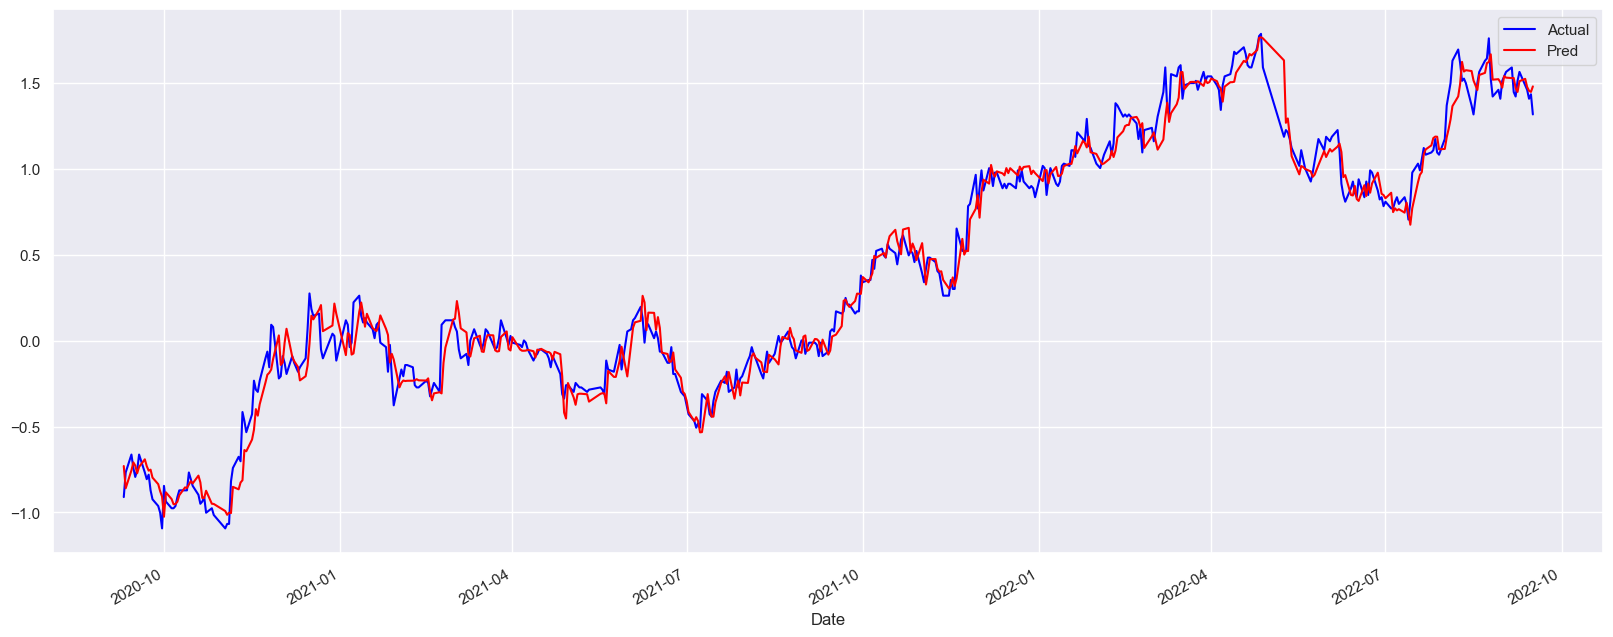

In [14]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [15]:
from joblib import load

In [16]:
close_scaler = load('../feature_engineering/tlkm_close_scaler.bin')

In [17]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [20]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2838.673584,2700.0
2020-09-11,2739.376953,2810.0


**Plot error distribution**

In [21]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

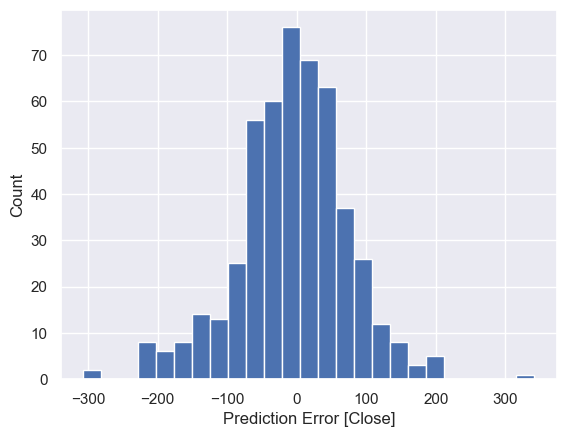

In [22]:
plotErrorHist(inversed)

**RMSE**

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(inversed['Pred'], inversed['Actual'])

80.91057736248068

**MAPE**

In [25]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [26]:
mape(inversed['Actual'], inversed['Pred'])

1.673463366407927

**R-squared**

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9796710739935411

### Save Model

In [29]:
# Save model
model.save_model('./models/tlkm.json')